In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, f1_score
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

# Parametric models

In [9]:
## df_parametric = pd.read_csv('/content/drive/My Drive/Datasets/parametric.csv')

df_parametric = pd.read_csv('parametric.csv')

df_parametric.head()

Unnamed: 0       Age      nWBV  Gender_M  Educ_level_2.0  Educ_level_3.0  \
0           0 -0.147367  0.137682         0               1               0   
1           1 -2.176432  1.709157         0               0               0   
2           2 -0.254160 -0.683238         0               0               0   
3           3 -0.147367 -1.128881         1               0               0   
4           4 -2.496811  2.107889         0               0               1   

   Educ_level_4.0  Educ_level_5.0  SES_level_2.0  SES_level_3.0  \
0               0               0              0              1   
1               1               0              0              0   
2               1               0              0              1   
3               0               1              1              0   
4               0               0              1              0   

   SES_level_4.0  SES_level_5.0  MMSE_Group_> 25  Group_Non-Demented  
0              0              0                1                   1  
1              0              0                1                   1  
2              0              0                1                   0  
3              0              0                1                   1  
4              0              0                1                   1

In [10]:
df_parametric = df_parametric.iloc[:, 1:]

df_parametric.head()

Age      nWBV  Gender_M  Educ_level_2.0  Educ_level_3.0  \
0 -0.147367  0.137682         0               1               0   
1 -2.176432  1.709157         0               0               0   
2 -0.254160 -0.683238         0               0               0   
3 -0.147367 -1.128881         1               0               0   
4 -2.496811  2.107889         0               0               1   

   Educ_level_4.0  Educ_level_5.0  SES_level_2.0  SES_level_3.0  \
0               0               0              0              1   
1               1               0              0              0   
2               1               0              0              1   
3               0               1              1              0   
4               0               0              1              0   

   SES_level_4.0  SES_level_5.0  MMSE_Group_> 25  Group_Non-Demented  
0              0              0                1                   1  
1              0              0                1                   1  
2              0              0                1                   0  
3              0              0                1                   1  
4              0              0                1                   1

In [11]:
df_parametric.shape

(608, 13)

In [12]:
df_parametric['Group_Non-Demented'].value_counts()

1    341
0    267
Name: Group_Non-Demented, dtype: int64

In [13]:
X = df_parametric.iloc[:, :-1]
y = df_parametric.iloc[:, -1]

In [14]:
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [15]:
X_p_train.shape, X_p_test.shape

((486, 12), (122, 12))

## Logistic Regression

Accuracy Score:  0.7131147540983607


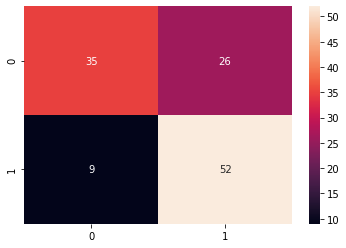

ROC AUC Score:  0.7131147540983606


In [16]:
LR = LogisticRegression(random_state=10)
LR.fit(X_p_train, y_p_train)
y_LR_pred = LR.predict(X_p_test)

print("Accuracy Score: ", accuracy_score(y_p_test, y_LR_pred))

cm = confusion_matrix(y_p_test, y_LR_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_p_test, y_LR_pred))

In [17]:
## We can see that the data is underfitting.

## Naive Bayes Algorithm

Accuracy Score:  0.7049180327868853


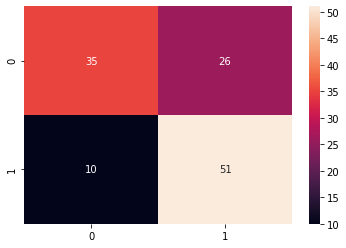

ROC AUC Score:  0.7049180327868853


In [18]:
NB = BernoulliNB()
NB.fit(X_p_train, y_p_train)
y_NB_pred = NB.predict(X_p_test)

print("Accuracy Score: ", accuracy_score(y_p_test, y_NB_pred))

cm = confusion_matrix(y_p_test, y_NB_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_p_test, y_NB_pred))

In [19]:
## We can see that the data is underfitting in this model too.

## K-Nearest Neighbors Algorithm

Accuracy Score:  0.6967213114754098


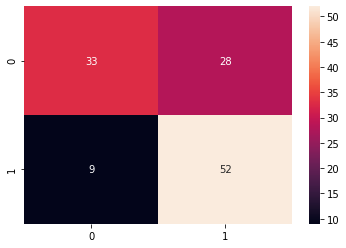

ROC AUC Score:  0.6967213114754097


In [20]:
KNN = KNeighborsClassifier()
KNN.fit(X_p_train, y_p_train)
y_KNN_pred = KNN.predict(X_p_test)

print("Accuracy Score: ", accuracy_score(y_p_test, y_KNN_pred))

cm = confusion_matrix(y_p_test, y_KNN_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_p_test, y_KNN_pred))

## K-Nearest Neighbors - Hyper parameter tuning

In [21]:
kf=KFold(n_splits=3,shuffle=True,random_state=10)

In [22]:
params = {
    'n_neighbors': range(1, 51),
    'weights': ['distance', 'uniform'],
    'metric': ['hamming', 'euclidean', 'manhattan', 'Chebyshev']
         }

gs_KNN = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = 1)
gs_KNN.fit(X_p_train, y_p_train)

KNN_tuned = gs_KNN.best_estimator_
print("KNN TUNED MODEL: ", KNN_tuned)
scores = cross_val_score(KNN_tuned, X_p_test, y_p_test, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("KNN TUNED SCORES: ", scores)
print("KNN Tuned Bias Error: ", 1 - np.mean(scores))
print("KNN Tuned Variance Error: ", np.std(scores, ddof = 1))

KNN TUNED MODEL:  KNeighborsClassifier(metric='manhattan', n_neighbors=43, weights='distance')
KNN TUNED SCORES:  [0.79285714 0.88571429 0.6641604 ]
KNN Tuned Bias Error:  0.21908939014202178
KNN Tuned Variance Error:  0.11125902523276573


In [23]:
## We are getting a high bias error still.

# Non-parametric models

In [24]:
# df_non_parametric = pd.read_csv('/content/drive/My Drive/Datasets/non_parametric.csv')

df_non_parametric = pd.read_csv('non_parametric.csv')

df_non_parametric.head()

Unnamed: 0       Age       ASF      nWBV      eTIV  Gender_M  \
0           0 -0.147367  0.759418  0.137682 -0.785886         0   
1           1 -2.176432  2.427471  1.709157 -1.956864         0   
2           2 -0.254160  0.025475 -0.683238 -0.132040         0   
3           3 -0.147367 -0.967943 -1.128881  0.949778         1   
4           4 -2.496811  0.929930  2.107889 -0.922599         0   

   Educ_level_2.0  Educ_level_3.0  Educ_level_4.0  Educ_level_5.0  \
0               1               0               0               0   
1               0               0               1               0   
2               0               0               1               0   
3               0               0               0               1   
4               0               1               0               0   

   SES_level_2.0  SES_level_3.0  SES_level_4.0  SES_level_5.0  \
0              0              1              0              0   
1              0              0              0              0   
2              0              1              0              0   
3              1              0              0              0   
4              1              0              0              0   

   MMSE_Group_> 25  Group_Non-Demented  
0                1                   1  
1                1                   1  
2                1                   0  
3                1                   1  
4                1                   1

In [25]:
df_non_parametric = df_non_parametric.iloc[:, 1:]

df_non_parametric.head()

Age       ASF      nWBV      eTIV  Gender_M  Educ_level_2.0  \
0 -0.147367  0.759418  0.137682 -0.785886         0               1   
1 -2.176432  2.427471  1.709157 -1.956864         0               0   
2 -0.254160  0.025475 -0.683238 -0.132040         0               0   
3 -0.147367 -0.967943 -1.128881  0.949778         1               0   
4 -2.496811  0.929930  2.107889 -0.922599         0               0   

   Educ_level_3.0  Educ_level_4.0  Educ_level_5.0  SES_level_2.0  \
0               0               0               0              0   
1               0               1               0              0   
2               0               1               0              0   
3               0               0               1              1   
4               1               0               0              1   

   SES_level_3.0  SES_level_4.0  SES_level_5.0  MMSE_Group_> 25  \
0              1              0              0                1   
1              0              0              0                1   
2              1              0              0                1   
3              0              0              0                1   
4              0              0              0                1   

   Group_Non-Demented  
0                   1  
1                   1  
2                   0  
3                   1  
4                   1

In [26]:
X = df_non_parametric.iloc[:, :-1]
y = df_non_parametric.iloc[:, -1]

In [27]:
X_np_train, X_np_test, y_np_train, y_np_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [28]:
X_np_train.shape, X_np_test.shape

((486, 14), (122, 14))

## Decision Tree Classifier Algorithm

Accuracy Score:  0.8032786885245902


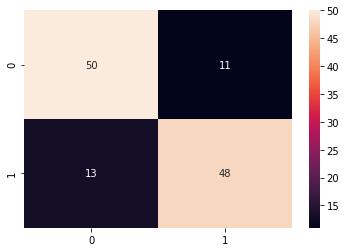

ROC AUC Score:  0.8032786885245902


In [29]:
DT = DecisionTreeClassifier(random_state=10)
DT.fit(X_np_train, y_np_train)
y_DT_pred = DT.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_DT_pred))

cm = confusion_matrix(y_np_test, y_DT_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_np_test, y_DT_pred))

## Decision Tree - Hyperparameter Tuning

In [30]:
params = {
    'max_depth': range(1, 21),  
    'criterion': ['entropy', 'gini']
         }

gs_DT = GridSearchCV(DecisionTreeClassifier(random_state=10), param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = 1)
gs_DT.fit(X_np_train, y_np_train)

DT_tuned = gs_DT.best_estimator_
print("Decision Tree TUNED MODEL: ", DT_tuned)
scores = cross_val_score(DT_tuned, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("Decision Tree TUNED SCORES: ", scores)
print("Decision Tree Tuned Bias Error: ", 1 - np.mean(scores))
print("Decision Tree Tuned Variance Error: ", np.std(scores, ddof = 1))

Decision Tree TUNED MODEL:  DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=10)
Decision Tree TUNED SCORES:  [0.81853583 0.84036382 0.86021835]
Decision Tree Tuned Bias Error:  0.1602940047484741
Decision Tree Tuned Variance Error:  0.0208490444307445


## Random Forest Classifier Algorithm

Accuracy Score:  0.8114754098360656


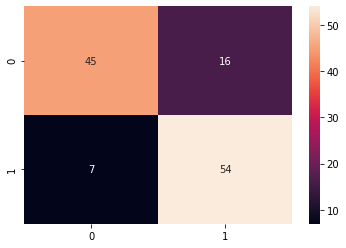

ROC AUC Score:  0.8114754098360655


In [31]:
RF = RandomForestClassifier(random_state=10)
RF.fit(X_np_train, y_np_train)
y_RF_pred = RF.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_RF_pred))

cm = confusion_matrix(y_np_test, y_RF_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_np_test, y_RF_pred))

## Random Forest - Hyperparameter Tuning

In [32]:
params = {
    'max_depth': range(1, 10), 
    'n_estimators': range(1, 101), 
    'criterion': ['entropy', 'gini']
         }

gs_RF = GridSearchCV(RandomForestClassifier(random_state=10), param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = 1)
gs_RF.fit(X_np_train, y_np_train)

RF_tuned = gs_RF.best_estimator_
print("Random Forest TUNED MODEL: ", RF_tuned)
scores = cross_val_score(RF_tuned, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("Random Forest TUNED SCORES: ", scores)
print("Random Forest Tuned Bias Error: ", 1 - np.mean(scores))
print("Random Forest Tuned Variance Error: ", np.std(scores, ddof = 1))

Random Forest TUNED MODEL:  RandomForestClassifier(max_depth=7, n_estimators=38, random_state=10)
Random Forest TUNED SCORES:  [0.84267913 0.88574238 0.90909091]
Random Forest Tuned Bias Error:  0.1208291945451817
Random Forest Tuned Variance Error:  0.033690063306017266


## Adaboost Classifier Algorithm

Accuracy Score:  0.7295081967213115


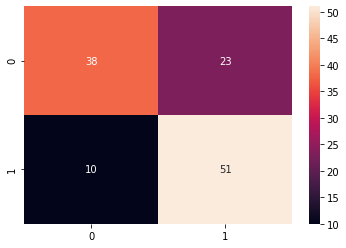

ROC AUC Score:  0.7295081967213115


In [33]:
AB = AdaBoostClassifier(random_state=10)
AB.fit(X_np_train, y_np_train)
y_AB_pred = AB.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_AB_pred))

cm = confusion_matrix(y_np_test, y_AB_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_np_test, y_AB_pred))

## AdaBoost - Hyperparameter Tuning

In [34]:
params = {
    'base_estimator': [LR, NB, KNN, DT, RF],
    'n_estimators': range(1, 120),
    'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]
         }

gs_AB = GridSearchCV(AdaBoostClassifier(random_state=10), param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = 1)
gs_AB.fit(X_np_train, y_np_train)

AB_tuned = gs_AB.best_estimator_
print("Adaboost TUNED MODEL: ", AB_tuned)
scores = cross_val_score(AB_tuned, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("Ada Boost Classifier TUNED SCORES: ", scores)
print("Ada Boost Classifier  Tuned Bias Error: ", 1 - np.mean(scores))
print("Ada Boost Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

Adaboost TUNED MODEL:  AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=10),
                   learning_rate=0.1, n_estimators=1, random_state=10)
Ada Boost Classifier TUNED SCORES:  [0.90172313 0.90821042 0.92944597]
Ada Boost Classifier  Tuned Bias Error:  0.08687349048205517
Ada Boost Classifier Tuned Variance Error:  0.014500515579085127


## Gradient Boosting Algorithm

Accuracy Score:  0.7704918032786885


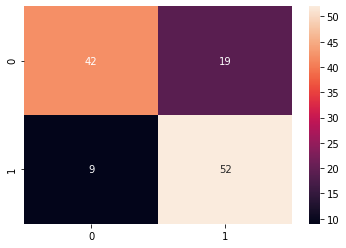

ROC AUC Score:  0.7704918032786885


In [35]:
GB = GradientBoostingClassifier(random_state=10)
GB.fit(X_np_train, y_np_train)
y_GB_pred = GB.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_GB_pred))

cm = confusion_matrix(y_np_test, y_GB_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_np_test, y_GB_pred))

## Gradient Boosting - Hyperparameter Tuning

In [36]:
params = {
    'n_estimators': range(1, 100),
    'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]
         }

gs_GB = GridSearchCV(GradientBoostingClassifier(random_state=10), param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = 1)
gs_GB.fit(X_np_train, y_np_train)

GB_tuned = gs_GB.best_estimator_
print("Gradient Boosting TUNED MODEL: ", GB_tuned)
scores = cross_val_score(GB_tuned, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("Gradient Boosting Classifier TUNED SCORES: ", scores)
print("Gradient Boosting Classifier Tuned Bias Error: ", 1 - np.mean(scores))
print("Gradient Boosting Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

Gradient Boosting TUNED MODEL:  GradientBoostingClassifier(learning_rate=0.15, n_estimators=93, random_state=10)
Gradient Boosting Classifier TUNED SCORES:  [0.87052181 0.88495575 0.92429344]
Gradient Boosting Classifier Tuned Bias Error:  0.10674300049635788
Gradient Boosting Classifier Tuned Variance Error:  0.02783038174061353


## XG Boost Algorithm

[15:40:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score:  0.8360655737704918


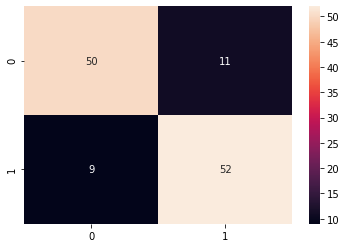

ROC AUC Score:  0.8360655737704918


In [37]:
XGB = XGBClassifier(random_state=10)
XGB.fit(X_np_train, y_np_train)
y_XGB_pred = XGB.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_XGB_pred))

cm = confusion_matrix(y_np_test, y_XGB_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_np_test, y_XGB_pred))

## XG Boost - Hyperparameter Tuning

In [38]:
params = {
    'n_estimators': range(1, 100),
    'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]
         }

gs_XGB = GridSearchCV(XGBClassifier(random_state=10), param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = 1)
gs_XGB.fit(X_np_train, y_np_train)

XGB_tuned = gs_XGB.best_estimator_
print("XG Boost TUNED MODEL: ", XGB_tuned)
scores = cross_val_score(XGB_tuned, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("XG Boost Classifier TUNED SCORES: ", scores)
print("XG Boost Classifier Tuned Bias Error: ", 1 - np.mean(scores))
print("XG Boost Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

[15:40:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:42:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:42:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:42:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:42:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:42:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:42:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:42:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:42:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:42:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:42:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:42:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:42:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:42:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:42:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:42:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:42:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:42:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:42:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:42:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:42:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:42:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:42:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

## Light GBM Algorithm

Accuracy Score:  0.7950819672131147


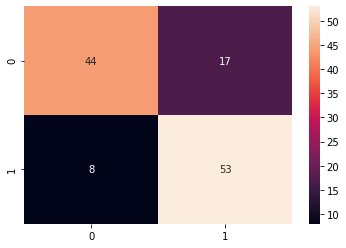

ROC AUC Score:  0.7950819672131147


In [39]:
LGBM = LGBMClassifier(random_state=10)
LGBM.fit(X_np_train, y_np_train)
y_LGBM_pred = LGBM.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_LGBM_pred))

cm = confusion_matrix(y_np_test, y_LGBM_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_np_test, y_LGBM_pred))

## Light GBM - Hyperparameter Tuning

In [40]:
params = {
    'n_estimators': range(1, 100),
    'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]
         }

gs_LGBM = GridSearchCV(LGBMClassifier(random_state=10), param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = 1)
gs_LGBM.fit(X_np_train, y_np_train)

LGBM_tuned = gs_LGBM.best_estimator_
print("LGBM TUNED MODEL: ", LGBM_tuned)
scores = cross_val_score(LGBM_tuned, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("LGBM Classifier TUNED SCORES: ", scores)
print("LGBM Boost Classifier Tuned Bias Error: ", 1 - np.mean(scores))
print("LGBM Boost Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

LGBM TUNED MODEL:  LGBMClassifier(learning_rate=0.15, n_estimators=69, random_state=10)
LGBM Classifier TUNED SCORES:  [0.86360981 0.88466077 0.91255994]
LGBM Boost Classifier Tuned Bias Error:  0.11305649236375415
LGBM Boost Classifier Tuned Variance Error:  0.02455477509736993


## Catboost Algorithm

Learning rate set to 0.007571
0:	learn: 0.6890640	total: 54ms	remaining: 53.9s
1:	learn: 0.6838483	total: 56.9ms	remaining: 28.4s
2:	learn: 0.6792786	total: 59.4ms	remaining: 19.8s
3:	learn: 0.6748293	total: 61.9ms	remaining: 15.4s
4:	learn: 0.6704008	total: 64ms	remaining: 12.7s
5:	learn: 0.6658163	total: 65.4ms	remaining: 10.8s
6:	learn: 0.6621402	total: 71.6ms	remaining: 10.2s
7:	learn: 0.6578996	total: 74.2ms	remaining: 9.2s
8:	learn: 0.6537142	total: 77ms	remaining: 8.47s
9:	learn: 0.6497727	total: 79.4ms	remaining: 7.86s
10:	learn: 0.6455516	total: 82.1ms	remaining: 7.38s
11:	learn: 0.6411056	total: 84.2ms	remaining: 6.93s
12:	learn: 0.6374064	total: 86.3ms	remaining: 6.55s
13:	learn: 0.6338499	total: 89.2ms	remaining: 6.29s
14:	learn: 0.6302962	total: 90.7ms	remaining: 5.96s
15:	learn: 0.6264075	total: 92.6ms	remaining: 5.7s
16:	learn: 0.6230933	total: 94.7ms	remaining: 5.47s
17:	learn: 0.6197121	total: 97.3ms	remaining: 5.3s
18:	learn: 0.6158007	total: 99.2ms	remaining: 5.12s
1

211:	learn: 0.3764409	total: 486ms	remaining: 1.81s
212:	learn: 0.3759508	total: 489ms	remaining: 1.81s
213:	learn: 0.3753805	total: 491ms	remaining: 1.8s
214:	learn: 0.3748292	total: 494ms	remaining: 1.8s
215:	learn: 0.3743842	total: 497ms	remaining: 1.8s
216:	learn: 0.3737955	total: 499ms	remaining: 1.8s
217:	learn: 0.3730785	total: 502ms	remaining: 1.8s
218:	learn: 0.3725258	total: 504ms	remaining: 1.8s
219:	learn: 0.3721485	total: 507ms	remaining: 1.8s
220:	learn: 0.3717698	total: 510ms	remaining: 1.8s
221:	learn: 0.3713576	total: 512ms	remaining: 1.79s
222:	learn: 0.3708338	total: 515ms	remaining: 1.79s
223:	learn: 0.3703446	total: 517ms	remaining: 1.79s
224:	learn: 0.3696567	total: 519ms	remaining: 1.79s
225:	learn: 0.3692084	total: 520ms	remaining: 1.78s
226:	learn: 0.3687708	total: 522ms	remaining: 1.78s
227:	learn: 0.3685805	total: 523ms	remaining: 1.77s
228:	learn: 0.3680290	total: 525ms	remaining: 1.77s
229:	learn: 0.3676731	total: 527ms	remaining: 1.76s
230:	learn: 0.367175

380:	learn: 0.3116393	total: 829ms	remaining: 1.35s
381:	learn: 0.3113910	total: 831ms	remaining: 1.34s
382:	learn: 0.3109769	total: 833ms	remaining: 1.34s
383:	learn: 0.3107494	total: 835ms	remaining: 1.34s
384:	learn: 0.3104450	total: 837ms	remaining: 1.34s
385:	learn: 0.3103169	total: 838ms	remaining: 1.33s
386:	learn: 0.3100745	total: 840ms	remaining: 1.33s
387:	learn: 0.3096619	total: 842ms	remaining: 1.33s
388:	learn: 0.3090314	total: 844ms	remaining: 1.32s
389:	learn: 0.3085845	total: 845ms	remaining: 1.32s
390:	learn: 0.3083484	total: 847ms	remaining: 1.32s
391:	learn: 0.3080334	total: 849ms	remaining: 1.32s
392:	learn: 0.3077914	total: 851ms	remaining: 1.31s
393:	learn: 0.3073678	total: 854ms	remaining: 1.31s
394:	learn: 0.3072191	total: 856ms	remaining: 1.31s
395:	learn: 0.3071957	total: 857ms	remaining: 1.31s
396:	learn: 0.3069609	total: 858ms	remaining: 1.3s
397:	learn: 0.3067327	total: 860ms	remaining: 1.3s
398:	learn: 0.3063071	total: 862ms	remaining: 1.3s
399:	learn: 0.3

547:	learn: 0.2682094	total: 1.17s	remaining: 964ms
548:	learn: 0.2679120	total: 1.17s	remaining: 962ms
549:	learn: 0.2675474	total: 1.17s	remaining: 960ms
550:	learn: 0.2671983	total: 1.18s	remaining: 958ms
551:	learn: 0.2669092	total: 1.18s	remaining: 956ms
552:	learn: 0.2667864	total: 1.18s	remaining: 954ms
553:	learn: 0.2667363	total: 1.18s	remaining: 951ms
554:	learn: 0.2665544	total: 1.18s	remaining: 948ms
555:	learn: 0.2662818	total: 1.18s	remaining: 945ms
556:	learn: 0.2662083	total: 1.19s	remaining: 943ms
557:	learn: 0.2658230	total: 1.19s	remaining: 940ms
558:	learn: 0.2655297	total: 1.19s	remaining: 938ms
559:	learn: 0.2653861	total: 1.19s	remaining: 936ms
560:	learn: 0.2653846	total: 1.19s	remaining: 933ms
561:	learn: 0.2648574	total: 1.19s	remaining: 931ms
562:	learn: 0.2645567	total: 1.2s	remaining: 929ms
563:	learn: 0.2644447	total: 1.2s	remaining: 926ms
564:	learn: 0.2642846	total: 1.2s	remaining: 924ms
565:	learn: 0.2639669	total: 1.2s	remaining: 921ms
566:	learn: 0.26

714:	learn: 0.2335585	total: 1.51s	remaining: 601ms
715:	learn: 0.2334535	total: 1.51s	remaining: 599ms
716:	learn: 0.2332826	total: 1.51s	remaining: 597ms
717:	learn: 0.2330379	total: 1.51s	remaining: 595ms
718:	learn: 0.2328485	total: 1.52s	remaining: 593ms
719:	learn: 0.2327700	total: 1.52s	remaining: 591ms
720:	learn: 0.2324052	total: 1.52s	remaining: 589ms
721:	learn: 0.2321728	total: 1.52s	remaining: 586ms
722:	learn: 0.2319249	total: 1.52s	remaining: 584ms
723:	learn: 0.2317181	total: 1.53s	remaining: 582ms
724:	learn: 0.2316789	total: 1.53s	remaining: 580ms
725:	learn: 0.2314908	total: 1.53s	remaining: 577ms
726:	learn: 0.2312813	total: 1.53s	remaining: 575ms
727:	learn: 0.2310442	total: 1.53s	remaining: 573ms
728:	learn: 0.2308638	total: 1.54s	remaining: 571ms
729:	learn: 0.2306217	total: 1.54s	remaining: 569ms
730:	learn: 0.2304273	total: 1.54s	remaining: 567ms
731:	learn: 0.2300642	total: 1.54s	remaining: 564ms
732:	learn: 0.2299408	total: 1.54s	remaining: 562ms
733:	learn: 

878:	learn: 0.2032104	total: 1.85s	remaining: 255ms
879:	learn: 0.2029425	total: 1.85s	remaining: 253ms
880:	learn: 0.2027518	total: 1.85s	remaining: 251ms
881:	learn: 0.2026434	total: 1.86s	remaining: 249ms
882:	learn: 0.2024639	total: 1.86s	remaining: 246ms
883:	learn: 0.2022645	total: 1.86s	remaining: 244ms
884:	learn: 0.2021480	total: 1.86s	remaining: 242ms
885:	learn: 0.2020450	total: 1.86s	remaining: 240ms
886:	learn: 0.2020138	total: 1.87s	remaining: 238ms
887:	learn: 0.2018759	total: 1.87s	remaining: 236ms
888:	learn: 0.2015891	total: 1.87s	remaining: 234ms
889:	learn: 0.2014820	total: 1.87s	remaining: 232ms
890:	learn: 0.2013121	total: 1.88s	remaining: 230ms
891:	learn: 0.2010670	total: 1.88s	remaining: 227ms
892:	learn: 0.2008652	total: 1.88s	remaining: 225ms
893:	learn: 0.2007298	total: 1.88s	remaining: 223ms
894:	learn: 0.2005957	total: 1.88s	remaining: 221ms
895:	learn: 0.2004988	total: 1.89s	remaining: 219ms
896:	learn: 0.2002497	total: 1.89s	remaining: 217ms
897:	learn: 

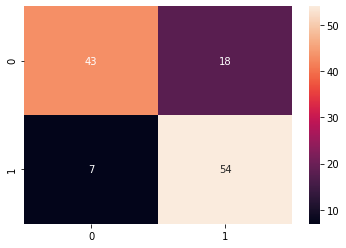

ROC AUC Score:  0.7950819672131147


In [41]:
CB = CatBoostClassifier(random_state=10)
CB.fit(X_np_train, y_np_train)
y_CB_pred = CB.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_CB_pred))

cm = confusion_matrix(y_np_test, y_CB_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_np_test, y_CB_pred))

## Catboost - Hyperparameter Tuning

In [52]:
params = {
    'n_estimators': range(1, 100),
    'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]
         }

gs_CB = GridSearchCV(CatBoostClassifier(random_state=10), param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = 1)
gs_CB.fit(X_np_train, y_np_train)

CB_tuned = gs_CB.best_estimator_
print("Catboost TUNED MODEL: ", CB_tuned)
scores = cross_val_score(CB_tuned, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("Catboost Classifier TUNED SCORES: ", scores)
print("Catboost Classifier Tuned Bias Error: ", 1 - np.mean(scores) - np.std(scores, ddof = 1))
print("Catboost Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

0:	learn: 0.6704169	total: 897us	remaining: 0us
0:	learn: 0.6639389	total: 873us	remaining: 0us
0:	learn: 0.6692245	total: 1.26ms	remaining: 0us
0:	learn: 0.6704169	total: 914us	remaining: 914us
1:	learn: 0.6540210	total: 2.1ms	remaining: 0us
0:	learn: 0.6639389	total: 878us	remaining: 878us
1:	learn: 0.6429238	total: 2.19ms	remaining: 0us
0:	learn: 0.6692245	total: 2.41ms	remaining: 2.41ms
1:	learn: 0.6529226	total: 4.3ms	remaining: 0us
0:	learn: 0.6704169	total: 890us	remaining: 1.78ms
1:	learn: 0.6540210	total: 2.2ms	remaining: 1.1ms
2:	learn: 0.6373561	total: 3.52ms	remaining: 0us
0:	learn: 0.6639389	total: 850us	remaining: 1.7ms
1:	learn: 0.6429238	total: 2.25ms	remaining: 1.12ms
2:	learn: 0.6221517	total: 3.7ms	remaining: 0us
0:	learn: 0.6692245	total: 1.18ms	remaining: 2.36ms
1:	learn: 0.6529226	total: 2.61ms	remaining: 1.3ms
2:	learn: 0.6333685	total: 3.43ms	remaining: 0us
0:	learn: 0.6704169	total: 852us	remaining: 2.56ms
1:	learn: 0.6540210	total: 2.42ms	remaining: 2.42ms
2:	

0:	learn: 0.6692245	total: 1.91ms	remaining: 21ms
1:	learn: 0.6529226	total: 3.8ms	remaining: 19ms
2:	learn: 0.6333685	total: 5.31ms	remaining: 15.9ms
3:	learn: 0.6158397	total: 6.67ms	remaining: 13.3ms
4:	learn: 0.5989606	total: 8.14ms	remaining: 11.4ms
5:	learn: 0.5857181	total: 9.55ms	remaining: 9.55ms
6:	learn: 0.5742185	total: 12ms	remaining: 8.56ms
7:	learn: 0.5626588	total: 13.4ms	remaining: 6.69ms
8:	learn: 0.5510244	total: 14.1ms	remaining: 4.69ms
9:	learn: 0.5400695	total: 15.5ms	remaining: 3.1ms
10:	learn: 0.5306087	total: 18.6ms	remaining: 1.69ms
11:	learn: 0.5208988	total: 19.8ms	remaining: 0us
0:	learn: 0.6704169	total: 890us	remaining: 10.7ms
1:	learn: 0.6540210	total: 2.27ms	remaining: 12.5ms
2:	learn: 0.6373561	total: 3.93ms	remaining: 13.1ms
3:	learn: 0.6197613	total: 5.6ms	remaining: 12.6ms
4:	learn: 0.6060084	total: 9.56ms	remaining: 15.3ms
5:	learn: 0.5940762	total: 11ms	remaining: 12.9ms
6:	learn: 0.5821497	total: 12.3ms	remaining: 10.6ms
7:	learn: 0.5746453	total

0:	learn: 0.6692245	total: 1.37ms	remaining: 21.9ms
1:	learn: 0.6529226	total: 2.87ms	remaining: 21.5ms
2:	learn: 0.6333685	total: 3.75ms	remaining: 17.5ms
3:	learn: 0.6158397	total: 5.03ms	remaining: 16.4ms
4:	learn: 0.5989606	total: 6.17ms	remaining: 14.8ms
5:	learn: 0.5857181	total: 7.71ms	remaining: 14.1ms
6:	learn: 0.5742185	total: 9.05ms	remaining: 12.9ms
7:	learn: 0.5626588	total: 10.4ms	remaining: 11.7ms
8:	learn: 0.5510244	total: 11ms	remaining: 9.76ms
9:	learn: 0.5400695	total: 12.2ms	remaining: 8.56ms
10:	learn: 0.5306087	total: 13.5ms	remaining: 7.37ms
11:	learn: 0.5208988	total: 14.8ms	remaining: 6.18ms
12:	learn: 0.5127087	total: 16.4ms	remaining: 5.04ms
13:	learn: 0.5042470	total: 17.8ms	remaining: 3.8ms
14:	learn: 0.4975398	total: 18.3ms	remaining: 2.44ms
15:	learn: 0.4924483	total: 19.7ms	remaining: 1.23ms
16:	learn: 0.4852385	total: 21.1ms	remaining: 0us
0:	learn: 0.6704169	total: 783us	remaining: 13.3ms
1:	learn: 0.6540210	total: 2.48ms	remaining: 19.8ms
2:	learn: 0.

0:	learn: 0.6692245	total: 1.54ms	remaining: 29.3ms
1:	learn: 0.6529226	total: 3.41ms	remaining: 30.7ms
2:	learn: 0.6333685	total: 4.32ms	remaining: 24.5ms
3:	learn: 0.6158397	total: 6.42ms	remaining: 25.7ms
4:	learn: 0.5989606	total: 7.62ms	remaining: 22.9ms
5:	learn: 0.5857181	total: 8.79ms	remaining: 20.5ms
6:	learn: 0.5742185	total: 12.3ms	remaining: 22.8ms
7:	learn: 0.5626588	total: 13.9ms	remaining: 20.9ms
8:	learn: 0.5510244	total: 14.7ms	remaining: 18ms
9:	learn: 0.5400695	total: 19.4ms	remaining: 19.4ms
10:	learn: 0.5306087	total: 20.4ms	remaining: 16.7ms
11:	learn: 0.5208988	total: 21.7ms	remaining: 14.4ms
12:	learn: 0.5127087	total: 22.9ms	remaining: 12.3ms
13:	learn: 0.5042470	total: 24.3ms	remaining: 10.4ms
14:	learn: 0.4975398	total: 24.9ms	remaining: 8.29ms
15:	learn: 0.4924483	total: 26.1ms	remaining: 6.53ms
16:	learn: 0.4852385	total: 27.3ms	remaining: 4.83ms
17:	learn: 0.4797518	total: 28.6ms	remaining: 3.18ms
18:	learn: 0.4751050	total: 31.5ms	remaining: 1.66ms
19:	l

7:	learn: 0.5424225	total: 12ms	remaining: 22.4ms
8:	learn: 0.5293961	total: 14.2ms	remaining: 22.1ms
9:	learn: 0.5200990	total: 15.5ms	remaining: 20.2ms
10:	learn: 0.5099298	total: 16.9ms	remaining: 18.4ms
11:	learn: 0.5000739	total: 17.6ms	remaining: 16.1ms
12:	learn: 0.4914012	total: 18.4ms	remaining: 14.2ms
13:	learn: 0.4854483	total: 19.7ms	remaining: 12.7ms
14:	learn: 0.4812791	total: 21ms	remaining: 11.2ms
15:	learn: 0.4742245	total: 22.3ms	remaining: 9.76ms
16:	learn: 0.4678246	total: 24ms	remaining: 8.48ms
17:	learn: 0.4626476	total: 25.6ms	remaining: 7.1ms
18:	learn: 0.4563723	total: 26.9ms	remaining: 5.67ms
19:	learn: 0.4495402	total: 28.3ms	remaining: 4.24ms
20:	learn: 0.4444950	total: 30.1ms	remaining: 2.87ms
21:	learn: 0.4399625	total: 32ms	remaining: 1.45ms
22:	learn: 0.4343782	total: 33.6ms	remaining: 0us
0:	learn: 0.6692245	total: 1.23ms	remaining: 27.1ms
1:	learn: 0.6529226	total: 3.87ms	remaining: 40.6ms
2:	learn: 0.6333685	total: 4.83ms	remaining: 32.2ms
3:	learn: 0

0:	learn: 0.6692245	total: 1.08ms	remaining: 26ms
1:	learn: 0.6529226	total: 2.47ms	remaining: 28.4ms
2:	learn: 0.6333685	total: 3.39ms	remaining: 24.9ms
3:	learn: 0.6158397	total: 4.7ms	remaining: 24.7ms
4:	learn: 0.5989606	total: 6.8ms	remaining: 27.2ms
5:	learn: 0.5857181	total: 9.96ms	remaining: 31.5ms
6:	learn: 0.5742185	total: 11.8ms	remaining: 30.5ms
7:	learn: 0.5626588	total: 13.6ms	remaining: 28.8ms
8:	learn: 0.5510244	total: 14.4ms	remaining: 25.6ms
9:	learn: 0.5400695	total: 15.7ms	remaining: 23.6ms
10:	learn: 0.5306087	total: 17.2ms	remaining: 21.8ms
11:	learn: 0.5208988	total: 18.7ms	remaining: 20.2ms
12:	learn: 0.5127087	total: 22.5ms	remaining: 20.7ms
13:	learn: 0.5042470	total: 24.1ms	remaining: 19ms
14:	learn: 0.4975398	total: 25.1ms	remaining: 16.7ms
15:	learn: 0.4924483	total: 27.4ms	remaining: 15.4ms
16:	learn: 0.4852385	total: 28.8ms	remaining: 13.6ms
17:	learn: 0.4797518	total: 30.8ms	remaining: 12ms
18:	learn: 0.4751050	total: 33.2ms	remaining: 10.5ms
19:	learn: 

7:	learn: 0.5626588	total: 18.4ms	remaining: 43.7ms
8:	learn: 0.5510244	total: 19.5ms	remaining: 38.9ms
9:	learn: 0.5400695	total: 22.1ms	remaining: 37.5ms
10:	learn: 0.5306087	total: 24.1ms	remaining: 35.1ms
11:	learn: 0.5208988	total: 26.9ms	remaining: 33.6ms
12:	learn: 0.5127087	total: 28.2ms	remaining: 30.4ms
13:	learn: 0.5042470	total: 29.6ms	remaining: 27.5ms
14:	learn: 0.4975398	total: 30.3ms	remaining: 24.3ms
15:	learn: 0.4924483	total: 34.5ms	remaining: 23.7ms
16:	learn: 0.4852385	total: 36.9ms	remaining: 21.7ms
17:	learn: 0.4797518	total: 38.8ms	remaining: 19.4ms
18:	learn: 0.4751050	total: 40.2ms	remaining: 16.9ms
19:	learn: 0.4681391	total: 41.5ms	remaining: 14.5ms
20:	learn: 0.4630217	total: 42.2ms	remaining: 12.1ms
21:	learn: 0.4575157	total: 43.4ms	remaining: 9.86ms
22:	learn: 0.4503312	total: 45.8ms	remaining: 7.96ms
23:	learn: 0.4454753	total: 48.4ms	remaining: 6.05ms
24:	learn: 0.4423523	total: 48.9ms	remaining: 3.91ms
25:	learn: 0.4390645	total: 51.1ms	remaining: 1.9

0:	learn: 0.6639389	total: 920us	remaining: 26.7ms
1:	learn: 0.6429238	total: 2.79ms	remaining: 39ms
2:	learn: 0.6221517	total: 4.18ms	remaining: 37.7ms
3:	learn: 0.5991449	total: 4.83ms	remaining: 31.4ms
4:	learn: 0.5816033	total: 6.22ms	remaining: 31.1ms
5:	learn: 0.5694983	total: 7.68ms	remaining: 30.7ms
6:	learn: 0.5556715	total: 9.44ms	remaining: 31ms
7:	learn: 0.5424225	total: 11.5ms	remaining: 31.6ms
8:	learn: 0.5293961	total: 12.7ms	remaining: 29.7ms
9:	learn: 0.5200990	total: 14.1ms	remaining: 28.2ms
10:	learn: 0.5099298	total: 16ms	remaining: 27.6ms
11:	learn: 0.5000739	total: 16.7ms	remaining: 25ms
12:	learn: 0.4914012	total: 17.6ms	remaining: 23ms
13:	learn: 0.4854483	total: 18.8ms	remaining: 21.5ms
14:	learn: 0.4812791	total: 20.1ms	remaining: 20.1ms
15:	learn: 0.4742245	total: 21.7ms	remaining: 19ms
16:	learn: 0.4678246	total: 22.5ms	remaining: 17.2ms
17:	learn: 0.4626476	total: 24.4ms	remaining: 16.3ms
18:	learn: 0.4563723	total: 25.7ms	remaining: 14.9ms
19:	learn: 0.449

18:	learn: 0.4563723	total: 29.1ms	remaining: 19.9ms
19:	learn: 0.4495402	total: 30.5ms	remaining: 18.3ms
20:	learn: 0.4444950	total: 31.8ms	remaining: 16.7ms
21:	learn: 0.4399625	total: 33.5ms	remaining: 15.2ms
22:	learn: 0.4343782	total: 36.1ms	remaining: 14.1ms
23:	learn: 0.4295468	total: 37.7ms	remaining: 12.6ms
24:	learn: 0.4241217	total: 39ms	remaining: 10.9ms
25:	learn: 0.4196014	total: 40.3ms	remaining: 9.31ms
26:	learn: 0.4148823	total: 43ms	remaining: 7.96ms
27:	learn: 0.4103452	total: 44.4ms	remaining: 6.34ms
28:	learn: 0.4070140	total: 45.1ms	remaining: 4.67ms
29:	learn: 0.4016839	total: 48.4ms	remaining: 3.23ms
30:	learn: 0.3970150	total: 49.7ms	remaining: 1.6ms
31:	learn: 0.3931987	total: 50.9ms	remaining: 0us
0:	learn: 0.6692245	total: 1.44ms	remaining: 44.8ms
1:	learn: 0.6529226	total: 3.36ms	remaining: 50.4ms
2:	learn: 0.6333685	total: 4.64ms	remaining: 44.8ms
3:	learn: 0.6158397	total: 5.93ms	remaining: 41.5ms
4:	learn: 0.5989606	total: 7.47ms	remaining: 40.3ms
5:	lea

1:	learn: 0.6429238	total: 3.07ms	remaining: 49.1ms
2:	learn: 0.6221517	total: 4.4ms	remaining: 45.5ms
3:	learn: 0.5991449	total: 5.16ms	remaining: 38.7ms
4:	learn: 0.5816033	total: 7.7ms	remaining: 44.6ms
5:	learn: 0.5694983	total: 8.86ms	remaining: 41.4ms
6:	learn: 0.5556715	total: 10.2ms	remaining: 39.4ms
7:	learn: 0.5424225	total: 11.6ms	remaining: 37.8ms
8:	learn: 0.5293961	total: 14.5ms	remaining: 40.2ms
9:	learn: 0.5200990	total: 16.2ms	remaining: 38.9ms
10:	learn: 0.5099298	total: 17.7ms	remaining: 37.1ms
11:	learn: 0.5000739	total: 18.4ms	remaining: 33.8ms
12:	learn: 0.4914012	total: 19.5ms	remaining: 31.5ms
13:	learn: 0.4854483	total: 21ms	remaining: 30ms
14:	learn: 0.4812791	total: 22.3ms	remaining: 28.3ms
15:	learn: 0.4742245	total: 23.6ms	remaining: 26.6ms
16:	learn: 0.4678246	total: 24.6ms	remaining: 24.6ms
17:	learn: 0.4626476	total: 26.6ms	remaining: 23.6ms
18:	learn: 0.4563723	total: 27.9ms	remaining: 22ms
19:	learn: 0.4495402	total: 29.5ms	remaining: 20.6ms
20:	learn:

20:	learn: 0.4898468	total: 27.4ms	remaining: 19.6ms
21:	learn: 0.4854638	total: 30.1ms	remaining: 19.2ms
22:	learn: 0.4802706	total: 31.5ms	remaining: 17.8ms
23:	learn: 0.4770401	total: 32.9ms	remaining: 16.4ms
24:	learn: 0.4733361	total: 33.4ms	remaining: 14.7ms
25:	learn: 0.4696452	total: 34.8ms	remaining: 13.4ms
26:	learn: 0.4659761	total: 36.3ms	remaining: 12.1ms
27:	learn: 0.4623035	total: 37.2ms	remaining: 10.6ms
28:	learn: 0.4577370	total: 38.5ms	remaining: 9.29ms
29:	learn: 0.4552448	total: 39.8ms	remaining: 7.96ms
30:	learn: 0.4503242	total: 41.6ms	remaining: 6.71ms
31:	learn: 0.4471926	total: 43.6ms	remaining: 5.45ms
32:	learn: 0.4446963	total: 44.9ms	remaining: 4.08ms
33:	learn: 0.4417194	total: 46.7ms	remaining: 2.75ms
34:	learn: 0.4391766	total: 48.4ms	remaining: 1.38ms
35:	learn: 0.4365329	total: 50.3ms	remaining: 0us
0:	learn: 0.6639389	total: 1.01ms	remaining: 35.6ms
1:	learn: 0.6429238	total: 2.23ms	remaining: 37.9ms
2:	learn: 0.6221517	total: 3.56ms	remaining: 39.2ms

16:	learn: 0.4852385	total: 25.3ms	remaining: 29.8ms
17:	learn: 0.4797518	total: 27.4ms	remaining: 28.9ms
18:	learn: 0.4751050	total: 28.7ms	remaining: 27.2ms
19:	learn: 0.4681391	total: 30.3ms	remaining: 25.7ms
20:	learn: 0.4630217	total: 31.1ms	remaining: 23.7ms
21:	learn: 0.4575157	total: 33.8ms	remaining: 23ms
22:	learn: 0.4503312	total: 35.1ms	remaining: 21.3ms
23:	learn: 0.4454753	total: 36.4ms	remaining: 19.7ms
24:	learn: 0.4423523	total: 36.9ms	remaining: 17.7ms
25:	learn: 0.4390645	total: 38.5ms	remaining: 16.3ms
26:	learn: 0.4336600	total: 40.8ms	remaining: 15.1ms
27:	learn: 0.4313947	total: 42.5ms	remaining: 13.7ms
28:	learn: 0.4275613	total: 44.1ms	remaining: 12.2ms
29:	learn: 0.4232673	total: 46.4ms	remaining: 10.8ms
30:	learn: 0.4211539	total: 47.4ms	remaining: 9.16ms
31:	learn: 0.4170070	total: 48.4ms	remaining: 7.56ms
32:	learn: 0.4141573	total: 49.1ms	remaining: 5.96ms
33:	learn: 0.4107912	total: 51.3ms	remaining: 4.53ms
34:	learn: 0.4078444	total: 52.9ms	remaining: 3.

14:	learn: 0.4812791	total: 17.1ms	remaining: 27.3ms
15:	learn: 0.4742245	total: 18.4ms	remaining: 26.5ms
16:	learn: 0.4678246	total: 20.1ms	remaining: 26ms
17:	learn: 0.4626476	total: 21.5ms	remaining: 25.1ms
18:	learn: 0.4563723	total: 22.9ms	remaining: 24.1ms
19:	learn: 0.4495402	total: 24.2ms	remaining: 23ms
20:	learn: 0.4444950	total: 25.5ms	remaining: 21.9ms
21:	learn: 0.4399625	total: 26.8ms	remaining: 20.7ms
22:	learn: 0.4343782	total: 28.2ms	remaining: 19.6ms
23:	learn: 0.4295468	total: 29.7ms	remaining: 18.5ms
24:	learn: 0.4241217	total: 31ms	remaining: 17.4ms
25:	learn: 0.4196014	total: 32.4ms	remaining: 16.2ms
26:	learn: 0.4148823	total: 33.8ms	remaining: 15ms
27:	learn: 0.4103452	total: 35.2ms	remaining: 13.8ms
28:	learn: 0.4070140	total: 36.2ms	remaining: 12.5ms
29:	learn: 0.4016839	total: 37.5ms	remaining: 11.2ms
30:	learn: 0.3970150	total: 39ms	remaining: 10.1ms
31:	learn: 0.3931987	total: 40.3ms	remaining: 8.81ms
32:	learn: 0.3892406	total: 42.4ms	remaining: 7.71ms
33:

0:	learn: 0.6639389	total: 1.72ms	remaining: 68.9ms
1:	learn: 0.6429238	total: 4.2ms	remaining: 82ms
2:	learn: 0.6221517	total: 5.56ms	remaining: 70.4ms
3:	learn: 0.5991449	total: 6.16ms	remaining: 57ms
4:	learn: 0.5816033	total: 7.41ms	remaining: 53.3ms
5:	learn: 0.5694983	total: 8.79ms	remaining: 51.3ms
6:	learn: 0.5556715	total: 9.96ms	remaining: 48.4ms
7:	learn: 0.5424225	total: 11.3ms	remaining: 46.6ms
8:	learn: 0.5293961	total: 12.8ms	remaining: 45.4ms
9:	learn: 0.5200990	total: 14.2ms	remaining: 44ms
10:	learn: 0.5099298	total: 15.6ms	remaining: 42.6ms
11:	learn: 0.5000739	total: 16.4ms	remaining: 39.6ms
12:	learn: 0.4914012	total: 17.2ms	remaining: 37.1ms
13:	learn: 0.4854483	total: 18.7ms	remaining: 36ms
14:	learn: 0.4812791	total: 20ms	remaining: 34.8ms
15:	learn: 0.4742245	total: 22.8ms	remaining: 35.6ms
16:	learn: 0.4678246	total: 23.6ms	remaining: 33.3ms
17:	learn: 0.4626476	total: 25ms	remaining: 32ms
18:	learn: 0.4563723	total: 26.2ms	remaining: 30.4ms
19:	learn: 0.44954

19:	learn: 0.4938434	total: 22.6ms	remaining: 25.9ms
20:	learn: 0.4898468	total: 23.8ms	remaining: 25ms
21:	learn: 0.4854638	total: 25.7ms	remaining: 24.5ms
22:	learn: 0.4802706	total: 27ms	remaining: 23.5ms
23:	learn: 0.4770401	total: 28.4ms	remaining: 22.5ms
24:	learn: 0.4733361	total: 29ms	remaining: 20.8ms
25:	learn: 0.4696452	total: 30.2ms	remaining: 19.8ms
26:	learn: 0.4659761	total: 31.5ms	remaining: 18.7ms
27:	learn: 0.4623035	total: 32.5ms	remaining: 17.4ms
28:	learn: 0.4577370	total: 33.9ms	remaining: 16.4ms
29:	learn: 0.4552448	total: 35.5ms	remaining: 15.4ms
30:	learn: 0.4503242	total: 36.9ms	remaining: 14.3ms
31:	learn: 0.4471926	total: 38.3ms	remaining: 13.2ms
32:	learn: 0.4446963	total: 39.8ms	remaining: 12.1ms
33:	learn: 0.4417194	total: 41.8ms	remaining: 11.1ms
34:	learn: 0.4391766	total: 42.6ms	remaining: 9.74ms
35:	learn: 0.4365329	total: 44.1ms	remaining: 8.58ms
36:	learn: 0.4326225	total: 46.3ms	remaining: 7.5ms
37:	learn: 0.4307691	total: 47.5ms	remaining: 6.25ms


43:	learn: 0.3802648	total: 43.9ms	remaining: 0us
0:	learn: 0.6704169	total: 899us	remaining: 39.6ms
1:	learn: 0.6540210	total: 2.2ms	remaining: 47.3ms
2:	learn: 0.6373561	total: 3.63ms	remaining: 50.8ms
3:	learn: 0.6197613	total: 4.34ms	remaining: 44.5ms
4:	learn: 0.6060084	total: 5.64ms	remaining: 45.1ms
5:	learn: 0.5940762	total: 7.41ms	remaining: 48.2ms
6:	learn: 0.5821497	total: 8.73ms	remaining: 47.4ms
7:	learn: 0.5746453	total: 10.2ms	remaining: 47.4ms
8:	learn: 0.5629706	total: 11.5ms	remaining: 45.9ms
9:	learn: 0.5526404	total: 13ms	remaining: 45.5ms
10:	learn: 0.5458787	total: 14.3ms	remaining: 44.3ms
11:	learn: 0.5373914	total: 14.7ms	remaining: 40.4ms
12:	learn: 0.5302402	total: 15.5ms	remaining: 38.2ms
13:	learn: 0.5247394	total: 16.7ms	remaining: 36.9ms
14:	learn: 0.5187198	total: 17.9ms	remaining: 35.9ms
15:	learn: 0.5121083	total: 19.2ms	remaining: 34.8ms
16:	learn: 0.5070710	total: 20.5ms	remaining: 33.8ms
17:	learn: 0.5018479	total: 22ms	remaining: 32.9ms
18:	learn: 0

0:	learn: 0.6692245	total: 1.17ms	remaining: 52.4ms
1:	learn: 0.6529226	total: 2.7ms	remaining: 59.5ms
2:	learn: 0.6333685	total: 3.52ms	remaining: 50.5ms
3:	learn: 0.6158397	total: 4.85ms	remaining: 50.9ms
4:	learn: 0.5989606	total: 6.19ms	remaining: 50.8ms
5:	learn: 0.5857181	total: 7.66ms	remaining: 51.1ms
6:	learn: 0.5742185	total: 9.04ms	remaining: 50.4ms
7:	learn: 0.5626588	total: 10.8ms	remaining: 51.5ms
8:	learn: 0.5510244	total: 11.6ms	remaining: 47.8ms
9:	learn: 0.5400695	total: 13.1ms	remaining: 47.2ms
10:	learn: 0.5306087	total: 14.4ms	remaining: 45.8ms
11:	learn: 0.5208988	total: 15.9ms	remaining: 45ms
12:	learn: 0.5127087	total: 17.1ms	remaining: 43.5ms
13:	learn: 0.5042470	total: 18.6ms	remaining: 42.6ms
14:	learn: 0.4975398	total: 19.5ms	remaining: 40.2ms
15:	learn: 0.4924483	total: 20.7ms	remaining: 38.8ms
16:	learn: 0.4852385	total: 22ms	remaining: 37.5ms
17:	learn: 0.4797518	total: 23.2ms	remaining: 36.1ms
18:	learn: 0.4751050	total: 25.2ms	remaining: 35.8ms
19:	lear

7:	learn: 0.5424225	total: 9.91ms	remaining: 49.6ms
8:	learn: 0.5293961	total: 11.2ms	remaining: 48.7ms
9:	learn: 0.5200990	total: 13.1ms	remaining: 49.8ms
10:	learn: 0.5099298	total: 14.5ms	remaining: 48.7ms
11:	learn: 0.5000739	total: 15ms	remaining: 44.9ms
12:	learn: 0.4914012	total: 15.9ms	remaining: 42.8ms
13:	learn: 0.4854483	total: 17.7ms	remaining: 43ms
14:	learn: 0.4812791	total: 19.1ms	remaining: 42ms
15:	learn: 0.4742245	total: 20.5ms	remaining: 40.9ms
16:	learn: 0.4678246	total: 21.3ms	remaining: 38.8ms
17:	learn: 0.4626476	total: 22.7ms	remaining: 37.9ms
18:	learn: 0.4563723	total: 24.2ms	remaining: 36.9ms
19:	learn: 0.4495402	total: 25.6ms	remaining: 35.9ms
20:	learn: 0.4444950	total: 27ms	remaining: 34.7ms
21:	learn: 0.4399625	total: 28.4ms	remaining: 33.6ms
22:	learn: 0.4343782	total: 29.8ms	remaining: 32.4ms
23:	learn: 0.4295468	total: 31.5ms	remaining: 31.5ms
24:	learn: 0.4241217	total: 33.2ms	remaining: 30.5ms
25:	learn: 0.4196014	total: 34.6ms	remaining: 29.3ms
26:	

40:	learn: 0.3881395	total: 59.7ms	remaining: 11.7ms
41:	learn: 0.3863488	total: 61.1ms	remaining: 10.2ms
42:	learn: 0.3825721	total: 62.3ms	remaining: 8.7ms
43:	learn: 0.3802648	total: 63.7ms	remaining: 7.24ms
44:	learn: 0.3770780	total: 66.3ms	remaining: 5.89ms
45:	learn: 0.3756477	total: 67.6ms	remaining: 4.41ms
46:	learn: 0.3726462	total: 68.9ms	remaining: 2.93ms
47:	learn: 0.3699107	total: 70.4ms	remaining: 1.47ms
48:	learn: 0.3678369	total: 72.5ms	remaining: 0us
0:	learn: 0.6704169	total: 864us	remaining: 42.4ms
1:	learn: 0.6540210	total: 2.1ms	remaining: 50.4ms
2:	learn: 0.6373561	total: 3.34ms	remaining: 52.4ms
3:	learn: 0.6197613	total: 4.02ms	remaining: 46.2ms
4:	learn: 0.6060084	total: 5.4ms	remaining: 48.6ms
5:	learn: 0.5940762	total: 6.73ms	remaining: 49.3ms
6:	learn: 0.5821497	total: 7.92ms	remaining: 48.6ms
7:	learn: 0.5746453	total: 9.13ms	remaining: 47.9ms
8:	learn: 0.5629706	total: 10.3ms	remaining: 47.1ms
9:	learn: 0.5526404	total: 11.5ms	remaining: 46.2ms
10:	learn:

1:	learn: 0.6429238	total: 2.46ms	remaining: 60.2ms
2:	learn: 0.6221517	total: 4.09ms	remaining: 65.4ms
3:	learn: 0.5991449	total: 4.71ms	remaining: 55.4ms
4:	learn: 0.5816033	total: 6.31ms	remaining: 58ms
5:	learn: 0.5694983	total: 8.11ms	remaining: 60.8ms
6:	learn: 0.5556715	total: 9.45ms	remaining: 59.4ms
7:	learn: 0.5424225	total: 10.7ms	remaining: 57.3ms
8:	learn: 0.5293961	total: 12.8ms	remaining: 59.6ms
9:	learn: 0.5200990	total: 14.4ms	remaining: 58.9ms
10:	learn: 0.5099298	total: 15.8ms	remaining: 57.4ms
11:	learn: 0.5000739	total: 16.3ms	remaining: 53.1ms
12:	learn: 0.4914012	total: 17.3ms	remaining: 50.7ms
13:	learn: 0.4854483	total: 20.5ms	remaining: 54.3ms
14:	learn: 0.4812791	total: 22ms	remaining: 52.7ms
15:	learn: 0.4742245	total: 23.4ms	remaining: 51.3ms
16:	learn: 0.4678246	total: 24.3ms	remaining: 48.6ms
17:	learn: 0.4626476	total: 26.7ms	remaining: 48.9ms
18:	learn: 0.4563723	total: 28.4ms	remaining: 47.8ms
19:	learn: 0.4495402	total: 29.8ms	remaining: 46.1ms
20:	le

43:	learn: 0.3571971	total: 69ms	remaining: 12.5ms
44:	learn: 0.3543681	total: 72.4ms	remaining: 11.3ms
45:	learn: 0.3523819	total: 74.9ms	remaining: 9.77ms
46:	learn: 0.3494162	total: 76.7ms	remaining: 8.15ms
47:	learn: 0.3469391	total: 78.7ms	remaining: 6.56ms
48:	learn: 0.3442809	total: 80.4ms	remaining: 4.92ms
49:	learn: 0.3422805	total: 82ms	remaining: 3.28ms
50:	learn: 0.3394214	total: 83.5ms	remaining: 1.64ms
51:	learn: 0.3375874	total: 85.9ms	remaining: 0us
0:	learn: 0.6692245	total: 1.97ms	remaining: 101ms
1:	learn: 0.6529226	total: 3.21ms	remaining: 80.3ms
2:	learn: 0.6333685	total: 4.91ms	remaining: 80.2ms
3:	learn: 0.6158397	total: 8.01ms	remaining: 96.2ms
4:	learn: 0.5989606	total: 9.38ms	remaining: 88.2ms
5:	learn: 0.5857181	total: 10.6ms	remaining: 81.6ms
6:	learn: 0.5742185	total: 12.1ms	remaining: 77.7ms
7:	learn: 0.5626588	total: 13.7ms	remaining: 75.6ms
8:	learn: 0.5510244	total: 14.4ms	remaining: 69ms
9:	learn: 0.5400695	total: 15.7ms	remaining: 65.8ms
10:	learn: 0.

36:	learn: 0.4011407	total: 42.5ms	remaining: 18.4ms
37:	learn: 0.3973830	total: 43.8ms	remaining: 17.3ms
38:	learn: 0.3939886	total: 45.3ms	remaining: 16.3ms
39:	learn: 0.3909089	total: 46.7ms	remaining: 15.2ms
40:	learn: 0.3881395	total: 47.9ms	remaining: 14ms
41:	learn: 0.3863488	total: 48.8ms	remaining: 12.8ms
42:	learn: 0.3825721	total: 50.1ms	remaining: 11.7ms
43:	learn: 0.3802648	total: 51.4ms	remaining: 10.5ms
44:	learn: 0.3770780	total: 54.2ms	remaining: 9.63ms
45:	learn: 0.3756477	total: 55.6ms	remaining: 8.46ms
46:	learn: 0.3726462	total: 57ms	remaining: 7.28ms
47:	learn: 0.3699107	total: 58.6ms	remaining: 6.1ms
48:	learn: 0.3678369	total: 60.7ms	remaining: 4.96ms
49:	learn: 0.3656189	total: 62.1ms	remaining: 3.73ms
50:	learn: 0.3628542	total: 63.3ms	remaining: 2.48ms
51:	learn: 0.3610221	total: 64.6ms	remaining: 1.24ms
52:	learn: 0.3575462	total: 66.1ms	remaining: 0us
0:	learn: 0.6704169	total: 1.08ms	remaining: 57.5ms
1:	learn: 0.6540210	total: 2.21ms	remaining: 57.5ms
2:	

53:	learn: 0.3865272	total: 69ms	remaining: 1.28ms
54:	learn: 0.3831241	total: 70.4ms	remaining: 0us
0:	learn: 0.6639389	total: 3.52ms	remaining: 190ms
1:	learn: 0.6429238	total: 7.01ms	remaining: 186ms
2:	learn: 0.6221517	total: 9.76ms	remaining: 169ms
3:	learn: 0.5991449	total: 10.5ms	remaining: 134ms
4:	learn: 0.5816033	total: 11.8ms	remaining: 119ms
5:	learn: 0.5694983	total: 13.3ms	remaining: 108ms
6:	learn: 0.5556715	total: 16.6ms	remaining: 114ms
7:	learn: 0.5424225	total: 17.9ms	remaining: 105ms
8:	learn: 0.5293961	total: 19.5ms	remaining: 99.6ms
9:	learn: 0.5200990	total: 22ms	remaining: 99.1ms
10:	learn: 0.5099298	total: 23.2ms	remaining: 93ms
11:	learn: 0.5000739	total: 23.8ms	remaining: 85.4ms
12:	learn: 0.4914012	total: 24.7ms	remaining: 79.7ms
13:	learn: 0.4854483	total: 25.9ms	remaining: 75.9ms
14:	learn: 0.4812791	total: 28.2ms	remaining: 75.1ms
15:	learn: 0.4742245	total: 30.6ms	remaining: 74.7ms
16:	learn: 0.4678246	total: 33.4ms	remaining: 74.7ms
17:	learn: 0.4626476

0:	learn: 0.6639389	total: 936us	remaining: 51.5ms
1:	learn: 0.6429238	total: 2.12ms	remaining: 57.1ms
2:	learn: 0.6221517	total: 3.44ms	remaining: 60.8ms
3:	learn: 0.5991449	total: 4.04ms	remaining: 52.6ms
4:	learn: 0.5816033	total: 5.38ms	remaining: 54.9ms
5:	learn: 0.5694983	total: 7.13ms	remaining: 59.4ms
6:	learn: 0.5556715	total: 8.69ms	remaining: 60.8ms
7:	learn: 0.5424225	total: 10.3ms	remaining: 62ms
8:	learn: 0.5293961	total: 12.3ms	remaining: 64.4ms
9:	learn: 0.5200990	total: 13.8ms	remaining: 63.3ms
10:	learn: 0.5099298	total: 16ms	remaining: 65.5ms
11:	learn: 0.5000739	total: 16.5ms	remaining: 60.6ms
12:	learn: 0.4914012	total: 17.3ms	remaining: 57.4ms
13:	learn: 0.4854483	total: 18.6ms	remaining: 55.8ms
14:	learn: 0.4812791	total: 20ms	remaining: 54.6ms
15:	learn: 0.4742245	total: 21.9ms	remaining: 54.6ms
16:	learn: 0.4678246	total: 23.6ms	remaining: 54.2ms
17:	learn: 0.4626476	total: 24.9ms	remaining: 52.6ms
18:	learn: 0.4563723	total: 27ms	remaining: 52.5ms
19:	learn: 0

0:	learn: 0.6639389	total: 875us	remaining: 49ms
1:	learn: 0.6429238	total: 2.18ms	remaining: 59.9ms
2:	learn: 0.6221517	total: 3.56ms	remaining: 64.1ms
3:	learn: 0.5991449	total: 4.59ms	remaining: 60.9ms
4:	learn: 0.5816033	total: 8.97ms	remaining: 93.3ms
5:	learn: 0.5694983	total: 10.5ms	remaining: 89.2ms
6:	learn: 0.5556715	total: 11.8ms	remaining: 84.6ms
7:	learn: 0.5424225	total: 13.2ms	remaining: 81.2ms
8:	learn: 0.5293961	total: 15.9ms	remaining: 84.6ms
9:	learn: 0.5200990	total: 19.9ms	remaining: 93.7ms
10:	learn: 0.5099298	total: 25ms	remaining: 105ms
11:	learn: 0.5000739	total: 25.4ms	remaining: 95.1ms
12:	learn: 0.4914012	total: 26.6ms	remaining: 90.2ms
13:	learn: 0.4854483	total: 28.1ms	remaining: 86.2ms
14:	learn: 0.4812791	total: 30.2ms	remaining: 84.5ms
15:	learn: 0.4742245	total: 33.9ms	remaining: 86.9ms
16:	learn: 0.4678246	total: 37.3ms	remaining: 87.8ms
17:	learn: 0.4626476	total: 39.6ms	remaining: 85.8ms
18:	learn: 0.4563723	total: 41.1ms	remaining: 82.2ms
19:	learn

50:	learn: 0.3394214	total: 58.6ms	remaining: 8.04ms
51:	learn: 0.3375874	total: 60.4ms	remaining: 6.97ms
52:	learn: 0.3352205	total: 63.2ms	remaining: 5.96ms
53:	learn: 0.3335114	total: 64.7ms	remaining: 4.79ms
54:	learn: 0.3320346	total: 66.3ms	remaining: 3.62ms
55:	learn: 0.3287268	total: 68.9ms	remaining: 2.46ms
56:	learn: 0.3265509	total: 73.2ms	remaining: 1.28ms
57:	learn: 0.3239077	total: 77ms	remaining: 0us
0:	learn: 0.6692245	total: 1.16ms	remaining: 66.1ms
1:	learn: 0.6529226	total: 3.16ms	remaining: 88.4ms
2:	learn: 0.6333685	total: 4.67ms	remaining: 85.6ms
3:	learn: 0.6158397	total: 6.13ms	remaining: 82.8ms
4:	learn: 0.5989606	total: 7.63ms	remaining: 80.9ms
5:	learn: 0.5857181	total: 9.89ms	remaining: 85.7ms
6:	learn: 0.5742185	total: 12.1ms	remaining: 88.5ms
7:	learn: 0.5626588	total: 13.5ms	remaining: 84.4ms
8:	learn: 0.5510244	total: 14.4ms	remaining: 78.2ms
9:	learn: 0.5400695	total: 18.9ms	remaining: 90.9ms
10:	learn: 0.5306087	total: 20.6ms	remaining: 88ms
11:	learn:

36:	learn: 0.3772346	total: 42.8ms	remaining: 25.4ms
37:	learn: 0.3743697	total: 44.1ms	remaining: 24.4ms
38:	learn: 0.3710544	total: 46ms	remaining: 23.6ms
39:	learn: 0.3673103	total: 47.4ms	remaining: 22.5ms
40:	learn: 0.3647971	total: 48.8ms	remaining: 21.4ms
41:	learn: 0.3628521	total: 50.3ms	remaining: 20.4ms
42:	learn: 0.3599610	total: 51.9ms	remaining: 19.3ms
43:	learn: 0.3571971	total: 53.3ms	remaining: 18.2ms
44:	learn: 0.3543681	total: 54.8ms	remaining: 17ms
45:	learn: 0.3523819	total: 56.2ms	remaining: 15.9ms
46:	learn: 0.3494162	total: 57.6ms	remaining: 14.7ms
47:	learn: 0.3469391	total: 59.2ms	remaining: 13.6ms
48:	learn: 0.3442809	total: 60.8ms	remaining: 12.4ms
49:	learn: 0.3422805	total: 62.3ms	remaining: 11.2ms
50:	learn: 0.3394214	total: 63.7ms	remaining: 9.99ms
51:	learn: 0.3375874	total: 65.3ms	remaining: 8.79ms
52:	learn: 0.3352205	total: 67.2ms	remaining: 7.61ms
53:	learn: 0.3335114	total: 68.8ms	remaining: 6.37ms
54:	learn: 0.3320346	total: 70ms	remaining: 5.09ms

0:	learn: 0.6692245	total: 1.07ms	remaining: 63.4ms
1:	learn: 0.6529226	total: 2.17ms	remaining: 62.9ms
2:	learn: 0.6333685	total: 2.68ms	remaining: 50.9ms
3:	learn: 0.6158397	total: 3.71ms	remaining: 51.9ms
4:	learn: 0.5989606	total: 5.23ms	remaining: 57.5ms
5:	learn: 0.5857181	total: 6.29ms	remaining: 56.6ms
6:	learn: 0.5742185	total: 7.91ms	remaining: 59.9ms
7:	learn: 0.5626588	total: 9.63ms	remaining: 62.6ms
8:	learn: 0.5510244	total: 10.3ms	remaining: 58.2ms
9:	learn: 0.5400695	total: 11.3ms	remaining: 56.5ms
10:	learn: 0.5306087	total: 12.6ms	remaining: 56.3ms
11:	learn: 0.5208988	total: 13.7ms	remaining: 54.9ms
12:	learn: 0.5127087	total: 14.8ms	remaining: 53.6ms
13:	learn: 0.5042470	total: 16.3ms	remaining: 53.7ms
14:	learn: 0.4975398	total: 16.6ms	remaining: 49.9ms
15:	learn: 0.4924483	total: 19.4ms	remaining: 53.3ms
16:	learn: 0.4852385	total: 20.8ms	remaining: 52.5ms
17:	learn: 0.4797518	total: 22.9ms	remaining: 53.4ms
18:	learn: 0.4751050	total: 24.3ms	remaining: 52.5ms
19:

0:	learn: 0.6704169	total: 914us	remaining: 55.8ms
1:	learn: 0.6540210	total: 2.83ms	remaining: 84.9ms
2:	learn: 0.6373561	total: 4.19ms	remaining: 82.4ms
3:	learn: 0.6197613	total: 4.94ms	remaining: 71.6ms
4:	learn: 0.6060084	total: 6.47ms	remaining: 73.7ms
5:	learn: 0.5940762	total: 7.76ms	remaining: 72.4ms
6:	learn: 0.5821497	total: 8.81ms	remaining: 69.2ms
7:	learn: 0.5746453	total: 10.2ms	remaining: 68.9ms
8:	learn: 0.5629706	total: 11.6ms	remaining: 68.1ms
9:	learn: 0.5526404	total: 13.9ms	remaining: 72.2ms
10:	learn: 0.5458787	total: 15.6ms	remaining: 72.5ms
11:	learn: 0.5373914	total: 16.2ms	remaining: 67.5ms
12:	learn: 0.5302402	total: 17ms	remaining: 64.2ms
13:	learn: 0.5247394	total: 18.4ms	remaining: 63.2ms
14:	learn: 0.5187198	total: 19.8ms	remaining: 61.9ms
15:	learn: 0.5121083	total: 21.1ms	remaining: 60.6ms
16:	learn: 0.5070710	total: 22.3ms	remaining: 59.1ms
17:	learn: 0.5018479	total: 23.6ms	remaining: 57.6ms
18:	learn: 0.4987697	total: 24.8ms	remaining: 56ms
19:	lear

0:	learn: 0.6639389	total: 1.02ms	remaining: 63.5ms
1:	learn: 0.6429238	total: 2.48ms	remaining: 75.6ms
2:	learn: 0.6221517	total: 3.92ms	remaining: 78.4ms
3:	learn: 0.5991449	total: 4.75ms	remaining: 70ms
4:	learn: 0.5816033	total: 6.14ms	remaining: 71.2ms
5:	learn: 0.5694983	total: 7.92ms	remaining: 75.3ms
6:	learn: 0.5556715	total: 9.4ms	remaining: 75.2ms
7:	learn: 0.5424225	total: 10.8ms	remaining: 74.6ms
8:	learn: 0.5293961	total: 12.4ms	remaining: 74.1ms
9:	learn: 0.5200990	total: 14.4ms	remaining: 76.4ms
10:	learn: 0.5099298	total: 16.4ms	remaining: 77.6ms
11:	learn: 0.5000739	total: 17.1ms	remaining: 72.5ms
12:	learn: 0.4914012	total: 18.6ms	remaining: 71.5ms
13:	learn: 0.4854483	total: 20.5ms	remaining: 71.6ms
14:	learn: 0.4812791	total: 22.6ms	remaining: 72.3ms
15:	learn: 0.4742245	total: 23.9ms	remaining: 70.3ms
16:	learn: 0.4678246	total: 25.1ms	remaining: 68ms
17:	learn: 0.4626476	total: 26.4ms	remaining: 66ms
18:	learn: 0.4563723	total: 28ms	remaining: 64.9ms
19:	learn: 0

0:	learn: 0.6692245	total: 1.27ms	remaining: 80.3ms
1:	learn: 0.6529226	total: 3.06ms	remaining: 95ms
2:	learn: 0.6333685	total: 3.89ms	remaining: 79ms
3:	learn: 0.6158397	total: 5.23ms	remaining: 78.5ms
4:	learn: 0.5989606	total: 6.63ms	remaining: 78.3ms
5:	learn: 0.5857181	total: 8.55ms	remaining: 82.6ms
6:	learn: 0.5742185	total: 10.4ms	remaining: 84.4ms
7:	learn: 0.5626588	total: 11.6ms	remaining: 81.3ms
8:	learn: 0.5510244	total: 12.4ms	remaining: 75.9ms
9:	learn: 0.5400695	total: 13.6ms	remaining: 73.6ms
10:	learn: 0.5306087	total: 15.1ms	remaining: 72.9ms
11:	learn: 0.5208988	total: 16.6ms	remaining: 72ms
12:	learn: 0.5127087	total: 18.2ms	remaining: 71.3ms
13:	learn: 0.5042470	total: 19.6ms	remaining: 69.9ms
14:	learn: 0.4975398	total: 20.5ms	remaining: 66.9ms
15:	learn: 0.4924483	total: 22ms	remaining: 65.9ms
16:	learn: 0.4852385	total: 23.6ms	remaining: 65.1ms
17:	learn: 0.4797518	total: 25ms	remaining: 63.9ms
18:	learn: 0.4751050	total: 26.3ms	remaining: 62.3ms
19:	learn: 0.

61:	learn: 0.3340344	total: 69.7ms	remaining: 3.37ms
62:	learn: 0.3330010	total: 71.1ms	remaining: 2.26ms
63:	learn: 0.3315563	total: 72.6ms	remaining: 1.13ms
64:	learn: 0.3285567	total: 74ms	remaining: 0us
0:	learn: 0.6704169	total: 872us	remaining: 56.7ms
1:	learn: 0.6540210	total: 2.23ms	remaining: 71.5ms
2:	learn: 0.6373561	total: 3.54ms	remaining: 74.3ms
3:	learn: 0.6197613	total: 4.25ms	remaining: 65.9ms
4:	learn: 0.6060084	total: 5.6ms	remaining: 68.4ms
5:	learn: 0.5940762	total: 6.87ms	remaining: 68.7ms
6:	learn: 0.5821497	total: 8.24ms	remaining: 69.5ms
7:	learn: 0.5746453	total: 9.54ms	remaining: 69.2ms
8:	learn: 0.5629706	total: 11ms	remaining: 69.8ms
9:	learn: 0.5526404	total: 12.4ms	remaining: 69.2ms
10:	learn: 0.5458787	total: 13.5ms	remaining: 67.7ms
11:	learn: 0.5373914	total: 14.5ms	remaining: 65.4ms
12:	learn: 0.5302402	total: 15.6ms	remaining: 63.5ms
13:	learn: 0.5247394	total: 16.8ms	remaining: 62.5ms
14:	learn: 0.5187198	total: 18.2ms	remaining: 61.8ms
15:	learn: 0

35:	learn: 0.4365329	total: 43.2ms	remaining: 37.2ms
36:	learn: 0.4326225	total: 45.9ms	remaining: 37.2ms
37:	learn: 0.4307691	total: 47.9ms	remaining: 36.6ms
38:	learn: 0.4276377	total: 49.9ms	remaining: 35.8ms
39:	learn: 0.4240245	total: 58.6ms	remaining: 39.5ms
40:	learn: 0.4215999	total: 60.8ms	remaining: 38.5ms
41:	learn: 0.4194108	total: 62.1ms	remaining: 37ms
42:	learn: 0.4174249	total: 64.2ms	remaining: 35.8ms
43:	learn: 0.4146618	total: 66.3ms	remaining: 34.6ms
44:	learn: 0.4110367	total: 68.7ms	remaining: 33.6ms
45:	learn: 0.4083643	total: 70.2ms	remaining: 32.1ms
46:	learn: 0.4066992	total: 72.5ms	remaining: 30.8ms
47:	learn: 0.4040692	total: 75ms	remaining: 29.7ms
48:	learn: 0.4020383	total: 76.7ms	remaining: 28.2ms
49:	learn: 0.3986068	total: 78.1ms	remaining: 26.5ms
50:	learn: 0.3963319	total: 81ms	remaining: 25.4ms
51:	learn: 0.3939712	total: 82.2ms	remaining: 23.7ms
52:	learn: 0.3901372	total: 83.7ms	remaining: 22.1ms
53:	learn: 0.3865272	total: 86ms	remaining: 20.7ms
5

35:	learn: 0.4365329	total: 40.8ms	remaining: 36.3ms
36:	learn: 0.4326225	total: 42.3ms	remaining: 35.4ms
37:	learn: 0.4307691	total: 44ms	remaining: 34.7ms
38:	learn: 0.4276377	total: 45.5ms	remaining: 33.8ms
39:	learn: 0.4240245	total: 46.8ms	remaining: 32.8ms
40:	learn: 0.4215999	total: 48.1ms	remaining: 31.7ms
41:	learn: 0.4194108	total: 49.7ms	remaining: 30.8ms
42:	learn: 0.4174249	total: 51.1ms	remaining: 29.7ms
43:	learn: 0.4146618	total: 52.5ms	remaining: 28.7ms
44:	learn: 0.4110367	total: 54.1ms	remaining: 27.7ms
45:	learn: 0.4083643	total: 55.6ms	remaining: 26.6ms
46:	learn: 0.4066992	total: 57.2ms	remaining: 25.6ms
47:	learn: 0.4040692	total: 58.7ms	remaining: 24.4ms
48:	learn: 0.4020383	total: 60.1ms	remaining: 23.3ms
49:	learn: 0.3986068	total: 61.9ms	remaining: 22.3ms
50:	learn: 0.3963319	total: 63.1ms	remaining: 21ms
51:	learn: 0.3939712	total: 64.7ms	remaining: 19.9ms
52:	learn: 0.3901372	total: 66ms	remaining: 18.7ms
53:	learn: 0.3865272	total: 67.8ms	remaining: 17.6ms

0:	learn: 0.6639389	total: 1.11ms	remaining: 75.7ms
1:	learn: 0.6429238	total: 2.36ms	remaining: 78.9ms
2:	learn: 0.6221517	total: 3.78ms	remaining: 83.1ms
3:	learn: 0.5991449	total: 4.41ms	remaining: 71.7ms
4:	learn: 0.5816033	total: 5.84ms	remaining: 74.7ms
5:	learn: 0.5694983	total: 7.38ms	remaining: 77.5ms
6:	learn: 0.5556715	total: 8.82ms	remaining: 78.1ms
7:	learn: 0.5424225	total: 10.3ms	remaining: 78.4ms
8:	learn: 0.5293961	total: 11.7ms	remaining: 77.9ms
9:	learn: 0.5200990	total: 13.6ms	remaining: 80.4ms
10:	learn: 0.5099298	total: 14.9ms	remaining: 78.5ms
11:	learn: 0.5000739	total: 15.5ms	remaining: 73.4ms
12:	learn: 0.4914012	total: 16.3ms	remaining: 70.1ms
13:	learn: 0.4854483	total: 17.8ms	remaining: 70ms
14:	learn: 0.4812791	total: 19.3ms	remaining: 69.4ms
15:	learn: 0.4742245	total: 21.1ms	remaining: 69.9ms
16:	learn: 0.4678246	total: 21.8ms	remaining: 66.8ms
17:	learn: 0.4626476	total: 23ms	remaining: 65.3ms
18:	learn: 0.4563723	total: 24.8ms	remaining: 65.2ms
19:	lea

23:	learn: 0.4295468	total: 29.5ms	remaining: 56.5ms
24:	learn: 0.4241217	total: 30.8ms	remaining: 55.4ms
25:	learn: 0.4196014	total: 32.4ms	remaining: 54.9ms
26:	learn: 0.4148823	total: 34.5ms	remaining: 55ms
27:	learn: 0.4103452	total: 36.2ms	remaining: 54.2ms
28:	learn: 0.4070140	total: 36.9ms	remaining: 52.2ms
29:	learn: 0.4016839	total: 38ms	remaining: 50.7ms
30:	learn: 0.3970150	total: 39.1ms	remaining: 49.2ms
31:	learn: 0.3931987	total: 41.2ms	remaining: 48.9ms
32:	learn: 0.3892406	total: 42.8ms	remaining: 48ms
33:	learn: 0.3870483	total: 43.9ms	remaining: 46.5ms
34:	learn: 0.3839869	total: 44.6ms	remaining: 44.6ms
35:	learn: 0.3805669	total: 46.8ms	remaining: 44.2ms
36:	learn: 0.3772346	total: 48.6ms	remaining: 43.3ms
37:	learn: 0.3743697	total: 50.7ms	remaining: 42.7ms
38:	learn: 0.3710544	total: 52.6ms	remaining: 41.8ms
39:	learn: 0.3673103	total: 58.3ms	remaining: 43.7ms
40:	learn: 0.3647971	total: 60.8ms	remaining: 43ms
41:	learn: 0.3628521	total: 62.9ms	remaining: 42ms
42:

0:	learn: 0.6639389	total: 1.62ms	remaining: 113ms
1:	learn: 0.6429238	total: 3.13ms	remaining: 108ms
2:	learn: 0.6221517	total: 4.34ms	remaining: 98.5ms
3:	learn: 0.5991449	total: 5.02ms	remaining: 84.1ms
4:	learn: 0.5816033	total: 6.2ms	remaining: 81.8ms
5:	learn: 0.5694983	total: 7.91ms	remaining: 85.7ms
6:	learn: 0.5556715	total: 9.21ms	remaining: 84.2ms
7:	learn: 0.5424225	total: 10.7ms	remaining: 84.3ms
8:	learn: 0.5293961	total: 12.1ms	remaining: 83.6ms
9:	learn: 0.5200990	total: 14.9ms	remaining: 90.9ms
10:	learn: 0.5099298	total: 16.2ms	remaining: 88.5ms
11:	learn: 0.5000739	total: 16.8ms	remaining: 82.5ms
12:	learn: 0.4914012	total: 17.6ms	remaining: 78.5ms
13:	learn: 0.4854483	total: 19.3ms	remaining: 78.4ms
14:	learn: 0.4812791	total: 21.9ms	remaining: 81.9ms
15:	learn: 0.4742245	total: 23.7ms	remaining: 81.5ms
16:	learn: 0.4678246	total: 24.9ms	remaining: 79ms
17:	learn: 0.4626476	total: 27.7ms	remaining: 81.7ms
18:	learn: 0.4563723	total: 29.7ms	remaining: 81.3ms
19:	lear

0:	learn: 0.6639389	total: 885us	remaining: 62.9ms
1:	learn: 0.6429238	total: 2.43ms	remaining: 84.9ms
2:	learn: 0.6221517	total: 3.84ms	remaining: 88.4ms
3:	learn: 0.5991449	total: 4.6ms	remaining: 78.2ms
4:	learn: 0.5816033	total: 5.95ms	remaining: 79.8ms
5:	learn: 0.5694983	total: 7.48ms	remaining: 82.3ms
6:	learn: 0.5556715	total: 9.18ms	remaining: 85.2ms
7:	learn: 0.5424225	total: 10.6ms	remaining: 84.8ms
8:	learn: 0.5293961	total: 12.1ms	remaining: 84.6ms
9:	learn: 0.5200990	total: 13.5ms	remaining: 83.9ms
10:	learn: 0.5099298	total: 15ms	remaining: 83ms
11:	learn: 0.5000739	total: 15.5ms	remaining: 77.7ms
12:	learn: 0.4914012	total: 16.4ms	remaining: 74.4ms
13:	learn: 0.4854483	total: 18ms	remaining: 74.8ms
14:	learn: 0.4812791	total: 19.6ms	remaining: 74.3ms
15:	learn: 0.4742245	total: 20.8ms	remaining: 72.9ms
16:	learn: 0.4678246	total: 21.7ms	remaining: 70.3ms
17:	learn: 0.4626476	total: 24.4ms	remaining: 73.3ms
18:	learn: 0.4563723	total: 25.8ms	remaining: 72ms
19:	learn: 0.

0:	learn: 0.6639389	total: 1.24ms	remaining: 89.2ms
1:	learn: 0.6429238	total: 2.4ms	remaining: 85.1ms
2:	learn: 0.6221517	total: 3.71ms	remaining: 86.6ms
3:	learn: 0.5991449	total: 4.32ms	remaining: 74.4ms
4:	learn: 0.5816033	total: 5.67ms	remaining: 77.1ms
5:	learn: 0.5694983	total: 12ms	remaining: 133ms
6:	learn: 0.5556715	total: 15.3ms	remaining: 144ms
7:	learn: 0.5424225	total: 16.6ms	remaining: 135ms
8:	learn: 0.5293961	total: 18ms	remaining: 128ms
9:	learn: 0.5200990	total: 21.6ms	remaining: 136ms
10:	learn: 0.5099298	total: 25.3ms	remaining: 143ms
11:	learn: 0.5000739	total: 26.2ms	remaining: 133ms
12:	learn: 0.4914012	total: 26.8ms	remaining: 124ms
13:	learn: 0.4854483	total: 27.9ms	remaining: 118ms
14:	learn: 0.4812791	total: 29.8ms	remaining: 115ms
15:	learn: 0.4742245	total: 32.9ms	remaining: 117ms
16:	learn: 0.4678246	total: 36.4ms	remaining: 120ms
17:	learn: 0.4626476	total: 39.3ms	remaining: 120ms
18:	learn: 0.4563723	total: 41.2ms	remaining: 117ms
19:	learn: 0.4495402	t

24:	learn: 0.4241217	total: 30ms	remaining: 58.9ms
25:	learn: 0.4196014	total: 31.7ms	remaining: 58.5ms
26:	learn: 0.4148823	total: 33.1ms	remaining: 57.6ms
27:	learn: 0.4103452	total: 34.3ms	remaining: 56.3ms
28:	learn: 0.4070140	total: 35ms	remaining: 54.4ms
29:	learn: 0.4016839	total: 36.5ms	remaining: 53.6ms
30:	learn: 0.3970150	total: 37.9ms	remaining: 52.5ms
31:	learn: 0.3931987	total: 39.2ms	remaining: 51.5ms
32:	learn: 0.3892406	total: 40.6ms	remaining: 50.5ms
33:	learn: 0.3870483	total: 42.1ms	remaining: 49.5ms
34:	learn: 0.3839869	total: 42.9ms	remaining: 47.8ms
35:	learn: 0.3805669	total: 44.5ms	remaining: 46.9ms
36:	learn: 0.3772346	total: 45.9ms	remaining: 45.9ms
37:	learn: 0.3743697	total: 47.7ms	remaining: 45.2ms
38:	learn: 0.3710544	total: 50ms	remaining: 44.9ms
39:	learn: 0.3673103	total: 51.4ms	remaining: 43.7ms
40:	learn: 0.3647971	total: 52.7ms	remaining: 42.4ms
41:	learn: 0.3628521	total: 54.2ms	remaining: 41.3ms
42:	learn: 0.3599610	total: 56.1ms	remaining: 40.5ms

38:	learn: 0.3710544	total: 43.9ms	remaining: 40.6ms
39:	learn: 0.3673103	total: 45.5ms	remaining: 39.8ms
40:	learn: 0.3647971	total: 47.1ms	remaining: 39ms
41:	learn: 0.3628521	total: 48.4ms	remaining: 38.1ms
42:	learn: 0.3599610	total: 49.7ms	remaining: 37ms
43:	learn: 0.3571971	total: 51ms	remaining: 36ms
44:	learn: 0.3543681	total: 52.3ms	remaining: 34.9ms
45:	learn: 0.3523819	total: 53.7ms	remaining: 33.9ms
46:	learn: 0.3494162	total: 55.3ms	remaining: 32.9ms
47:	learn: 0.3469391	total: 56.8ms	remaining: 31.9ms
48:	learn: 0.3442809	total: 58.2ms	remaining: 30.9ms
49:	learn: 0.3422805	total: 59.7ms	remaining: 29.8ms
50:	learn: 0.3394214	total: 61.1ms	remaining: 28.7ms
51:	learn: 0.3375874	total: 62.5ms	remaining: 27.7ms
52:	learn: 0.3352205	total: 63.9ms	remaining: 26.5ms
53:	learn: 0.3335114	total: 65.5ms	remaining: 25.5ms
54:	learn: 0.3320346	total: 66.7ms	remaining: 24.3ms
55:	learn: 0.3287268	total: 68ms	remaining: 23.1ms
56:	learn: 0.3265509	total: 69.5ms	remaining: 21.9ms
57:

0:	learn: 0.6639389	total: 1.2ms	remaining: 89.7ms
1:	learn: 0.6429238	total: 4.24ms	remaining: 157ms
2:	learn: 0.6221517	total: 6.66ms	remaining: 162ms
3:	learn: 0.5991449	total: 9.48ms	remaining: 171ms
4:	learn: 0.5816033	total: 12.5ms	remaining: 177ms
5:	learn: 0.5694983	total: 16.3ms	remaining: 190ms
6:	learn: 0.5556715	total: 18.5ms	remaining: 182ms
7:	learn: 0.5424225	total: 21.2ms	remaining: 181ms
8:	learn: 0.5293961	total: 25.1ms	remaining: 187ms
9:	learn: 0.5200990	total: 26.4ms	remaining: 174ms
10:	learn: 0.5099298	total: 28.7ms	remaining: 170ms
11:	learn: 0.5000739	total: 30.3ms	remaining: 162ms
12:	learn: 0.4914012	total: 31.4ms	remaining: 152ms
13:	learn: 0.4854483	total: 33.7ms	remaining: 149ms
14:	learn: 0.4812791	total: 37.1ms	remaining: 151ms
15:	learn: 0.4742245	total: 40ms	remaining: 150ms
16:	learn: 0.4678246	total: 42.4ms	remaining: 147ms
17:	learn: 0.4626476	total: 43.7ms	remaining: 141ms
18:	learn: 0.4563723	total: 45.5ms	remaining: 137ms
19:	learn: 0.4495402	tot

50:	learn: 0.3963319	total: 76.7ms	remaining: 39.1ms
51:	learn: 0.3939712	total: 79.7ms	remaining: 38.3ms
52:	learn: 0.3901372	total: 81.1ms	remaining: 36.7ms
53:	learn: 0.3865272	total: 82.5ms	remaining: 35.1ms
54:	learn: 0.3831241	total: 83.7ms	remaining: 33.5ms
55:	learn: 0.3821188	total: 84.3ms	remaining: 31.6ms
56:	learn: 0.3808887	total: 85.1ms	remaining: 29.8ms
57:	learn: 0.3786102	total: 86.6ms	remaining: 28.4ms
58:	learn: 0.3765747	total: 87.9ms	remaining: 26.8ms
59:	learn: 0.3745674	total: 89.2ms	remaining: 25.3ms
60:	learn: 0.3727809	total: 90.2ms	remaining: 23.7ms
61:	learn: 0.3694301	total: 91.5ms	remaining: 22.1ms
62:	learn: 0.3669422	total: 93.1ms	remaining: 20.7ms
63:	learn: 0.3641184	total: 94.8ms	remaining: 19.2ms
64:	learn: 0.3602544	total: 96.1ms	remaining: 17.7ms
65:	learn: 0.3580065	total: 97.6ms	remaining: 16.3ms
66:	learn: 0.3562486	total: 98.8ms	remaining: 14.7ms
67:	learn: 0.3546744	total: 101ms	remaining: 13.3ms
68:	learn: 0.3535035	total: 102ms	remaining: 11

70:	learn: 0.3496132	total: 74.1ms	remaining: 7.31ms
71:	learn: 0.3471923	total: 75.5ms	remaining: 6.29ms
72:	learn: 0.3448680	total: 77.1ms	remaining: 5.28ms
73:	learn: 0.3427577	total: 78.5ms	remaining: 4.24ms
74:	learn: 0.3410335	total: 79.8ms	remaining: 3.19ms
75:	learn: 0.3381450	total: 81ms	remaining: 2.13ms
76:	learn: 0.3360332	total: 82.3ms	remaining: 1.07ms
77:	learn: 0.3340932	total: 83.6ms	remaining: 0us
0:	learn: 0.6639389	total: 1.12ms	remaining: 86.3ms
1:	learn: 0.6429238	total: 2.37ms	remaining: 89.9ms
2:	learn: 0.6221517	total: 3.64ms	remaining: 91ms
3:	learn: 0.5991449	total: 4.27ms	remaining: 79ms
4:	learn: 0.5816033	total: 5.65ms	remaining: 82.5ms
5:	learn: 0.5694983	total: 6.91ms	remaining: 82.9ms
6:	learn: 0.5556715	total: 8.19ms	remaining: 83ms
7:	learn: 0.5424225	total: 9.34ms	remaining: 81.8ms
8:	learn: 0.5293961	total: 10.5ms	remaining: 80.4ms
9:	learn: 0.5200990	total: 11.7ms	remaining: 79.6ms
10:	learn: 0.5099298	total: 13ms	remaining: 79.3ms
11:	learn: 0.500

9:	learn: 0.5526404	total: 12.5ms	remaining: 86.4ms
10:	learn: 0.5458787	total: 15.2ms	remaining: 94.2ms
11:	learn: 0.5373914	total: 16ms	remaining: 89.4ms
12:	learn: 0.5302402	total: 16.8ms	remaining: 85.3ms
13:	learn: 0.5247394	total: 17.9ms	remaining: 82.9ms
14:	learn: 0.5187198	total: 18.8ms	remaining: 80.4ms
15:	learn: 0.5121083	total: 20.4ms	remaining: 80.3ms
16:	learn: 0.5070710	total: 21.5ms	remaining: 78.3ms
17:	learn: 0.5018479	total: 23.1ms	remaining: 78.3ms
18:	learn: 0.4987697	total: 24.6ms	remaining: 77.5ms
19:	learn: 0.4938434	total: 25.9ms	remaining: 76.5ms
20:	learn: 0.4898468	total: 27.7ms	remaining: 76.5ms
21:	learn: 0.4854638	total: 29.3ms	remaining: 75.9ms
22:	learn: 0.4802706	total: 30.4ms	remaining: 74.1ms
23:	learn: 0.4770401	total: 32.1ms	remaining: 73.5ms
24:	learn: 0.4733361	total: 32.4ms	remaining: 70ms
25:	learn: 0.4696452	total: 34.3ms	remaining: 69.8ms
26:	learn: 0.4659761	total: 35.6ms	remaining: 68.6ms
27:	learn: 0.4623035	total: 36.7ms	remaining: 66.8m

17:	learn: 0.5018479	total: 20.6ms	remaining: 71.1ms
18:	learn: 0.4987697	total: 21.9ms	remaining: 70.3ms
19:	learn: 0.4938434	total: 23.5ms	remaining: 70.6ms
20:	learn: 0.4898468	total: 24.6ms	remaining: 69.1ms
21:	learn: 0.4854638	total: 25.6ms	remaining: 67.5ms
22:	learn: 0.4802706	total: 26.9ms	remaining: 66.7ms
23:	learn: 0.4770401	total: 28.2ms	remaining: 65.8ms
24:	learn: 0.4733361	total: 28.7ms	remaining: 63.1ms
25:	learn: 0.4696452	total: 29.9ms	remaining: 62.2ms
26:	learn: 0.4659761	total: 31.2ms	remaining: 61.3ms
27:	learn: 0.4623035	total: 32.3ms	remaining: 59.9ms
28:	learn: 0.4577370	total: 33.8ms	remaining: 59.4ms
29:	learn: 0.4552448	total: 35.1ms	remaining: 58.5ms
30:	learn: 0.4503242	total: 36.4ms	remaining: 57.6ms
31:	learn: 0.4471926	total: 37.7ms	remaining: 56.5ms
32:	learn: 0.4446963	total: 39.1ms	remaining: 55.6ms
33:	learn: 0.4417194	total: 40.3ms	remaining: 54.5ms
34:	learn: 0.4391766	total: 40.9ms	remaining: 52.6ms
35:	learn: 0.4365329	total: 42.3ms	remaining: 

29:	learn: 0.4552448	total: 34.6ms	remaining: 58.9ms
30:	learn: 0.4503242	total: 37.4ms	remaining: 60.3ms
31:	learn: 0.4471926	total: 39.5ms	remaining: 60.5ms
32:	learn: 0.4446963	total: 40.8ms	remaining: 59.4ms
33:	learn: 0.4417194	total: 42.1ms	remaining: 58.2ms
34:	learn: 0.4391766	total: 42.9ms	remaining: 56.4ms
35:	learn: 0.4365329	total: 44.4ms	remaining: 55.5ms
36:	learn: 0.4326225	total: 45.8ms	remaining: 54.5ms
37:	learn: 0.4307691	total: 47.3ms	remaining: 53.5ms
38:	learn: 0.4276377	total: 48.7ms	remaining: 52.4ms
39:	learn: 0.4240245	total: 49.9ms	remaining: 51.2ms
40:	learn: 0.4215999	total: 51.3ms	remaining: 50.1ms
41:	learn: 0.4194108	total: 52.8ms	remaining: 49ms
42:	learn: 0.4174249	total: 54.3ms	remaining: 48ms
43:	learn: 0.4146618	total: 55.8ms	remaining: 46.9ms
44:	learn: 0.4110367	total: 57.6ms	remaining: 46.1ms
45:	learn: 0.4083643	total: 59.1ms	remaining: 45ms
46:	learn: 0.4066992	total: 60.4ms	remaining: 43.7ms
47:	learn: 0.4040692	total: 62.2ms	remaining: 42.8ms

45:	learn: 0.3756477	total: 68.1ms	remaining: 51.8ms
46:	learn: 0.3726462	total: 69.5ms	remaining: 50.3ms
47:	learn: 0.3699107	total: 70.9ms	remaining: 48.7ms
48:	learn: 0.3678369	total: 72.1ms	remaining: 47.1ms
49:	learn: 0.3656189	total: 73.2ms	remaining: 45.4ms
50:	learn: 0.3628542	total: 74.9ms	remaining: 44ms
51:	learn: 0.3610221	total: 76.5ms	remaining: 42.7ms
52:	learn: 0.3575462	total: 77.9ms	remaining: 41.1ms
53:	learn: 0.3554051	total: 79.1ms	remaining: 39.5ms
54:	learn: 0.3525771	total: 80.3ms	remaining: 38ms
55:	learn: 0.3491021	total: 81.6ms	remaining: 36.4ms
56:	learn: 0.3466285	total: 82.8ms	remaining: 34.9ms
57:	learn: 0.3442143	total: 84ms	remaining: 33.3ms
58:	learn: 0.3414766	total: 85.4ms	remaining: 31.9ms
59:	learn: 0.3389855	total: 87.2ms	remaining: 30.5ms
60:	learn: 0.3368915	total: 88.6ms	remaining: 29.1ms
61:	learn: 0.3340344	total: 90ms	remaining: 27.6ms
62:	learn: 0.3330010	total: 91.6ms	remaining: 26.2ms
63:	learn: 0.3315563	total: 93ms	remaining: 24.7ms
64:

39:	learn: 0.3909089	total: 46.9ms	remaining: 49.3ms
40:	learn: 0.3881395	total: 48.5ms	remaining: 48.5ms
41:	learn: 0.3863488	total: 50ms	remaining: 47.6ms
42:	learn: 0.3825721	total: 51.5ms	remaining: 46.7ms
43:	learn: 0.3802648	total: 52.8ms	remaining: 45.6ms
44:	learn: 0.3770780	total: 54.1ms	remaining: 44.5ms
45:	learn: 0.3756477	total: 55.6ms	remaining: 43.5ms
46:	learn: 0.3726462	total: 56.9ms	remaining: 42.4ms
47:	learn: 0.3699107	total: 58.3ms	remaining: 41.3ms
48:	learn: 0.3678369	total: 59.7ms	remaining: 40.2ms
49:	learn: 0.3656189	total: 61.4ms	remaining: 39.3ms
50:	learn: 0.3628542	total: 62.8ms	remaining: 38.2ms
51:	learn: 0.3610221	total: 64.2ms	remaining: 37ms
52:	learn: 0.3575462	total: 65.8ms	remaining: 36ms
53:	learn: 0.3554051	total: 67.2ms	remaining: 34.9ms
54:	learn: 0.3525771	total: 68.4ms	remaining: 33.6ms
55:	learn: 0.3491021	total: 69.7ms	remaining: 32.4ms
56:	learn: 0.3466285	total: 71.1ms	remaining: 31.2ms
57:	learn: 0.3442143	total: 72.1ms	remaining: 29.8ms

37:	learn: 0.3973830	total: 56.4ms	remaining: 66.8ms
38:	learn: 0.3939886	total: 58.5ms	remaining: 66ms
39:	learn: 0.3909089	total: 67.1ms	remaining: 72.1ms
40:	learn: 0.3881395	total: 68.3ms	remaining: 70ms
41:	learn: 0.3863488	total: 69.2ms	remaining: 67.6ms
42:	learn: 0.3825721	total: 72.1ms	remaining: 67ms
43:	learn: 0.3802648	total: 73.6ms	remaining: 65.2ms
44:	learn: 0.3770780	total: 78.2ms	remaining: 66.1ms
45:	learn: 0.3756477	total: 79.7ms	remaining: 64.1ms
46:	learn: 0.3726462	total: 80.9ms	remaining: 62ms
47:	learn: 0.3699107	total: 83ms	remaining: 60.5ms
48:	learn: 0.3678369	total: 84.4ms	remaining: 58.5ms
49:	learn: 0.3656189	total: 86.6ms	remaining: 57.1ms
50:	learn: 0.3628542	total: 89.8ms	remaining: 56.3ms
51:	learn: 0.3610221	total: 91.5ms	remaining: 54.5ms
52:	learn: 0.3575462	total: 93ms	remaining: 52.6ms
53:	learn: 0.3554051	total: 94.3ms	remaining: 50.6ms
54:	learn: 0.3525771	total: 96.1ms	remaining: 48.9ms
55:	learn: 0.3491021	total: 99.5ms	remaining: 48ms
56:	lea

61:	learn: 0.3155764	total: 74.6ms	remaining: 26.5ms
62:	learn: 0.3135994	total: 76.2ms	remaining: 25.4ms
63:	learn: 0.3124136	total: 77.6ms	remaining: 24.3ms
64:	learn: 0.3106703	total: 79ms	remaining: 23.1ms
65:	learn: 0.3076887	total: 80.6ms	remaining: 22ms
66:	learn: 0.3056432	total: 82ms	remaining: 20.8ms
67:	learn: 0.3032799	total: 83.8ms	remaining: 19.7ms
68:	learn: 0.3021189	total: 85.3ms	remaining: 18.5ms
69:	learn: 0.3004006	total: 87ms	remaining: 17.4ms
70:	learn: 0.2986720	total: 88.4ms	remaining: 16.2ms
71:	learn: 0.2964914	total: 90.1ms	remaining: 15ms
72:	learn: 0.2951989	total: 91.5ms	remaining: 13.8ms
73:	learn: 0.2932566	total: 93ms	remaining: 12.6ms
74:	learn: 0.2912698	total: 94.3ms	remaining: 11.3ms
75:	learn: 0.2884723	total: 95.7ms	remaining: 10.1ms
76:	learn: 0.2865889	total: 97ms	remaining: 8.81ms
77:	learn: 0.2855120	total: 98.2ms	remaining: 7.56ms
78:	learn: 0.2833167	total: 99.7ms	remaining: 6.31ms
79:	learn: 0.2818272	total: 101ms	remaining: 5.04ms
80:	lear

55:	learn: 0.3287268	total: 60.9ms	remaining: 31.5ms
56:	learn: 0.3265509	total: 62.4ms	remaining: 30.7ms
57:	learn: 0.3239077	total: 64.6ms	remaining: 30.1ms
58:	learn: 0.3213301	total: 66ms	remaining: 29.1ms
59:	learn: 0.3194157	total: 67.4ms	remaining: 28.1ms
60:	learn: 0.3171103	total: 68.7ms	remaining: 27ms
61:	learn: 0.3155764	total: 70ms	remaining: 26ms
62:	learn: 0.3135994	total: 71.6ms	remaining: 25ms
63:	learn: 0.3124136	total: 73ms	remaining: 23.9ms
64:	learn: 0.3106703	total: 74.7ms	remaining: 23ms
65:	learn: 0.3076887	total: 76.1ms	remaining: 21.9ms
66:	learn: 0.3056432	total: 77.8ms	remaining: 20.9ms
67:	learn: 0.3032799	total: 79.4ms	remaining: 19.9ms
68:	learn: 0.3021189	total: 80.9ms	remaining: 18.7ms
69:	learn: 0.3004006	total: 82.3ms	remaining: 17.6ms
70:	learn: 0.2986720	total: 83.7ms	remaining: 16.5ms
71:	learn: 0.2964914	total: 85.6ms	remaining: 15.5ms
72:	learn: 0.2951989	total: 87.1ms	remaining: 14.3ms
73:	learn: 0.2932566	total: 88.4ms	remaining: 13.1ms
74:	lea

44:	learn: 0.3543681	total: 48.4ms	remaining: 44.1ms
45:	learn: 0.3523819	total: 49.7ms	remaining: 43.2ms
46:	learn: 0.3494162	total: 51.1ms	remaining: 42.4ms
47:	learn: 0.3469391	total: 52.5ms	remaining: 41.5ms
48:	learn: 0.3442809	total: 53.8ms	remaining: 40.6ms
49:	learn: 0.3422805	total: 55.2ms	remaining: 39.7ms
50:	learn: 0.3394214	total: 56.7ms	remaining: 38.9ms
51:	learn: 0.3375874	total: 58.1ms	remaining: 38ms
52:	learn: 0.3352205	total: 59.5ms	remaining: 37ms
53:	learn: 0.3335114	total: 60.6ms	remaining: 35.9ms
54:	learn: 0.3320346	total: 62.4ms	remaining: 35.2ms
55:	learn: 0.3287268	total: 64.1ms	remaining: 34.3ms
56:	learn: 0.3265509	total: 65.5ms	remaining: 33.3ms
57:	learn: 0.3239077	total: 67ms	remaining: 32.3ms
58:	learn: 0.3213301	total: 68.4ms	remaining: 31.3ms
59:	learn: 0.3194157	total: 69.8ms	remaining: 30.2ms
60:	learn: 0.3171103	total: 71.3ms	remaining: 29.2ms
61:	learn: 0.3155764	total: 72.5ms	remaining: 28.1ms
62:	learn: 0.3135994	total: 74.1ms	remaining: 27ms
6

23:	learn: 0.4295468	total: 47.2ms	remaining: 124ms
24:	learn: 0.4241217	total: 49ms	remaining: 121ms
25:	learn: 0.4196014	total: 50.3ms	remaining: 118ms
26:	learn: 0.4148823	total: 52.7ms	remaining: 117ms
27:	learn: 0.4103452	total: 54ms	remaining: 114ms
28:	learn: 0.4070140	total: 56.6ms	remaining: 113ms
29:	learn: 0.4016839	total: 59.2ms	remaining: 113ms
30:	learn: 0.3970150	total: 61.7ms	remaining: 112ms
31:	learn: 0.3931987	total: 63.1ms	remaining: 108ms
32:	learn: 0.3892406	total: 64.5ms	remaining: 106ms
33:	learn: 0.3870483	total: 66.8ms	remaining: 104ms
34:	learn: 0.3839869	total: 68.3ms	remaining: 101ms
35:	learn: 0.3805669	total: 69.7ms	remaining: 98.8ms
36:	learn: 0.3772346	total: 72.1ms	remaining: 97.4ms
37:	learn: 0.3743697	total: 74.4ms	remaining: 96ms
38:	learn: 0.3710544	total: 75.9ms	remaining: 93.4ms
39:	learn: 0.3673103	total: 77.3ms	remaining: 90.8ms
40:	learn: 0.3647971	total: 78.8ms	remaining: 88.4ms
41:	learn: 0.3628521	total: 80.1ms	remaining: 85.9ms
42:	learn: 

7:	learn: 0.5746453	total: 11.8ms	remaining: 118ms
8:	learn: 0.5629706	total: 18.9ms	remaining: 166ms
9:	learn: 0.5526404	total: 20.9ms	remaining: 163ms
10:	learn: 0.5458787	total: 22.2ms	remaining: 155ms
11:	learn: 0.5373914	total: 22.5ms	remaining: 142ms
12:	learn: 0.5302402	total: 23.1ms	remaining: 133ms
13:	learn: 0.5247394	total: 24.2ms	remaining: 128ms
14:	learn: 0.5187198	total: 25.2ms	remaining: 123ms
15:	learn: 0.5121083	total: 29.4ms	remaining: 132ms
16:	learn: 0.5070710	total: 33.2ms	remaining: 139ms
17:	learn: 0.5018479	total: 34.4ms	remaining: 134ms
18:	learn: 0.4987697	total: 35.7ms	remaining: 129ms
19:	learn: 0.4938434	total: 36.8ms	remaining: 125ms
20:	learn: 0.4898468	total: 38ms	remaining: 121ms
21:	learn: 0.4854638	total: 39.2ms	remaining: 118ms
22:	learn: 0.4802706	total: 40.5ms	remaining: 115ms
23:	learn: 0.4770401	total: 45.2ms	remaining: 120ms
24:	learn: 0.4733361	total: 46.7ms	remaining: 118ms
25:	learn: 0.4696452	total: 47.8ms	remaining: 114ms
26:	learn: 0.4659

3:	learn: 0.6158397	total: 7.39ms	remaining: 155ms
4:	learn: 0.5989606	total: 9.77ms	remaining: 162ms
5:	learn: 0.5857181	total: 11.9ms	remaining: 163ms
6:	learn: 0.5742185	total: 16.3ms	remaining: 188ms
7:	learn: 0.5626588	total: 18.8ms	remaining: 188ms
8:	learn: 0.5510244	total: 19.2ms	remaining: 169ms
9:	learn: 0.5400695	total: 20.6ms	remaining: 161ms
10:	learn: 0.5306087	total: 21.9ms	remaining: 153ms
11:	learn: 0.5208988	total: 24.4ms	remaining: 154ms
12:	learn: 0.5127087	total: 25.6ms	remaining: 148ms
13:	learn: 0.5042470	total: 29.6ms	remaining: 157ms
14:	learn: 0.4975398	total: 32.3ms	remaining: 157ms
15:	learn: 0.4924483	total: 33.8ms	remaining: 152ms
16:	learn: 0.4852385	total: 35.4ms	remaining: 148ms
17:	learn: 0.4797518	total: 38ms	remaining: 148ms
18:	learn: 0.4751050	total: 39.3ms	remaining: 143ms
19:	learn: 0.4681391	total: 44.1ms	remaining: 150ms
20:	learn: 0.4630217	total: 45.2ms	remaining: 144ms
21:	learn: 0.4575157	total: 46.6ms	remaining: 140ms
22:	learn: 0.4503312	

0:	learn: 0.6639389	total: 1.34ms	remaining: 118ms
1:	learn: 0.6429238	total: 5.17ms	remaining: 225ms
2:	learn: 0.6221517	total: 6.48ms	remaining: 186ms
3:	learn: 0.5991449	total: 7.17ms	remaining: 152ms
4:	learn: 0.5816033	total: 8.65ms	remaining: 145ms
5:	learn: 0.5694983	total: 12.1ms	remaining: 168ms
6:	learn: 0.5556715	total: 13.7ms	remaining: 161ms
7:	learn: 0.5424225	total: 15.8ms	remaining: 160ms
8:	learn: 0.5293961	total: 17.1ms	remaining: 152ms
9:	learn: 0.5200990	total: 18.1ms	remaining: 143ms
10:	learn: 0.5099298	total: 19.1ms	remaining: 136ms
11:	learn: 0.5000739	total: 19.4ms	remaining: 125ms
12:	learn: 0.4914012	total: 20ms	remaining: 117ms
13:	learn: 0.4854483	total: 24.4ms	remaining: 130ms
14:	learn: 0.4812791	total: 28.9ms	remaining: 142ms
15:	learn: 0.4742245	total: 30.1ms	remaining: 137ms
16:	learn: 0.4678246	total: 30.6ms	remaining: 130ms
17:	learn: 0.4626476	total: 31.9ms	remaining: 126ms
18:	learn: 0.4563723	total: 33ms	remaining: 122ms
19:	learn: 0.4495402	total

41:	learn: 0.4194108	total: 46.1ms	remaining: 52.7ms
42:	learn: 0.4174249	total: 47.4ms	remaining: 51.8ms
43:	learn: 0.4146618	total: 49.2ms	remaining: 51.5ms
44:	learn: 0.4110367	total: 50.6ms	remaining: 50.6ms
45:	learn: 0.4083643	total: 51.9ms	remaining: 49.6ms
46:	learn: 0.4066992	total: 53.1ms	remaining: 48.6ms
47:	learn: 0.4040692	total: 54.5ms	remaining: 47.7ms
48:	learn: 0.4020383	total: 55.7ms	remaining: 46.6ms
49:	learn: 0.3986068	total: 57.1ms	remaining: 45.7ms
50:	learn: 0.3963319	total: 58.5ms	remaining: 44.7ms
51:	learn: 0.3939712	total: 59.7ms	remaining: 43.7ms
52:	learn: 0.3901372	total: 61ms	remaining: 42.6ms
53:	learn: 0.3865272	total: 62.6ms	remaining: 41.7ms
54:	learn: 0.3831241	total: 63.9ms	remaining: 40.7ms
55:	learn: 0.3821188	total: 64.6ms	remaining: 39.2ms
56:	learn: 0.3808887	total: 65.4ms	remaining: 37.9ms
57:	learn: 0.3786102	total: 66.8ms	remaining: 36.9ms
58:	learn: 0.3765747	total: 68.4ms	remaining: 36ms
59:	learn: 0.3745674	total: 69.8ms	remaining: 34.9

26:	learn: 0.4336600	total: 56.9ms	remaining: 133ms
27:	learn: 0.4313947	total: 58.9ms	remaining: 130ms
28:	learn: 0.4275613	total: 60.4ms	remaining: 127ms
29:	learn: 0.4232673	total: 63.6ms	remaining: 127ms
30:	learn: 0.4211539	total: 64.5ms	remaining: 123ms
31:	learn: 0.4170070	total: 67.7ms	remaining: 123ms
32:	learn: 0.4141573	total: 68.8ms	remaining: 119ms
33:	learn: 0.4107912	total: 70.1ms	remaining: 115ms
34:	learn: 0.4078444	total: 71.8ms	remaining: 113ms
35:	learn: 0.4057112	total: 73.2ms	remaining: 110ms
36:	learn: 0.4011407	total: 75.2ms	remaining: 108ms
37:	learn: 0.3973830	total: 78.7ms	remaining: 108ms
38:	learn: 0.3939886	total: 81.6ms	remaining: 107ms
39:	learn: 0.3909089	total: 82.7ms	remaining: 103ms
40:	learn: 0.3881395	total: 85.1ms	remaining: 102ms
41:	learn: 0.3863488	total: 89.8ms	remaining: 103ms
42:	learn: 0.3825721	total: 92.4ms	remaining: 101ms
43:	learn: 0.3802648	total: 95.8ms	remaining: 100ms
44:	learn: 0.3770780	total: 97ms	remaining: 97ms
45:	learn: 0.37

81:	learn: 0.2795184	total: 167ms	remaining: 18.4ms
82:	learn: 0.2773901	total: 171ms	remaining: 16.5ms
83:	learn: 0.2756233	total: 173ms	remaining: 14.4ms
84:	learn: 0.2739912	total: 174ms	remaining: 12.3ms
85:	learn: 0.2722538	total: 175ms	remaining: 10.2ms
86:	learn: 0.2708509	total: 180ms	remaining: 8.27ms
87:	learn: 0.2688548	total: 181ms	remaining: 6.19ms
88:	learn: 0.2677120	total: 183ms	remaining: 4.12ms
89:	learn: 0.2660470	total: 185ms	remaining: 2.05ms
90:	learn: 0.2648539	total: 186ms	remaining: 0us
0:	learn: 0.6692245	total: 1.1ms	remaining: 99.2ms
1:	learn: 0.6529226	total: 3.02ms	remaining: 134ms
2:	learn: 0.6333685	total: 3.6ms	remaining: 106ms
3:	learn: 0.6158397	total: 5.12ms	remaining: 111ms
4:	learn: 0.5989606	total: 6.18ms	remaining: 106ms
5:	learn: 0.5857181	total: 7.96ms	remaining: 113ms
6:	learn: 0.5742185	total: 9.77ms	remaining: 117ms
7:	learn: 0.5626588	total: 11.7ms	remaining: 122ms
8:	learn: 0.5510244	total: 12.4ms	remaining: 113ms
9:	learn: 0.5400695	total

41:	learn: 0.3628521	total: 47.7ms	remaining: 56.8ms
42:	learn: 0.3599610	total: 49.1ms	remaining: 55.9ms
43:	learn: 0.3571971	total: 50.7ms	remaining: 55.4ms
44:	learn: 0.3543681	total: 52.1ms	remaining: 54.4ms
45:	learn: 0.3523819	total: 53.7ms	remaining: 53.7ms
46:	learn: 0.3494162	total: 55.1ms	remaining: 52.7ms
47:	learn: 0.3469391	total: 56.6ms	remaining: 51.9ms
48:	learn: 0.3442809	total: 57.8ms	remaining: 50.7ms
49:	learn: 0.3422805	total: 60.4ms	remaining: 50.8ms
50:	learn: 0.3394214	total: 61.7ms	remaining: 49.6ms
51:	learn: 0.3375874	total: 63.7ms	remaining: 49ms
52:	learn: 0.3352205	total: 65.3ms	remaining: 48.1ms
53:	learn: 0.3335114	total: 66.7ms	remaining: 46.9ms
54:	learn: 0.3320346	total: 68.2ms	remaining: 45.9ms
55:	learn: 0.3287268	total: 69.4ms	remaining: 44.6ms
56:	learn: 0.3265509	total: 71.1ms	remaining: 43.7ms
57:	learn: 0.3239077	total: 72.4ms	remaining: 42.4ms
58:	learn: 0.3213301	total: 73.7ms	remaining: 41.2ms
59:	learn: 0.3194157	total: 75.2ms	remaining: 40

13:	learn: 0.4854483	total: 15.6ms	remaining: 88.1ms
14:	learn: 0.4812791	total: 17.2ms	remaining: 89.7ms
15:	learn: 0.4742245	total: 18.7ms	remaining: 90ms
16:	learn: 0.4678246	total: 20.5ms	remaining: 91.6ms
17:	learn: 0.4626476	total: 22.1ms	remaining: 92.1ms
18:	learn: 0.4563723	total: 23.5ms	remaining: 91.5ms
19:	learn: 0.4495402	total: 25ms	remaining: 91.3ms
20:	learn: 0.4444950	total: 26.4ms	remaining: 90.4ms
21:	learn: 0.4399625	total: 27.7ms	remaining: 89.3ms
22:	learn: 0.4343782	total: 29.1ms	remaining: 88.5ms
23:	learn: 0.4295468	total: 30.4ms	remaining: 87.5ms
24:	learn: 0.4241217	total: 32.2ms	remaining: 87.6ms
25:	learn: 0.4196014	total: 33.7ms	remaining: 86.8ms
26:	learn: 0.4148823	total: 35.1ms	remaining: 85.7ms
27:	learn: 0.4103452	total: 36.5ms	remaining: 84.8ms
28:	learn: 0.4070140	total: 37.4ms	remaining: 82.5ms
29:	learn: 0.4016839	total: 38.9ms	remaining: 81.7ms
30:	learn: 0.3970150	total: 40.4ms	remaining: 80.8ms
31:	learn: 0.3931987	total: 41.8ms	remaining: 79.6

20:	learn: 0.4898468	total: 38.5ms	remaining: 134ms
21:	learn: 0.4854638	total: 41.4ms	remaining: 136ms
22:	learn: 0.4802706	total: 42.9ms	remaining: 133ms
23:	learn: 0.4770401	total: 44.3ms	remaining: 129ms
24:	learn: 0.4733361	total: 45ms	remaining: 124ms
25:	learn: 0.4696452	total: 46.4ms	remaining: 121ms
26:	learn: 0.4659761	total: 47.6ms	remaining: 118ms
27:	learn: 0.4623035	total: 51.3ms	remaining: 121ms
28:	learn: 0.4577370	total: 53.8ms	remaining: 121ms
29:	learn: 0.4552448	total: 55.1ms	remaining: 118ms
30:	learn: 0.4503242	total: 56.1ms	remaining: 114ms
31:	learn: 0.4471926	total: 57.2ms	remaining: 111ms
32:	learn: 0.4446963	total: 58.3ms	remaining: 108ms
33:	learn: 0.4417194	total: 60.1ms	remaining: 106ms
34:	learn: 0.4391766	total: 60.6ms	remaining: 102ms
35:	learn: 0.4365329	total: 65.3ms	remaining: 105ms
36:	learn: 0.4326225	total: 67.4ms	remaining: 104ms
37:	learn: 0.4307691	total: 69.2ms	remaining: 102ms
38:	learn: 0.4276377	total: 70.5ms	remaining: 99.5ms
39:	learn: 0.

47:	learn: 0.3699107	total: 56.3ms	remaining: 54ms
48:	learn: 0.3678369	total: 57.5ms	remaining: 52.9ms
49:	learn: 0.3656189	total: 59.7ms	remaining: 52.6ms
50:	learn: 0.3628542	total: 61.1ms	remaining: 51.5ms
51:	learn: 0.3610221	total: 62.3ms	remaining: 50.4ms
52:	learn: 0.3575462	total: 63.7ms	remaining: 49.3ms
53:	learn: 0.3554051	total: 65.2ms	remaining: 48.3ms
54:	learn: 0.3525771	total: 66.5ms	remaining: 47.2ms
55:	learn: 0.3491021	total: 68ms	remaining: 46.1ms
56:	learn: 0.3466285	total: 69.6ms	remaining: 45.2ms
57:	learn: 0.3442143	total: 71.1ms	remaining: 44.1ms
58:	learn: 0.3414766	total: 72.5ms	remaining: 43ms
59:	learn: 0.3389855	total: 73.9ms	remaining: 41.9ms
60:	learn: 0.3368915	total: 75.6ms	remaining: 40.9ms
61:	learn: 0.3340344	total: 77.1ms	remaining: 39.8ms
62:	learn: 0.3330010	total: 78.5ms	remaining: 38.6ms
63:	learn: 0.3315563	total: 79.5ms	remaining: 37.3ms
64:	learn: 0.3285567	total: 80.9ms	remaining: 36.1ms
65:	learn: 0.3261637	total: 82.3ms	remaining: 34.9ms

18:	learn: 0.4751050	total: 22.1ms	remaining: 88.6ms
19:	learn: 0.4681391	total: 23.4ms	remaining: 87.8ms
20:	learn: 0.4630217	total: 24.6ms	remaining: 86.6ms
21:	learn: 0.4575157	total: 26.2ms	remaining: 87ms
22:	learn: 0.4503312	total: 27.5ms	remaining: 86.2ms
23:	learn: 0.4454753	total: 28.8ms	remaining: 85.3ms
24:	learn: 0.4423523	total: 29.3ms	remaining: 82.1ms
25:	learn: 0.4390645	total: 30.6ms	remaining: 81.2ms
26:	learn: 0.4336600	total: 31.9ms	remaining: 80.4ms
27:	learn: 0.4313947	total: 33.3ms	remaining: 79.6ms
28:	learn: 0.4275613	total: 34.7ms	remaining: 79ms
29:	learn: 0.4232673	total: 36.1ms	remaining: 78.2ms
30:	learn: 0.4211539	total: 37ms	remaining: 76.3ms
31:	learn: 0.4170070	total: 38ms	remaining: 74.8ms
32:	learn: 0.4141573	total: 39.1ms	remaining: 73.4ms
33:	learn: 0.4107912	total: 40.7ms	remaining: 73ms
34:	learn: 0.4078444	total: 42.1ms	remaining: 72.1ms
35:	learn: 0.4057112	total: 43.5ms	remaining: 71.3ms
36:	learn: 0.4011407	total: 45ms	remaining: 70.5ms
37:	l

85:	learn: 0.2722538	total: 104ms	remaining: 12.1ms
86:	learn: 0.2708509	total: 106ms	remaining: 11ms
87:	learn: 0.2688548	total: 108ms	remaining: 9.78ms
88:	learn: 0.2677120	total: 109ms	remaining: 8.58ms
89:	learn: 0.2660470	total: 110ms	remaining: 7.36ms
90:	learn: 0.2648539	total: 112ms	remaining: 6.14ms
91:	learn: 0.2632622	total: 113ms	remaining: 4.93ms
92:	learn: 0.2623926	total: 115ms	remaining: 3.7ms
93:	learn: 0.2609557	total: 116ms	remaining: 2.47ms
94:	learn: 0.2595391	total: 118ms	remaining: 1.24ms
95:	learn: 0.2586784	total: 119ms	remaining: 0us
0:	learn: 0.6692245	total: 1.14ms	remaining: 108ms
1:	learn: 0.6529226	total: 2.36ms	remaining: 111ms
2:	learn: 0.6333685	total: 3.16ms	remaining: 98ms
3:	learn: 0.6158397	total: 4.43ms	remaining: 102ms
4:	learn: 0.5989606	total: 5.66ms	remaining: 103ms
5:	learn: 0.5857181	total: 6.96ms	remaining: 104ms
6:	learn: 0.5742185	total: 8.29ms	remaining: 105ms
7:	learn: 0.5626588	total: 9.46ms	remaining: 104ms
8:	learn: 0.5510244	total: 

45:	learn: 0.3523819	total: 49.3ms	remaining: 54.7ms
46:	learn: 0.3494162	total: 51.5ms	remaining: 54.8ms
47:	learn: 0.3469391	total: 52.9ms	remaining: 54ms
48:	learn: 0.3442809	total: 54.2ms	remaining: 53.1ms
49:	learn: 0.3422805	total: 55.5ms	remaining: 52.2ms
50:	learn: 0.3394214	total: 56.9ms	remaining: 51.3ms
51:	learn: 0.3375874	total: 58.2ms	remaining: 50.4ms
52:	learn: 0.3352205	total: 59.5ms	remaining: 49.4ms
53:	learn: 0.3335114	total: 61ms	remaining: 48.6ms
54:	learn: 0.3320346	total: 62.7ms	remaining: 47.9ms
55:	learn: 0.3287268	total: 64.2ms	remaining: 47ms
56:	learn: 0.3265509	total: 65.5ms	remaining: 46ms
57:	learn: 0.3239077	total: 66.9ms	remaining: 45ms
58:	learn: 0.3213301	total: 68.3ms	remaining: 44ms
59:	learn: 0.3194157	total: 69.7ms	remaining: 43ms
60:	learn: 0.3171103	total: 71.1ms	remaining: 42ms
61:	learn: 0.3155764	total: 72.3ms	remaining: 40.8ms
62:	learn: 0.3135994	total: 73.8ms	remaining: 39.8ms
63:	learn: 0.3124136	total: 75.9ms	remaining: 39.1ms
64:	learn

13:	learn: 0.4854483	total: 15.2ms	remaining: 91.5ms
14:	learn: 0.4812791	total: 17.3ms	remaining: 95.8ms
15:	learn: 0.4742245	total: 19ms	remaining: 97.3ms
16:	learn: 0.4678246	total: 19.8ms	remaining: 94.4ms
17:	learn: 0.4626476	total: 21.1ms	remaining: 93.7ms
18:	learn: 0.4563723	total: 22.4ms	remaining: 93ms
19:	learn: 0.4495402	total: 23.7ms	remaining: 92.2ms
20:	learn: 0.4444950	total: 25ms	remaining: 91.5ms
21:	learn: 0.4399625	total: 26.4ms	remaining: 91.1ms
22:	learn: 0.4343782	total: 27.8ms	remaining: 90.7ms
23:	learn: 0.4295468	total: 29.2ms	remaining: 90.2ms
24:	learn: 0.4241217	total: 30.6ms	remaining: 89.4ms
25:	learn: 0.4196014	total: 32.1ms	remaining: 89ms
26:	learn: 0.4148823	total: 33.5ms	remaining: 88.2ms
27:	learn: 0.4103452	total: 34.9ms	remaining: 87.4ms
28:	learn: 0.4070140	total: 35.8ms	remaining: 85.3ms
29:	learn: 0.4016839	total: 37.2ms	remaining: 84.4ms
30:	learn: 0.3970150	total: 38.6ms	remaining: 83.5ms
31:	learn: 0.3931987	total: 40.3ms	remaining: 83.1ms
3

78:	learn: 0.3326075	total: 82ms	remaining: 20.8ms
79:	learn: 0.3319886	total: 83.5ms	remaining: 19.8ms
80:	learn: 0.3297802	total: 85ms	remaining: 18.9ms
81:	learn: 0.3271627	total: 86.4ms	remaining: 17.9ms
82:	learn: 0.3256284	total: 87.7ms	remaining: 16.9ms
83:	learn: 0.3236285	total: 89ms	remaining: 15.9ms
84:	learn: 0.3219610	total: 90.5ms	remaining: 14.9ms
85:	learn: 0.3194983	total: 91.9ms	remaining: 13.9ms
86:	learn: 0.3183483	total: 93.3ms	remaining: 12.9ms
87:	learn: 0.3168033	total: 94.8ms	remaining: 11.8ms
88:	learn: 0.3146380	total: 96.1ms	remaining: 10.8ms
89:	learn: 0.3128217	total: 97.5ms	remaining: 9.75ms
90:	learn: 0.3115259	total: 98.9ms	remaining: 8.7ms
91:	learn: 0.3112316	total: 100ms	remaining: 7.63ms
92:	learn: 0.3093837	total: 102ms	remaining: 6.58ms
93:	learn: 0.3090387	total: 103ms	remaining: 5.5ms
94:	learn: 0.3074029	total: 105ms	remaining: 4.42ms
95:	learn: 0.3060798	total: 107ms	remaining: 3.34ms
96:	learn: 0.3034348	total: 108ms	remaining: 2.23ms
97:	lea

0:	learn: 0.6907933	total: 1.14ms	remaining: 1.14ms
1:	learn: 0.6889130	total: 2.79ms	remaining: 0us
0:	learn: 0.6901213	total: 920us	remaining: 920us
1:	learn: 0.6878061	total: 2.71ms	remaining: 0us
0:	learn: 0.6906827	total: 1.25ms	remaining: 1.25ms
1:	learn: 0.6888368	total: 2.53ms	remaining: 0us
0:	learn: 0.6907933	total: 1ms	remaining: 2.01ms
1:	learn: 0.6889130	total: 2.31ms	remaining: 1.16ms
2:	learn: 0.6868073	total: 3.73ms	remaining: 0us
0:	learn: 0.6901213	total: 823us	remaining: 1.65ms
1:	learn: 0.6878061	total: 2.1ms	remaining: 1.05ms
2:	learn: 0.6851134	total: 3.41ms	remaining: 0us
0:	learn: 0.6906827	total: 1.51ms	remaining: 3.01ms
1:	learn: 0.6888368	total: 3.13ms	remaining: 1.56ms
2:	learn: 0.6861714	total: 4.1ms	remaining: 0us
0:	learn: 0.6907933	total: 849us	remaining: 2.55ms
1:	learn: 0.6889130	total: 2.17ms	remaining: 2.17ms
2:	learn: 0.6868073	total: 3.8ms	remaining: 1.27ms
3:	learn: 0.6842961	total: 4.48ms	remaining: 0us
0:	learn: 0.6901213	total: 833us	remaining:

0:	learn: 0.6906827	total: 1.25ms	remaining: 13.7ms
1:	learn: 0.6888368	total: 2.59ms	remaining: 12.9ms
2:	learn: 0.6861714	total: 3.39ms	remaining: 10.2ms
3:	learn: 0.6838320	total: 4.64ms	remaining: 9.28ms
4:	learn: 0.6813539	total: 5.93ms	remaining: 8.3ms
5:	learn: 0.6795806	total: 7.57ms	remaining: 7.57ms
6:	learn: 0.6776386	total: 8.75ms	remaining: 6.25ms
7:	learn: 0.6755751	total: 10.2ms	remaining: 5.1ms
8:	learn: 0.6730324	total: 11.2ms	remaining: 3.73ms
9:	learn: 0.6705836	total: 12.6ms	remaining: 2.51ms
10:	learn: 0.6686787	total: 14ms	remaining: 1.27ms
11:	learn: 0.6660838	total: 14.8ms	remaining: 0us
0:	learn: 0.6907933	total: 943us	remaining: 11.3ms
1:	learn: 0.6889130	total: 2.18ms	remaining: 12ms
2:	learn: 0.6868073	total: 3.46ms	remaining: 11.5ms
3:	learn: 0.6842961	total: 4.15ms	remaining: 9.33ms
4:	learn: 0.6822051	total: 5.38ms	remaining: 8.61ms
5:	learn: 0.6804782	total: 6.63ms	remaining: 7.74ms
6:	learn: 0.6784842	total: 7.94ms	remaining: 6.81ms
7:	learn: 0.6769770	

6:	learn: 0.6745828	total: 8.37ms	remaining: 10.8ms
7:	learn: 0.6720717	total: 9.78ms	remaining: 9.78ms
8:	learn: 0.6693686	total: 11.6ms	remaining: 9ms
9:	learn: 0.6668265	total: 13.1ms	remaining: 7.87ms
10:	learn: 0.6645195	total: 14.5ms	remaining: 6.57ms
11:	learn: 0.6615425	total: 15.1ms	remaining: 5.05ms
12:	learn: 0.6586998	total: 15.9ms	remaining: 3.67ms
13:	learn: 0.6565741	total: 17.3ms	remaining: 2.47ms
14:	learn: 0.6544233	total: 18.9ms	remaining: 1.26ms
15:	learn: 0.6519441	total: 20.3ms	remaining: 0us
0:	learn: 0.6906827	total: 1.07ms	remaining: 16.1ms
1:	learn: 0.6888368	total: 2.19ms	remaining: 15.4ms
2:	learn: 0.6861714	total: 3.13ms	remaining: 13.6ms
3:	learn: 0.6838320	total: 4.36ms	remaining: 13.1ms
4:	learn: 0.6813539	total: 5.62ms	remaining: 12.4ms
5:	learn: 0.6795806	total: 6.83ms	remaining: 11.4ms
6:	learn: 0.6776386	total: 8.51ms	remaining: 10.9ms
7:	learn: 0.6755751	total: 10.2ms	remaining: 10.2ms
8:	learn: 0.6730324	total: 11ms	remaining: 8.54ms
9:	learn: 0.67

7:	learn: 0.6755751	total: 11.7ms	remaining: 16ms
8:	learn: 0.6730324	total: 12.5ms	remaining: 13.9ms
9:	learn: 0.6705836	total: 14.9ms	remaining: 13.4ms
10:	learn: 0.6686787	total: 16.5ms	remaining: 12ms
11:	learn: 0.6660838	total: 17.4ms	remaining: 10.2ms
12:	learn: 0.6638867	total: 18.4ms	remaining: 8.49ms
13:	learn: 0.6612869	total: 19.3ms	remaining: 6.91ms
14:	learn: 0.6587119	total: 20.4ms	remaining: 5.45ms
15:	learn: 0.6570713	total: 22.3ms	remaining: 4.19ms
16:	learn: 0.6548570	total: 23.7ms	remaining: 2.79ms
17:	learn: 0.6531767	total: 25.1ms	remaining: 1.4ms
18:	learn: 0.6513424	total: 26.5ms	remaining: 0us
0:	learn: 0.6907933	total: 873us	remaining: 16.6ms
1:	learn: 0.6889130	total: 2.24ms	remaining: 20.2ms
2:	learn: 0.6868073	total: 3.84ms	remaining: 21.8ms
3:	learn: 0.6842961	total: 4.81ms	remaining: 19.3ms
4:	learn: 0.6822051	total: 6.98ms	remaining: 20.9ms
5:	learn: 0.6804782	total: 8.17ms	remaining: 19.1ms
6:	learn: 0.6784842	total: 9.37ms	remaining: 17.4ms
7:	learn: 0.

6:	learn: 0.6776386	total: 9.2ms	remaining: 19.7ms
7:	learn: 0.6755751	total: 10.5ms	remaining: 18.4ms
8:	learn: 0.6730324	total: 11.4ms	remaining: 16.4ms
9:	learn: 0.6705836	total: 13.2ms	remaining: 15.8ms
10:	learn: 0.6686787	total: 15.1ms	remaining: 15.1ms
11:	learn: 0.6660838	total: 16.5ms	remaining: 13.8ms
12:	learn: 0.6638867	total: 17.8ms	remaining: 12.3ms
13:	learn: 0.6612869	total: 19.2ms	remaining: 11ms
14:	learn: 0.6587119	total: 20.8ms	remaining: 9.72ms
15:	learn: 0.6570713	total: 22.9ms	remaining: 8.58ms
16:	learn: 0.6548570	total: 25.1ms	remaining: 7.38ms
17:	learn: 0.6531767	total: 26.8ms	remaining: 5.96ms
18:	learn: 0.6513424	total: 28.1ms	remaining: 4.44ms
19:	learn: 0.6494882	total: 29.8ms	remaining: 2.98ms
20:	learn: 0.6474502	total: 30.6ms	remaining: 1.46ms
21:	learn: 0.6459087	total: 31.9ms	remaining: 0us
0:	learn: 0.6907933	total: 814us	remaining: 17.9ms
1:	learn: 0.6889130	total: 2.04ms	remaining: 21.5ms
2:	learn: 0.6868073	total: 3.37ms	remaining: 22.5ms
3:	lear

12:	learn: 0.6586998	total: 14.9ms	remaining: 13.7ms
13:	learn: 0.6565741	total: 16.2ms	remaining: 12.7ms
14:	learn: 0.6544233	total: 18.1ms	remaining: 12ms
15:	learn: 0.6519441	total: 19.7ms	remaining: 11.1ms
16:	learn: 0.6495021	total: 20.6ms	remaining: 9.68ms
17:	learn: 0.6473809	total: 21.9ms	remaining: 8.53ms
18:	learn: 0.6453229	total: 23.3ms	remaining: 7.35ms
19:	learn: 0.6432132	total: 24.6ms	remaining: 6.15ms
20:	learn: 0.6413442	total: 26.3ms	remaining: 5.02ms
21:	learn: 0.6393241	total: 27.8ms	remaining: 3.79ms
22:	learn: 0.6375407	total: 29.2ms	remaining: 2.54ms
23:	learn: 0.6356111	total: 30.8ms	remaining: 1.28ms
24:	learn: 0.6334575	total: 32.2ms	remaining: 0us
0:	learn: 0.6906827	total: 1.2ms	remaining: 28.9ms
1:	learn: 0.6888368	total: 3.98ms	remaining: 45.7ms
2:	learn: 0.6861714	total: 4.87ms	remaining: 35.7ms
3:	learn: 0.6838320	total: 6.17ms	remaining: 32.4ms
4:	learn: 0.6813539	total: 7.48ms	remaining: 29.9ms
5:	learn: 0.6795806	total: 8.67ms	remaining: 27.5ms
6:	le

1:	learn: 0.6889130	total: 2.66ms	remaining: 34.6ms
2:	learn: 0.6868073	total: 5.38ms	remaining: 44.8ms
3:	learn: 0.6842961	total: 6.11ms	remaining: 36.6ms
4:	learn: 0.6822051	total: 7.69ms	remaining: 35.4ms
5:	learn: 0.6804782	total: 9.03ms	remaining: 33.1ms
6:	learn: 0.6784842	total: 10.3ms	remaining: 30.9ms
7:	learn: 0.6769770	total: 12ms	remaining: 29.9ms
8:	learn: 0.6750660	total: 13.3ms	remaining: 28.1ms
9:	learn: 0.6729309	total: 14.7ms	remaining: 26.5ms
10:	learn: 0.6711590	total: 16.1ms	remaining: 24.9ms
11:	learn: 0.6687777	total: 16.7ms	remaining: 22.2ms
12:	learn: 0.6665767	total: 17.5ms	remaining: 20.2ms
13:	learn: 0.6649852	total: 19.3ms	remaining: 19.3ms
14:	learn: 0.6632811	total: 20.7ms	remaining: 18ms
15:	learn: 0.6615511	total: 22.3ms	remaining: 16.7ms
16:	learn: 0.6598353	total: 23.8ms	remaining: 15.4ms
17:	learn: 0.6579933	total: 25.1ms	remaining: 14ms
18:	learn: 0.6562448	total: 26.7ms	remaining: 12.6ms
19:	learn: 0.6545339	total: 27.9ms	remaining: 11.1ms
20:	lear

9:	learn: 0.6668265	total: 12.1ms	remaining: 24.2ms
10:	learn: 0.6645195	total: 13.6ms	remaining: 23.4ms
11:	learn: 0.6615425	total: 14.2ms	remaining: 21.3ms
12:	learn: 0.6586998	total: 15ms	remaining: 19.6ms
13:	learn: 0.6565741	total: 16.3ms	remaining: 18.7ms
14:	learn: 0.6544233	total: 17.6ms	remaining: 17.6ms
15:	learn: 0.6519441	total: 19.2ms	remaining: 16.8ms
16:	learn: 0.6495021	total: 20ms	remaining: 15.3ms
17:	learn: 0.6473809	total: 21.4ms	remaining: 14.3ms
18:	learn: 0.6453229	total: 22.8ms	remaining: 13.2ms
19:	learn: 0.6432132	total: 24.2ms	remaining: 12.1ms
20:	learn: 0.6413442	total: 25.8ms	remaining: 11.1ms
21:	learn: 0.6393241	total: 27.4ms	remaining: 9.97ms
22:	learn: 0.6375407	total: 28.8ms	remaining: 8.77ms
23:	learn: 0.6356111	total: 30.1ms	remaining: 7.54ms
24:	learn: 0.6334575	total: 31.7ms	remaining: 6.34ms
25:	learn: 0.6316745	total: 33ms	remaining: 5.08ms
26:	learn: 0.6293670	total: 33.8ms	remaining: 3.76ms
27:	learn: 0.6272694	total: 35.2ms	remaining: 2.52ms


2:	learn: 0.6861714	total: 4.17ms	remaining: 40.3ms
3:	learn: 0.6838320	total: 5.48ms	remaining: 38.3ms
4:	learn: 0.6813539	total: 7.19ms	remaining: 38.8ms
5:	learn: 0.6795806	total: 8.72ms	remaining: 37.8ms
6:	learn: 0.6776386	total: 10ms	remaining: 35.7ms
7:	learn: 0.6755751	total: 11.4ms	remaining: 34.3ms
8:	learn: 0.6730324	total: 12ms	remaining: 30.7ms
9:	learn: 0.6705836	total: 13.3ms	remaining: 29.2ms
10:	learn: 0.6686787	total: 15.2ms	remaining: 29ms
11:	learn: 0.6660838	total: 16.1ms	remaining: 26.9ms
12:	learn: 0.6638867	total: 17.2ms	remaining: 25.2ms
13:	learn: 0.6612869	total: 18.3ms	remaining: 23.5ms
14:	learn: 0.6587119	total: 19.4ms	remaining: 21.9ms
15:	learn: 0.6570713	total: 21ms	remaining: 21ms
16:	learn: 0.6548570	total: 22.4ms	remaining: 19.7ms
17:	learn: 0.6531767	total: 23.7ms	remaining: 18.5ms
18:	learn: 0.6513424	total: 25.1ms	remaining: 17.2ms
19:	learn: 0.6494882	total: 26.5ms	remaining: 15.9ms
20:	learn: 0.6474502	total: 27.9ms	remaining: 14.6ms
21:	learn: 

25:	learn: 0.6384683	total: 27.5ms	remaining: 8.46ms
26:	learn: 0.6364417	total: 28.2ms	remaining: 7.31ms
27:	learn: 0.6347226	total: 29.6ms	remaining: 6.35ms
28:	learn: 0.6329593	total: 31.1ms	remaining: 5.36ms
29:	learn: 0.6313398	total: 32.4ms	remaining: 4.33ms
30:	learn: 0.6297645	total: 33.8ms	remaining: 3.27ms
31:	learn: 0.6280373	total: 35.1ms	remaining: 2.19ms
32:	learn: 0.6262631	total: 36.4ms	remaining: 1.1ms
33:	learn: 0.6244794	total: 37.8ms	remaining: 0us
0:	learn: 0.6907933	total: 1.02ms	remaining: 34.8ms
1:	learn: 0.6889130	total: 2.44ms	remaining: 40.3ms
2:	learn: 0.6868073	total: 3.87ms	remaining: 41.3ms
3:	learn: 0.6842961	total: 4.84ms	remaining: 37.5ms
4:	learn: 0.6822051	total: 6.09ms	remaining: 36.5ms
5:	learn: 0.6804782	total: 7.45ms	remaining: 36ms
6:	learn: 0.6784842	total: 8.74ms	remaining: 35ms
7:	learn: 0.6769770	total: 10ms	remaining: 33.9ms
8:	learn: 0.6750660	total: 11.6ms	remaining: 33.7ms
9:	learn: 0.6729309	total: 13.9ms	remaining: 34.6ms
10:	learn: 0.

0:	learn: 0.6907933	total: 942us	remaining: 33.9ms
1:	learn: 0.6889130	total: 2.43ms	remaining: 42.5ms
2:	learn: 0.6868073	total: 3.81ms	remaining: 43.2ms
3:	learn: 0.6842961	total: 4.57ms	remaining: 37.7ms
4:	learn: 0.6822051	total: 5.92ms	remaining: 37.9ms
5:	learn: 0.6804782	total: 7.39ms	remaining: 38.2ms
6:	learn: 0.6784842	total: 8.79ms	remaining: 37.7ms
7:	learn: 0.6769770	total: 10.1ms	remaining: 36.8ms
8:	learn: 0.6750660	total: 11.2ms	remaining: 34.8ms
9:	learn: 0.6729309	total: 12.7ms	remaining: 34.3ms
10:	learn: 0.6711590	total: 14ms	remaining: 33.1ms
11:	learn: 0.6687777	total: 14.6ms	remaining: 30.4ms
12:	learn: 0.6665767	total: 15.7ms	remaining: 28.9ms
13:	learn: 0.6649852	total: 17.2ms	remaining: 28.3ms
14:	learn: 0.6632811	total: 18.6ms	remaining: 27.3ms
15:	learn: 0.6615511	total: 19.9ms	remaining: 26.1ms
16:	learn: 0.6598353	total: 21.2ms	remaining: 25ms
17:	learn: 0.6579933	total: 22.8ms	remaining: 24.1ms
18:	learn: 0.6562448	total: 25.1ms	remaining: 23.7ms
19:	lear

0:	learn: 0.6907933	total: 1.68ms	remaining: 63.8ms
1:	learn: 0.6889130	total: 2.87ms	remaining: 53.1ms
2:	learn: 0.6868073	total: 4.86ms	remaining: 58.3ms
3:	learn: 0.6842961	total: 5.51ms	remaining: 48.2ms
4:	learn: 0.6822051	total: 6.76ms	remaining: 46ms
5:	learn: 0.6804782	total: 8.18ms	remaining: 45ms
6:	learn: 0.6784842	total: 9.47ms	remaining: 43.3ms
7:	learn: 0.6769770	total: 11ms	remaining: 42.6ms
8:	learn: 0.6750660	total: 12.4ms	remaining: 41.5ms
9:	learn: 0.6729309	total: 14ms	remaining: 40.7ms
10:	learn: 0.6711590	total: 15.6ms	remaining: 39.7ms
11:	learn: 0.6687777	total: 16.1ms	remaining: 36.3ms
12:	learn: 0.6665767	total: 17ms	remaining: 33.9ms
13:	learn: 0.6649852	total: 18.3ms	remaining: 32.6ms
14:	learn: 0.6632811	total: 19.6ms	remaining: 31.4ms
15:	learn: 0.6615511	total: 21ms	remaining: 30.2ms
16:	learn: 0.6598353	total: 22.4ms	remaining: 29ms
17:	learn: 0.6579933	total: 24.1ms	remaining: 28.1ms
18:	learn: 0.6562448	total: 25.6ms	remaining: 26.9ms
19:	learn: 0.6545

39:	learn: 0.6141452	total: 45.5ms	remaining: 0us
0:	learn: 0.6907933	total: 924us	remaining: 37ms
1:	learn: 0.6889130	total: 2.29ms	remaining: 44.6ms
2:	learn: 0.6868073	total: 3.63ms	remaining: 46ms
3:	learn: 0.6842961	total: 4.27ms	remaining: 39.5ms
4:	learn: 0.6822051	total: 5.69ms	remaining: 41ms
5:	learn: 0.6804782	total: 7.87ms	remaining: 45.9ms
6:	learn: 0.6784842	total: 9.81ms	remaining: 47.6ms
7:	learn: 0.6769770	total: 11.1ms	remaining: 45.6ms
8:	learn: 0.6750660	total: 12.6ms	remaining: 44.7ms
9:	learn: 0.6729309	total: 13.8ms	remaining: 42.7ms
10:	learn: 0.6711590	total: 15.3ms	remaining: 41.7ms
11:	learn: 0.6687777	total: 16ms	remaining: 38.7ms
12:	learn: 0.6665767	total: 17.1ms	remaining: 36.9ms
13:	learn: 0.6649852	total: 18.4ms	remaining: 35.4ms
14:	learn: 0.6632811	total: 19.7ms	remaining: 34.1ms
15:	learn: 0.6615511	total: 20.9ms	remaining: 32.7ms
16:	learn: 0.6598353	total: 22.3ms	remaining: 31.5ms
17:	learn: 0.6579933	total: 23.6ms	remaining: 30.1ms
18:	learn: 0.65

16:	learn: 0.6548570	total: 19.6ms	remaining: 28.9ms
17:	learn: 0.6531767	total: 20.9ms	remaining: 27.9ms
18:	learn: 0.6513424	total: 22.5ms	remaining: 27.2ms
19:	learn: 0.6494882	total: 23.8ms	remaining: 26.2ms
20:	learn: 0.6474502	total: 24.5ms	remaining: 24.5ms
21:	learn: 0.6459087	total: 25.8ms	remaining: 23.5ms
22:	learn: 0.6440592	total: 27.1ms	remaining: 22.4ms
23:	learn: 0.6420496	total: 27.7ms	remaining: 20.8ms
24:	learn: 0.6402034	total: 28.8ms	remaining: 19.6ms
25:	learn: 0.6384683	total: 30.3ms	remaining: 18.6ms
26:	learn: 0.6364417	total: 30.8ms	remaining: 17.1ms
27:	learn: 0.6347226	total: 32.4ms	remaining: 16.2ms
28:	learn: 0.6329593	total: 33.8ms	remaining: 15.2ms
29:	learn: 0.6313398	total: 35.3ms	remaining: 14.1ms
30:	learn: 0.6297645	total: 36.7ms	remaining: 13ms
31:	learn: 0.6280373	total: 38.2ms	remaining: 11.9ms
32:	learn: 0.6262631	total: 39.5ms	remaining: 10.8ms
33:	learn: 0.6244794	total: 40.9ms	remaining: 9.62ms
34:	learn: 0.6225430	total: 41.9ms	remaining: 8.

36:	learn: 0.6091759	total: 42.5ms	remaining: 8.05ms
37:	learn: 0.6072621	total: 44.1ms	remaining: 6.96ms
38:	learn: 0.6054582	total: 45.6ms	remaining: 5.84ms
39:	learn: 0.6040923	total: 47ms	remaining: 4.7ms
40:	learn: 0.6022663	total: 48.3ms	remaining: 3.53ms
41:	learn: 0.6004940	total: 49.9ms	remaining: 2.37ms
42:	learn: 0.5986303	total: 51.2ms	remaining: 1.19ms
43:	learn: 0.5971787	total: 52.5ms	remaining: 0us
0:	learn: 0.6906827	total: 1.31ms	remaining: 56.5ms
1:	learn: 0.6888368	total: 2.88ms	remaining: 60.6ms
2:	learn: 0.6861714	total: 3.8ms	remaining: 51.9ms
3:	learn: 0.6838320	total: 5.31ms	remaining: 53.1ms
4:	learn: 0.6813539	total: 6.61ms	remaining: 51.6ms
5:	learn: 0.6795806	total: 7.96ms	remaining: 50.4ms
6:	learn: 0.6776386	total: 9.25ms	remaining: 48.9ms
7:	learn: 0.6755751	total: 10.5ms	remaining: 47.3ms
8:	learn: 0.6730324	total: 11.1ms	remaining: 43.2ms
9:	learn: 0.6705836	total: 12.4ms	remaining: 42ms
10:	learn: 0.6686787	total: 13.6ms	remaining: 40.7ms
11:	learn: 0

0:	learn: 0.6901213	total: 875us	remaining: 39.4ms
1:	learn: 0.6878061	total: 4.52ms	remaining: 99.5ms
2:	learn: 0.6851134	total: 5.92ms	remaining: 84.8ms
3:	learn: 0.6818098	total: 6.85ms	remaining: 72ms
4:	learn: 0.6790469	total: 7.96ms	remaining: 65.2ms
5:	learn: 0.6769457	total: 9.25ms	remaining: 61.7ms
6:	learn: 0.6745828	total: 10.8ms	remaining: 60.4ms
7:	learn: 0.6720717	total: 12.3ms	remaining: 58.4ms
8:	learn: 0.6693686	total: 13.8ms	remaining: 56.8ms
9:	learn: 0.6668265	total: 15.7ms	remaining: 56.6ms
10:	learn: 0.6645195	total: 17.1ms	remaining: 54.3ms
11:	learn: 0.6615425	total: 18.5ms	remaining: 52.4ms
12:	learn: 0.6586998	total: 19.3ms	remaining: 48.9ms
13:	learn: 0.6565741	total: 21.2ms	remaining: 48.4ms
14:	learn: 0.6544233	total: 22.7ms	remaining: 46.9ms
15:	learn: 0.6519441	total: 24ms	remaining: 45.1ms
16:	learn: 0.6495021	total: 24.8ms	remaining: 42.4ms
17:	learn: 0.6473809	total: 26.1ms	remaining: 40.5ms
18:	learn: 0.6453229	total: 27.3ms	remaining: 38.9ms
19:	lear

0:	learn: 0.6907933	total: 1.84ms	remaining: 86.6ms
1:	learn: 0.6889130	total: 3.27ms	remaining: 75.3ms
2:	learn: 0.6868073	total: 4.58ms	remaining: 68.8ms
3:	learn: 0.6842961	total: 5.23ms	remaining: 57.5ms
4:	learn: 0.6822051	total: 6.69ms	remaining: 57.6ms
5:	learn: 0.6804782	total: 8.07ms	remaining: 56.5ms
6:	learn: 0.6784842	total: 9.46ms	remaining: 55.4ms
7:	learn: 0.6769770	total: 11.4ms	remaining: 57.2ms
8:	learn: 0.6750660	total: 12.8ms	remaining: 55.5ms
9:	learn: 0.6729309	total: 14.3ms	remaining: 54.4ms
10:	learn: 0.6711590	total: 15.7ms	remaining: 52.7ms
11:	learn: 0.6687777	total: 16.4ms	remaining: 49.3ms
12:	learn: 0.6665767	total: 17.3ms	remaining: 46.6ms
13:	learn: 0.6649852	total: 18.7ms	remaining: 45.5ms
14:	learn: 0.6632811	total: 20.1ms	remaining: 44.2ms
15:	learn: 0.6615511	total: 21.5ms	remaining: 43.1ms
16:	learn: 0.6598353	total: 23.3ms	remaining: 42.5ms
17:	learn: 0.6579933	total: 24.8ms	remaining: 41.3ms
18:	learn: 0.6562448	total: 26.3ms	remaining: 40.1ms
19:

0:	learn: 0.6906827	total: 1.21ms	remaining: 57.9ms
1:	learn: 0.6888368	total: 2.67ms	remaining: 62.8ms
2:	learn: 0.6861714	total: 3.73ms	remaining: 57.3ms
3:	learn: 0.6838320	total: 5.16ms	remaining: 58.1ms
4:	learn: 0.6813539	total: 6.53ms	remaining: 57.5ms
5:	learn: 0.6795806	total: 8.08ms	remaining: 57.9ms
6:	learn: 0.6776386	total: 10.4ms	remaining: 62.3ms
7:	learn: 0.6755751	total: 12ms	remaining: 61.4ms
8:	learn: 0.6730324	total: 12.8ms	remaining: 56.7ms
9:	learn: 0.6705836	total: 14.2ms	remaining: 55.2ms
10:	learn: 0.6686787	total: 15.8ms	remaining: 54.6ms
11:	learn: 0.6660838	total: 17.3ms	remaining: 53.4ms
12:	learn: 0.6638867	total: 18.5ms	remaining: 51.2ms
13:	learn: 0.6612869	total: 19.5ms	remaining: 48.8ms
14:	learn: 0.6587119	total: 20.5ms	remaining: 46.5ms
15:	learn: 0.6570713	total: 23ms	remaining: 47.4ms
16:	learn: 0.6548570	total: 24.8ms	remaining: 46.7ms
17:	learn: 0.6531767	total: 26.3ms	remaining: 45.3ms
18:	learn: 0.6513424	total: 27.9ms	remaining: 44.1ms
19:	lea

46:	learn: 0.6129351	total: 49.4ms	remaining: 4.2ms
47:	learn: 0.6114103	total: 50.3ms	remaining: 3.15ms
48:	learn: 0.6098388	total: 50.8ms	remaining: 2.08ms
49:	learn: 0.6087764	total: 52.5ms	remaining: 1.05ms
50:	learn: 0.6076281	total: 53.8ms	remaining: 0us
0:	learn: 0.6901213	total: 1.1ms	remaining: 54.8ms
1:	learn: 0.6878061	total: 2.49ms	remaining: 61.1ms
2:	learn: 0.6851134	total: 4.2ms	remaining: 67.2ms
3:	learn: 0.6818098	total: 4.9ms	remaining: 57.6ms
4:	learn: 0.6790469	total: 6.44ms	remaining: 59.3ms
5:	learn: 0.6769457	total: 7.89ms	remaining: 59.2ms
6:	learn: 0.6745828	total: 10.1ms	remaining: 63.8ms
7:	learn: 0.6720717	total: 11.8ms	remaining: 63.3ms
8:	learn: 0.6693686	total: 13.1ms	remaining: 61.1ms
9:	learn: 0.6668265	total: 14.7ms	remaining: 60.2ms
10:	learn: 0.6645195	total: 17ms	remaining: 62ms
11:	learn: 0.6615425	total: 17.7ms	remaining: 57.4ms
12:	learn: 0.6586998	total: 18.6ms	remaining: 54.4ms
13:	learn: 0.6565741	total: 19.9ms	remaining: 52.5ms
14:	learn: 0.6

21:	learn: 0.6459087	total: 25.5ms	remaining: 34.8ms
22:	learn: 0.6440592	total: 26.9ms	remaining: 34ms
23:	learn: 0.6420496	total: 27.8ms	remaining: 32.5ms
24:	learn: 0.6402034	total: 29.3ms	remaining: 31.6ms
25:	learn: 0.6384683	total: 30.6ms	remaining: 30.6ms
26:	learn: 0.6364417	total: 31.1ms	remaining: 28.8ms
27:	learn: 0.6347226	total: 32.4ms	remaining: 27.7ms
28:	learn: 0.6329593	total: 33.7ms	remaining: 26.7ms
29:	learn: 0.6313398	total: 35.1ms	remaining: 25.7ms
30:	learn: 0.6297645	total: 36.7ms	remaining: 24.9ms
31:	learn: 0.6280373	total: 38.1ms	remaining: 23.8ms
32:	learn: 0.6262631	total: 39.1ms	remaining: 22.5ms
33:	learn: 0.6244794	total: 40.7ms	remaining: 21.5ms
34:	learn: 0.6225430	total: 43.2ms	remaining: 21ms
35:	learn: 0.6206209	total: 43.9ms	remaining: 19.5ms
36:	learn: 0.6190445	total: 45.2ms	remaining: 18.3ms
37:	learn: 0.6174538	total: 46.7ms	remaining: 17.2ms
38:	learn: 0.6156120	total: 48.2ms	remaining: 16.1ms
39:	learn: 0.6141452	total: 49.6ms	remaining: 14.9

53:	learn: 0.6035883	total: 60.2ms	remaining: 0us
0:	learn: 0.6901213	total: 947us	remaining: 50.2ms
1:	learn: 0.6878061	total: 2.31ms	remaining: 60ms
2:	learn: 0.6851134	total: 3.78ms	remaining: 64.2ms
3:	learn: 0.6818098	total: 4.42ms	remaining: 55.3ms
4:	learn: 0.6790469	total: 6.47ms	remaining: 63.4ms
5:	learn: 0.6769457	total: 7.88ms	remaining: 63ms
6:	learn: 0.6745828	total: 9.54ms	remaining: 64ms
7:	learn: 0.6720717	total: 10.8ms	remaining: 62.3ms
8:	learn: 0.6693686	total: 12.8ms	remaining: 64ms
9:	learn: 0.6668265	total: 14.2ms	remaining: 62.5ms
10:	learn: 0.6645195	total: 15.5ms	remaining: 60.5ms
11:	learn: 0.6615425	total: 16.3ms	remaining: 57ms
12:	learn: 0.6586998	total: 17.2ms	remaining: 54.4ms
13:	learn: 0.6565741	total: 18.9ms	remaining: 54ms
14:	learn: 0.6544233	total: 20ms	remaining: 52.1ms
15:	learn: 0.6519441	total: 21.3ms	remaining: 50.5ms
16:	learn: 0.6495021	total: 22.1ms	remaining: 48.2ms
17:	learn: 0.6473809	total: 23.4ms	remaining: 46.8ms
18:	learn: 0.6453229	

34:	learn: 0.6225430	total: 37.1ms	remaining: 21.2ms
35:	learn: 0.6206209	total: 37.8ms	remaining: 19.9ms
36:	learn: 0.6190445	total: 39ms	remaining: 19ms
37:	learn: 0.6174538	total: 40.3ms	remaining: 18ms
38:	learn: 0.6156120	total: 41.8ms	remaining: 17.2ms
39:	learn: 0.6141452	total: 43.1ms	remaining: 16.2ms
40:	learn: 0.6126536	total: 44.6ms	remaining: 15.2ms
41:	learn: 0.6110149	total: 45.5ms	remaining: 14.1ms
42:	learn: 0.6095233	total: 46.8ms	remaining: 13.1ms
43:	learn: 0.6083386	total: 48.5ms	remaining: 12.1ms
44:	learn: 0.6068036	total: 49.4ms	remaining: 11ms
45:	learn: 0.6053605	total: 50.8ms	remaining: 9.93ms
46:	learn: 0.6038343	total: 52.2ms	remaining: 8.88ms
47:	learn: 0.6021351	total: 53ms	remaining: 7.73ms
48:	learn: 0.6007092	total: 54.8ms	remaining: 6.71ms
49:	learn: 0.5994862	total: 56.2ms	remaining: 5.62ms
50:	learn: 0.5980862	total: 57.6ms	remaining: 4.52ms
51:	learn: 0.5964657	total: 58.7ms	remaining: 3.39ms
52:	learn: 0.5952145	total: 60.1ms	remaining: 2.27ms
53:

34:	learn: 0.6225430	total: 58.5ms	remaining: 35.1ms
35:	learn: 0.6206209	total: 59.9ms	remaining: 33.3ms
36:	learn: 0.6190445	total: 64.1ms	remaining: 32.9ms
37:	learn: 0.6174538	total: 67.1ms	remaining: 31.8ms
38:	learn: 0.6156120	total: 68.2ms	remaining: 29.7ms
39:	learn: 0.6141452	total: 69.2ms	remaining: 27.7ms
40:	learn: 0.6126536	total: 70.2ms	remaining: 25.7ms
41:	learn: 0.6110149	total: 71.3ms	remaining: 23.8ms
42:	learn: 0.6095233	total: 74.1ms	remaining: 22.4ms
43:	learn: 0.6083386	total: 76.8ms	remaining: 20.9ms
44:	learn: 0.6068036	total: 77.7ms	remaining: 19ms
45:	learn: 0.6053605	total: 78.7ms	remaining: 17.1ms
46:	learn: 0.6038343	total: 79.9ms	remaining: 15.3ms
47:	learn: 0.6021351	total: 80.4ms	remaining: 13.4ms
48:	learn: 0.6007092	total: 81.5ms	remaining: 11.6ms
49:	learn: 0.5994862	total: 82.5ms	remaining: 9.9ms
50:	learn: 0.5980862	total: 83.6ms	remaining: 8.2ms
51:	learn: 0.5964657	total: 84.4ms	remaining: 6.49ms
52:	learn: 0.5952145	total: 87.1ms	remaining: 4.93

15:	learn: 0.6615511	total: 18.6ms	remaining: 48.7ms
16:	learn: 0.6598353	total: 19.9ms	remaining: 48.1ms
17:	learn: 0.6579933	total: 21.5ms	remaining: 47.8ms
18:	learn: 0.6562448	total: 23.3ms	remaining: 47.8ms
19:	learn: 0.6545339	total: 24.6ms	remaining: 46.7ms
20:	learn: 0.6530847	total: 25.8ms	remaining: 45.5ms
21:	learn: 0.6512068	total: 27.1ms	remaining: 44.3ms
22:	learn: 0.6497071	total: 28.4ms	remaining: 43.2ms
23:	learn: 0.6480708	total: 29.6ms	remaining: 41.9ms
24:	learn: 0.6460209	total: 30.3ms	remaining: 40ms
25:	learn: 0.6445558	total: 31.7ms	remaining: 39ms
26:	learn: 0.6430249	total: 33.1ms	remaining: 38ms
27:	learn: 0.6413033	total: 34.1ms	remaining: 36.5ms
28:	learn: 0.6396192	total: 35.6ms	remaining: 35.6ms
29:	learn: 0.6381353	total: 36.9ms	remaining: 34.5ms
30:	learn: 0.6364585	total: 38.2ms	remaining: 33.3ms
31:	learn: 0.6350448	total: 39.3ms	remaining: 32ms
32:	learn: 0.6336898	total: 40.3ms	remaining: 30.6ms
33:	learn: 0.6321594	total: 41.5ms	remaining: 29.3ms
3

30:	learn: 0.6210716	total: 35.4ms	remaining: 31.9ms
31:	learn: 0.6186864	total: 36.8ms	remaining: 31.1ms
32:	learn: 0.6166413	total: 38.4ms	remaining: 30.3ms
33:	learn: 0.6149071	total: 39.9ms	remaining: 29.3ms
34:	learn: 0.6128811	total: 41.2ms	remaining: 28.2ms
35:	learn: 0.6111120	total: 42.6ms	remaining: 27.2ms
36:	learn: 0.6091759	total: 44ms	remaining: 26.2ms
37:	learn: 0.6072621	total: 45.7ms	remaining: 25.2ms
38:	learn: 0.6054582	total: 47ms	remaining: 24.1ms
39:	learn: 0.6040923	total: 48.5ms	remaining: 23ms
40:	learn: 0.6022663	total: 50.1ms	remaining: 22ms
41:	learn: 0.6004940	total: 51.5ms	remaining: 20.8ms
42:	learn: 0.5986303	total: 52.9ms	remaining: 19.7ms
43:	learn: 0.5971787	total: 54.3ms	remaining: 18.5ms
44:	learn: 0.5953821	total: 55.6ms	remaining: 17.3ms
45:	learn: 0.5936362	total: 57.2ms	remaining: 16.2ms
46:	learn: 0.5917982	total: 57.9ms	remaining: 14.8ms
47:	learn: 0.5897051	total: 58.6ms	remaining: 13.4ms
48:	learn: 0.5878526	total: 60ms	remaining: 12.2ms
49:

36:	learn: 0.6190445	total: 41.7ms	remaining: 25.9ms
37:	learn: 0.6174538	total: 43ms	remaining: 24.9ms
38:	learn: 0.6156120	total: 44.6ms	remaining: 24ms
39:	learn: 0.6141452	total: 46.2ms	remaining: 23.1ms
40:	learn: 0.6126536	total: 47.9ms	remaining: 22.2ms
41:	learn: 0.6110149	total: 48.9ms	remaining: 20.9ms
42:	learn: 0.6095233	total: 50.2ms	remaining: 19.8ms
43:	learn: 0.6083386	total: 51.6ms	remaining: 18.8ms
44:	learn: 0.6068036	total: 52.6ms	remaining: 17.5ms
45:	learn: 0.6053605	total: 54ms	remaining: 16.4ms
46:	learn: 0.6038343	total: 55.4ms	remaining: 15.3ms
47:	learn: 0.6021351	total: 56.3ms	remaining: 14.1ms
48:	learn: 0.6007092	total: 57.7ms	remaining: 13ms
49:	learn: 0.5994862	total: 60.2ms	remaining: 12ms
50:	learn: 0.5980862	total: 63ms	remaining: 11.1ms
51:	learn: 0.5964657	total: 64.4ms	remaining: 9.91ms
52:	learn: 0.5952145	total: 68.3ms	remaining: 9.02ms
53:	learn: 0.5941698	total: 69.8ms	remaining: 7.76ms
54:	learn: 0.5927564	total: 71.5ms	remaining: 6.5ms
55:	le

10:	learn: 0.6711590	total: 22.4ms	remaining: 104ms
11:	learn: 0.6687777	total: 23.2ms	remaining: 96.7ms
12:	learn: 0.6665767	total: 24.6ms	remaining: 92.6ms
13:	learn: 0.6649852	total: 26.1ms	remaining: 89.5ms
14:	learn: 0.6632811	total: 29.2ms	remaining: 91.5ms
15:	learn: 0.6615511	total: 32.5ms	remaining: 93.3ms
16:	learn: 0.6598353	total: 34ms	remaining: 90ms
17:	learn: 0.6579933	total: 35ms	remaining: 85.6ms
18:	learn: 0.6562448	total: 36ms	remaining: 81.5ms
19:	learn: 0.6545339	total: 37.4ms	remaining: 78.5ms
20:	learn: 0.6530847	total: 38.9ms	remaining: 76ms
21:	learn: 0.6512068	total: 42.4ms	remaining: 77.1ms
22:	learn: 0.6497071	total: 45.1ms	remaining: 76.5ms
23:	learn: 0.6480708	total: 46.4ms	remaining: 73.5ms
24:	learn: 0.6460209	total: 46.7ms	remaining: 69.2ms
25:	learn: 0.6445558	total: 48.9ms	remaining: 67.8ms
26:	learn: 0.6430249	total: 50.5ms	remaining: 65.5ms
27:	learn: 0.6413033	total: 54.8ms	remaining: 66.5ms
28:	learn: 0.6396192	total: 58.9ms	remaining: 67ms
29:	le

49:	learn: 0.5994862	total: 85.4ms	remaining: 20.5ms
50:	learn: 0.5980862	total: 87.3ms	remaining: 18.8ms
51:	learn: 0.5964657	total: 88.3ms	remaining: 17ms
52:	learn: 0.5952145	total: 89.3ms	remaining: 15.2ms
53:	learn: 0.5941698	total: 90.4ms	remaining: 13.4ms
54:	learn: 0.5927564	total: 93.7ms	remaining: 11.9ms
55:	learn: 0.5914142	total: 97.7ms	remaining: 10.5ms
56:	learn: 0.5901283	total: 99.5ms	remaining: 8.73ms
57:	learn: 0.5887278	total: 101ms	remaining: 6.95ms
58:	learn: 0.5872081	total: 102ms	remaining: 5.19ms
59:	learn: 0.5859574	total: 103ms	remaining: 3.44ms
60:	learn: 0.5845418	total: 104ms	remaining: 1.7ms
61:	learn: 0.5833864	total: 106ms	remaining: 0us
0:	learn: 0.6907933	total: 884us	remaining: 54.9ms
1:	learn: 0.6889130	total: 2.12ms	remaining: 64.8ms
2:	learn: 0.6868073	total: 3.63ms	remaining: 72.7ms
3:	learn: 0.6842961	total: 4.76ms	remaining: 70.2ms
4:	learn: 0.6822051	total: 6.56ms	remaining: 76.1ms
5:	learn: 0.6804782	total: 7.88ms	remaining: 74.9ms
6:	learn: 0

45:	learn: 0.6053605	total: 50.3ms	remaining: 18.6ms
46:	learn: 0.6038343	total: 52.2ms	remaining: 17.8ms
47:	learn: 0.6021351	total: 53.1ms	remaining: 16.6ms
48:	learn: 0.6007092	total: 54.5ms	remaining: 15.6ms
49:	learn: 0.5994862	total: 55.5ms	remaining: 14.4ms
50:	learn: 0.5980862	total: 56.8ms	remaining: 13.4ms
51:	learn: 0.5964657	total: 57.5ms	remaining: 12.2ms
52:	learn: 0.5952145	total: 58.5ms	remaining: 11ms
53:	learn: 0.5941698	total: 60.1ms	remaining: 10ms
54:	learn: 0.5927564	total: 61.7ms	remaining: 8.97ms
55:	learn: 0.5914142	total: 62.8ms	remaining: 7.85ms
56:	learn: 0.5901283	total: 63.8ms	remaining: 6.72ms
57:	learn: 0.5887278	total: 65.3ms	remaining: 5.63ms
58:	learn: 0.5872081	total: 66.4ms	remaining: 4.5ms
59:	learn: 0.5859574	total: 67.4ms	remaining: 3.37ms
60:	learn: 0.5845418	total: 67.9ms	remaining: 2.23ms
61:	learn: 0.5833864	total: 69.3ms	remaining: 1.12ms
62:	learn: 0.5817238	total: 69.7ms	remaining: 0us
0:	learn: 0.6907933	total: 798us	remaining: 50.3ms
1:	

52:	learn: 0.6047443	total: 52ms	remaining: 11.8ms
53:	learn: 0.6035883	total: 53.4ms	remaining: 10.9ms
54:	learn: 0.6024640	total: 55.1ms	remaining: 10ms
55:	learn: 0.6011418	total: 56.4ms	remaining: 9.07ms
56:	learn: 0.5997721	total: 57.4ms	remaining: 8.05ms
57:	learn: 0.5987454	total: 58.6ms	remaining: 7.08ms
58:	learn: 0.5973304	total: 59.1ms	remaining: 6.01ms
59:	learn: 0.5961945	total: 60.4ms	remaining: 5.03ms
60:	learn: 0.5949560	total: 61ms	remaining: 4ms
61:	learn: 0.5938741	total: 62.2ms	remaining: 3.01ms
62:	learn: 0.5925705	total: 63.1ms	remaining: 2ms
63:	learn: 0.5914628	total: 64.6ms	remaining: 1.01ms
64:	learn: 0.5902310	total: 66ms	remaining: 0us
0:	learn: 0.6901213	total: 779us	remaining: 49.9ms
1:	learn: 0.6878061	total: 3.08ms	remaining: 97.1ms
2:	learn: 0.6851134	total: 4.43ms	remaining: 91.5ms
3:	learn: 0.6818098	total: 5.23ms	remaining: 79.7ms
4:	learn: 0.6790469	total: 6.44ms	remaining: 77.3ms
5:	learn: 0.6769457	total: 7.73ms	remaining: 76ms
6:	learn: 0.6745828

0:	learn: 0.6901213	total: 853us	remaining: 55.4ms
1:	learn: 0.6878061	total: 1.92ms	remaining: 61.4ms
2:	learn: 0.6851134	total: 7.25ms	remaining: 152ms
3:	learn: 0.6818098	total: 9ms	remaining: 140ms
4:	learn: 0.6790469	total: 13.4ms	remaining: 164ms
5:	learn: 0.6769457	total: 15ms	remaining: 150ms
6:	learn: 0.6745828	total: 16.3ms	remaining: 137ms
7:	learn: 0.6720717	total: 18.4ms	remaining: 134ms
8:	learn: 0.6693686	total: 22.7ms	remaining: 144ms
9:	learn: 0.6668265	total: 25.9ms	remaining: 145ms
10:	learn: 0.6645195	total: 27.4ms	remaining: 137ms
11:	learn: 0.6615425	total: 27.8ms	remaining: 125ms
12:	learn: 0.6586998	total: 28.5ms	remaining: 116ms
13:	learn: 0.6565741	total: 29.6ms	remaining: 110ms
14:	learn: 0.6544233	total: 30.7ms	remaining: 104ms
15:	learn: 0.6519441	total: 32.9ms	remaining: 103ms
16:	learn: 0.6495021	total: 35.5ms	remaining: 102ms
17:	learn: 0.6473809	total: 36.8ms	remaining: 98.1ms
18:	learn: 0.6453229	total: 38.4ms	remaining: 95ms
19:	learn: 0.6432132	total

33:	learn: 0.6149071	total: 36.2ms	remaining: 35.1ms
34:	learn: 0.6128811	total: 37.6ms	remaining: 34.4ms
35:	learn: 0.6111120	total: 39.3ms	remaining: 33.8ms
36:	learn: 0.6091759	total: 40.6ms	remaining: 32.9ms
37:	learn: 0.6072621	total: 42ms	remaining: 32.1ms
38:	learn: 0.6054582	total: 43.3ms	remaining: 31.1ms
39:	learn: 0.6040923	total: 44.7ms	remaining: 30.2ms
40:	learn: 0.6022663	total: 46ms	remaining: 29.2ms
41:	learn: 0.6004940	total: 47.4ms	remaining: 28.2ms
42:	learn: 0.5986303	total: 49.2ms	remaining: 27.5ms
43:	learn: 0.5971787	total: 51.5ms	remaining: 26.9ms
44:	learn: 0.5953821	total: 52.9ms	remaining: 25.9ms
45:	learn: 0.5936362	total: 54.4ms	remaining: 24.8ms
46:	learn: 0.5917982	total: 54.9ms	remaining: 23.4ms
47:	learn: 0.5897051	total: 55.6ms	remaining: 22ms
48:	learn: 0.5878526	total: 56.9ms	remaining: 20.9ms
49:	learn: 0.5859880	total: 58.3ms	remaining: 19.8ms
50:	learn: 0.5843264	total: 59.6ms	remaining: 18.7ms
51:	learn: 0.5823980	total: 60.5ms	remaining: 17.5ms

65:	learn: 0.5890010	total: 123ms	remaining: 3.72ms
66:	learn: 0.5877031	total: 123ms	remaining: 1.84ms
67:	learn: 0.5866910	total: 127ms	remaining: 0us
0:	learn: 0.6901213	total: 1.93ms	remaining: 129ms
1:	learn: 0.6878061	total: 3.11ms	remaining: 103ms
2:	learn: 0.6851134	total: 4.13ms	remaining: 89.5ms
3:	learn: 0.6818098	total: 4.71ms	remaining: 75.4ms
4:	learn: 0.6790469	total: 6.47ms	remaining: 81.5ms
5:	learn: 0.6769457	total: 7.54ms	remaining: 78ms
6:	learn: 0.6745828	total: 10.2ms	remaining: 89.2ms
7:	learn: 0.6720717	total: 12.4ms	remaining: 92.6ms
8:	learn: 0.6693686	total: 13.5ms	remaining: 88.2ms
9:	learn: 0.6668265	total: 15.6ms	remaining: 90.5ms
10:	learn: 0.6645195	total: 16.7ms	remaining: 86.7ms
11:	learn: 0.6615425	total: 17ms	remaining: 79.4ms
12:	learn: 0.6586998	total: 17.8ms	remaining: 75.5ms
13:	learn: 0.6565741	total: 18.9ms	remaining: 73ms
14:	learn: 0.6544233	total: 20ms	remaining: 70.6ms
15:	learn: 0.6519441	total: 21.5ms	remaining: 69.8ms
16:	learn: 0.649502

33:	learn: 0.6321594	total: 60.8ms	remaining: 62.6ms
34:	learn: 0.6302889	total: 61.7ms	remaining: 59.9ms
35:	learn: 0.6286689	total: 67.2ms	remaining: 61.6ms
36:	learn: 0.6271993	total: 69.2ms	remaining: 59.8ms
37:	learn: 0.6258296	total: 70.7ms	remaining: 57.7ms
38:	learn: 0.6240863	total: 71.7ms	remaining: 55.2ms
39:	learn: 0.6228489	total: 72.8ms	remaining: 52.8ms
40:	learn: 0.6210022	total: 74.1ms	remaining: 50.6ms
41:	learn: 0.6195328	total: 74.6ms	remaining: 48ms
42:	learn: 0.6181780	total: 76.8ms	remaining: 46.4ms
43:	learn: 0.6166528	total: 80.5ms	remaining: 45.8ms
44:	learn: 0.6153043	total: 82.9ms	remaining: 44.2ms
45:	learn: 0.6140473	total: 85.2ms	remaining: 42.6ms
46:	learn: 0.6129351	total: 87.1ms	remaining: 40.8ms
47:	learn: 0.6114103	total: 88.1ms	remaining: 38.5ms
48:	learn: 0.6098388	total: 88.4ms	remaining: 36.1ms
49:	learn: 0.6087764	total: 90.1ms	remaining: 34.2ms
50:	learn: 0.6076281	total: 94.6ms	remaining: 33.4ms
51:	learn: 0.6060150	total: 95.3ms	remaining: 31

51:	learn: 0.6060150	total: 79ms	remaining: 27.3ms
52:	learn: 0.6047443	total: 80.6ms	remaining: 25.9ms
53:	learn: 0.6035883	total: 82.7ms	remaining: 24.5ms
54:	learn: 0.6024640	total: 84ms	remaining: 22.9ms
55:	learn: 0.6011418	total: 85.5ms	remaining: 21.4ms
56:	learn: 0.5997721	total: 87.6ms	remaining: 20ms
57:	learn: 0.5987454	total: 89.4ms	remaining: 18.5ms
58:	learn: 0.5973304	total: 89.9ms	remaining: 16.8ms
59:	learn: 0.5961945	total: 91.3ms	remaining: 15.2ms
60:	learn: 0.5949560	total: 92ms	remaining: 13.6ms
61:	learn: 0.5938741	total: 93.3ms	remaining: 12ms
62:	learn: 0.5925705	total: 94.1ms	remaining: 10.5ms
63:	learn: 0.5914628	total: 95.6ms	remaining: 8.97ms
64:	learn: 0.5902310	total: 97.2ms	remaining: 7.47ms
65:	learn: 0.5890010	total: 98.8ms	remaining: 5.99ms
66:	learn: 0.5877031	total: 99.7ms	remaining: 4.46ms
67:	learn: 0.5866910	total: 101ms	remaining: 2.98ms
68:	learn: 0.5856307	total: 103ms	remaining: 1.49ms
69:	learn: 0.5845169	total: 104ms	remaining: 0us
0:	learn:

21:	learn: 0.6393241	total: 24.2ms	remaining: 54ms
22:	learn: 0.6375407	total: 25.5ms	remaining: 53.3ms
23:	learn: 0.6356111	total: 27.3ms	remaining: 53.5ms
24:	learn: 0.6334575	total: 28.9ms	remaining: 53.3ms
25:	learn: 0.6316745	total: 30.3ms	remaining: 52.4ms
26:	learn: 0.6293670	total: 31.1ms	remaining: 50.6ms
27:	learn: 0.6272694	total: 32.4ms	remaining: 49.7ms
28:	learn: 0.6248371	total: 32.9ms	remaining: 47.6ms
29:	learn: 0.6228761	total: 34.1ms	remaining: 46.7ms
30:	learn: 0.6210716	total: 35.5ms	remaining: 45.8ms
31:	learn: 0.6186864	total: 36.3ms	remaining: 44.3ms
32:	learn: 0.6166413	total: 37.7ms	remaining: 43.4ms
33:	learn: 0.6149071	total: 39.1ms	remaining: 42.6ms
34:	learn: 0.6128811	total: 40.6ms	remaining: 41.8ms
35:	learn: 0.6111120	total: 42.2ms	remaining: 41ms
36:	learn: 0.6091759	total: 43.6ms	remaining: 40.1ms
37:	learn: 0.6072621	total: 45ms	remaining: 39.1ms
38:	learn: 0.6054582	total: 46.6ms	remaining: 38.2ms
39:	learn: 0.6040923	total: 48.1ms	remaining: 37.3ms

12:	learn: 0.6586998	total: 21.6ms	remaining: 98.1ms
13:	learn: 0.6565741	total: 26.8ms	remaining: 111ms
14:	learn: 0.6544233	total: 29.4ms	remaining: 112ms
15:	learn: 0.6519441	total: 30.7ms	remaining: 107ms
16:	learn: 0.6495021	total: 31.4ms	remaining: 101ms
17:	learn: 0.6473809	total: 32.5ms	remaining: 97.6ms
18:	learn: 0.6453229	total: 33.7ms	remaining: 94ms
19:	learn: 0.6432132	total: 40.5ms	remaining: 105ms
20:	learn: 0.6413442	total: 42.2ms	remaining: 102ms
21:	learn: 0.6393241	total: 43.5ms	remaining: 98.9ms
22:	learn: 0.6375407	total: 44.7ms	remaining: 95.3ms
23:	learn: 0.6356111	total: 45.9ms	remaining: 91.8ms
24:	learn: 0.6334575	total: 47.2ms	remaining: 88.8ms
25:	learn: 0.6316745	total: 51.1ms	remaining: 90.4ms
26:	learn: 0.6293670	total: 52.9ms	remaining: 88.1ms
27:	learn: 0.6272694	total: 55.3ms	remaining: 86.9ms
28:	learn: 0.6248371	total: 55.8ms	remaining: 82.8ms
29:	learn: 0.6228761	total: 56.9ms	remaining: 79.6ms
30:	learn: 0.6210716	total: 58.2ms	remaining: 77ms
31:

6:	learn: 0.6745828	total: 20.8ms	remaining: 196ms
7:	learn: 0.6720717	total: 21.9ms	remaining: 178ms
8:	learn: 0.6693686	total: 24.9ms	remaining: 177ms
9:	learn: 0.6668265	total: 26.3ms	remaining: 166ms
10:	learn: 0.6645195	total: 33.3ms	remaining: 188ms
11:	learn: 0.6615425	total: 35.4ms	remaining: 180ms
12:	learn: 0.6586998	total: 36.3ms	remaining: 167ms
13:	learn: 0.6565741	total: 38.8ms	remaining: 163ms
14:	learn: 0.6544233	total: 40ms	remaining: 155ms
15:	learn: 0.6519441	total: 41.3ms	remaining: 147ms
16:	learn: 0.6495021	total: 42.6ms	remaining: 140ms
17:	learn: 0.6473809	total: 47.1ms	remaining: 144ms
18:	learn: 0.6453229	total: 48.9ms	remaining: 139ms
19:	learn: 0.6432132	total: 50.6ms	remaining: 134ms
20:	learn: 0.6413442	total: 51.9ms	remaining: 129ms
21:	learn: 0.6393241	total: 53.3ms	remaining: 123ms
22:	learn: 0.6375407	total: 54.9ms	remaining: 119ms
23:	learn: 0.6356111	total: 58.7ms	remaining: 120ms
24:	learn: 0.6334575	total: 60.1ms	remaining: 115ms
25:	learn: 0.63167

61:	learn: 0.5938741	total: 71.6ms	remaining: 13.8ms
62:	learn: 0.5925705	total: 72.5ms	remaining: 12.7ms
63:	learn: 0.5914628	total: 73.7ms	remaining: 11.5ms
64:	learn: 0.5902310	total: 75ms	remaining: 10.4ms
65:	learn: 0.5890010	total: 76.3ms	remaining: 9.25ms
66:	learn: 0.5877031	total: 77.1ms	remaining: 8.06ms
67:	learn: 0.5866910	total: 78.4ms	remaining: 6.92ms
68:	learn: 0.5856307	total: 79.9ms	remaining: 5.79ms
69:	learn: 0.5845169	total: 81.3ms	remaining: 4.64ms
70:	learn: 0.5833518	total: 82.7ms	remaining: 3.5ms
71:	learn: 0.5822535	total: 84.3ms	remaining: 2.34ms
72:	learn: 0.5814754	total: 85.7ms	remaining: 1.17ms
73:	learn: 0.5803884	total: 87ms	remaining: 0us
0:	learn: 0.6901213	total: 807us	remaining: 58.9ms
1:	learn: 0.6878061	total: 2.08ms	remaining: 74.8ms
2:	learn: 0.6851134	total: 3.33ms	remaining: 78.7ms
3:	learn: 0.6818098	total: 3.94ms	remaining: 68.9ms
4:	learn: 0.6790469	total: 5.14ms	remaining: 70.9ms
5:	learn: 0.6769457	total: 6.28ms	remaining: 71.2ms
6:	learn

23:	learn: 0.6480708	total: 28ms	remaining: 59.6ms
24:	learn: 0.6460209	total: 28.6ms	remaining: 57.3ms
25:	learn: 0.6445558	total: 30ms	remaining: 56.5ms
26:	learn: 0.6430249	total: 31.4ms	remaining: 55.8ms
27:	learn: 0.6413033	total: 32.9ms	remaining: 55.2ms
28:	learn: 0.6396192	total: 34.1ms	remaining: 54.1ms
29:	learn: 0.6381353	total: 35.1ms	remaining: 52.6ms
30:	learn: 0.6364585	total: 36.2ms	remaining: 51.4ms
31:	learn: 0.6350448	total: 37.7ms	remaining: 50.7ms
32:	learn: 0.6336898	total: 39.6ms	remaining: 50.3ms
33:	learn: 0.6321594	total: 41.1ms	remaining: 49.6ms
34:	learn: 0.6302889	total: 41.9ms	remaining: 47.9ms
35:	learn: 0.6286689	total: 42.9ms	remaining: 46.5ms
36:	learn: 0.6271993	total: 44ms	remaining: 45.2ms
37:	learn: 0.6258296	total: 46.1ms	remaining: 44.9ms
38:	learn: 0.6240863	total: 47.2ms	remaining: 43.6ms
39:	learn: 0.6228489	total: 48.3ms	remaining: 42.3ms
40:	learn: 0.6210022	total: 49.1ms	remaining: 40.7ms
41:	learn: 0.6195328	total: 50.4ms	remaining: 39.6ms

7:	learn: 0.6769770	total: 15.3ms	remaining: 130ms
8:	learn: 0.6750660	total: 20.2ms	remaining: 151ms
9:	learn: 0.6729309	total: 21.6ms	remaining: 143ms
10:	learn: 0.6711590	total: 22.8ms	remaining: 135ms
11:	learn: 0.6687777	total: 23.5ms	remaining: 125ms
12:	learn: 0.6665767	total: 24.3ms	remaining: 118ms
13:	learn: 0.6649852	total: 25.4ms	remaining: 113ms
14:	learn: 0.6632811	total: 29.1ms	remaining: 118ms
15:	learn: 0.6615511	total: 32.2ms	remaining: 121ms
16:	learn: 0.6598353	total: 33.2ms	remaining: 115ms
17:	learn: 0.6579933	total: 34.9ms	remaining: 112ms
18:	learn: 0.6562448	total: 36.2ms	remaining: 108ms
19:	learn: 0.6545339	total: 37.4ms	remaining: 105ms
20:	learn: 0.6530847	total: 40.1ms	remaining: 105ms
21:	learn: 0.6512068	total: 44.1ms	remaining: 108ms
22:	learn: 0.6497071	total: 47.2ms	remaining: 109ms
23:	learn: 0.6480708	total: 48.3ms	remaining: 105ms
24:	learn: 0.6460209	total: 48.6ms	remaining: 99.1ms
25:	learn: 0.6445558	total: 49.7ms	remaining: 95.5ms
26:	learn: 0.

21:	learn: 0.6512068	total: 25.1ms	remaining: 62.7ms
22:	learn: 0.6497071	total: 26.4ms	remaining: 61.9ms
23:	learn: 0.6480708	total: 28ms	remaining: 61.8ms
24:	learn: 0.6460209	total: 28.5ms	remaining: 59.3ms
25:	learn: 0.6445558	total: 29.8ms	remaining: 58.4ms
26:	learn: 0.6430249	total: 31ms	remaining: 57.5ms
27:	learn: 0.6413033	total: 32.7ms	remaining: 57.2ms
28:	learn: 0.6396192	total: 33.8ms	remaining: 56ms
29:	learn: 0.6381353	total: 35.2ms	remaining: 55.2ms
30:	learn: 0.6364585	total: 36.6ms	remaining: 54.3ms
31:	learn: 0.6350448	total: 38.7ms	remaining: 54.5ms
32:	learn: 0.6336898	total: 40.1ms	remaining: 53.5ms
33:	learn: 0.6321594	total: 41.7ms	remaining: 52.7ms
34:	learn: 0.6302889	total: 42.6ms	remaining: 51.2ms
35:	learn: 0.6286689	total: 44.2ms	remaining: 50.3ms
36:	learn: 0.6271993	total: 46ms	remaining: 49.8ms
37:	learn: 0.6258296	total: 47.4ms	remaining: 48.7ms
38:	learn: 0.6240863	total: 48.9ms	remaining: 47.7ms
39:	learn: 0.6228489	total: 50.4ms	remaining: 46.6ms
4

43:	learn: 0.6083386	total: 50.7ms	remaining: 38ms
44:	learn: 0.6068036	total: 51.6ms	remaining: 36.7ms
45:	learn: 0.6053605	total: 53.2ms	remaining: 35.9ms
46:	learn: 0.6038343	total: 54.6ms	remaining: 34.8ms
47:	learn: 0.6021351	total: 55.6ms	remaining: 33.6ms
48:	learn: 0.6007092	total: 57ms	remaining: 32.6ms
49:	learn: 0.5994862	total: 58.3ms	remaining: 31.5ms
50:	learn: 0.5980862	total: 59.7ms	remaining: 30.4ms
51:	learn: 0.5964657	total: 60.9ms	remaining: 29.3ms
52:	learn: 0.5952145	total: 62.3ms	remaining: 28.2ms
53:	learn: 0.5941698	total: 63.7ms	remaining: 27.1ms
54:	learn: 0.5927564	total: 65.1ms	remaining: 26ms
55:	learn: 0.5914142	total: 66.5ms	remaining: 24.9ms
56:	learn: 0.5901283	total: 68.2ms	remaining: 23.9ms
57:	learn: 0.5887278	total: 70ms	remaining: 22.9ms
58:	learn: 0.5872081	total: 71.4ms	remaining: 21.8ms
59:	learn: 0.5859574	total: 72.7ms	remaining: 20.6ms
60:	learn: 0.5845418	total: 73.3ms	remaining: 19.2ms
61:	learn: 0.5833864	total: 75.2ms	remaining: 18.2ms
6

48:	learn: 0.6007092	total: 65.1ms	remaining: 38.5ms
49:	learn: 0.5994862	total: 66.9ms	remaining: 37.5ms
50:	learn: 0.5980862	total: 68.5ms	remaining: 36.3ms
51:	learn: 0.5964657	total: 69.5ms	remaining: 34.8ms
52:	learn: 0.5952145	total: 70.9ms	remaining: 33.4ms
53:	learn: 0.5941698	total: 72.1ms	remaining: 32ms
54:	learn: 0.5927564	total: 73.8ms	remaining: 30.9ms
55:	learn: 0.5914142	total: 75.1ms	remaining: 29.5ms
56:	learn: 0.5901283	total: 76.3ms	remaining: 28.1ms
57:	learn: 0.5887278	total: 77.5ms	remaining: 26.7ms
58:	learn: 0.5872081	total: 79.1ms	remaining: 25.5ms
59:	learn: 0.5859574	total: 80.7ms	remaining: 24.2ms
60:	learn: 0.5845418	total: 81.2ms	remaining: 22.6ms
61:	learn: 0.5833864	total: 83ms	remaining: 21.4ms
62:	learn: 0.5817238	total: 84.9ms	remaining: 20.2ms
63:	learn: 0.5803936	total: 85.6ms	remaining: 18.7ms
64:	learn: 0.5787219	total: 86.3ms	remaining: 17.3ms
65:	learn: 0.5774381	total: 86.8ms	remaining: 15.8ms
66:	learn: 0.5763797	total: 88ms	remaining: 14.5ms

55:	learn: 0.5762715	total: 101ms	remaining: 41.3ms
56:	learn: 0.5748752	total: 102ms	remaining: 39.5ms
57:	learn: 0.5730767	total: 103ms	remaining: 37.5ms
58:	learn: 0.5716649	total: 105ms	remaining: 35.6ms
59:	learn: 0.5703722	total: 106ms	remaining: 33.6ms
60:	learn: 0.5691033	total: 108ms	remaining: 32ms
61:	learn: 0.5673317	total: 110ms	remaining: 30.2ms
62:	learn: 0.5658016	total: 113ms	remaining: 28.6ms
63:	learn: 0.5645350	total: 114ms	remaining: 26.8ms
64:	learn: 0.5630223	total: 116ms	remaining: 25ms
65:	learn: 0.5616989	total: 117ms	remaining: 23.1ms
66:	learn: 0.5603263	total: 119ms	remaining: 21.2ms
67:	learn: 0.5588962	total: 120ms	remaining: 19.4ms
68:	learn: 0.5578197	total: 121ms	remaining: 17.6ms
69:	learn: 0.5566022	total: 124ms	remaining: 16ms
70:	learn: 0.5553788	total: 127ms	remaining: 14.3ms
71:	learn: 0.5539667	total: 128ms	remaining: 12.5ms
72:	learn: 0.5528510	total: 129ms	remaining: 10.6ms
73:	learn: 0.5515708	total: 130ms	remaining: 8.81ms
74:	learn: 0.55026

59:	learn: 0.5961945	total: 106ms	remaining: 35.3ms
60:	learn: 0.5949560	total: 109ms	remaining: 34ms
61:	learn: 0.5938741	total: 115ms	remaining: 33.3ms
62:	learn: 0.5925705	total: 115ms	remaining: 31.1ms
63:	learn: 0.5914628	total: 116ms	remaining: 29.1ms
64:	learn: 0.5902310	total: 118ms	remaining: 27.2ms
65:	learn: 0.5890010	total: 119ms	remaining: 25.2ms
66:	learn: 0.5877031	total: 120ms	remaining: 23.2ms
67:	learn: 0.5866910	total: 126ms	remaining: 22.2ms
68:	learn: 0.5856307	total: 128ms	remaining: 20.4ms
69:	learn: 0.5845169	total: 129ms	remaining: 18.4ms
70:	learn: 0.5833518	total: 131ms	remaining: 16.6ms
71:	learn: 0.5822535	total: 132ms	remaining: 14.7ms
72:	learn: 0.5814754	total: 133ms	remaining: 12.7ms
73:	learn: 0.5803884	total: 138ms	remaining: 11.2ms
74:	learn: 0.5793140	total: 142ms	remaining: 9.46ms
75:	learn: 0.5784135	total: 143ms	remaining: 7.53ms
76:	learn: 0.5774158	total: 145ms	remaining: 5.63ms
77:	learn: 0.5764454	total: 146ms	remaining: 3.74ms
78:	learn: 0.5

53:	learn: 0.6035883	total: 54.5ms	remaining: 27.2ms
54:	learn: 0.6024640	total: 55.8ms	remaining: 26.4ms
55:	learn: 0.6011418	total: 57.3ms	remaining: 25.6ms
56:	learn: 0.5997721	total: 58.3ms	remaining: 24.6ms
57:	learn: 0.5987454	total: 59.6ms	remaining: 23.6ms
58:	learn: 0.5973304	total: 60.1ms	remaining: 22.4ms
59:	learn: 0.5961945	total: 61.4ms	remaining: 21.5ms
60:	learn: 0.5949560	total: 62.1ms	remaining: 20.4ms
61:	learn: 0.5938741	total: 63.4ms	remaining: 19.4ms
62:	learn: 0.5925705	total: 64.4ms	remaining: 18.4ms
63:	learn: 0.5914628	total: 65.9ms	remaining: 17.5ms
64:	learn: 0.5902310	total: 67.2ms	remaining: 16.5ms
65:	learn: 0.5890010	total: 68.9ms	remaining: 15.7ms
66:	learn: 0.5877031	total: 69.7ms	remaining: 14.6ms
67:	learn: 0.5866910	total: 71.1ms	remaining: 13.6ms
68:	learn: 0.5856307	total: 72.4ms	remaining: 12.6ms
69:	learn: 0.5845169	total: 73.8ms	remaining: 11.6ms
70:	learn: 0.5833518	total: 75.2ms	remaining: 10.6ms
71:	learn: 0.5822535	total: 76.6ms	remaining: 

81:	learn: 0.5726647	total: 81.2ms	remaining: 0us
0:	learn: 0.6901213	total: 852us	remaining: 69.1ms
1:	learn: 0.6878061	total: 2.19ms	remaining: 87.4ms
2:	learn: 0.6851134	total: 3.6ms	remaining: 94.8ms
3:	learn: 0.6818098	total: 4.28ms	remaining: 83.5ms
4:	learn: 0.6790469	total: 5.62ms	remaining: 86.5ms
5:	learn: 0.6769457	total: 7.03ms	remaining: 89ms
6:	learn: 0.6745828	total: 8.83ms	remaining: 94.6ms
7:	learn: 0.6720717	total: 10.3ms	remaining: 95.4ms
8:	learn: 0.6693686	total: 11.8ms	remaining: 95.3ms
9:	learn: 0.6668265	total: 13.5ms	remaining: 97.2ms
10:	learn: 0.6645195	total: 15ms	remaining: 97.1ms
11:	learn: 0.6615425	total: 15.6ms	remaining: 91.2ms
12:	learn: 0.6586998	total: 16.5ms	remaining: 87.6ms
13:	learn: 0.6565741	total: 18.2ms	remaining: 88.3ms
14:	learn: 0.6544233	total: 19.6ms	remaining: 87.7ms
15:	learn: 0.6519441	total: 21.3ms	remaining: 88.1ms
16:	learn: 0.6495021	total: 22.1ms	remaining: 84.4ms
17:	learn: 0.6473809	total: 23.8ms	remaining: 84.7ms
18:	learn: 0

0:	learn: 0.6901213	total: 1.93ms	remaining: 159ms
1:	learn: 0.6878061	total: 3.25ms	remaining: 131ms
2:	learn: 0.6851134	total: 4.95ms	remaining: 132ms
3:	learn: 0.6818098	total: 5.61ms	remaining: 111ms
4:	learn: 0.6790469	total: 6.91ms	remaining: 108ms
5:	learn: 0.6769457	total: 8.13ms	remaining: 104ms
6:	learn: 0.6745828	total: 9.43ms	remaining: 102ms
7:	learn: 0.6720717	total: 10.7ms	remaining: 100ms
8:	learn: 0.6693686	total: 12ms	remaining: 98.6ms
9:	learn: 0.6668265	total: 13.4ms	remaining: 97.6ms
10:	learn: 0.6645195	total: 14.7ms	remaining: 96.4ms
11:	learn: 0.6615425	total: 15.2ms	remaining: 90.2ms
12:	learn: 0.6586998	total: 16ms	remaining: 86.1ms
13:	learn: 0.6565741	total: 17.5ms	remaining: 86.2ms
14:	learn: 0.6544233	total: 18.9ms	remaining: 85.6ms
15:	learn: 0.6519441	total: 20.2ms	remaining: 84.7ms
16:	learn: 0.6495021	total: 21.1ms	remaining: 81.8ms
17:	learn: 0.6473809	total: 22.6ms	remaining: 81.7ms
18:	learn: 0.6453229	total: 24ms	remaining: 80.8ms
19:	learn: 0.6432

15:	learn: 0.6519441	total: 18.5ms	remaining: 78.7ms
16:	learn: 0.6495021	total: 19.4ms	remaining: 76.6ms
17:	learn: 0.6473809	total: 21.2ms	remaining: 77.6ms
18:	learn: 0.6453229	total: 22.5ms	remaining: 77.1ms
19:	learn: 0.6432132	total: 23.8ms	remaining: 76.3ms
20:	learn: 0.6413442	total: 25.1ms	remaining: 75.4ms
21:	learn: 0.6393241	total: 26.5ms	remaining: 74.6ms
22:	learn: 0.6375407	total: 27.8ms	remaining: 73.7ms
23:	learn: 0.6356111	total: 29.1ms	remaining: 72.8ms
24:	learn: 0.6334575	total: 30.5ms	remaining: 71.9ms
25:	learn: 0.6316745	total: 32ms	remaining: 71.5ms
26:	learn: 0.6293670	total: 32.9ms	remaining: 69.5ms
27:	learn: 0.6272694	total: 34.3ms	remaining: 68.6ms
28:	learn: 0.6248371	total: 34.9ms	remaining: 66.1ms
29:	learn: 0.6228761	total: 36.4ms	remaining: 65.5ms
30:	learn: 0.6210716	total: 37.9ms	remaining: 64.9ms
31:	learn: 0.6186864	total: 38.6ms	remaining: 62.8ms
32:	learn: 0.6166413	total: 40ms	remaining: 61.8ms
33:	learn: 0.6149071	total: 41.4ms	remaining: 60.8

30:	learn: 0.6210716	total: 35.5ms	remaining: 61.8ms
31:	learn: 0.6186864	total: 36.4ms	remaining: 60.3ms
32:	learn: 0.6166413	total: 38ms	remaining: 59.9ms
33:	learn: 0.6149071	total: 39.5ms	remaining: 59.2ms
34:	learn: 0.6128811	total: 40.9ms	remaining: 58.5ms
35:	learn: 0.6111120	total: 42.3ms	remaining: 57.5ms
36:	learn: 0.6091759	total: 43.7ms	remaining: 56.7ms
37:	learn: 0.6072621	total: 45ms	remaining: 55.7ms
38:	learn: 0.6054582	total: 46.3ms	remaining: 54.6ms
39:	learn: 0.6040923	total: 47.8ms	remaining: 53.7ms
40:	learn: 0.6022663	total: 49.3ms	remaining: 52.9ms
41:	learn: 0.6004940	total: 50.5ms	remaining: 51.8ms
42:	learn: 0.5986303	total: 52ms	remaining: 50.8ms
43:	learn: 0.5971787	total: 53.5ms	remaining: 49.8ms
44:	learn: 0.5953821	total: 54.9ms	remaining: 48.8ms
45:	learn: 0.5936362	total: 56.4ms	remaining: 47.8ms
46:	learn: 0.5917982	total: 57.3ms	remaining: 46.3ms
47:	learn: 0.5897051	total: 58ms	remaining: 44.7ms
48:	learn: 0.5878526	total: 59.4ms	remaining: 43.6ms
4

41:	learn: 0.6004940	total: 45ms	remaining: 47.2ms
42:	learn: 0.5986303	total: 46.3ms	remaining: 46.3ms
43:	learn: 0.5971787	total: 47.9ms	remaining: 45.8ms
44:	learn: 0.5953821	total: 49.3ms	remaining: 44.9ms
45:	learn: 0.5936362	total: 50.7ms	remaining: 44.1ms
46:	learn: 0.5917982	total: 51.4ms	remaining: 42.6ms
47:	learn: 0.5897051	total: 52ms	remaining: 41.2ms
48:	learn: 0.5878526	total: 53.4ms	remaining: 40.3ms
49:	learn: 0.5859880	total: 54.8ms	remaining: 39.4ms
50:	learn: 0.5843264	total: 56.2ms	remaining: 38.6ms
51:	learn: 0.5823980	total: 57ms	remaining: 37.3ms
52:	learn: 0.5809272	total: 58.5ms	remaining: 36.4ms
53:	learn: 0.5794750	total: 59.8ms	remaining: 35.4ms
54:	learn: 0.5777738	total: 60.9ms	remaining: 34.3ms
55:	learn: 0.5762715	total: 62.3ms	remaining: 33.4ms
56:	learn: 0.5748752	total: 63.8ms	remaining: 32.4ms
57:	learn: 0.5730767	total: 65.2ms	remaining: 31.5ms
58:	learn: 0.5716649	total: 66.6ms	remaining: 30.5ms
59:	learn: 0.5703722	total: 67.9ms	remaining: 29.4ms

52:	learn: 0.5809272	total: 58.6ms	remaining: 37.6ms
53:	learn: 0.5794750	total: 59.9ms	remaining: 36.6ms
54:	learn: 0.5777738	total: 61.2ms	remaining: 35.6ms
55:	learn: 0.5762715	total: 62.6ms	remaining: 34.6ms
56:	learn: 0.5748752	total: 63.9ms	remaining: 33.6ms
57:	learn: 0.5730767	total: 65.2ms	remaining: 32.6ms
58:	learn: 0.5716649	total: 66.6ms	remaining: 31.6ms
59:	learn: 0.5703722	total: 68ms	remaining: 30.6ms
60:	learn: 0.5691033	total: 69.2ms	remaining: 29.5ms
61:	learn: 0.5673317	total: 70.2ms	remaining: 28.3ms
62:	learn: 0.5658016	total: 71.3ms	remaining: 27.1ms
63:	learn: 0.5645350	total: 72.5ms	remaining: 26.1ms
64:	learn: 0.5630223	total: 73.9ms	remaining: 25ms
65:	learn: 0.5616989	total: 75.7ms	remaining: 24.1ms
66:	learn: 0.5603263	total: 77.1ms	remaining: 23ms
67:	learn: 0.5588962	total: 78.4ms	remaining: 21.9ms
68:	learn: 0.5578197	total: 79.8ms	remaining: 20.8ms
69:	learn: 0.5566022	total: 81.1ms	remaining: 19.7ms
70:	learn: 0.5553788	total: 82.5ms	remaining: 18.6ms

58:	learn: 0.5716649	total: 60.8ms	remaining: 29.9ms
59:	learn: 0.5703722	total: 62.4ms	remaining: 29.1ms
60:	learn: 0.5691033	total: 63.9ms	remaining: 28.3ms
61:	learn: 0.5673317	total: 64.7ms	remaining: 27.1ms
62:	learn: 0.5658016	total: 66ms	remaining: 26.2ms
63:	learn: 0.5645350	total: 67.3ms	remaining: 25.2ms
64:	learn: 0.5630223	total: 68.6ms	remaining: 24.3ms
65:	learn: 0.5616989	total: 69.9ms	remaining: 23.3ms
66:	learn: 0.5603263	total: 71.3ms	remaining: 22.3ms
67:	learn: 0.5588962	total: 72.7ms	remaining: 21.4ms
68:	learn: 0.5578197	total: 74.2ms	remaining: 20.4ms
69:	learn: 0.5566022	total: 75.7ms	remaining: 19.5ms
70:	learn: 0.5553788	total: 77.5ms	remaining: 18.6ms
71:	learn: 0.5539667	total: 79ms	remaining: 17.5ms
72:	learn: 0.5528510	total: 80.3ms	remaining: 16.5ms
73:	learn: 0.5515708	total: 81.7ms	remaining: 15.5ms
74:	learn: 0.5502610	total: 83.1ms	remaining: 14.4ms
75:	learn: 0.5488960	total: 84.5ms	remaining: 13.3ms
76:	learn: 0.5477102	total: 85.9ms	remaining: 12.3

48:	learn: 0.5878526	total: 66.3ms	remaining: 54.1ms
49:	learn: 0.5859880	total: 69.5ms	remaining: 54.2ms
50:	learn: 0.5843264	total: 71.1ms	remaining: 53ms
51:	learn: 0.5823980	total: 72.6ms	remaining: 51.6ms
52:	learn: 0.5809272	total: 74.1ms	remaining: 50.4ms
53:	learn: 0.5794750	total: 78.4ms	remaining: 50.8ms
54:	learn: 0.5777738	total: 80.5ms	remaining: 49.8ms
55:	learn: 0.5762715	total: 82.1ms	remaining: 48.4ms
56:	learn: 0.5748752	total: 84ms	remaining: 47.2ms
57:	learn: 0.5730767	total: 85.5ms	remaining: 45.7ms
58:	learn: 0.5716649	total: 87.8ms	remaining: 44.7ms
59:	learn: 0.5703722	total: 92.6ms	remaining: 44.7ms
60:	learn: 0.5691033	total: 94.8ms	remaining: 43.5ms
61:	learn: 0.5673317	total: 96.4ms	remaining: 42ms
62:	learn: 0.5658016	total: 98.2ms	remaining: 40.5ms
63:	learn: 0.5645350	total: 100ms	remaining: 39.1ms
64:	learn: 0.5630223	total: 105ms	remaining: 38.9ms
65:	learn: 0.5616989	total: 107ms	remaining: 37.4ms
66:	learn: 0.5603263	total: 111ms	remaining: 36.5ms
67:

88:	learn: 0.5654186	total: 154ms	remaining: 1.73ms
89:	learn: 0.5643295	total: 156ms	remaining: 0us
0:	learn: 0.6901213	total: 1.28ms	remaining: 114ms
1:	learn: 0.6878061	total: 2.67ms	remaining: 117ms
2:	learn: 0.6851134	total: 3.77ms	remaining: 109ms
3:	learn: 0.6818098	total: 4.22ms	remaining: 90.7ms
4:	learn: 0.6790469	total: 5.89ms	remaining: 100ms
5:	learn: 0.6769457	total: 7.74ms	remaining: 108ms
6:	learn: 0.6745828	total: 8.84ms	remaining: 105ms
7:	learn: 0.6720717	total: 9.94ms	remaining: 102ms
8:	learn: 0.6693686	total: 11ms	remaining: 99.4ms
9:	learn: 0.6668265	total: 12.1ms	remaining: 96.9ms
10:	learn: 0.6645195	total: 13.7ms	remaining: 98.1ms
11:	learn: 0.6615425	total: 14.1ms	remaining: 91.9ms
12:	learn: 0.6586998	total: 14.8ms	remaining: 87.9ms
13:	learn: 0.6565741	total: 15.9ms	remaining: 86.6ms
14:	learn: 0.6544233	total: 17.6ms	remaining: 88.1ms
15:	learn: 0.6519441	total: 19.2ms	remaining: 88.9ms
16:	learn: 0.6495021	total: 20.1ms	remaining: 86.4ms
17:	learn: 0.6473

65:	learn: 0.5890010	total: 64.5ms	remaining: 24.4ms
66:	learn: 0.5877031	total: 65.4ms	remaining: 23.4ms
67:	learn: 0.5866910	total: 67.3ms	remaining: 22.7ms
68:	learn: 0.5856307	total: 68.6ms	remaining: 21.9ms
69:	learn: 0.5845169	total: 70ms	remaining: 21ms
70:	learn: 0.5833518	total: 71.4ms	remaining: 20.1ms
71:	learn: 0.5822535	total: 72.7ms	remaining: 19.2ms
72:	learn: 0.5814754	total: 74.2ms	remaining: 18.3ms
73:	learn: 0.5803884	total: 75.6ms	remaining: 17.4ms
74:	learn: 0.5793140	total: 77.1ms	remaining: 16.4ms
75:	learn: 0.5784135	total: 78.4ms	remaining: 15.5ms
76:	learn: 0.5774158	total: 80ms	remaining: 14.5ms
77:	learn: 0.5764454	total: 81.4ms	remaining: 13.6ms
78:	learn: 0.5757907	total: 82.8ms	remaining: 12.6ms
79:	learn: 0.5747350	total: 84.2ms	remaining: 11.6ms
80:	learn: 0.5734223	total: 85.6ms	remaining: 10.6ms
81:	learn: 0.5726647	total: 87.1ms	remaining: 9.56ms
82:	learn: 0.5715715	total: 88.4ms	remaining: 8.52ms
83:	learn: 0.5706115	total: 90.1ms	remaining: 7.51ms

40:	learn: 0.6210022	total: 47.5ms	remaining: 59.1ms
41:	learn: 0.6195328	total: 48.8ms	remaining: 58.1ms
42:	learn: 0.6181780	total: 49.8ms	remaining: 56.7ms
43:	learn: 0.6166528	total: 51.5ms	remaining: 56.2ms
44:	learn: 0.6153043	total: 52.8ms	remaining: 55.1ms
45:	learn: 0.6140473	total: 54.1ms	remaining: 54.1ms
46:	learn: 0.6129351	total: 55.4ms	remaining: 53ms
47:	learn: 0.6114103	total: 56.2ms	remaining: 51.5ms
48:	learn: 0.6098388	total: 56.7ms	remaining: 49.7ms
49:	learn: 0.6087764	total: 58ms	remaining: 48.7ms
50:	learn: 0.6076281	total: 59.4ms	remaining: 47.8ms
51:	learn: 0.6060150	total: 60ms	remaining: 46.2ms
52:	learn: 0.6047443	total: 62.2ms	remaining: 45.8ms
53:	learn: 0.6035883	total: 63.6ms	remaining: 44.7ms
54:	learn: 0.6024640	total: 65.1ms	remaining: 43.8ms
55:	learn: 0.6011418	total: 67.1ms	remaining: 43.1ms
56:	learn: 0.5997721	total: 67.9ms	remaining: 41.7ms
57:	learn: 0.5987454	total: 69.5ms	remaining: 40.7ms
58:	learn: 0.5973304	total: 80.5ms	remaining: 45ms
5

2:	learn: 0.6868073	total: 4.01ms	remaining: 120ms
3:	learn: 0.6842961	total: 4.82ms	remaining: 107ms
4:	learn: 0.6822051	total: 6.81ms	remaining: 120ms
5:	learn: 0.6804782	total: 8.18ms	remaining: 119ms
6:	learn: 0.6784842	total: 9.45ms	remaining: 116ms
7:	learn: 0.6769770	total: 10.9ms	remaining: 116ms
8:	learn: 0.6750660	total: 12.2ms	remaining: 114ms
9:	learn: 0.6729309	total: 13.7ms	remaining: 114ms
10:	learn: 0.6711590	total: 15.1ms	remaining: 112ms
11:	learn: 0.6687777	total: 15.8ms	remaining: 107ms
12:	learn: 0.6665767	total: 17.1ms	remaining: 105ms
13:	learn: 0.6649852	total: 18.7ms	remaining: 105ms
14:	learn: 0.6632811	total: 20.2ms	remaining: 105ms
15:	learn: 0.6615511	total: 21.7ms	remaining: 104ms
16:	learn: 0.6598353	total: 23.1ms	remaining: 103ms
17:	learn: 0.6579933	total: 25.1ms	remaining: 104ms
18:	learn: 0.6562448	total: 26.8ms	remaining: 104ms
19:	learn: 0.6545339	total: 28.2ms	remaining: 103ms
20:	learn: 0.6530847	total: 29.7ms	remaining: 102ms
21:	learn: 0.6512068

27:	learn: 0.6347226	total: 59.9ms	remaining: 139ms
28:	learn: 0.6329593	total: 61.9ms	remaining: 137ms
29:	learn: 0.6313398	total: 63.4ms	remaining: 133ms
30:	learn: 0.6297645	total: 66ms	remaining: 132ms
31:	learn: 0.6280373	total: 67.4ms	remaining: 128ms
32:	learn: 0.6262631	total: 68.5ms	remaining: 125ms
33:	learn: 0.6244794	total: 70ms	remaining: 121ms
34:	learn: 0.6225430	total: 72ms	remaining: 119ms
35:	learn: 0.6206209	total: 72.5ms	remaining: 115ms
36:	learn: 0.6190445	total: 74.4ms	remaining: 113ms
37:	learn: 0.6174538	total: 78.8ms	remaining: 114ms
38:	learn: 0.6156120	total: 80.3ms	remaining: 111ms
39:	learn: 0.6141452	total: 81.6ms	remaining: 108ms
40:	learn: 0.6126536	total: 83.4ms	remaining: 106ms
41:	learn: 0.6110149	total: 84.3ms	remaining: 102ms
42:	learn: 0.6095233	total: 88.8ms	remaining: 103ms
43:	learn: 0.6083386	total: 91.6ms	remaining: 102ms
44:	learn: 0.6068036	total: 92.6ms	remaining: 98.7ms
45:	learn: 0.6053605	total: 94.2ms	remaining: 96.2ms
46:	learn: 0.603

49:	learn: 0.5859880	total: 60.2ms	remaining: 52.9ms
50:	learn: 0.5843264	total: 61.9ms	remaining: 52.2ms
51:	learn: 0.5823980	total: 63ms	remaining: 50.9ms
52:	learn: 0.5809272	total: 64.5ms	remaining: 49.9ms
53:	learn: 0.5794750	total: 65.9ms	remaining: 48.8ms
54:	learn: 0.5777738	total: 66.9ms	remaining: 47.4ms
55:	learn: 0.5762715	total: 68.1ms	remaining: 46.2ms
56:	learn: 0.5748752	total: 69.4ms	remaining: 45ms
57:	learn: 0.5730767	total: 70.7ms	remaining: 43.9ms
58:	learn: 0.5716649	total: 72ms	remaining: 42.7ms
59:	learn: 0.5703722	total: 73.3ms	remaining: 41.5ms
60:	learn: 0.5691033	total: 74.6ms	remaining: 40.4ms
61:	learn: 0.5673317	total: 75.5ms	remaining: 39ms
62:	learn: 0.5658016	total: 76.8ms	remaining: 37.8ms
63:	learn: 0.5645350	total: 78.1ms	remaining: 36.6ms
64:	learn: 0.5630223	total: 79.4ms	remaining: 35.4ms
65:	learn: 0.5616989	total: 80.8ms	remaining: 34.3ms
66:	learn: 0.5603263	total: 82.2ms	remaining: 33.1ms
67:	learn: 0.5588962	total: 83.6ms	remaining: 32ms
68:

23:	learn: 0.6356111	total: 27.8ms	remaining: 82.3ms
24:	learn: 0.6334575	total: 29.5ms	remaining: 82.6ms
25:	learn: 0.6316745	total: 31ms	remaining: 82.2ms
26:	learn: 0.6293670	total: 31.8ms	remaining: 80ms
27:	learn: 0.6272694	total: 33ms	remaining: 79.1ms
28:	learn: 0.6248371	total: 33.5ms	remaining: 76.3ms
29:	learn: 0.6228761	total: 34.8ms	remaining: 75.4ms
30:	learn: 0.6210716	total: 36.2ms	remaining: 74.8ms
31:	learn: 0.6186864	total: 36.9ms	remaining: 72.7ms
32:	learn: 0.6166413	total: 38.2ms	remaining: 71.7ms
33:	learn: 0.6149071	total: 39.6ms	remaining: 71.1ms
34:	learn: 0.6128811	total: 41.1ms	remaining: 70.4ms
35:	learn: 0.6111120	total: 43.1ms	remaining: 70.6ms
36:	learn: 0.6091759	total: 44.6ms	remaining: 70ms
37:	learn: 0.6072621	total: 46ms	remaining: 69ms
38:	learn: 0.6054582	total: 47.4ms	remaining: 68.1ms
39:	learn: 0.6040923	total: 48.8ms	remaining: 67.2ms
40:	learn: 0.6022663	total: 50ms	remaining: 65.9ms
41:	learn: 0.6004940	total: 51.4ms	remaining: 64.9ms
42:	lea

0:	learn: 0.6901213	total: 946us	remaining: 89.9ms
1:	learn: 0.6878061	total: 2.46ms	remaining: 116ms
2:	learn: 0.6851134	total: 3.87ms	remaining: 120ms
3:	learn: 0.6818098	total: 4.59ms	remaining: 106ms
4:	learn: 0.6790469	total: 6.79ms	remaining: 124ms
5:	learn: 0.6769457	total: 8.19ms	remaining: 123ms
6:	learn: 0.6745828	total: 9.86ms	remaining: 125ms
7:	learn: 0.6720717	total: 11.3ms	remaining: 124ms
8:	learn: 0.6693686	total: 12.9ms	remaining: 125ms
9:	learn: 0.6668265	total: 14.2ms	remaining: 122ms
10:	learn: 0.6645195	total: 15.4ms	remaining: 119ms
11:	learn: 0.6615425	total: 16.1ms	remaining: 113ms
12:	learn: 0.6586998	total: 17ms	remaining: 109ms
13:	learn: 0.6565741	total: 18.2ms	remaining: 107ms
14:	learn: 0.6544233	total: 19.8ms	remaining: 107ms
15:	learn: 0.6519441	total: 21.3ms	remaining: 107ms
16:	learn: 0.6495021	total: 22.1ms	remaining: 103ms
17:	learn: 0.6473809	total: 23.8ms	remaining: 103ms
18:	learn: 0.6453229	total: 26ms	remaining: 106ms
19:	learn: 0.6432132	total

73:	learn: 0.5803884	total: 77.3ms	remaining: 24ms
74:	learn: 0.5793140	total: 78.6ms	remaining: 23.1ms
75:	learn: 0.5784135	total: 80.1ms	remaining: 22.1ms
76:	learn: 0.5774158	total: 81.6ms	remaining: 21.2ms
77:	learn: 0.5764454	total: 83.2ms	remaining: 20.3ms
78:	learn: 0.5757907	total: 84.5ms	remaining: 19.3ms
79:	learn: 0.5747350	total: 85.8ms	remaining: 18.2ms
80:	learn: 0.5734223	total: 87.4ms	remaining: 17.3ms
81:	learn: 0.5726647	total: 88.7ms	remaining: 16.2ms
82:	learn: 0.5715715	total: 90.1ms	remaining: 15.2ms
83:	learn: 0.5706115	total: 91.5ms	remaining: 14.2ms
84:	learn: 0.5693868	total: 93ms	remaining: 13.1ms
85:	learn: 0.5682859	total: 93.5ms	remaining: 12ms
86:	learn: 0.5673577	total: 94.9ms	remaining: 10.9ms
87:	learn: 0.5663205	total: 96.3ms	remaining: 9.85ms
88:	learn: 0.5654186	total: 97.8ms	remaining: 8.79ms
89:	learn: 0.5643295	total: 98.7ms	remaining: 7.67ms
90:	learn: 0.5634858	total: 100ms	remaining: 6.61ms
91:	learn: 0.5624438	total: 101ms	remaining: 5.49ms
9

38:	learn: 0.6240863	total: 46.5ms	remaining: 70.4ms
39:	learn: 0.6228489	total: 48ms	remaining: 69.6ms
40:	learn: 0.6210022	total: 49.3ms	remaining: 68.5ms
41:	learn: 0.6195328	total: 51ms	remaining: 68ms
42:	learn: 0.6181780	total: 52ms	remaining: 66.5ms
43:	learn: 0.6166528	total: 53.2ms	remaining: 65.3ms
44:	learn: 0.6153043	total: 54.7ms	remaining: 64.4ms
45:	learn: 0.6140473	total: 56ms	remaining: 63.4ms
46:	learn: 0.6129351	total: 57.4ms	remaining: 62.2ms
47:	learn: 0.6114103	total: 58.4ms	remaining: 60.9ms
48:	learn: 0.6098388	total: 59ms	remaining: 59ms
49:	learn: 0.6087764	total: 60.8ms	remaining: 58.4ms
50:	learn: 0.6076281	total: 62.2ms	remaining: 57.3ms
51:	learn: 0.6060150	total: 62.9ms	remaining: 55.6ms
52:	learn: 0.6047443	total: 64.5ms	remaining: 54.8ms
53:	learn: 0.6035883	total: 65.9ms	remaining: 53.7ms
54:	learn: 0.6024640	total: 67.6ms	remaining: 52.9ms
55:	learn: 0.6011418	total: 69ms	remaining: 51.7ms
56:	learn: 0.5997721	total: 70.1ms	remaining: 50.4ms
57:	learn

6:	learn: 0.6784842	total: 8.11ms	remaining: 107ms
7:	learn: 0.6769770	total: 9.61ms	remaining: 109ms
8:	learn: 0.6750660	total: 11.1ms	remaining: 111ms
9:	learn: 0.6729309	total: 12.5ms	remaining: 111ms
10:	learn: 0.6711590	total: 14.1ms	remaining: 112ms
11:	learn: 0.6687777	total: 14.6ms	remaining: 106ms
12:	learn: 0.6665767	total: 15.5ms	remaining: 102ms
13:	learn: 0.6649852	total: 16.8ms	remaining: 102ms
14:	learn: 0.6632811	total: 18.1ms	remaining: 101ms
15:	learn: 0.6615511	total: 19.4ms	remaining: 101ms
16:	learn: 0.6598353	total: 21ms	remaining: 101ms
17:	learn: 0.6579933	total: 22.4ms	remaining: 101ms
18:	learn: 0.6562448	total: 24ms	remaining: 101ms
19:	learn: 0.6545339	total: 25.4ms	remaining: 100ms
20:	learn: 0.6530847	total: 27.1ms	remaining: 101ms
21:	learn: 0.6512068	total: 28.5ms	remaining: 99.7ms
22:	learn: 0.6497071	total: 29.9ms	remaining: 98.9ms
23:	learn: 0.6480708	total: 31.8ms	remaining: 99.3ms
24:	learn: 0.6460209	total: 32.3ms	remaining: 95.7ms
25:	learn: 0.644

72:	learn: 0.5690203	total: 80.4ms	remaining: 28.6ms
73:	learn: 0.5678420	total: 81.8ms	remaining: 27.6ms
74:	learn: 0.5668155	total: 84.8ms	remaining: 27.1ms
75:	learn: 0.5655974	total: 86.1ms	remaining: 26.1ms
76:	learn: 0.5644491	total: 87.4ms	remaining: 25ms
77:	learn: 0.5631853	total: 88.7ms	remaining: 23.9ms
78:	learn: 0.5619582	total: 90.2ms	remaining: 22.8ms
79:	learn: 0.5609233	total: 91.6ms	remaining: 21.7ms
80:	learn: 0.5600133	total: 93ms	remaining: 20.7ms
81:	learn: 0.5591324	total: 94.4ms	remaining: 19.6ms
82:	learn: 0.5582131	total: 96ms	remaining: 18.5ms
83:	learn: 0.5570307	total: 97.4ms	remaining: 17.4ms
84:	learn: 0.5559556	total: 98.7ms	remaining: 16.3ms
85:	learn: 0.5550228	total: 100ms	remaining: 15.1ms
86:	learn: 0.5539586	total: 102ms	remaining: 14ms
87:	learn: 0.5528000	total: 103ms	remaining: 12.9ms
88:	learn: 0.5517184	total: 105ms	remaining: 11.8ms
89:	learn: 0.5506547	total: 106ms	remaining: 10.6ms
90:	learn: 0.5493074	total: 107ms	remaining: 9.37ms
91:	lea

0:	learn: 0.6929000	total: 2.12ms	remaining: 21.2ms
1:	learn: 0.6927131	total: 3.85ms	remaining: 17.3ms
2:	learn: 0.6924605	total: 4.64ms	remaining: 12.4ms
3:	learn: 0.6922194	total: 5.88ms	remaining: 10.3ms
4:	learn: 0.6919613	total: 7.34ms	remaining: 8.81ms
5:	learn: 0.6917755	total: 8.5ms	remaining: 7.09ms
6:	learn: 0.6915697	total: 10.3ms	remaining: 5.87ms
7:	learn: 0.6913499	total: 11.8ms	remaining: 4.43ms
8:	learn: 0.6910737	total: 12.5ms	remaining: 2.78ms
9:	learn: 0.6908080	total: 14ms	remaining: 1.4ms
10:	learn: 0.6905985	total: 15.6ms	remaining: 0us
0:	learn: 0.6929110	total: 828us	remaining: 9.11ms
1:	learn: 0.6927204	total: 1.91ms	remaining: 9.53ms
2:	learn: 0.6925048	total: 3.15ms	remaining: 9.44ms
3:	learn: 0.6922444	total: 3.83ms	remaining: 7.66ms
4:	learn: 0.6920258	total: 5.26ms	remaining: 7.37ms
5:	learn: 0.6918533	total: 6.82ms	remaining: 6.82ms
6:	learn: 0.6916422	total: 8.08ms	remaining: 5.77ms
7:	learn: 0.6914797	total: 9.34ms	remaining: 4.67ms
8:	learn: 0.6912717

4:	learn: 0.6920258	total: 11.2ms	remaining: 24.6ms
5:	learn: 0.6918533	total: 15ms	remaining: 25ms
6:	learn: 0.6916422	total: 16.4ms	remaining: 21ms
7:	learn: 0.6914797	total: 17.3ms	remaining: 17.3ms
8:	learn: 0.6912717	total: 18.6ms	remaining: 14.4ms
9:	learn: 0.6910398	total: 19.8ms	remaining: 11.9ms
10:	learn: 0.6908459	total: 21.6ms	remaining: 9.83ms
11:	learn: 0.6905776	total: 22.1ms	remaining: 7.36ms
12:	learn: 0.6903269	total: 23.9ms	remaining: 5.5ms
13:	learn: 0.6901441	total: 25.6ms	remaining: 3.65ms
14:	learn: 0.6899467	total: 26.8ms	remaining: 1.79ms
15:	learn: 0.6897464	total: 27.9ms	remaining: 0us
0:	learn: 0.6928435	total: 770us	remaining: 11.6ms
1:	learn: 0.6926086	total: 2.03ms	remaining: 14.2ms
2:	learn: 0.6923322	total: 4.26ms	remaining: 18.5ms
3:	learn: 0.6919895	total: 4.72ms	remaining: 14.2ms
4:	learn: 0.6916997	total: 6.97ms	remaining: 15.3ms
5:	learn: 0.6914760	total: 9.55ms	remaining: 15.9ms
6:	learn: 0.6912217	total: 11ms	remaining: 14.2ms
7:	learn: 0.6909522

0:	learn: 0.6928435	total: 1.16ms	remaining: 22ms
1:	learn: 0.6926086	total: 2.75ms	remaining: 24.8ms
2:	learn: 0.6923322	total: 4.52ms	remaining: 25.6ms
3:	learn: 0.6919895	total: 5.47ms	remaining: 21.9ms
4:	learn: 0.6916997	total: 8.08ms	remaining: 24.2ms
5:	learn: 0.6914760	total: 13.4ms	remaining: 31.4ms
6:	learn: 0.6912217	total: 16.1ms	remaining: 29.8ms
7:	learn: 0.6909522	total: 17.7ms	remaining: 26.6ms
8:	learn: 0.6906588	total: 19ms	remaining: 23.2ms
9:	learn: 0.6903791	total: 20.2ms	remaining: 20.2ms
10:	learn: 0.6901234	total: 25.4ms	remaining: 20.8ms
11:	learn: 0.6897855	total: 26.4ms	remaining: 17.6ms
12:	learn: 0.6894591	total: 30.2ms	remaining: 16.3ms
13:	learn: 0.6892139	total: 31.7ms	remaining: 13.6ms
14:	learn: 0.6889613	total: 32.9ms	remaining: 11ms
15:	learn: 0.6886998	total: 34.2ms	remaining: 8.55ms
16:	learn: 0.6884350	total: 38.4ms	remaining: 6.77ms
17:	learn: 0.6881689	total: 41.3ms	remaining: 4.59ms
18:	learn: 0.6878952	total: 43.6ms	remaining: 2.3ms
19:	learn:

11:	learn: 0.6903094	total: 16.6ms	remaining: 13.9ms
12:	learn: 0.6900617	total: 17.7ms	remaining: 12.3ms
13:	learn: 0.6898032	total: 19.3ms	remaining: 11ms
14:	learn: 0.6895877	total: 21.3ms	remaining: 9.94ms
15:	learn: 0.6893908	total: 22.9ms	remaining: 8.58ms
16:	learn: 0.6891379	total: 24.2ms	remaining: 7.11ms
17:	learn: 0.6888552	total: 25.5ms	remaining: 5.67ms
18:	learn: 0.6886393	total: 27.9ms	remaining: 4.41ms
19:	learn: 0.6884209	total: 29.5ms	remaining: 2.95ms
20:	learn: 0.6881779	total: 30.9ms	remaining: 1.47ms
21:	learn: 0.6878810	total: 31.6ms	remaining: 0us
0:	learn: 0.6929110	total: 1.79ms	remaining: 39.4ms
1:	learn: 0.6927204	total: 3.29ms	remaining: 34.5ms
2:	learn: 0.6925048	total: 4.93ms	remaining: 32.9ms
3:	learn: 0.6922444	total: 5.9ms	remaining: 28ms
4:	learn: 0.6920258	total: 7.09ms	remaining: 25.5ms
5:	learn: 0.6918533	total: 8.59ms	remaining: 24.3ms
6:	learn: 0.6916422	total: 10.1ms	remaining: 23.1ms
7:	learn: 0.6914797	total: 14.9ms	remaining: 27.9ms
8:	learn:

10:	learn: 0.6908459	total: 17.9ms	remaining: 22.8ms
11:	learn: 0.6905776	total: 19.7ms	remaining: 21.3ms
12:	learn: 0.6903269	total: 20.6ms	remaining: 19ms
13:	learn: 0.6901441	total: 21.9ms	remaining: 17.2ms
14:	learn: 0.6899467	total: 23.5ms	remaining: 15.7ms
15:	learn: 0.6897464	total: 25.1ms	remaining: 14.1ms
16:	learn: 0.6895453	total: 26.7ms	remaining: 12.6ms
17:	learn: 0.6893270	total: 28.4ms	remaining: 11.1ms
18:	learn: 0.6891220	total: 30.1ms	remaining: 9.49ms
19:	learn: 0.6889155	total: 32ms	remaining: 8.01ms
20:	learn: 0.6887407	total: 33.3ms	remaining: 6.34ms
21:	learn: 0.6885072	total: 34.9ms	remaining: 4.76ms
22:	learn: 0.6883238	total: 36ms	remaining: 3.13ms
23:	learn: 0.6881238	total: 37.9ms	remaining: 1.58ms
24:	learn: 0.6878597	total: 38.8ms	remaining: 0us
0:	learn: 0.6928435	total: 1.48ms	remaining: 35.5ms
1:	learn: 0.6926086	total: 3.19ms	remaining: 36.7ms
2:	learn: 0.6923322	total: 4.34ms	remaining: 31.8ms
3:	learn: 0.6919895	total: 6.78ms	remaining: 35.6ms
4:	lea

25:	learn: 0.6876775	total: 32.3ms	remaining: 1.24ms
26:	learn: 0.6874966	total: 34.3ms	remaining: 0us
0:	learn: 0.6928435	total: 756us	remaining: 19.7ms
1:	learn: 0.6926086	total: 2.06ms	remaining: 25.8ms
2:	learn: 0.6923322	total: 3.3ms	remaining: 26.4ms
3:	learn: 0.6919895	total: 3.73ms	remaining: 21.4ms
4:	learn: 0.6916997	total: 4.76ms	remaining: 21ms
5:	learn: 0.6914760	total: 6.35ms	remaining: 22.2ms
6:	learn: 0.6912217	total: 7.45ms	remaining: 21.3ms
7:	learn: 0.6909522	total: 9.56ms	remaining: 22.7ms
8:	learn: 0.6906588	total: 10.7ms	remaining: 21.3ms
9:	learn: 0.6903791	total: 11.7ms	remaining: 19.9ms
10:	learn: 0.6901234	total: 13.1ms	remaining: 19ms
11:	learn: 0.6897855	total: 13.4ms	remaining: 16.7ms
12:	learn: 0.6894591	total: 14.8ms	remaining: 16ms
13:	learn: 0.6892139	total: 15.9ms	remaining: 14.8ms
14:	learn: 0.6889613	total: 17.6ms	remaining: 14.1ms
15:	learn: 0.6886998	total: 19.1ms	remaining: 13.1ms
16:	learn: 0.6884350	total: 21.4ms	remaining: 12.6ms
17:	learn: 0.6

1:	learn: 0.6927131	total: 2.75ms	remaining: 37.1ms
2:	learn: 0.6924605	total: 3.62ms	remaining: 31.4ms
3:	learn: 0.6922194	total: 4.93ms	remaining: 30.8ms
4:	learn: 0.6919613	total: 6.47ms	remaining: 31.1ms
5:	learn: 0.6917755	total: 8.25ms	remaining: 31.6ms
6:	learn: 0.6915697	total: 9.6ms	remaining: 30.2ms
7:	learn: 0.6913499	total: 11ms	remaining: 28.9ms
8:	learn: 0.6910737	total: 11.9ms	remaining: 26.4ms
9:	learn: 0.6908080	total: 13.4ms	remaining: 25.5ms
10:	learn: 0.6905985	total: 15.1ms	remaining: 24.6ms
11:	learn: 0.6903094	total: 16.2ms	remaining: 22.9ms
12:	learn: 0.6900617	total: 17.2ms	remaining: 21.1ms
13:	learn: 0.6898032	total: 18.5ms	remaining: 19.9ms
14:	learn: 0.6895877	total: 20.1ms	remaining: 18.7ms
15:	learn: 0.6893908	total: 21.6ms	remaining: 17.6ms
16:	learn: 0.6891379	total: 23ms	remaining: 16.2ms
17:	learn: 0.6888552	total: 24.4ms	remaining: 14.9ms
18:	learn: 0.6886393	total: 25.8ms	remaining: 13.6ms
19:	learn: 0.6884209	total: 27.9ms	remaining: 12.5ms
20:	lea

0:	learn: 0.6929110	total: 880us	remaining: 27.3ms
1:	learn: 0.6927204	total: 3.3ms	remaining: 49.6ms
2:	learn: 0.6925048	total: 4.74ms	remaining: 45.8ms
3:	learn: 0.6922444	total: 5.98ms	remaining: 41.9ms
4:	learn: 0.6920258	total: 9.71ms	remaining: 52.4ms
5:	learn: 0.6918533	total: 12.9ms	remaining: 56ms
6:	learn: 0.6916422	total: 15.5ms	remaining: 55.5ms
7:	learn: 0.6914797	total: 17.1ms	remaining: 51.2ms
8:	learn: 0.6912717	total: 21.5ms	remaining: 54.9ms
9:	learn: 0.6910398	total: 22.5ms	remaining: 49.6ms
10:	learn: 0.6908459	total: 24.5ms	remaining: 46.8ms
11:	learn: 0.6905776	total: 25.1ms	remaining: 41.8ms
12:	learn: 0.6903269	total: 26.5ms	remaining: 38.8ms
13:	learn: 0.6901441	total: 27.8ms	remaining: 35.7ms
14:	learn: 0.6899467	total: 29.2ms	remaining: 33ms
15:	learn: 0.6897464	total: 30.5ms	remaining: 30.5ms
16:	learn: 0.6895453	total: 33.4ms	remaining: 29.5ms
17:	learn: 0.6893270	total: 35.3ms	remaining: 27.5ms
18:	learn: 0.6891220	total: 39ms	remaining: 26.7ms
19:	learn: 

10:	learn: 0.6905985	total: 14ms	remaining: 28ms
11:	learn: 0.6903094	total: 15.3ms	remaining: 26.7ms
12:	learn: 0.6900617	total: 16.5ms	remaining: 25.4ms
13:	learn: 0.6898032	total: 18.9ms	remaining: 25.7ms
14:	learn: 0.6895877	total: 24ms	remaining: 28.8ms
15:	learn: 0.6893908	total: 27.3ms	remaining: 29ms
16:	learn: 0.6891379	total: 29.4ms	remaining: 27.7ms
17:	learn: 0.6888552	total: 34.5ms	remaining: 28.8ms
18:	learn: 0.6886393	total: 39.3ms	remaining: 29ms
19:	learn: 0.6884209	total: 40.6ms	remaining: 26.4ms
20:	learn: 0.6881779	total: 41.8ms	remaining: 23.9ms
21:	learn: 0.6878810	total: 42.4ms	remaining: 21.2ms
22:	learn: 0.6876874	total: 44.3ms	remaining: 19.3ms
23:	learn: 0.6874640	total: 46.6ms	remaining: 17.5ms
24:	learn: 0.6871943	total: 47ms	remaining: 15ms
25:	learn: 0.6869747	total: 48.3ms	remaining: 13ms
26:	learn: 0.6867130	total: 49.1ms	remaining: 10.9ms
27:	learn: 0.6865097	total: 51.2ms	remaining: 9.15ms
28:	learn: 0.6862812	total: 52.5ms	remaining: 7.24ms
29:	learn

24:	learn: 0.6878597	total: 29.2ms	remaining: 12.9ms
25:	learn: 0.6876775	total: 30.7ms	remaining: 11.8ms
26:	learn: 0.6874966	total: 32.2ms	remaining: 10.7ms
27:	learn: 0.6872735	total: 33.4ms	remaining: 9.56ms
28:	learn: 0.6870587	total: 34.7ms	remaining: 8.38ms
29:	learn: 0.6868591	total: 36.3ms	remaining: 7.27ms
30:	learn: 0.6866392	total: 37.7ms	remaining: 6.07ms
31:	learn: 0.6864564	total: 39ms	remaining: 4.87ms
32:	learn: 0.6862762	total: 40.4ms	remaining: 3.67ms
33:	learn: 0.6860691	total: 41.8ms	remaining: 2.46ms
34:	learn: 0.6858110	total: 42.9ms	remaining: 1.23ms
35:	learn: 0.6855920	total: 44.3ms	remaining: 0us
0:	learn: 0.6928435	total: 806us	remaining: 28.2ms
1:	learn: 0.6926086	total: 2.14ms	remaining: 36.5ms
2:	learn: 0.6923322	total: 3.21ms	remaining: 35.4ms
3:	learn: 0.6919895	total: 4.08ms	remaining: 32.6ms
4:	learn: 0.6916997	total: 5.34ms	remaining: 33.1ms
5:	learn: 0.6914760	total: 6.64ms	remaining: 33.2ms
6:	learn: 0.6912217	total: 9.28ms	remaining: 38.4ms
7:	lea

17:	learn: 0.6893270	total: 20.9ms	remaining: 23.2ms
18:	learn: 0.6891220	total: 22.4ms	remaining: 22.4ms
19:	learn: 0.6889155	total: 23.7ms	remaining: 21.3ms
20:	learn: 0.6887407	total: 25.2ms	remaining: 20.4ms
21:	learn: 0.6885072	total: 26.6ms	remaining: 19.4ms
22:	learn: 0.6883238	total: 28ms	remaining: 18.2ms
23:	learn: 0.6881238	total: 29.3ms	remaining: 17.1ms
24:	learn: 0.6878597	total: 30ms	remaining: 15.6ms
25:	learn: 0.6876775	total: 31.4ms	remaining: 14.5ms
26:	learn: 0.6874966	total: 32.9ms	remaining: 13.4ms
27:	learn: 0.6872735	total: 33.8ms	remaining: 12.1ms
28:	learn: 0.6870587	total: 35.2ms	remaining: 10.9ms
29:	learn: 0.6868591	total: 36.5ms	remaining: 9.73ms
30:	learn: 0.6866392	total: 37.9ms	remaining: 8.55ms
31:	learn: 0.6864564	total: 39.4ms	remaining: 7.39ms
32:	learn: 0.6862762	total: 40.8ms	remaining: 6.19ms
33:	learn: 0.6860691	total: 42.2ms	remaining: 4.96ms
34:	learn: 0.6858110	total: 42.9ms	remaining: 3.68ms
35:	learn: 0.6855920	total: 44.4ms	remaining: 2.47

35:	learn: 0.6832977	total: 52.6ms	remaining: 4.38ms
36:	learn: 0.6830068	total: 54.5ms	remaining: 2.95ms
37:	learn: 0.6827060	total: 55.7ms	remaining: 1.47ms
38:	learn: 0.6824590	total: 58ms	remaining: 0us
0:	learn: 0.6929000	total: 1.06ms	remaining: 40.3ms
1:	learn: 0.6927131	total: 3.65ms	remaining: 67.6ms
2:	learn: 0.6924605	total: 4.56ms	remaining: 54.8ms
3:	learn: 0.6922194	total: 7.99ms	remaining: 69.9ms
4:	learn: 0.6919613	total: 11.3ms	remaining: 77.1ms
5:	learn: 0.6917755	total: 13.1ms	remaining: 72ms
6:	learn: 0.6915697	total: 14.4ms	remaining: 65.7ms
7:	learn: 0.6913499	total: 17.4ms	remaining: 67.4ms
8:	learn: 0.6910737	total: 18.1ms	remaining: 60.3ms
9:	learn: 0.6908080	total: 19.1ms	remaining: 55.4ms
10:	learn: 0.6905985	total: 22ms	remaining: 55.9ms
11:	learn: 0.6903094	total: 24.4ms	remaining: 54.8ms
12:	learn: 0.6900617	total: 25.9ms	remaining: 51.8ms
13:	learn: 0.6898032	total: 27.4ms	remaining: 48.8ms
14:	learn: 0.6895877	total: 30.3ms	remaining: 48.4ms
15:	learn: 0

0:	learn: 0.6929110	total: 1.22ms	remaining: 48.6ms
1:	learn: 0.6927204	total: 3.58ms	remaining: 69.7ms
2:	learn: 0.6925048	total: 4.89ms	remaining: 62ms
3:	learn: 0.6922444	total: 5.61ms	remaining: 51.9ms
4:	learn: 0.6920258	total: 8.38ms	remaining: 60.4ms
5:	learn: 0.6918533	total: 10.6ms	remaining: 61.7ms
6:	learn: 0.6916422	total: 13.3ms	remaining: 64.4ms
7:	learn: 0.6914797	total: 15ms	remaining: 61.8ms
8:	learn: 0.6912717	total: 16.4ms	remaining: 58.2ms
9:	learn: 0.6910398	total: 17.7ms	remaining: 55ms
10:	learn: 0.6908459	total: 19.5ms	remaining: 53.3ms
11:	learn: 0.6905776	total: 20.1ms	remaining: 48.5ms
12:	learn: 0.6903269	total: 20.9ms	remaining: 45ms
13:	learn: 0.6901441	total: 22.3ms	remaining: 42.9ms
14:	learn: 0.6899467	total: 24.3ms	remaining: 42.2ms
15:	learn: 0.6897464	total: 25.9ms	remaining: 40.5ms
16:	learn: 0.6895453	total: 27.3ms	remaining: 38.6ms
17:	learn: 0.6893270	total: 28.7ms	remaining: 36.6ms
18:	learn: 0.6891220	total: 30.7ms	remaining: 35.5ms
19:	learn: 

17:	learn: 0.6881689	total: 22.3ms	remaining: 29.8ms
18:	learn: 0.6878952	total: 23.9ms	remaining: 28.9ms
19:	learn: 0.6876342	total: 25.4ms	remaining: 28ms
20:	learn: 0.6874222	total: 26.8ms	remaining: 26.8ms
21:	learn: 0.6871590	total: 28.3ms	remaining: 25.7ms
22:	learn: 0.6869204	total: 29.9ms	remaining: 24.7ms
23:	learn: 0.6866758	total: 32ms	remaining: 24ms
24:	learn: 0.6863432	total: 32.6ms	remaining: 22.1ms
25:	learn: 0.6861236	total: 33.9ms	remaining: 20.8ms
26:	learn: 0.6858168	total: 34.7ms	remaining: 19.3ms
27:	learn: 0.6854841	total: 35.6ms	remaining: 17.8ms
28:	learn: 0.6852333	total: 36.7ms	remaining: 16.4ms
29:	learn: 0.6849662	total: 38.1ms	remaining: 15.2ms
30:	learn: 0.6846364	total: 38.6ms	remaining: 13.7ms
31:	learn: 0.6843073	total: 39.1ms	remaining: 12.2ms
32:	learn: 0.6840547	total: 40.7ms	remaining: 11.1ms
33:	learn: 0.6838078	total: 41.8ms	remaining: 9.84ms
34:	learn: 0.6835344	total: 43.2ms	remaining: 8.63ms
35:	learn: 0.6832977	total: 44.7ms	remaining: 7.45ms

7:	learn: 0.6914797	total: 11.8ms	remaining: 52.9ms
8:	learn: 0.6912717	total: 14.4ms	remaining: 56ms
9:	learn: 0.6910398	total: 15.8ms	remaining: 53.7ms
10:	learn: 0.6908459	total: 18.9ms	remaining: 56.8ms
11:	learn: 0.6905776	total: 19.6ms	remaining: 52.2ms
12:	learn: 0.6903269	total: 21.3ms	remaining: 50.8ms
13:	learn: 0.6901441	total: 22.7ms	remaining: 48.7ms
14:	learn: 0.6899467	total: 24.2ms	remaining: 46.9ms
15:	learn: 0.6897464	total: 29.2ms	remaining: 51.1ms
16:	learn: 0.6895453	total: 30.9ms	remaining: 49ms
17:	learn: 0.6893270	total: 32.2ms	remaining: 46.5ms
18:	learn: 0.6891220	total: 33.6ms	remaining: 44.2ms
19:	learn: 0.6889155	total: 35ms	remaining: 42ms
20:	learn: 0.6887407	total: 37.5ms	remaining: 41ms
21:	learn: 0.6885072	total: 39.4ms	remaining: 39.4ms
22:	learn: 0.6883238	total: 41.1ms	remaining: 37.5ms
23:	learn: 0.6881238	total: 43.5ms	remaining: 36.2ms
24:	learn: 0.6878597	total: 44.1ms	remaining: 33.5ms
25:	learn: 0.6876775	total: 45.4ms	remaining: 31.4ms
26:	le

0:	learn: 0.6928435	total: 761us	remaining: 33.5ms
1:	learn: 0.6926086	total: 2.46ms	remaining: 52.9ms
2:	learn: 0.6923322	total: 6.32ms	remaining: 88.5ms
3:	learn: 0.6919895	total: 6.77ms	remaining: 69.4ms
4:	learn: 0.6916997	total: 7.81ms	remaining: 62.5ms
5:	learn: 0.6914760	total: 9.98ms	remaining: 64.8ms
6:	learn: 0.6912217	total: 11.2ms	remaining: 60.8ms
7:	learn: 0.6909522	total: 12.2ms	remaining: 56.5ms
8:	learn: 0.6906588	total: 13.3ms	remaining: 53.2ms
9:	learn: 0.6903791	total: 15ms	remaining: 52.3ms
10:	learn: 0.6901234	total: 18.8ms	remaining: 58ms
11:	learn: 0.6897855	total: 19.3ms	remaining: 52.9ms
12:	learn: 0.6894591	total: 22.1ms	remaining: 54.5ms
13:	learn: 0.6892139	total: 23.2ms	remaining: 51.5ms
14:	learn: 0.6889613	total: 24.7ms	remaining: 49.5ms
15:	learn: 0.6886998	total: 26ms	remaining: 47.1ms
16:	learn: 0.6884350	total: 27.1ms	remaining: 44.6ms
17:	learn: 0.6881689	total: 29ms	remaining: 43.5ms
18:	learn: 0.6878952	total: 32.7ms	remaining: 44.7ms
19:	learn: 0

26:	learn: 0.6867130	total: 32.3ms	remaining: 22.8ms
27:	learn: 0.6865097	total: 33.7ms	remaining: 21.7ms
28:	learn: 0.6862812	total: 35ms	remaining: 20.5ms
29:	learn: 0.6860511	total: 36.5ms	remaining: 19.4ms
30:	learn: 0.6858021	total: 37.8ms	remaining: 18.3ms
31:	learn: 0.6855515	total: 39ms	remaining: 17.1ms
32:	learn: 0.6852986	total: 40.1ms	remaining: 15.8ms
33:	learn: 0.6850426	total: 41.4ms	remaining: 14.6ms
34:	learn: 0.6848111	total: 42.9ms	remaining: 13.5ms
35:	learn: 0.6845423	total: 44.3ms	remaining: 12.3ms
36:	learn: 0.6843184	total: 46.9ms	remaining: 11.4ms
37:	learn: 0.6840539	total: 48.5ms	remaining: 10.2ms
38:	learn: 0.6838540	total: 49.9ms	remaining: 8.96ms
39:	learn: 0.6836208	total: 51.3ms	remaining: 7.69ms
40:	learn: 0.6833590	total: 52.4ms	remaining: 6.39ms
41:	learn: 0.6831373	total: 54.1ms	remaining: 5.15ms
42:	learn: 0.6829598	total: 55.4ms	remaining: 3.87ms
43:	learn: 0.6827216	total: 56.5ms	remaining: 2.57ms
44:	learn: 0.6825141	total: 57.7ms	remaining: 1.28

35:	learn: 0.6855920	total: 48ms	remaining: 16ms
36:	learn: 0.6853821	total: 49.3ms	remaining: 14.7ms
37:	learn: 0.6851862	total: 50.9ms	remaining: 13.4ms
38:	learn: 0.6849445	total: 51.9ms	remaining: 12ms
39:	learn: 0.6847649	total: 53.4ms	remaining: 10.7ms
40:	learn: 0.6845005	total: 54.5ms	remaining: 9.3ms
41:	learn: 0.6842764	total: 55.3ms	remaining: 7.9ms
42:	learn: 0.6840850	total: 56.4ms	remaining: 6.55ms
43:	learn: 0.6838692	total: 57.8ms	remaining: 5.25ms
44:	learn: 0.6836677	total: 59.2ms	remaining: 3.94ms
45:	learn: 0.6834526	total: 60.6ms	remaining: 2.63ms
46:	learn: 0.6832385	total: 61.6ms	remaining: 1.31ms
47:	learn: 0.6830379	total: 63.3ms	remaining: 0us
0:	learn: 0.6928435	total: 1.21ms	remaining: 56.8ms
1:	learn: 0.6926086	total: 2.73ms	remaining: 62.8ms
2:	learn: 0.6923322	total: 4ms	remaining: 60.1ms
3:	learn: 0.6919895	total: 4.75ms	remaining: 52.3ms
4:	learn: 0.6916997	total: 5.93ms	remaining: 51ms
5:	learn: 0.6914760	total: 7.35ms	remaining: 51.4ms
6:	learn: 0.691

0:	learn: 0.6929000	total: 1.23ms	remaining: 58.8ms
1:	learn: 0.6927131	total: 8.95ms	remaining: 210ms
2:	learn: 0.6924605	total: 10.2ms	remaining: 156ms
3:	learn: 0.6922194	total: 12.4ms	remaining: 139ms
4:	learn: 0.6919613	total: 13.6ms	remaining: 119ms
5:	learn: 0.6917755	total: 15.2ms	remaining: 109ms
6:	learn: 0.6915697	total: 16.9ms	remaining: 101ms
7:	learn: 0.6913499	total: 19.5ms	remaining: 100ms
8:	learn: 0.6910737	total: 20.7ms	remaining: 91.8ms
9:	learn: 0.6908080	total: 22ms	remaining: 85.8ms
10:	learn: 0.6905985	total: 23.3ms	remaining: 80.5ms
11:	learn: 0.6903094	total: 24.4ms	remaining: 75.1ms
12:	learn: 0.6900617	total: 25.6ms	remaining: 70.9ms
13:	learn: 0.6898032	total: 30.1ms	remaining: 75.3ms
14:	learn: 0.6895877	total: 32ms	remaining: 72.6ms
15:	learn: 0.6893908	total: 34.3ms	remaining: 70.7ms
16:	learn: 0.6891379	total: 35.9ms	remaining: 67.5ms
17:	learn: 0.6888552	total: 37.4ms	remaining: 64.5ms
18:	learn: 0.6886393	total: 40.3ms	remaining: 63.7ms
19:	learn: 0.6

47:	learn: 0.6818108	total: 56.2ms	remaining: 2.34ms
48:	learn: 0.6816272	total: 57.7ms	remaining: 1.18ms
49:	learn: 0.6813873	total: 58.5ms	remaining: 0us
0:	learn: 0.6929110	total: 1.13ms	remaining: 56.7ms
1:	learn: 0.6927204	total: 2.5ms	remaining: 61.2ms
2:	learn: 0.6925048	total: 3.92ms	remaining: 62.7ms
3:	learn: 0.6922444	total: 4.63ms	remaining: 54.4ms
4:	learn: 0.6920258	total: 6.31ms	remaining: 58ms
5:	learn: 0.6918533	total: 7.7ms	remaining: 57.7ms
6:	learn: 0.6916422	total: 9.36ms	remaining: 58.8ms
7:	learn: 0.6914797	total: 10.6ms	remaining: 57.1ms
8:	learn: 0.6912717	total: 12.2ms	remaining: 57ms
9:	learn: 0.6910398	total: 13.4ms	remaining: 55ms
10:	learn: 0.6908459	total: 14.8ms	remaining: 53.7ms
11:	learn: 0.6905776	total: 15.5ms	remaining: 50.3ms
12:	learn: 0.6903269	total: 16.6ms	remaining: 48.4ms
13:	learn: 0.6901441	total: 17.8ms	remaining: 47.1ms
14:	learn: 0.6899467	total: 19ms	remaining: 45.6ms
15:	learn: 0.6897464	total: 20.3ms	remaining: 44.3ms
16:	learn: 0.689

32:	learn: 0.6840547	total: 32.5ms	remaining: 18.7ms
33:	learn: 0.6838078	total: 34ms	remaining: 18ms
34:	learn: 0.6835344	total: 35.4ms	remaining: 17.2ms
35:	learn: 0.6832977	total: 36.9ms	remaining: 16.4ms
36:	learn: 0.6830068	total: 38.2ms	remaining: 15.5ms
37:	learn: 0.6827060	total: 39.1ms	remaining: 14.4ms
38:	learn: 0.6824590	total: 40.4ms	remaining: 13.5ms
39:	learn: 0.6821813	total: 41.7ms	remaining: 12.5ms
40:	learn: 0.6819321	total: 43ms	remaining: 11.5ms
41:	learn: 0.6816641	total: 44.4ms	remaining: 10.6ms
42:	learn: 0.6814222	total: 45.9ms	remaining: 9.61ms
43:	learn: 0.6811520	total: 47.4ms	remaining: 8.62ms
44:	learn: 0.6809512	total: 48.9ms	remaining: 7.61ms
45:	learn: 0.6807159	total: 50.5ms	remaining: 6.59ms
46:	learn: 0.6803911	total: 51.2ms	remaining: 5.45ms
47:	learn: 0.6800885	total: 52ms	remaining: 4.33ms
48:	learn: 0.6797663	total: 52.6ms	remaining: 3.22ms
49:	learn: 0.6795164	total: 53.6ms	remaining: 2.15ms
50:	learn: 0.6792420	total: 54.9ms	remaining: 1.07ms
5

46:	learn: 0.6820196	total: 48.2ms	remaining: 6.16ms
47:	learn: 0.6818108	total: 49.6ms	remaining: 5.17ms
48:	learn: 0.6816272	total: 51.1ms	remaining: 4.17ms
49:	learn: 0.6813873	total: 51.8ms	remaining: 3.11ms
50:	learn: 0.6811778	total: 53.1ms	remaining: 2.08ms
51:	learn: 0.6809887	total: 54.4ms	remaining: 1.04ms
52:	learn: 0.6807948	total: 55.7ms	remaining: 0us
0:	learn: 0.6929110	total: 927us	remaining: 49.2ms
1:	learn: 0.6927204	total: 2.36ms	remaining: 61.3ms
2:	learn: 0.6925048	total: 3.58ms	remaining: 61ms
3:	learn: 0.6922444	total: 4.54ms	remaining: 56.8ms
4:	learn: 0.6920258	total: 5.86ms	remaining: 57.4ms
5:	learn: 0.6918533	total: 7.33ms	remaining: 58.7ms
6:	learn: 0.6916422	total: 8.62ms	remaining: 57.9ms
7:	learn: 0.6914797	total: 9.98ms	remaining: 57.4ms
8:	learn: 0.6912717	total: 11.3ms	remaining: 56.3ms
9:	learn: 0.6910398	total: 12.5ms	remaining: 55.2ms
10:	learn: 0.6908459	total: 13.7ms	remaining: 53.7ms
11:	learn: 0.6905776	total: 14.3ms	remaining: 49.9ms
12:	learn

54:	learn: 0.6815575	total: 57.2ms	remaining: 0us
0:	learn: 0.6928435	total: 877us	remaining: 47.4ms
1:	learn: 0.6926086	total: 2.22ms	remaining: 58.9ms
2:	learn: 0.6923322	total: 3.63ms	remaining: 62.9ms
3:	learn: 0.6919895	total: 4.32ms	remaining: 55.1ms
4:	learn: 0.6916997	total: 5.71ms	remaining: 57.1ms
5:	learn: 0.6914760	total: 7.09ms	remaining: 57.9ms
6:	learn: 0.6912217	total: 8.56ms	remaining: 58.7ms
7:	learn: 0.6909522	total: 10.2ms	remaining: 60.1ms
8:	learn: 0.6906588	total: 11.4ms	remaining: 58.2ms
9:	learn: 0.6903791	total: 12.6ms	remaining: 56.9ms
10:	learn: 0.6901234	total: 14.1ms	remaining: 56.2ms
11:	learn: 0.6897855	total: 14.8ms	remaining: 53.2ms
12:	learn: 0.6894591	total: 15.6ms	remaining: 50.5ms
13:	learn: 0.6892139	total: 17.2ms	remaining: 50.5ms
14:	learn: 0.6889613	total: 18.8ms	remaining: 50ms
15:	learn: 0.6886998	total: 20.1ms	remaining: 49ms
16:	learn: 0.6884350	total: 21.6ms	remaining: 48.3ms
17:	learn: 0.6881689	total: 23ms	remaining: 47.3ms
18:	learn: 0.

0:	learn: 0.6929000	total: 1.03ms	remaining: 56.7ms
1:	learn: 0.6927131	total: 2.8ms	remaining: 75.6ms
2:	learn: 0.6924605	total: 4.01ms	remaining: 70.9ms
3:	learn: 0.6922194	total: 5.18ms	remaining: 67.4ms
4:	learn: 0.6919613	total: 6.61ms	remaining: 67.4ms
5:	learn: 0.6917755	total: 7.92ms	remaining: 66ms
6:	learn: 0.6915697	total: 9.23ms	remaining: 64.6ms
7:	learn: 0.6913499	total: 11.6ms	remaining: 69.4ms
8:	learn: 0.6910737	total: 12.3ms	remaining: 64.3ms
9:	learn: 0.6908080	total: 13.7ms	remaining: 62.9ms
10:	learn: 0.6905985	total: 15.1ms	remaining: 61.6ms
11:	learn: 0.6903094	total: 16.1ms	remaining: 59.2ms
12:	learn: 0.6900617	total: 17.2ms	remaining: 57ms
13:	learn: 0.6898032	total: 18.7ms	remaining: 56.2ms
14:	learn: 0.6895877	total: 20.1ms	remaining: 54.9ms
15:	learn: 0.6893908	total: 21.5ms	remaining: 53.8ms
16:	learn: 0.6891379	total: 23.1ms	remaining: 53ms
17:	learn: 0.6888552	total: 24.7ms	remaining: 52.1ms
18:	learn: 0.6886393	total: 26ms	remaining: 50.7ms
19:	learn: 0

13:	learn: 0.6901441	total: 15.8ms	remaining: 49.7ms
14:	learn: 0.6899467	total: 17.5ms	remaining: 50.1ms
15:	learn: 0.6897464	total: 18.9ms	remaining: 49.6ms
16:	learn: 0.6895453	total: 20.6ms	remaining: 49.6ms
17:	learn: 0.6893270	total: 21.9ms	remaining: 48.6ms
18:	learn: 0.6891220	total: 23.6ms	remaining: 48.4ms
19:	learn: 0.6889155	total: 24.9ms	remaining: 47.3ms
20:	learn: 0.6887407	total: 26.2ms	remaining: 46.1ms
21:	learn: 0.6885072	total: 27.5ms	remaining: 45ms
22:	learn: 0.6883238	total: 28.9ms	remaining: 43.9ms
23:	learn: 0.6881238	total: 30.5ms	remaining: 43.2ms
24:	learn: 0.6878597	total: 31ms	remaining: 41ms
25:	learn: 0.6876775	total: 32.4ms	remaining: 39.8ms
26:	learn: 0.6874966	total: 33.8ms	remaining: 38.8ms
27:	learn: 0.6872735	total: 34.8ms	remaining: 37.3ms
28:	learn: 0.6870587	total: 36.4ms	remaining: 36.4ms
29:	learn: 0.6868591	total: 37.9ms	remaining: 35.4ms
30:	learn: 0.6866392	total: 39.3ms	remaining: 34.3ms
31:	learn: 0.6864564	total: 40.9ms	remaining: 33.2ms

25:	learn: 0.6861236	total: 28ms	remaining: 35.6ms
26:	learn: 0.6858168	total: 29.7ms	remaining: 35.3ms
27:	learn: 0.6854841	total: 30.5ms	remaining: 33.8ms
28:	learn: 0.6852333	total: 31.6ms	remaining: 32.7ms
29:	learn: 0.6849662	total: 33.2ms	remaining: 32.1ms
30:	learn: 0.6846364	total: 33.8ms	remaining: 30.6ms
31:	learn: 0.6843073	total: 34.3ms	remaining: 29ms
32:	learn: 0.6840547	total: 35.6ms	remaining: 28.1ms
33:	learn: 0.6838078	total: 36.9ms	remaining: 27.1ms
34:	learn: 0.6835344	total: 38.3ms	remaining: 26.3ms
35:	learn: 0.6832977	total: 39.7ms	remaining: 25.4ms
36:	learn: 0.6830068	total: 41.2ms	remaining: 24.5ms
37:	learn: 0.6827060	total: 42.2ms	remaining: 23.3ms
38:	learn: 0.6824590	total: 43.6ms	remaining: 22.4ms
39:	learn: 0.6821813	total: 45.4ms	remaining: 21.5ms
40:	learn: 0.6819321	total: 46.8ms	remaining: 20.6ms
41:	learn: 0.6816641	total: 48.2ms	remaining: 19.5ms
42:	learn: 0.6814222	total: 49.5ms	remaining: 18.4ms
43:	learn: 0.6811520	total: 51ms	remaining: 17.4ms

36:	learn: 0.6843184	total: 39.9ms	remaining: 24.8ms
37:	learn: 0.6840539	total: 41.1ms	remaining: 23.8ms
38:	learn: 0.6838540	total: 42.6ms	remaining: 23ms
39:	learn: 0.6836208	total: 44ms	remaining: 22ms
40:	learn: 0.6833590	total: 45ms	remaining: 20.9ms
41:	learn: 0.6831373	total: 46.3ms	remaining: 19.8ms
42:	learn: 0.6829598	total: 47.5ms	remaining: 18.8ms
43:	learn: 0.6827216	total: 48.4ms	remaining: 17.6ms
44:	learn: 0.6825141	total: 49.8ms	remaining: 16.6ms
45:	learn: 0.6822867	total: 51.2ms	remaining: 15.6ms
46:	learn: 0.6820196	total: 52ms	remaining: 14.4ms
47:	learn: 0.6818108	total: 53.4ms	remaining: 13.4ms
48:	learn: 0.6816272	total: 54.9ms	remaining: 12.3ms
49:	learn: 0.6813873	total: 56ms	remaining: 11.2ms
50:	learn: 0.6811778	total: 57.5ms	remaining: 10.1ms
51:	learn: 0.6809887	total: 58.9ms	remaining: 9.06ms
52:	learn: 0.6807948	total: 60.3ms	remaining: 7.96ms
53:	learn: 0.6805888	total: 61.7ms	remaining: 6.85ms
54:	learn: 0.6803756	total: 63.1ms	remaining: 5.74ms
55:	l

53:	learn: 0.6817562	total: 53.7ms	remaining: 7.95ms
54:	learn: 0.6815575	total: 55.1ms	remaining: 7.01ms
55:	learn: 0.6813816	total: 56.7ms	remaining: 6.08ms
56:	learn: 0.6811955	total: 58.1ms	remaining: 5.09ms
57:	learn: 0.6809793	total: 59.1ms	remaining: 4.07ms
58:	learn: 0.6807780	total: 60.3ms	remaining: 3.07ms
59:	learn: 0.6805779	total: 61.6ms	remaining: 2.05ms
60:	learn: 0.6803957	total: 62.9ms	remaining: 1.03ms
61:	learn: 0.6802166	total: 64.1ms	remaining: 0us
0:	learn: 0.6928435	total: 1.15ms	remaining: 70.3ms
1:	learn: 0.6926086	total: 3.37ms	remaining: 101ms
2:	learn: 0.6923322	total: 4.56ms	remaining: 89.6ms
3:	learn: 0.6919895	total: 5.26ms	remaining: 76.3ms
4:	learn: 0.6916997	total: 7.07ms	remaining: 80.5ms
5:	learn: 0.6914760	total: 8.61ms	remaining: 80.4ms
6:	learn: 0.6912217	total: 9.98ms	remaining: 78.5ms
7:	learn: 0.6909522	total: 11.2ms	remaining: 75.9ms
8:	learn: 0.6906588	total: 12.5ms	remaining: 73.6ms
9:	learn: 0.6903791	total: 13.7ms	remaining: 71.5ms
10:	lea

7:	learn: 0.6913499	total: 9.84ms	remaining: 67.6ms
8:	learn: 0.6910737	total: 10.7ms	remaining: 63.9ms
9:	learn: 0.6908080	total: 12.4ms	remaining: 65.7ms
10:	learn: 0.6905985	total: 13.7ms	remaining: 65ms
11:	learn: 0.6903094	total: 14.7ms	remaining: 62.6ms
12:	learn: 0.6900617	total: 15.8ms	remaining: 60.8ms
13:	learn: 0.6898032	total: 17.1ms	remaining: 60ms
14:	learn: 0.6895877	total: 18.4ms	remaining: 59ms
15:	learn: 0.6893908	total: 19.7ms	remaining: 57.9ms
16:	learn: 0.6891379	total: 21ms	remaining: 56.9ms
17:	learn: 0.6888552	total: 22.7ms	remaining: 56.6ms
18:	learn: 0.6886393	total: 24ms	remaining: 55.6ms
19:	learn: 0.6884209	total: 25.4ms	remaining: 54.6ms
20:	learn: 0.6881779	total: 26.7ms	remaining: 53.5ms
21:	learn: 0.6878810	total: 27.4ms	remaining: 51ms
22:	learn: 0.6876874	total: 28.7ms	remaining: 49.8ms
23:	learn: 0.6874640	total: 30ms	remaining: 48.7ms
24:	learn: 0.6871943	total: 30.5ms	remaining: 46.4ms
25:	learn: 0.6869747	total: 31.8ms	remaining: 45.3ms
26:	learn:

4:	learn: 0.6920258	total: 5.94ms	remaining: 71.3ms
5:	learn: 0.6918533	total: 7.33ms	remaining: 72.1ms
6:	learn: 0.6916422	total: 8.76ms	remaining: 72.6ms
7:	learn: 0.6914797	total: 9.92ms	remaining: 70.7ms
8:	learn: 0.6912717	total: 11.2ms	remaining: 69.5ms
9:	learn: 0.6910398	total: 12.4ms	remaining: 68ms
10:	learn: 0.6908459	total: 13.8ms	remaining: 67.7ms
11:	learn: 0.6905776	total: 14.3ms	remaining: 63.1ms
12:	learn: 0.6903269	total: 15.1ms	remaining: 60.4ms
13:	learn: 0.6901441	total: 16.4ms	remaining: 59.6ms
14:	learn: 0.6899467	total: 17.5ms	remaining: 58.4ms
15:	learn: 0.6897464	total: 18.7ms	remaining: 57.1ms
16:	learn: 0.6895453	total: 19.8ms	remaining: 56ms
17:	learn: 0.6893270	total: 21ms	remaining: 55ms
18:	learn: 0.6891220	total: 22.2ms	remaining: 53.7ms
19:	learn: 0.6889155	total: 23.5ms	remaining: 52.9ms
20:	learn: 0.6887407	total: 24.7ms	remaining: 51.7ms
21:	learn: 0.6885072	total: 26ms	remaining: 50.8ms
22:	learn: 0.6883238	total: 27.3ms	remaining: 49.8ms
23:	learn

2:	learn: 0.6923322	total: 3.86ms	remaining: 81.1ms
3:	learn: 0.6919895	total: 4.63ms	remaining: 71.8ms
4:	learn: 0.6916997	total: 5.82ms	remaining: 71ms
5:	learn: 0.6914760	total: 7.55ms	remaining: 75.5ms
6:	learn: 0.6912217	total: 9ms	remaining: 75.9ms
7:	learn: 0.6909522	total: 10.4ms	remaining: 75.7ms
8:	learn: 0.6906588	total: 11.8ms	remaining: 74.9ms
9:	learn: 0.6903791	total: 13.1ms	remaining: 73.6ms
10:	learn: 0.6901234	total: 14.5ms	remaining: 72.5ms
11:	learn: 0.6897855	total: 15ms	remaining: 67.5ms
12:	learn: 0.6894591	total: 15.8ms	remaining: 64.3ms
13:	learn: 0.6892139	total: 17.3ms	remaining: 64.2ms
14:	learn: 0.6889613	total: 18.6ms	remaining: 63.4ms
15:	learn: 0.6886998	total: 20.1ms	remaining: 62.9ms
16:	learn: 0.6884350	total: 21.5ms	remaining: 61.9ms
17:	learn: 0.6881689	total: 22.9ms	remaining: 61.2ms
18:	learn: 0.6878952	total: 24.7ms	remaining: 61.1ms
19:	learn: 0.6876342	total: 26.3ms	remaining: 60.5ms
20:	learn: 0.6874222	total: 27.7ms	remaining: 59.4ms
21:	lear

50:	learn: 0.6792420	total: 49.3ms	remaining: 15.5ms
51:	learn: 0.6789838	total: 50.8ms	remaining: 14.6ms
52:	learn: 0.6786936	total: 52.5ms	remaining: 13.9ms
53:	learn: 0.6783521	total: 53.2ms	remaining: 12.8ms
54:	learn: 0.6781052	total: 54.5ms	remaining: 11.9ms
55:	learn: 0.6778638	total: 55.8ms	remaining: 11ms
56:	learn: 0.6775848	total: 57.1ms	remaining: 10ms
57:	learn: 0.6773466	total: 58.4ms	remaining: 9.06ms
58:	learn: 0.6770611	total: 59.4ms	remaining: 8.05ms
59:	learn: 0.6768071	total: 60.7ms	remaining: 7.08ms
60:	learn: 0.6764899	total: 61.2ms	remaining: 6.02ms
61:	learn: 0.6762455	total: 62.6ms	remaining: 5.05ms
62:	learn: 0.6759407	total: 63.5ms	remaining: 4.03ms
63:	learn: 0.6757122	total: 64.9ms	remaining: 3.04ms
64:	learn: 0.6753960	total: 65.8ms	remaining: 2.02ms
65:	learn: 0.6751299	total: 67.5ms	remaining: 1.02ms
66:	learn: 0.6748939	total: 68.9ms	remaining: 0us
0:	learn: 0.6929000	total: 1.4ms	remaining: 92.1ms
1:	learn: 0.6927131	total: 2.75ms	remaining: 89.5ms
2:	

29:	learn: 0.6860511	total: 34.4ms	remaining: 43.6ms
30:	learn: 0.6858021	total: 35.9ms	remaining: 42.8ms
31:	learn: 0.6855515	total: 37.1ms	remaining: 41.7ms
32:	learn: 0.6852986	total: 38.1ms	remaining: 40.4ms
33:	learn: 0.6850426	total: 39.4ms	remaining: 39.4ms
34:	learn: 0.6848111	total: 40.8ms	remaining: 38.5ms
35:	learn: 0.6845423	total: 42.1ms	remaining: 37.4ms
36:	learn: 0.6843184	total: 43.4ms	remaining: 36.3ms
37:	learn: 0.6840539	total: 44.6ms	remaining: 35.2ms
38:	learn: 0.6838540	total: 46ms	remaining: 34.2ms
39:	learn: 0.6836208	total: 47.4ms	remaining: 33.2ms
40:	learn: 0.6833590	total: 48.4ms	remaining: 31.9ms
41:	learn: 0.6831373	total: 49.8ms	remaining: 30.8ms
42:	learn: 0.6829598	total: 51.2ms	remaining: 29.8ms
43:	learn: 0.6827216	total: 52.3ms	remaining: 28.5ms
44:	learn: 0.6825141	total: 53.6ms	remaining: 27.4ms
45:	learn: 0.6822867	total: 55ms	remaining: 26.3ms
46:	learn: 0.6820196	total: 55.9ms	remaining: 25ms
47:	learn: 0.6818108	total: 57.3ms	remaining: 23.9ms

7:	learn: 0.6914797	total: 9.87ms	remaining: 76.5ms
8:	learn: 0.6912717	total: 11.1ms	remaining: 75.5ms
9:	learn: 0.6910398	total: 12.7ms	remaining: 76.3ms
10:	learn: 0.6908459	total: 14.1ms	remaining: 75.6ms
11:	learn: 0.6905776	total: 14.6ms	remaining: 70.4ms
12:	learn: 0.6903269	total: 15.3ms	remaining: 67.1ms
13:	learn: 0.6901441	total: 16.6ms	remaining: 66.3ms
14:	learn: 0.6899467	total: 17.8ms	remaining: 65.4ms
15:	learn: 0.6897464	total: 19.1ms	remaining: 64.5ms
16:	learn: 0.6895453	total: 20.4ms	remaining: 63.5ms
17:	learn: 0.6893270	total: 22ms	remaining: 63.4ms
18:	learn: 0.6891220	total: 23.3ms	remaining: 62.6ms
19:	learn: 0.6889155	total: 24.7ms	remaining: 61.6ms
20:	learn: 0.6887407	total: 26ms	remaining: 60.7ms
21:	learn: 0.6885072	total: 27.3ms	remaining: 59.6ms
22:	learn: 0.6883238	total: 28.6ms	remaining: 58.5ms
23:	learn: 0.6881238	total: 30ms	remaining: 57.6ms
24:	learn: 0.6878597	total: 30.6ms	remaining: 55ms
25:	learn: 0.6876775	total: 31.8ms	remaining: 53.9ms
26:	

69:	learn: 0.6786148	total: 71.9ms	remaining: 1.03ms
70:	learn: 0.6784432	total: 73.3ms	remaining: 0us
0:	learn: 0.6928435	total: 888us	remaining: 62.2ms
1:	learn: 0.6926086	total: 2.24ms	remaining: 77.4ms
2:	learn: 0.6923322	total: 3.59ms	remaining: 81.5ms
3:	learn: 0.6919895	total: 4.23ms	remaining: 70.9ms
4:	learn: 0.6916997	total: 5.62ms	remaining: 74.2ms
5:	learn: 0.6914760	total: 7.16ms	remaining: 77.5ms
6:	learn: 0.6912217	total: 8.54ms	remaining: 78.1ms
7:	learn: 0.6909522	total: 9.91ms	remaining: 78ms
8:	learn: 0.6906588	total: 11.4ms	remaining: 78.4ms
9:	learn: 0.6903791	total: 12.9ms	remaining: 78.8ms
10:	learn: 0.6901234	total: 14.3ms	remaining: 78.2ms
11:	learn: 0.6897855	total: 14.7ms	remaining: 72.4ms
12:	learn: 0.6894591	total: 15.5ms	remaining: 69.2ms
13:	learn: 0.6892139	total: 16.9ms	remaining: 68.7ms
14:	learn: 0.6889613	total: 18.2ms	remaining: 67.9ms
15:	learn: 0.6886998	total: 19.5ms	remaining: 67.2ms
16:	learn: 0.6884350	total: 20.8ms	remaining: 66ms
17:	learn: 

29:	learn: 0.6849662	total: 33.7ms	remaining: 47.2ms
30:	learn: 0.6846364	total: 34.3ms	remaining: 45.4ms
31:	learn: 0.6843073	total: 34.8ms	remaining: 43.5ms
32:	learn: 0.6840547	total: 37.4ms	remaining: 44.2ms
33:	learn: 0.6838078	total: 38.6ms	remaining: 43.2ms
34:	learn: 0.6835344	total: 40.1ms	remaining: 42.4ms
35:	learn: 0.6832977	total: 41.4ms	remaining: 41.4ms
36:	learn: 0.6830068	total: 42.8ms	remaining: 40.4ms
37:	learn: 0.6827060	total: 43.7ms	remaining: 39.1ms
38:	learn: 0.6824590	total: 45.1ms	remaining: 38.2ms
39:	learn: 0.6821813	total: 46.6ms	remaining: 37.2ms
40:	learn: 0.6819321	total: 47.9ms	remaining: 36.2ms
41:	learn: 0.6816641	total: 49.2ms	remaining: 35.2ms
42:	learn: 0.6814222	total: 50.5ms	remaining: 34.1ms
43:	learn: 0.6811520	total: 51.9ms	remaining: 33ms
44:	learn: 0.6809512	total: 53.5ms	remaining: 32.1ms
45:	learn: 0.6807159	total: 55ms	remaining: 31.1ms
46:	learn: 0.6803911	total: 55.7ms	remaining: 29.6ms
47:	learn: 0.6800885	total: 56.4ms	remaining: 28.2

32:	learn: 0.6840547	total: 45ms	remaining: 54.5ms
33:	learn: 0.6838078	total: 47.1ms	remaining: 54ms
34:	learn: 0.6835344	total: 49ms	remaining: 53.2ms
35:	learn: 0.6832977	total: 50.5ms	remaining: 51.9ms
36:	learn: 0.6830068	total: 51.9ms	remaining: 50.5ms
37:	learn: 0.6827060	total: 53ms	remaining: 48.8ms
38:	learn: 0.6824590	total: 54.4ms	remaining: 47.4ms
39:	learn: 0.6821813	total: 55.8ms	remaining: 46.1ms
40:	learn: 0.6819321	total: 57.2ms	remaining: 44.7ms
41:	learn: 0.6816641	total: 58.6ms	remaining: 43.3ms
42:	learn: 0.6814222	total: 60ms	remaining: 41.9ms
43:	learn: 0.6811520	total: 61.5ms	remaining: 40.5ms
44:	learn: 0.6809512	total: 62.7ms	remaining: 39ms
45:	learn: 0.6807159	total: 64.4ms	remaining: 37.8ms
46:	learn: 0.6803911	total: 65.3ms	remaining: 36.1ms
47:	learn: 0.6800885	total: 66.2ms	remaining: 34.5ms
48:	learn: 0.6797663	total: 66.7ms	remaining: 32.7ms
49:	learn: 0.6795164	total: 68.5ms	remaining: 31.5ms
50:	learn: 0.6792420	total: 70.1ms	remaining: 30.2ms
51:	l

69:	learn: 0.6741663	total: 70.1ms	remaining: 4ms
70:	learn: 0.6738905	total: 71.2ms	remaining: 3.01ms
71:	learn: 0.6736434	total: 73.5ms	remaining: 2.04ms
72:	learn: 0.6734051	total: 74.8ms	remaining: 1.02ms
73:	learn: 0.6731185	total: 75.8ms	remaining: 0us
0:	learn: 0.6929000	total: 1.25ms	remaining: 91.5ms
1:	learn: 0.6927131	total: 2.6ms	remaining: 93.5ms
2:	learn: 0.6924605	total: 3.46ms	remaining: 81.9ms
3:	learn: 0.6922194	total: 4.87ms	remaining: 85.2ms
4:	learn: 0.6919613	total: 6.67ms	remaining: 92ms
5:	learn: 0.6917755	total: 8.64ms	remaining: 97.9ms
6:	learn: 0.6915697	total: 10.3ms	remaining: 98.2ms
7:	learn: 0.6913499	total: 12.3ms	remaining: 101ms
8:	learn: 0.6910737	total: 13.1ms	remaining: 94.8ms
9:	learn: 0.6908080	total: 14.6ms	remaining: 93.6ms
10:	learn: 0.6905985	total: 15.8ms	remaining: 90.6ms
11:	learn: 0.6903094	total: 16.9ms	remaining: 87.1ms
12:	learn: 0.6900617	total: 17.8ms	remaining: 83.5ms
13:	learn: 0.6898032	total: 19.2ms	remaining: 82.3ms
14:	learn: 0.

23:	learn: 0.6874640	total: 28ms	remaining: 59.6ms
24:	learn: 0.6871943	total: 28.7ms	remaining: 57.4ms
25:	learn: 0.6869747	total: 30ms	remaining: 56.5ms
26:	learn: 0.6867130	total: 31.3ms	remaining: 55.6ms
27:	learn: 0.6865097	total: 32.6ms	remaining: 54.8ms
28:	learn: 0.6862812	total: 34.2ms	remaining: 54.2ms
29:	learn: 0.6860511	total: 35.6ms	remaining: 53.4ms
30:	learn: 0.6858021	total: 37ms	remaining: 52.5ms
31:	learn: 0.6855515	total: 38.2ms	remaining: 51.3ms
32:	learn: 0.6852986	total: 39.2ms	remaining: 50ms
33:	learn: 0.6850426	total: 40.8ms	remaining: 49.2ms
34:	learn: 0.6848111	total: 42.3ms	remaining: 48.3ms
35:	learn: 0.6845423	total: 43.6ms	remaining: 47.3ms
36:	learn: 0.6843184	total: 45ms	remaining: 46.2ms
37:	learn: 0.6840539	total: 46.4ms	remaining: 45.2ms
38:	learn: 0.6838540	total: 47.8ms	remaining: 44.1ms
39:	learn: 0.6836208	total: 49.2ms	remaining: 43.1ms
40:	learn: 0.6833590	total: 50.3ms	remaining: 41.7ms
41:	learn: 0.6831373	total: 52ms	remaining: 40.9ms
42:	l

67:	learn: 0.6772082	total: 64.8ms	remaining: 7.63ms
68:	learn: 0.6770085	total: 66.2ms	remaining: 6.71ms
69:	learn: 0.6767784	total: 67.9ms	remaining: 5.82ms
70:	learn: 0.6765801	total: 69.2ms	remaining: 4.87ms
71:	learn: 0.6763361	total: 70.5ms	remaining: 3.92ms
72:	learn: 0.6761155	total: 71.8ms	remaining: 2.95ms
73:	learn: 0.6759281	total: 73ms	remaining: 1.97ms
74:	learn: 0.6756994	total: 74.4ms	remaining: 991us
75:	learn: 0.6754850	total: 75.7ms	remaining: 0us
0:	learn: 0.6929110	total: 1.06ms	remaining: 80.4ms
1:	learn: 0.6927204	total: 2.63ms	remaining: 98.5ms
2:	learn: 0.6925048	total: 4.22ms	remaining: 104ms
3:	learn: 0.6922444	total: 4.99ms	remaining: 91ms
4:	learn: 0.6920258	total: 6.22ms	remaining: 89.6ms
5:	learn: 0.6918533	total: 8.1ms	remaining: 95.8ms
6:	learn: 0.6916422	total: 9.48ms	remaining: 94.8ms
7:	learn: 0.6914797	total: 10.7ms	remaining: 92.2ms
8:	learn: 0.6912717	total: 12ms	remaining: 90.4ms
9:	learn: 0.6910398	total: 13.1ms	remaining: 87.9ms
10:	learn: 0.69

18:	learn: 0.6891220	total: 23.4ms	remaining: 72.8ms
19:	learn: 0.6889155	total: 24.8ms	remaining: 72ms
20:	learn: 0.6887407	total: 26.4ms	remaining: 71.6ms
21:	learn: 0.6885072	total: 27.7ms	remaining: 70.4ms
22:	learn: 0.6883238	total: 28.9ms	remaining: 69.2ms
23:	learn: 0.6881238	total: 30.3ms	remaining: 68.1ms
24:	learn: 0.6878597	total: 30.8ms	remaining: 65.2ms
25:	learn: 0.6876775	total: 32ms	remaining: 64ms
26:	learn: 0.6874966	total: 33.3ms	remaining: 62.9ms
27:	learn: 0.6872735	total: 34.3ms	remaining: 61.2ms
28:	learn: 0.6870587	total: 35.6ms	remaining: 60.2ms
29:	learn: 0.6868591	total: 37ms	remaining: 59.2ms
30:	learn: 0.6866392	total: 38.4ms	remaining: 58.3ms
31:	learn: 0.6864564	total: 39.8ms	remaining: 57.2ms
32:	learn: 0.6862762	total: 41.3ms	remaining: 56.4ms
33:	learn: 0.6860691	total: 42.8ms	remaining: 55.4ms
34:	learn: 0.6858110	total: 43.7ms	remaining: 53.6ms
35:	learn: 0.6855920	total: 45ms	remaining: 52.5ms
36:	learn: 0.6853821	total: 46.4ms	remaining: 51.4ms
37:

61:	learn: 0.6802166	total: 66.2ms	remaining: 18.1ms
62:	learn: 0.6800089	total: 67.5ms	remaining: 17.2ms
63:	learn: 0.6797993	total: 69.2ms	remaining: 16.2ms
64:	learn: 0.6795483	total: 70.1ms	remaining: 15.1ms
65:	learn: 0.6793737	total: 71.4ms	remaining: 14.1ms
66:	learn: 0.6791699	total: 72.7ms	remaining: 13ms
67:	learn: 0.6789844	total: 74ms	remaining: 12ms
68:	learn: 0.6788251	total: 75.3ms	remaining: 10.9ms
69:	learn: 0.6786148	total: 76.6ms	remaining: 9.85ms
70:	learn: 0.6784432	total: 78ms	remaining: 8.79ms
71:	learn: 0.6782813	total: 79.6ms	remaining: 7.74ms
72:	learn: 0.6780768	total: 81.1ms	remaining: 6.67ms
73:	learn: 0.6779197	total: 83.7ms	remaining: 5.66ms
74:	learn: 0.6776706	total: 84.2ms	remaining: 4.49ms
75:	learn: 0.6774835	total: 85.4ms	remaining: 3.37ms
76:	learn: 0.6773248	total: 86.7ms	remaining: 2.25ms
77:	learn: 0.6771255	total: 88ms	remaining: 1.13ms
78:	learn: 0.6769322	total: 89.2ms	remaining: 0us
0:	learn: 0.6928435	total: 1.1ms	remaining: 85.8ms
1:	learn

0:	learn: 0.6928435	total: 908us	remaining: 71.8ms
1:	learn: 0.6926086	total: 2.33ms	remaining: 91ms
2:	learn: 0.6923322	total: 3.63ms	remaining: 93.2ms
3:	learn: 0.6919895	total: 4.28ms	remaining: 81.3ms
4:	learn: 0.6916997	total: 5.55ms	remaining: 83.3ms
5:	learn: 0.6914760	total: 7.01ms	remaining: 86.5ms
6:	learn: 0.6912217	total: 8.43ms	remaining: 87.9ms
7:	learn: 0.6909522	total: 9.86ms	remaining: 88.7ms
8:	learn: 0.6906588	total: 11.4ms	remaining: 90.3ms
9:	learn: 0.6903791	total: 12.8ms	remaining: 89.9ms
10:	learn: 0.6901234	total: 14.2ms	remaining: 88.9ms
11:	learn: 0.6897855	total: 14.6ms	remaining: 82.5ms
12:	learn: 0.6894591	total: 15.4ms	remaining: 79.4ms
13:	learn: 0.6892139	total: 16.8ms	remaining: 79.1ms
14:	learn: 0.6889613	total: 18.1ms	remaining: 78.5ms
15:	learn: 0.6886998	total: 19.5ms	remaining: 78ms
16:	learn: 0.6884350	total: 20.7ms	remaining: 76.9ms
17:	learn: 0.6881689	total: 22.1ms	remaining: 76.1ms
18:	learn: 0.6878952	total: 23.5ms	remaining: 75.4ms
19:	lear

33:	learn: 0.6838078	total: 36.7ms	remaining: 50.7ms
34:	learn: 0.6835344	total: 38.1ms	remaining: 50ms
35:	learn: 0.6832977	total: 39.6ms	remaining: 49.5ms
36:	learn: 0.6830068	total: 41.1ms	remaining: 48.8ms
37:	learn: 0.6827060	total: 42ms	remaining: 47.6ms
38:	learn: 0.6824590	total: 43.3ms	remaining: 46.6ms
39:	learn: 0.6821813	total: 44.6ms	remaining: 45.8ms
40:	learn: 0.6819321	total: 45.9ms	remaining: 44.8ms
41:	learn: 0.6816641	total: 47.5ms	remaining: 44.1ms
42:	learn: 0.6814222	total: 48.8ms	remaining: 43.2ms
43:	learn: 0.6811520	total: 50.3ms	remaining: 42.3ms
44:	learn: 0.6809512	total: 51.8ms	remaining: 41.4ms
45:	learn: 0.6807159	total: 53.2ms	remaining: 40.4ms
46:	learn: 0.6803911	total: 53.9ms	remaining: 39ms
47:	learn: 0.6800885	total: 54.7ms	remaining: 37.6ms
48:	learn: 0.6797663	total: 55.2ms	remaining: 36ms
49:	learn: 0.6795164	total: 56.5ms	remaining: 35ms
50:	learn: 0.6792420	total: 57.8ms	remaining: 34ms
51:	learn: 0.6789838	total: 59.3ms	remaining: 33.1ms
52:	l

62:	learn: 0.6759407	total: 59.9ms	remaining: 18.1ms
63:	learn: 0.6757122	total: 61.2ms	remaining: 17.2ms
64:	learn: 0.6753960	total: 62.1ms	remaining: 16.3ms
65:	learn: 0.6751299	total: 63.6ms	remaining: 15.4ms
66:	learn: 0.6748939	total: 64.9ms	remaining: 14.5ms
67:	learn: 0.6746469	total: 66.2ms	remaining: 13.6ms
68:	learn: 0.6744179	total: 67.5ms	remaining: 12.7ms
69:	learn: 0.6741663	total: 68.9ms	remaining: 11.8ms
70:	learn: 0.6738905	total: 69.9ms	remaining: 10.8ms
71:	learn: 0.6736434	total: 71.1ms	remaining: 9.88ms
72:	learn: 0.6734051	total: 72.5ms	remaining: 8.93ms
73:	learn: 0.6731185	total: 73.7ms	remaining: 7.96ms
74:	learn: 0.6728482	total: 75.1ms	remaining: 7.01ms
75:	learn: 0.6725844	total: 76.4ms	remaining: 6.03ms
76:	learn: 0.6723575	total: 77.8ms	remaining: 5.05ms
77:	learn: 0.6721243	total: 79.2ms	remaining: 4.06ms
78:	learn: 0.6718915	total: 80.5ms	remaining: 3.06ms
79:	learn: 0.6716600	total: 81.9ms	remaining: 2.05ms
80:	learn: 0.6714579	total: 83.2ms	remaining: 

0:	learn: 0.6929000	total: 1.29ms	remaining: 105ms
1:	learn: 0.6927131	total: 2.86ms	remaining: 116ms
2:	learn: 0.6924605	total: 3.65ms	remaining: 97.3ms
3:	learn: 0.6922194	total: 5.15ms	remaining: 102ms
4:	learn: 0.6919613	total: 6.45ms	remaining: 101ms
5:	learn: 0.6917755	total: 7.88ms	remaining: 101ms
6:	learn: 0.6915697	total: 9.19ms	remaining: 99.8ms
7:	learn: 0.6913499	total: 10.7ms	remaining: 100ms
8:	learn: 0.6910737	total: 11.4ms	remaining: 93.5ms
9:	learn: 0.6908080	total: 12.8ms	remaining: 93.3ms
10:	learn: 0.6905985	total: 14.3ms	remaining: 93.6ms
11:	learn: 0.6903094	total: 15.4ms	remaining: 91ms
12:	learn: 0.6900617	total: 16.1ms	remaining: 86.7ms
13:	learn: 0.6898032	total: 17.6ms	remaining: 86.9ms
14:	learn: 0.6895877	total: 18.9ms	remaining: 85.5ms
15:	learn: 0.6893908	total: 20.2ms	remaining: 84.4ms
16:	learn: 0.6891379	total: 21.6ms	remaining: 83.9ms
17:	learn: 0.6888552	total: 22.9ms	remaining: 82.6ms
18:	learn: 0.6886393	total: 24ms	remaining: 80.9ms
19:	learn: 0.

10:	learn: 0.6905985	total: 13.4ms	remaining: 88.7ms
11:	learn: 0.6903094	total: 14.5ms	remaining: 86.7ms
12:	learn: 0.6900617	total: 15.9ms	remaining: 86.7ms
13:	learn: 0.6898032	total: 17.3ms	remaining: 86.7ms
14:	learn: 0.6895877	total: 18.9ms	remaining: 86.8ms
15:	learn: 0.6893908	total: 20.2ms	remaining: 86ms
16:	learn: 0.6891379	total: 21.6ms	remaining: 85ms
17:	learn: 0.6888552	total: 22.8ms	remaining: 83.7ms
18:	learn: 0.6886393	total: 24.1ms	remaining: 82.5ms
19:	learn: 0.6884209	total: 25.7ms	remaining: 82.3ms
20:	learn: 0.6881779	total: 27.3ms	remaining: 82ms
21:	learn: 0.6878810	total: 28ms	remaining: 78.9ms
22:	learn: 0.6876874	total: 29.4ms	remaining: 78ms
23:	learn: 0.6874640	total: 30.8ms	remaining: 77ms
24:	learn: 0.6871943	total: 31.4ms	remaining: 74ms
25:	learn: 0.6869747	total: 32.7ms	remaining: 73ms
26:	learn: 0.6867130	total: 33.8ms	remaining: 71.3ms
27:	learn: 0.6865097	total: 35.2ms	remaining: 70.3ms
28:	learn: 0.6862812	total: 36.7ms	remaining: 69.7ms
29:	learn

23:	learn: 0.6874640	total: 27.6ms	remaining: 70.1ms
24:	learn: 0.6871943	total: 28.2ms	remaining: 67.8ms
25:	learn: 0.6869747	total: 29.5ms	remaining: 66.9ms
26:	learn: 0.6867130	total: 30.7ms	remaining: 66ms
27:	learn: 0.6865097	total: 32.1ms	remaining: 65.4ms
28:	learn: 0.6862812	total: 33.4ms	remaining: 64.6ms
29:	learn: 0.6860511	total: 34.8ms	remaining: 63.8ms
30:	learn: 0.6858021	total: 36.2ms	remaining: 63ms
31:	learn: 0.6855515	total: 37.2ms	remaining: 61.5ms
32:	learn: 0.6852986	total: 38.1ms	remaining: 60.1ms
33:	learn: 0.6850426	total: 39.2ms	remaining: 58.7ms
34:	learn: 0.6848111	total: 40.8ms	remaining: 58.3ms
35:	learn: 0.6845423	total: 42.2ms	remaining: 57.4ms
36:	learn: 0.6843184	total: 43.7ms	remaining: 56.7ms
37:	learn: 0.6840539	total: 45.2ms	remaining: 55.9ms
38:	learn: 0.6838540	total: 46.5ms	remaining: 54.9ms
39:	learn: 0.6836208	total: 47.9ms	remaining: 53.9ms
40:	learn: 0.6833590	total: 49ms	remaining: 52.6ms
41:	learn: 0.6831373	total: 50.3ms	remaining: 51.5ms

37:	learn: 0.6840539	total: 40.8ms	remaining: 51.5ms
38:	learn: 0.6838540	total: 42ms	remaining: 50.7ms
39:	learn: 0.6836208	total: 43.6ms	remaining: 50.2ms
40:	learn: 0.6833590	total: 44.7ms	remaining: 49.1ms
41:	learn: 0.6831373	total: 46ms	remaining: 48.2ms
42:	learn: 0.6829598	total: 47.3ms	remaining: 47.3ms
43:	learn: 0.6827216	total: 47.8ms	remaining: 45.6ms
44:	learn: 0.6825141	total: 49.2ms	remaining: 44.8ms
45:	learn: 0.6822867	total: 50.5ms	remaining: 43.9ms
46:	learn: 0.6820196	total: 51.3ms	remaining: 42.6ms
47:	learn: 0.6818108	total: 52.7ms	remaining: 41.7ms
48:	learn: 0.6816272	total: 54.2ms	remaining: 40.9ms
49:	learn: 0.6813873	total: 55ms	remaining: 39.6ms
50:	learn: 0.6811778	total: 56.3ms	remaining: 38.6ms
51:	learn: 0.6809887	total: 57.7ms	remaining: 37.7ms
52:	learn: 0.6807948	total: 59ms	remaining: 36.8ms
53:	learn: 0.6805888	total: 60.3ms	remaining: 35.7ms
54:	learn: 0.6803756	total: 61.6ms	remaining: 34.7ms
55:	learn: 0.6800824	total: 62.4ms	remaining: 33.4ms
5

58:	learn: 0.6794068	total: 57.7ms	remaining: 27.4ms
59:	learn: 0.6791334	total: 58.8ms	remaining: 26.4ms
60:	learn: 0.6789303	total: 60.8ms	remaining: 25.9ms
61:	learn: 0.6786332	total: 61.4ms	remaining: 24.8ms
62:	learn: 0.6783811	total: 62.1ms	remaining: 23.7ms
63:	learn: 0.6781014	total: 62.7ms	remaining: 22.5ms
64:	learn: 0.6778554	total: 63.3ms	remaining: 21.4ms
65:	learn: 0.6776583	total: 64.5ms	remaining: 20.5ms
66:	learn: 0.6773905	total: 65.2ms	remaining: 19.5ms
67:	learn: 0.6772082	total: 66.5ms	remaining: 18.6ms
68:	learn: 0.6770085	total: 67.8ms	remaining: 17.7ms
69:	learn: 0.6767784	total: 69.1ms	remaining: 16.8ms
70:	learn: 0.6765801	total: 70.6ms	remaining: 15.9ms
71:	learn: 0.6763361	total: 72ms	remaining: 15ms
72:	learn: 0.6761155	total: 73.4ms	remaining: 14.1ms
73:	learn: 0.6759281	total: 74.8ms	remaining: 13.1ms
74:	learn: 0.6756994	total: 76.3ms	remaining: 12.2ms
75:	learn: 0.6754850	total: 77.6ms	remaining: 11.2ms
76:	learn: 0.6752831	total: 79.1ms	remaining: 10.3

73:	learn: 0.6759281	total: 69.1ms	remaining: 13.1ms
74:	learn: 0.6756994	total: 70.6ms	remaining: 12.2ms
75:	learn: 0.6754850	total: 72.8ms	remaining: 11.5ms
76:	learn: 0.6752831	total: 74.2ms	remaining: 10.6ms
77:	learn: 0.6750447	total: 75.5ms	remaining: 9.67ms
78:	learn: 0.6748196	total: 76.8ms	remaining: 8.75ms
79:	learn: 0.6746339	total: 78.1ms	remaining: 7.81ms
80:	learn: 0.6744295	total: 79.6ms	remaining: 6.88ms
81:	learn: 0.6742409	total: 80.9ms	remaining: 5.92ms
82:	learn: 0.6739892	total: 81.6ms	remaining: 4.92ms
83:	learn: 0.6737469	total: 83.1ms	remaining: 3.96ms
84:	learn: 0.6735879	total: 84.5ms	remaining: 2.98ms
85:	learn: 0.6733282	total: 85.9ms	remaining: 2ms
86:	learn: 0.6730722	total: 86.7ms	remaining: 997us
87:	learn: 0.6728263	total: 88.1ms	remaining: 0us
0:	learn: 0.6929110	total: 1.09ms	remaining: 95.9ms
1:	learn: 0.6927204	total: 2.41ms	remaining: 105ms
2:	learn: 0.6925048	total: 3.47ms	remaining: 99.4ms
3:	learn: 0.6922444	total: 4.42ms	remaining: 93.9ms
4:	le

80:	learn: 0.6744295	total: 81.4ms	remaining: 8.04ms
81:	learn: 0.6742409	total: 82.7ms	remaining: 7.06ms
82:	learn: 0.6739892	total: 83.6ms	remaining: 6.04ms
83:	learn: 0.6737469	total: 84.9ms	remaining: 5.05ms
84:	learn: 0.6735879	total: 86.2ms	remaining: 4.05ms
85:	learn: 0.6733282	total: 87.5ms	remaining: 3.05ms
86:	learn: 0.6730722	total: 88.4ms	remaining: 2.03ms
87:	learn: 0.6728263	total: 89.6ms	remaining: 1.02ms
88:	learn: 0.6726187	total: 91ms	remaining: 0us
0:	learn: 0.6929110	total: 874us	remaining: 77.8ms
1:	learn: 0.6927204	total: 2.25ms	remaining: 98.9ms
2:	learn: 0.6925048	total: 3.38ms	remaining: 97.9ms
3:	learn: 0.6922444	total: 4.17ms	remaining: 89.6ms
4:	learn: 0.6920258	total: 5.47ms	remaining: 92.9ms
5:	learn: 0.6918533	total: 7.6ms	remaining: 106ms
6:	learn: 0.6916422	total: 9.17ms	remaining: 109ms
7:	learn: 0.6914797	total: 10.5ms	remaining: 107ms
8:	learn: 0.6912717	total: 11.7ms	remaining: 106ms
9:	learn: 0.6910398	total: 12.9ms	remaining: 103ms
10:	learn: 0.69

82:	learn: 0.6739892	total: 79.3ms	remaining: 6.69ms
83:	learn: 0.6737469	total: 80.7ms	remaining: 5.77ms
84:	learn: 0.6735879	total: 82.9ms	remaining: 4.87ms
85:	learn: 0.6733282	total: 84.3ms	remaining: 3.92ms
86:	learn: 0.6730722	total: 85.1ms	remaining: 2.94ms
87:	learn: 0.6728263	total: 86.4ms	remaining: 1.96ms
88:	learn: 0.6726187	total: 87.7ms	remaining: 985us
89:	learn: 0.6724154	total: 89.1ms	remaining: 0us
0:	learn: 0.6929110	total: 882us	remaining: 79.4ms
1:	learn: 0.6927204	total: 2.16ms	remaining: 96.2ms
2:	learn: 0.6925048	total: 3.7ms	remaining: 109ms
3:	learn: 0.6922444	total: 4.59ms	remaining: 99.9ms
4:	learn: 0.6920258	total: 5.71ms	remaining: 98.1ms
5:	learn: 0.6918533	total: 7.17ms	remaining: 102ms
6:	learn: 0.6916422	total: 8.5ms	remaining: 102ms
7:	learn: 0.6914797	total: 10.1ms	remaining: 105ms
8:	learn: 0.6912717	total: 11.4ms	remaining: 104ms
9:	learn: 0.6910398	total: 12.8ms	remaining: 103ms
10:	learn: 0.6908459	total: 14.1ms	remaining: 103ms
11:	learn: 0.6905

88:	learn: 0.6726187	total: 85.1ms	remaining: 1.91ms
89:	learn: 0.6724154	total: 86.4ms	remaining: 959us
90:	learn: 0.6721761	total: 87.8ms	remaining: 0us
0:	learn: 0.6929110	total: 872us	remaining: 79.4ms
1:	learn: 0.6927204	total: 2.21ms	remaining: 99.7ms
2:	learn: 0.6925048	total: 3.58ms	remaining: 106ms
3:	learn: 0.6922444	total: 4.25ms	remaining: 93.4ms
4:	learn: 0.6920258	total: 5.55ms	remaining: 96.6ms
5:	learn: 0.6918533	total: 7.03ms	remaining: 101ms
6:	learn: 0.6916422	total: 8.38ms	remaining: 102ms
7:	learn: 0.6914797	total: 9.75ms	remaining: 102ms
8:	learn: 0.6912717	total: 11.3ms	remaining: 104ms
9:	learn: 0.6910398	total: 12.6ms	remaining: 103ms
10:	learn: 0.6908459	total: 13.8ms	remaining: 102ms
11:	learn: 0.6905776	total: 14.3ms	remaining: 95.5ms
12:	learn: 0.6903269	total: 15ms	remaining: 91.2ms
13:	learn: 0.6901441	total: 16.7ms	remaining: 93.2ms
14:	learn: 0.6899467	total: 18.2ms	remaining: 93.2ms
15:	learn: 0.6897464	total: 19.6ms	remaining: 93.3ms
16:	learn: 0.6895

73:	learn: 0.6759281	total: 73.1ms	remaining: 17.8ms
74:	learn: 0.6756994	total: 74.7ms	remaining: 16.9ms
75:	learn: 0.6754850	total: 75.8ms	remaining: 16ms
76:	learn: 0.6752831	total: 77.3ms	remaining: 15.1ms
77:	learn: 0.6750447	total: 78.6ms	remaining: 14.1ms
78:	learn: 0.6748196	total: 79.9ms	remaining: 13.1ms
79:	learn: 0.6746339	total: 81.2ms	remaining: 12.2ms
80:	learn: 0.6744295	total: 82.5ms	remaining: 11.2ms
81:	learn: 0.6742409	total: 83.7ms	remaining: 10.2ms
82:	learn: 0.6739892	total: 84.2ms	remaining: 9.13ms
83:	learn: 0.6737469	total: 85.5ms	remaining: 8.14ms
84:	learn: 0.6735879	total: 87.2ms	remaining: 7.18ms
85:	learn: 0.6733282	total: 88.6ms	remaining: 6.18ms
86:	learn: 0.6730722	total: 89.4ms	remaining: 5.14ms
87:	learn: 0.6728263	total: 90.8ms	remaining: 4.13ms
88:	learn: 0.6726187	total: 92.2ms	remaining: 3.11ms
89:	learn: 0.6724154	total: 93.6ms	remaining: 2.08ms
90:	learn: 0.6721761	total: 94.5ms	remaining: 1.04ms
91:	learn: 0.6719495	total: 95.8ms	remaining: 0u

71:	learn: 0.6763361	total: 72.9ms	remaining: 21.3ms
72:	learn: 0.6761155	total: 74.3ms	remaining: 20.4ms
73:	learn: 0.6759281	total: 75.6ms	remaining: 19.4ms
74:	learn: 0.6756994	total: 76.8ms	remaining: 18.4ms
75:	learn: 0.6754850	total: 78.1ms	remaining: 17.5ms
76:	learn: 0.6752831	total: 79.4ms	remaining: 16.5ms
77:	learn: 0.6750447	total: 80.8ms	remaining: 15.5ms
78:	learn: 0.6748196	total: 82.1ms	remaining: 14.6ms
79:	learn: 0.6746339	total: 83.5ms	remaining: 13.6ms
80:	learn: 0.6744295	total: 84.8ms	remaining: 12.6ms
81:	learn: 0.6742409	total: 86.3ms	remaining: 11.6ms
82:	learn: 0.6739892	total: 86.8ms	remaining: 10.5ms
83:	learn: 0.6737469	total: 88.1ms	remaining: 9.44ms
84:	learn: 0.6735879	total: 89.5ms	remaining: 8.42ms
85:	learn: 0.6733282	total: 90.9ms	remaining: 7.4ms
86:	learn: 0.6730722	total: 91.8ms	remaining: 6.33ms
87:	learn: 0.6728263	total: 93.1ms	remaining: 5.29ms
88:	learn: 0.6726187	total: 94.5ms	remaining: 4.25ms
89:	learn: 0.6724154	total: 95.9ms	remaining: 3

58:	learn: 0.6794068	total: 65.8ms	remaining: 39ms
59:	learn: 0.6791334	total: 66.7ms	remaining: 37.8ms
60:	learn: 0.6789303	total: 68.4ms	remaining: 37ms
61:	learn: 0.6786332	total: 68.9ms	remaining: 35.6ms
62:	learn: 0.6783811	total: 69.6ms	remaining: 34.2ms
63:	learn: 0.6781014	total: 70.1ms	remaining: 32.8ms
64:	learn: 0.6778554	total: 70.7ms	remaining: 31.5ms
65:	learn: 0.6776583	total: 71.9ms	remaining: 30.5ms
66:	learn: 0.6773905	total: 72.4ms	remaining: 29.2ms
67:	learn: 0.6772082	total: 73.9ms	remaining: 28.2ms
68:	learn: 0.6770085	total: 75.1ms	remaining: 27.2ms
69:	learn: 0.6767784	total: 76.4ms	remaining: 26.2ms
70:	learn: 0.6765801	total: 77.7ms	remaining: 25.2ms
71:	learn: 0.6763361	total: 79ms	remaining: 24.1ms
72:	learn: 0.6761155	total: 80.3ms	remaining: 23.1ms
73:	learn: 0.6759281	total: 81.5ms	remaining: 22ms
74:	learn: 0.6756994	total: 82.8ms	remaining: 21ms
75:	learn: 0.6754850	total: 84.1ms	remaining: 19.9ms
76:	learn: 0.6752831	total: 85.3ms	remaining: 18.8ms
77:

47:	learn: 0.6818108	total: 48.5ms	remaining: 47.5ms
48:	learn: 0.6816272	total: 49.8ms	remaining: 46.7ms
49:	learn: 0.6813873	total: 50.6ms	remaining: 45.5ms
50:	learn: 0.6811778	total: 52.2ms	remaining: 45ms
51:	learn: 0.6809887	total: 53.7ms	remaining: 44.4ms
52:	learn: 0.6807948	total: 55ms	remaining: 43.6ms
53:	learn: 0.6805888	total: 56.4ms	remaining: 42.8ms
54:	learn: 0.6803756	total: 57.7ms	remaining: 42ms
55:	learn: 0.6800824	total: 58.4ms	remaining: 40.7ms
56:	learn: 0.6798556	total: 59.7ms	remaining: 39.8ms
57:	learn: 0.6796728	total: 61.1ms	remaining: 39ms
58:	learn: 0.6794068	total: 62.5ms	remaining: 38.2ms
59:	learn: 0.6791334	total: 63.6ms	remaining: 37.1ms
60:	learn: 0.6789303	total: 65.1ms	remaining: 36.3ms
61:	learn: 0.6786332	total: 65.8ms	remaining: 35ms
62:	learn: 0.6783811	total: 66.5ms	remaining: 33.8ms
63:	learn: 0.6781014	total: 67.4ms	remaining: 32.6ms
64:	learn: 0.6778554	total: 68.1ms	remaining: 31.4ms
65:	learn: 0.6776583	total: 69.6ms	remaining: 30.6ms
66:

24:	learn: 0.6871943	total: 27.4ms	remaining: 77.9ms
25:	learn: 0.6869747	total: 29.1ms	remaining: 78.2ms
26:	learn: 0.6867130	total: 30ms	remaining: 76.6ms
27:	learn: 0.6865097	total: 31.5ms	remaining: 76.4ms
28:	learn: 0.6862812	total: 32.9ms	remaining: 76ms
29:	learn: 0.6860511	total: 34.2ms	remaining: 75.2ms
30:	learn: 0.6858021	total: 35.4ms	remaining: 74.3ms
31:	learn: 0.6855515	total: 36.4ms	remaining: 72.8ms
32:	learn: 0.6852986	total: 37.3ms	remaining: 71.3ms
33:	learn: 0.6850426	total: 38.6ms	remaining: 70.4ms
34:	learn: 0.6848111	total: 40.1ms	remaining: 69.8ms
35:	learn: 0.6845423	total: 41.4ms	remaining: 69ms
36:	learn: 0.6843184	total: 42.8ms	remaining: 68.2ms
37:	learn: 0.6840539	total: 44.1ms	remaining: 67.3ms
38:	learn: 0.6838540	total: 45.6ms	remaining: 66.6ms
39:	learn: 0.6836208	total: 46.9ms	remaining: 65.7ms
40:	learn: 0.6833590	total: 47.9ms	remaining: 64.3ms
41:	learn: 0.6831373	total: 49.1ms	remaining: 63.1ms
42:	learn: 0.6829598	total: 50.4ms	remaining: 62.1ms

4:	learn: 0.6919613	total: 6.06ms	remaining: 111ms
5:	learn: 0.6917755	total: 7.47ms	remaining: 113ms
6:	learn: 0.6915697	total: 8.97ms	remaining: 115ms
7:	learn: 0.6913499	total: 10.5ms	remaining: 117ms
8:	learn: 0.6910737	total: 11ms	remaining: 107ms
9:	learn: 0.6908080	total: 12.2ms	remaining: 106ms
10:	learn: 0.6905985	total: 13.5ms	remaining: 106ms
11:	learn: 0.6903094	total: 14.5ms	remaining: 103ms
12:	learn: 0.6900617	total: 15.4ms	remaining: 99.7ms
13:	learn: 0.6898032	total: 16.7ms	remaining: 99.1ms
14:	learn: 0.6895877	total: 18.1ms	remaining: 98.8ms
15:	learn: 0.6893908	total: 19.6ms	remaining: 99.2ms
16:	learn: 0.6891379	total: 21.1ms	remaining: 99.2ms
17:	learn: 0.6888552	total: 22.4ms	remaining: 98.4ms
18:	learn: 0.6886393	total: 23.8ms	remaining: 97.5ms
19:	learn: 0.6884209	total: 25.1ms	remaining: 96.7ms
20:	learn: 0.6881779	total: 26.5ms	remaining: 95.8ms
21:	learn: 0.6878810	total: 27.1ms	remaining: 92.4ms
22:	learn: 0.6876874	total: 28.4ms	remaining: 91.5ms
23:	learn

92:	learn: 0.6685072	total: 91.7ms	remaining: 4.93ms
93:	learn: 0.6683010	total: 93ms	remaining: 3.96ms
94:	learn: 0.6680460	total: 94.8ms	remaining: 2.99ms
95:	learn: 0.6678065	total: 96.2ms	remaining: 2ms
96:	learn: 0.6675673	total: 97.6ms	remaining: 1ms
97:	learn: 0.6672636	total: 98.2ms	remaining: 0us
0:	learn: 0.6929000	total: 1.2ms	remaining: 116ms
1:	learn: 0.6927131	total: 2.54ms	remaining: 122ms
2:	learn: 0.6924605	total: 3.34ms	remaining: 106ms
3:	learn: 0.6922194	total: 4.7ms	remaining: 110ms
4:	learn: 0.6919613	total: 6.29ms	remaining: 117ms
5:	learn: 0.6917755	total: 7.76ms	remaining: 119ms
6:	learn: 0.6915697	total: 9.7ms	remaining: 126ms
7:	learn: 0.6913499	total: 11.8ms	remaining: 133ms
8:	learn: 0.6910737	total: 13.4ms	remaining: 132ms
9:	learn: 0.6908080	total: 14.8ms	remaining: 130ms
10:	learn: 0.6905985	total: 16.3ms	remaining: 129ms
11:	learn: 0.6903094	total: 17.3ms	remaining: 124ms
12:	learn: 0.6900617	total: 18.4ms	remaining: 120ms
13:	learn: 0.6898032	total: 19

63:	learn: 0.6757122	total: 69.9ms	remaining: 38.2ms
64:	learn: 0.6753960	total: 70.8ms	remaining: 37ms
65:	learn: 0.6751299	total: 72.3ms	remaining: 36.1ms
66:	learn: 0.6748939	total: 73.7ms	remaining: 35.2ms
67:	learn: 0.6746469	total: 75ms	remaining: 34.2ms
68:	learn: 0.6744179	total: 76.3ms	remaining: 33.2ms
69:	learn: 0.6741663	total: 77.6ms	remaining: 32.1ms
70:	learn: 0.6738905	total: 78.5ms	remaining: 31ms
71:	learn: 0.6736434	total: 80.1ms	remaining: 30ms
72:	learn: 0.6734051	total: 81.5ms	remaining: 29ms
73:	learn: 0.6731185	total: 82.6ms	remaining: 27.9ms
74:	learn: 0.6728482	total: 84ms	remaining: 26.9ms
75:	learn: 0.6725844	total: 85.4ms	remaining: 25.8ms
76:	learn: 0.6723575	total: 86.8ms	remaining: 24.8ms
77:	learn: 0.6721243	total: 88.1ms	remaining: 23.7ms
78:	learn: 0.6718915	total: 89.5ms	remaining: 22.6ms
79:	learn: 0.6716600	total: 90.8ms	remaining: 21.6ms
80:	learn: 0.6714579	total: 92.2ms	remaining: 20.5ms
81:	learn: 0.6712444	total: 93.6ms	remaining: 19.4ms
82:	l

1:	learn: 0.6350629	total: 2.96ms	remaining: 2.96ms
2:	learn: 0.6091865	total: 3.89ms	remaining: 1.3ms
3:	learn: 0.5864682	total: 5.38ms	remaining: 0us
0:	learn: 0.6597243	total: 910us	remaining: 3.64ms
1:	learn: 0.6369492	total: 2.27ms	remaining: 3.4ms
2:	learn: 0.6136544	total: 3.68ms	remaining: 2.45ms
3:	learn: 0.5916668	total: 4.34ms	remaining: 1.08ms
4:	learn: 0.5749761	total: 5.64ms	remaining: 0us
0:	learn: 0.6502083	total: 863us	remaining: 3.45ms
1:	learn: 0.6211399	total: 2.2ms	remaining: 3.3ms
2:	learn: 0.5941561	total: 3.39ms	remaining: 2.26ms
3:	learn: 0.5657189	total: 4.05ms	remaining: 1.01ms
4:	learn: 0.5448750	total: 5.31ms	remaining: 0us
0:	learn: 0.6578638	total: 1.08ms	remaining: 4.32ms
1:	learn: 0.6350629	total: 2.5ms	remaining: 3.75ms
2:	learn: 0.6091865	total: 3.26ms	remaining: 2.17ms
3:	learn: 0.5864682	total: 4.5ms	remaining: 1.12ms
4:	learn: 0.5655620	total: 5.7ms	remaining: 0us
0:	learn: 0.6597243	total: 929us	remaining: 4.65ms
1:	learn: 0.6369492	total: 2.15ms	

0:	learn: 0.6578638	total: 1.17ms	remaining: 12.8ms
1:	learn: 0.6350629	total: 2.69ms	remaining: 13.5ms
2:	learn: 0.6091865	total: 3.89ms	remaining: 11.7ms
3:	learn: 0.5864682	total: 5.3ms	remaining: 10.6ms
4:	learn: 0.5655620	total: 6.75ms	remaining: 9.46ms
5:	learn: 0.5492879	total: 8.36ms	remaining: 8.36ms
6:	learn: 0.5359828	total: 9.77ms	remaining: 6.98ms
7:	learn: 0.5226292	total: 11.2ms	remaining: 5.6ms
8:	learn: 0.5106775	total: 11.9ms	remaining: 3.96ms
9:	learn: 0.4988956	total: 13.2ms	remaining: 2.65ms
10:	learn: 0.4882052	total: 14.6ms	remaining: 1.33ms
11:	learn: 0.4786984	total: 16ms	remaining: 0us
0:	learn: 0.6597243	total: 1.18ms	remaining: 14.1ms
1:	learn: 0.6369492	total: 3.26ms	remaining: 17.9ms
2:	learn: 0.6136544	total: 4.72ms	remaining: 15.7ms
3:	learn: 0.5916668	total: 5.54ms	remaining: 12.5ms
4:	learn: 0.5749761	total: 6.98ms	remaining: 11.2ms
5:	learn: 0.5614826	total: 8.65ms	remaining: 10.1ms
6:	learn: 0.5474520	total: 10.3ms	remaining: 8.84ms
7:	learn: 0.53812

0:	learn: 0.6578638	total: 1.19ms	remaining: 17.8ms
1:	learn: 0.6350629	total: 2.59ms	remaining: 18.1ms
2:	learn: 0.6091865	total: 3.45ms	remaining: 15ms
3:	learn: 0.5864682	total: 4.82ms	remaining: 14.5ms
4:	learn: 0.5655620	total: 6.16ms	remaining: 13.5ms
5:	learn: 0.5492879	total: 7.64ms	remaining: 12.7ms
6:	learn: 0.5359828	total: 9.1ms	remaining: 11.7ms
7:	learn: 0.5226292	total: 10.7ms	remaining: 10.7ms
8:	learn: 0.5106775	total: 11.5ms	remaining: 8.92ms
9:	learn: 0.4988956	total: 12.8ms	remaining: 7.7ms
10:	learn: 0.4882052	total: 14ms	remaining: 6.36ms
11:	learn: 0.4786984	total: 15.2ms	remaining: 5.08ms
12:	learn: 0.4699509	total: 16.6ms	remaining: 3.83ms
13:	learn: 0.4621793	total: 17.8ms	remaining: 2.55ms
14:	learn: 0.4564359	total: 18.9ms	remaining: 1.26ms
15:	learn: 0.4520996	total: 20.4ms	remaining: 0us
0:	learn: 0.6597243	total: 999us	remaining: 16ms
1:	learn: 0.6369492	total: 2.13ms	remaining: 16ms
2:	learn: 0.6136544	total: 3.51ms	remaining: 16.4ms
3:	learn: 0.5916668	

0:	learn: 0.6597243	total: 780us	remaining: 14.8ms
1:	learn: 0.6369492	total: 2.59ms	remaining: 23.3ms
2:	learn: 0.6136544	total: 3.9ms	remaining: 22.1ms
3:	learn: 0.5916668	total: 4.48ms	remaining: 17.9ms
4:	learn: 0.5749761	total: 5.82ms	remaining: 17.5ms
5:	learn: 0.5614826	total: 7.31ms	remaining: 17.1ms
6:	learn: 0.5474520	total: 8.63ms	remaining: 16ms
7:	learn: 0.5381218	total: 10ms	remaining: 15ms
8:	learn: 0.5263085	total: 11.5ms	remaining: 14.1ms
9:	learn: 0.5151901	total: 12.9ms	remaining: 12.9ms
10:	learn: 0.5034069	total: 14.3ms	remaining: 11.7ms
11:	learn: 0.4957713	total: 14.9ms	remaining: 9.92ms
12:	learn: 0.4895517	total: 15.7ms	remaining: 8.47ms
13:	learn: 0.4848535	total: 17.1ms	remaining: 7.33ms
14:	learn: 0.4770488	total: 18.5ms	remaining: 6.17ms
15:	learn: 0.4715544	total: 20.2ms	remaining: 5.04ms
16:	learn: 0.4669540	total: 21.6ms	remaining: 3.81ms
17:	learn: 0.4618912	total: 23ms	remaining: 2.56ms
18:	learn: 0.4595265	total: 24.8ms	remaining: 1.3ms
19:	learn: 0.4

0:	learn: 0.6597243	total: 1.79ms	remaining: 39.5ms
1:	learn: 0.6369492	total: 3.43ms	remaining: 36ms
2:	learn: 0.6136544	total: 4.73ms	remaining: 31.6ms
3:	learn: 0.5916668	total: 5.3ms	remaining: 25.2ms
4:	learn: 0.5749761	total: 6.54ms	remaining: 23.6ms
5:	learn: 0.5614826	total: 7.97ms	remaining: 22.6ms
6:	learn: 0.5474520	total: 9.29ms	remaining: 21.2ms
7:	learn: 0.5381218	total: 10.8ms	remaining: 20.2ms
8:	learn: 0.5263085	total: 12.1ms	remaining: 18.9ms
9:	learn: 0.5151901	total: 13.5ms	remaining: 17.5ms
10:	learn: 0.5034069	total: 15ms	remaining: 16.4ms
11:	learn: 0.4957713	total: 15.6ms	remaining: 14.3ms
12:	learn: 0.4895517	total: 16.6ms	remaining: 12.8ms
13:	learn: 0.4848535	total: 18.4ms	remaining: 11.9ms
14:	learn: 0.4770488	total: 19.8ms	remaining: 10.6ms
15:	learn: 0.4715544	total: 21.2ms	remaining: 9.28ms
16:	learn: 0.4669540	total: 22.6ms	remaining: 7.98ms
17:	learn: 0.4618912	total: 24ms	remaining: 6.66ms
18:	learn: 0.4595265	total: 25.2ms	remaining: 5.31ms
19:	learn:

18:	learn: 0.4595265	total: 21.1ms	remaining: 6.68ms
19:	learn: 0.4537679	total: 22.5ms	remaining: 5.62ms
20:	learn: 0.4506301	total: 23.7ms	remaining: 4.52ms
21:	learn: 0.4472841	total: 24.9ms	remaining: 3.39ms
22:	learn: 0.4411507	total: 26.1ms	remaining: 2.27ms
23:	learn: 0.4352950	total: 27.4ms	remaining: 1.14ms
24:	learn: 0.4298992	total: 28.6ms	remaining: 0us
0:	learn: 0.6502083	total: 816us	remaining: 19.6ms
1:	learn: 0.6211399	total: 1.95ms	remaining: 22.4ms
2:	learn: 0.5941561	total: 3.16ms	remaining: 23.2ms
3:	learn: 0.5657189	total: 3.83ms	remaining: 20.1ms
4:	learn: 0.5448750	total: 4.94ms	remaining: 19.8ms
5:	learn: 0.5323395	total: 6.15ms	remaining: 19.5ms
6:	learn: 0.5168942	total: 7.28ms	remaining: 18.7ms
7:	learn: 0.5018749	total: 8.55ms	remaining: 18.2ms
8:	learn: 0.4876474	total: 9.72ms	remaining: 17.3ms
9:	learn: 0.4779042	total: 10.8ms	remaining: 16.2ms
10:	learn: 0.4674500	total: 11.8ms	remaining: 15ms
11:	learn: 0.4560429	total: 12.4ms	remaining: 13.4ms
12:	learn

22:	learn: 0.3833122	total: 32.6ms	remaining: 5.67ms
23:	learn: 0.3793052	total: 34.3ms	remaining: 4.29ms
24:	learn: 0.3751342	total: 36.1ms	remaining: 2.88ms
25:	learn: 0.3696399	total: 37.4ms	remaining: 1.44ms
26:	learn: 0.3662400	total: 39.2ms	remaining: 0us
0:	learn: 0.6578638	total: 1.12ms	remaining: 29.1ms
1:	learn: 0.6350629	total: 2.41ms	remaining: 30.2ms
2:	learn: 0.6091865	total: 3.26ms	remaining: 26.1ms
3:	learn: 0.5864682	total: 6.62ms	remaining: 38ms
4:	learn: 0.5655620	total: 8.04ms	remaining: 35.4ms
5:	learn: 0.5492879	total: 9.82ms	remaining: 34.4ms
6:	learn: 0.5359828	total: 11.6ms	remaining: 33.1ms
7:	learn: 0.5226292	total: 13.4ms	remaining: 31.8ms
8:	learn: 0.5106775	total: 14.2ms	remaining: 28.5ms
9:	learn: 0.4988956	total: 16.2ms	remaining: 27.5ms
10:	learn: 0.4882052	total: 17.7ms	remaining: 25.7ms
11:	learn: 0.4786984	total: 20.6ms	remaining: 25.8ms
12:	learn: 0.4699509	total: 22.1ms	remaining: 23.8ms
13:	learn: 0.4621793	total: 23.4ms	remaining: 21.7ms
14:	lear

0:	learn: 0.6502083	total: 1.2ms	remaining: 34.8ms
1:	learn: 0.6211399	total: 3.2ms	remaining: 44.8ms
2:	learn: 0.5941561	total: 5.04ms	remaining: 45.3ms
3:	learn: 0.5657189	total: 5.83ms	remaining: 37.9ms
4:	learn: 0.5448750	total: 7.83ms	remaining: 39.2ms
5:	learn: 0.5323395	total: 9.88ms	remaining: 39.5ms
6:	learn: 0.5168942	total: 12.1ms	remaining: 39.7ms
7:	learn: 0.5018749	total: 14ms	remaining: 38.5ms
8:	learn: 0.4876474	total: 16ms	remaining: 37.4ms
9:	learn: 0.4779042	total: 18ms	remaining: 35.9ms
10:	learn: 0.4674500	total: 19.4ms	remaining: 33.5ms
11:	learn: 0.4560429	total: 20.3ms	remaining: 30.4ms
12:	learn: 0.4484278	total: 22.2ms	remaining: 29.1ms
13:	learn: 0.4392738	total: 24.3ms	remaining: 27.8ms
14:	learn: 0.4328889	total: 26ms	remaining: 26ms
15:	learn: 0.4241994	total: 27.4ms	remaining: 24ms
16:	learn: 0.4153922	total: 29.1ms	remaining: 22.2ms
17:	learn: 0.4093893	total: 30.5ms	remaining: 20.3ms
18:	learn: 0.4044126	total: 32.3ms	remaining: 18.7ms
19:	learn: 0.3998

24:	learn: 0.3751342	total: 27.1ms	remaining: 7.58ms
25:	learn: 0.3696399	total: 29ms	remaining: 6.69ms
26:	learn: 0.3662400	total: 30.7ms	remaining: 5.68ms
27:	learn: 0.3608162	total: 32.5ms	remaining: 4.65ms
28:	learn: 0.3568878	total: 34.6ms	remaining: 3.58ms
29:	learn: 0.3515376	total: 36.7ms	remaining: 2.45ms
30:	learn: 0.3483132	total: 38.8ms	remaining: 1.25ms
31:	learn: 0.3455183	total: 40.2ms	remaining: 0us
0:	learn: 0.6578638	total: 1.55ms	remaining: 48ms
1:	learn: 0.6350629	total: 3.06ms	remaining: 45.9ms
2:	learn: 0.6091865	total: 4.27ms	remaining: 41.2ms
3:	learn: 0.5864682	total: 6.89ms	remaining: 48.2ms
4:	learn: 0.5655620	total: 8.05ms	remaining: 43.5ms
5:	learn: 0.5492879	total: 9.24ms	remaining: 40ms
6:	learn: 0.5359828	total: 10.4ms	remaining: 37ms
7:	learn: 0.5226292	total: 11.6ms	remaining: 34.8ms
8:	learn: 0.5106775	total: 12.3ms	remaining: 31.4ms
9:	learn: 0.4988956	total: 13.5ms	remaining: 29.6ms
10:	learn: 0.4882052	total: 14.8ms	remaining: 28.2ms
11:	learn: 0.4

15:	learn: 0.4520996	total: 18.7ms	remaining: 21.1ms
16:	learn: 0.4453996	total: 20.1ms	remaining: 20.1ms
17:	learn: 0.4393359	total: 21.7ms	remaining: 19.3ms
18:	learn: 0.4340794	total: 23ms	remaining: 18.2ms
19:	learn: 0.4265600	total: 24.3ms	remaining: 17ms
20:	learn: 0.4219991	total: 25ms	remaining: 15.5ms
21:	learn: 0.4176506	total: 26.5ms	remaining: 14.4ms
22:	learn: 0.4112798	total: 27.8ms	remaining: 13.3ms
23:	learn: 0.4050330	total: 29ms	remaining: 12.1ms
24:	learn: 0.4024460	total: 29.5ms	remaining: 10.6ms
25:	learn: 0.3984241	total: 30.8ms	remaining: 9.49ms
26:	learn: 0.3917904	total: 32.2ms	remaining: 8.36ms
27:	learn: 0.3893922	total: 33.6ms	remaining: 7.19ms
28:	learn: 0.3857108	total: 34.9ms	remaining: 6.02ms
29:	learn: 0.3821534	total: 36.2ms	remaining: 4.83ms
30:	learn: 0.3799177	total: 37.6ms	remaining: 3.64ms
31:	learn: 0.3776801	total: 38.2ms	remaining: 2.39ms
32:	learn: 0.3752651	total: 39.3ms	remaining: 1.19ms
33:	learn: 0.3718959	total: 40.6ms	remaining: 0us
0:	l

0:	learn: 0.6597243	total: 884us	remaining: 31.8ms
1:	learn: 0.6369492	total: 2.29ms	remaining: 40ms
2:	learn: 0.6136544	total: 3.91ms	remaining: 44.4ms
3:	learn: 0.5916668	total: 4.63ms	remaining: 38.2ms
4:	learn: 0.5749761	total: 6.04ms	remaining: 38.7ms
5:	learn: 0.5614826	total: 7.47ms	remaining: 38.6ms
6:	learn: 0.5474520	total: 8.84ms	remaining: 37.9ms
7:	learn: 0.5381218	total: 10.2ms	remaining: 36.9ms
8:	learn: 0.5263085	total: 11.6ms	remaining: 36ms
9:	learn: 0.5151901	total: 12.9ms	remaining: 34.8ms
10:	learn: 0.5034069	total: 14ms	remaining: 33ms
11:	learn: 0.4957713	total: 14.8ms	remaining: 30.7ms
12:	learn: 0.4895517	total: 15.7ms	remaining: 28.9ms
13:	learn: 0.4848535	total: 17ms	remaining: 27.9ms
14:	learn: 0.4770488	total: 18.8ms	remaining: 27.5ms
15:	learn: 0.4715544	total: 20.5ms	remaining: 26.9ms
16:	learn: 0.4669540	total: 21.6ms	remaining: 25.4ms
17:	learn: 0.4618912	total: 22.9ms	remaining: 24.1ms
18:	learn: 0.4595265	total: 24.1ms	remaining: 22.8ms
19:	learn: 0.4

26:	learn: 0.3917904	total: 31.8ms	remaining: 13ms
27:	learn: 0.3893922	total: 33.3ms	remaining: 11.9ms
28:	learn: 0.3857108	total: 35ms	remaining: 10.9ms
29:	learn: 0.3821534	total: 36.4ms	remaining: 9.7ms
30:	learn: 0.3799177	total: 37.7ms	remaining: 8.51ms
31:	learn: 0.3776801	total: 38.3ms	remaining: 7.18ms
32:	learn: 0.3752651	total: 39.3ms	remaining: 5.95ms
33:	learn: 0.3718959	total: 40.5ms	remaining: 4.77ms
34:	learn: 0.3671598	total: 41.9ms	remaining: 3.59ms
35:	learn: 0.3642763	total: 43.2ms	remaining: 2.4ms
36:	learn: 0.3595225	total: 44.5ms	remaining: 1.2ms
37:	learn: 0.3562772	total: 45.9ms	remaining: 0us
0:	learn: 0.6597243	total: 828us	remaining: 31.5ms
1:	learn: 0.6369492	total: 3.21ms	remaining: 59.4ms
2:	learn: 0.6136544	total: 4.46ms	remaining: 53.5ms
3:	learn: 0.5916668	total: 5.41ms	remaining: 47.4ms
4:	learn: 0.5749761	total: 7.3ms	remaining: 49.7ms
5:	learn: 0.5614826	total: 8.57ms	remaining: 47.1ms
6:	learn: 0.5474520	total: 9.82ms	remaining: 44.9ms
7:	learn: 0.

11:	learn: 0.4786984	total: 14.3ms	remaining: 33.4ms
12:	learn: 0.4699509	total: 15.7ms	remaining: 32.6ms
13:	learn: 0.4621793	total: 17.4ms	remaining: 32.4ms
14:	learn: 0.4564359	total: 18ms	remaining: 29.9ms
15:	learn: 0.4520996	total: 19.2ms	remaining: 28.9ms
16:	learn: 0.4453996	total: 20.6ms	remaining: 27.9ms
17:	learn: 0.4393359	total: 22.1ms	remaining: 27ms
18:	learn: 0.4340794	total: 23.4ms	remaining: 25.9ms
19:	learn: 0.4265600	total: 24.7ms	remaining: 24.7ms
20:	learn: 0.4219991	total: 25.6ms	remaining: 23.2ms
21:	learn: 0.4176506	total: 27.2ms	remaining: 22.2ms
22:	learn: 0.4112798	total: 28.6ms	remaining: 21.1ms
23:	learn: 0.4050330	total: 30ms	remaining: 20ms
24:	learn: 0.4024460	total: 30.5ms	remaining: 18.3ms
25:	learn: 0.3984241	total: 31.9ms	remaining: 17.2ms
26:	learn: 0.3917904	total: 33.3ms	remaining: 16ms
27:	learn: 0.3893922	total: 34.7ms	remaining: 14.9ms
28:	learn: 0.3857108	total: 36ms	remaining: 13.7ms
29:	learn: 0.3821534	total: 37.4ms	remaining: 12.5ms
30:	l

41:	learn: 0.3130142	total: 48ms	remaining: 0us
0:	learn: 0.6578638	total: 1.18ms	remaining: 48.3ms
1:	learn: 0.6350629	total: 2.52ms	remaining: 50.4ms
2:	learn: 0.6091865	total: 3.51ms	remaining: 45.6ms
3:	learn: 0.5864682	total: 4.88ms	remaining: 46.4ms
4:	learn: 0.5655620	total: 6.23ms	remaining: 46.1ms
5:	learn: 0.5492879	total: 7.79ms	remaining: 46.7ms
6:	learn: 0.5359828	total: 9.2ms	remaining: 46ms
7:	learn: 0.5226292	total: 10.6ms	remaining: 45.1ms
8:	learn: 0.5106775	total: 11.4ms	remaining: 41.7ms
9:	learn: 0.4988956	total: 12.7ms	remaining: 40.8ms
10:	learn: 0.4882052	total: 14.1ms	remaining: 39.8ms
11:	learn: 0.4786984	total: 15.3ms	remaining: 38.2ms
12:	learn: 0.4699509	total: 16.8ms	remaining: 37.5ms
13:	learn: 0.4621793	total: 18.1ms	remaining: 36.2ms
14:	learn: 0.4564359	total: 18.7ms	remaining: 33.7ms
15:	learn: 0.4520996	total: 20.2ms	remaining: 32.8ms
16:	learn: 0.4453996	total: 21.8ms	remaining: 32ms
17:	learn: 0.4393359	total: 23.1ms	remaining: 30.8ms
18:	learn: 0.

7:	learn: 0.5018749	total: 9.59ms	remaining: 43.2ms
8:	learn: 0.4876474	total: 11ms	remaining: 42.7ms
9:	learn: 0.4779042	total: 12.7ms	remaining: 43.2ms
10:	learn: 0.4674500	total: 13.8ms	remaining: 41.3ms
11:	learn: 0.4560429	total: 14.4ms	remaining: 38.3ms
12:	learn: 0.4484278	total: 15.8ms	remaining: 37.7ms
13:	learn: 0.4392738	total: 17.2ms	remaining: 36.9ms
14:	learn: 0.4328889	total: 18.5ms	remaining: 35.8ms
15:	learn: 0.4241994	total: 19.9ms	remaining: 34.8ms
16:	learn: 0.4153922	total: 21.2ms	remaining: 33.7ms
17:	learn: 0.4093893	total: 22.6ms	remaining: 32.6ms
18:	learn: 0.4044126	total: 23.9ms	remaining: 31.4ms
19:	learn: 0.3998930	total: 25.2ms	remaining: 30.3ms
20:	learn: 0.3961128	total: 25.8ms	remaining: 28.2ms
21:	learn: 0.3909700	total: 27.1ms	remaining: 27.1ms
22:	learn: 0.3833122	total: 28.5ms	remaining: 26ms
23:	learn: 0.3793052	total: 30ms	remaining: 25ms
24:	learn: 0.3751342	total: 31.3ms	remaining: 23.8ms
25:	learn: 0.3696399	total: 32.7ms	remaining: 22.6ms
26:	

13:	learn: 0.4848535	total: 17.3ms	remaining: 39.4ms
14:	learn: 0.4770488	total: 18.5ms	remaining: 38.3ms
15:	learn: 0.4715544	total: 20.9ms	remaining: 39.3ms
16:	learn: 0.4669540	total: 22.3ms	remaining: 38.1ms
17:	learn: 0.4618912	total: 23.6ms	remaining: 36.7ms
18:	learn: 0.4595265	total: 25ms	remaining: 35.5ms
19:	learn: 0.4537679	total: 26.4ms	remaining: 34.3ms
20:	learn: 0.4506301	total: 27.7ms	remaining: 33ms
21:	learn: 0.4472841	total: 29ms	remaining: 31.7ms
22:	learn: 0.4411507	total: 30.4ms	remaining: 30.4ms
23:	learn: 0.4352950	total: 32ms	remaining: 29.4ms
24:	learn: 0.4298992	total: 33.4ms	remaining: 28.1ms
25:	learn: 0.4243296	total: 34.9ms	remaining: 26.8ms
26:	learn: 0.4211174	total: 36.4ms	remaining: 25.6ms
27:	learn: 0.4168923	total: 37.8ms	remaining: 24.3ms
28:	learn: 0.4133076	total: 39.2ms	remaining: 23ms
29:	learn: 0.4091287	total: 40.5ms	remaining: 21.6ms
30:	learn: 0.4044499	total: 41.8ms	remaining: 20.2ms
31:	learn: 0.4009301	total: 43.2ms	remaining: 18.9ms
32:

10:	learn: 0.4882052	total: 13.4ms	remaining: 44ms
11:	learn: 0.4786984	total: 14.7ms	remaining: 42.9ms
12:	learn: 0.4699509	total: 16.2ms	remaining: 42.4ms
13:	learn: 0.4621793	total: 17.4ms	remaining: 41ms
14:	learn: 0.4564359	total: 17.9ms	remaining: 38.1ms
15:	learn: 0.4520996	total: 19.1ms	remaining: 37.1ms
16:	learn: 0.4453996	total: 20.5ms	remaining: 36.3ms
17:	learn: 0.4393359	total: 21.9ms	remaining: 35.3ms
18:	learn: 0.4340794	total: 23.2ms	remaining: 34.1ms
19:	learn: 0.4265600	total: 24.9ms	remaining: 33.6ms
20:	learn: 0.4219991	total: 25.7ms	remaining: 31.8ms
21:	learn: 0.4176506	total: 27ms	remaining: 30.7ms
22:	learn: 0.4112798	total: 28.4ms	remaining: 29.7ms
23:	learn: 0.4050330	total: 30ms	remaining: 28.7ms
24:	learn: 0.4024460	total: 30.5ms	remaining: 26.8ms
25:	learn: 0.3984241	total: 31.8ms	remaining: 25.7ms
26:	learn: 0.3917904	total: 33.1ms	remaining: 24.5ms
27:	learn: 0.3893922	total: 34.5ms	remaining: 23.4ms
28:	learn: 0.3857108	total: 35.8ms	remaining: 22.2ms
2

11:	learn: 0.4560429	total: 13.9ms	remaining: 42.8ms
12:	learn: 0.4484278	total: 15.1ms	remaining: 41.9ms
13:	learn: 0.4392738	total: 16.8ms	remaining: 42.1ms
14:	learn: 0.4328889	total: 18.1ms	remaining: 41.1ms
15:	learn: 0.4241994	total: 19.4ms	remaining: 40.1ms
16:	learn: 0.4153922	total: 20.9ms	remaining: 39.3ms
17:	learn: 0.4093893	total: 22.2ms	remaining: 38.3ms
18:	learn: 0.4044126	total: 23.5ms	remaining: 37.1ms
19:	learn: 0.3998930	total: 24.8ms	remaining: 36ms
20:	learn: 0.3961128	total: 25.4ms	remaining: 33.8ms
21:	learn: 0.3909700	total: 26.8ms	remaining: 32.9ms
22:	learn: 0.3833122	total: 28.2ms	remaining: 31.9ms
23:	learn: 0.3793052	total: 29.6ms	remaining: 30.9ms
24:	learn: 0.3751342	total: 31ms	remaining: 29.8ms
25:	learn: 0.3696399	total: 32.4ms	remaining: 28.6ms
26:	learn: 0.3662400	total: 33.7ms	remaining: 27.5ms
27:	learn: 0.3608162	total: 35.1ms	remaining: 26.3ms
28:	learn: 0.3568878	total: 36.5ms	remaining: 25.2ms
29:	learn: 0.3515376	total: 37.9ms	remaining: 24ms

0:	learn: 0.6597243	total: 865us	remaining: 43.3ms
1:	learn: 0.6369492	total: 2.5ms	remaining: 61.3ms
2:	learn: 0.6136544	total: 3.83ms	remaining: 61.2ms
3:	learn: 0.5916668	total: 4.41ms	remaining: 51.8ms
4:	learn: 0.5749761	total: 5.68ms	remaining: 52.2ms
5:	learn: 0.5614826	total: 6.96ms	remaining: 52.2ms
6:	learn: 0.5474520	total: 8.47ms	remaining: 53.2ms
7:	learn: 0.5381218	total: 9.9ms	remaining: 53.2ms
8:	learn: 0.5263085	total: 11.7ms	remaining: 54.6ms
9:	learn: 0.5151901	total: 13.1ms	remaining: 53.6ms
10:	learn: 0.5034069	total: 14.5ms	remaining: 52.7ms
11:	learn: 0.4957713	total: 15ms	remaining: 48.9ms
12:	learn: 0.4895517	total: 15.9ms	remaining: 46.4ms
13:	learn: 0.4848535	total: 17.4ms	remaining: 46.1ms
14:	learn: 0.4770488	total: 18.8ms	remaining: 45.2ms
15:	learn: 0.4715544	total: 20.2ms	remaining: 44.2ms
16:	learn: 0.4669540	total: 21.7ms	remaining: 43.4ms
17:	learn: 0.4618912	total: 23.1ms	remaining: 42.3ms
18:	learn: 0.4595265	total: 24.5ms	remaining: 41.3ms
19:	lear

41:	learn: 0.3130142	total: 44.7ms	remaining: 10.6ms
42:	learn: 0.3105482	total: 46.1ms	remaining: 9.65ms
43:	learn: 0.3072933	total: 47.4ms	remaining: 8.62ms
44:	learn: 0.3052702	total: 48.7ms	remaining: 7.58ms
45:	learn: 0.3029567	total: 50.1ms	remaining: 6.53ms
46:	learn: 0.3000340	total: 51.4ms	remaining: 5.47ms
47:	learn: 0.2973496	total: 52.8ms	remaining: 4.4ms
48:	learn: 0.2964816	total: 54.1ms	remaining: 3.31ms
49:	learn: 0.2937108	total: 55.4ms	remaining: 2.22ms
50:	learn: 0.2907273	total: 57.1ms	remaining: 1.12ms
51:	learn: 0.2874695	total: 58.6ms	remaining: 0us
0:	learn: 0.6578638	total: 1.15ms	remaining: 58.8ms
1:	learn: 0.6350629	total: 2.52ms	remaining: 63.1ms
2:	learn: 0.6091865	total: 3.38ms	remaining: 55.2ms
3:	learn: 0.5864682	total: 4.92ms	remaining: 59.1ms
4:	learn: 0.5655620	total: 6.36ms	remaining: 59.8ms
5:	learn: 0.5492879	total: 7.58ms	remaining: 58.1ms
6:	learn: 0.5359828	total: 8.8ms	remaining: 56.6ms
7:	learn: 0.5226292	total: 10ms	remaining: 55ms
8:	learn: 

10:	learn: 0.5034069	total: 13.7ms	remaining: 53.7ms
11:	learn: 0.4957713	total: 14.4ms	remaining: 50.6ms
12:	learn: 0.4895517	total: 15.2ms	remaining: 48ms
13:	learn: 0.4848535	total: 16.8ms	remaining: 48ms
14:	learn: 0.4770488	total: 18.1ms	remaining: 47.1ms
15:	learn: 0.4715544	total: 19.4ms	remaining: 46.1ms
16:	learn: 0.4669540	total: 20.7ms	remaining: 45.1ms
17:	learn: 0.4618912	total: 22.2ms	remaining: 44.4ms
18:	learn: 0.4595265	total: 23.5ms	remaining: 43.3ms
19:	learn: 0.4537679	total: 24.9ms	remaining: 42.3ms
20:	learn: 0.4506301	total: 26.2ms	remaining: 41.2ms
21:	learn: 0.4472841	total: 27.5ms	remaining: 40.1ms
22:	learn: 0.4411507	total: 28.9ms	remaining: 38.9ms
23:	learn: 0.4352950	total: 30.2ms	remaining: 37.8ms
24:	learn: 0.4298992	total: 31.5ms	remaining: 36.6ms
25:	learn: 0.4243296	total: 32.9ms	remaining: 35.5ms
26:	learn: 0.4211174	total: 34.3ms	remaining: 34.3ms
27:	learn: 0.4168923	total: 35.7ms	remaining: 33.1ms
28:	learn: 0.4133076	total: 37.1ms	remaining: 32ms

40:	learn: 0.3167363	total: 43.5ms	remaining: 14.8ms
41:	learn: 0.3130142	total: 44.8ms	remaining: 13.9ms
42:	learn: 0.3105482	total: 46.3ms	remaining: 12.9ms
43:	learn: 0.3072933	total: 47.7ms	remaining: 11.9ms
44:	learn: 0.3052702	total: 49.1ms	remaining: 10.9ms
45:	learn: 0.3029567	total: 50.6ms	remaining: 9.89ms
46:	learn: 0.3000340	total: 51.9ms	remaining: 8.84ms
47:	learn: 0.2973496	total: 53.3ms	remaining: 7.77ms
48:	learn: 0.2964816	total: 54.6ms	remaining: 6.68ms
49:	learn: 0.2937108	total: 56ms	remaining: 5.6ms
50:	learn: 0.2907273	total: 57.2ms	remaining: 4.49ms
51:	learn: 0.2874695	total: 58.5ms	remaining: 3.38ms
52:	learn: 0.2850597	total: 59.9ms	remaining: 2.26ms
53:	learn: 0.2817432	total: 61.2ms	remaining: 1.13ms
54:	learn: 0.2795527	total: 62.9ms	remaining: 0us
0:	learn: 0.6578638	total: 1ms	remaining: 54.3ms
1:	learn: 0.6350629	total: 2.35ms	remaining: 62.1ms
2:	learn: 0.6091865	total: 3.19ms	remaining: 55.3ms
3:	learn: 0.5864682	total: 4.53ms	remaining: 57.8ms
4:	lea

0:	learn: 0.6597243	total: 838us	remaining: 47ms
1:	learn: 0.6369492	total: 2.22ms	remaining: 61.1ms
2:	learn: 0.6136544	total: 3.58ms	remaining: 64.5ms
3:	learn: 0.5916668	total: 4.2ms	remaining: 55.7ms
4:	learn: 0.5749761	total: 5.7ms	remaining: 59.3ms
5:	learn: 0.5614826	total: 7.07ms	remaining: 60.1ms
6:	learn: 0.5474520	total: 8.56ms	remaining: 61.1ms
7:	learn: 0.5381218	total: 9.91ms	remaining: 60.7ms
8:	learn: 0.5263085	total: 11.3ms	remaining: 60.1ms
9:	learn: 0.5151901	total: 12.6ms	remaining: 59.2ms
10:	learn: 0.5034069	total: 14ms	remaining: 58.4ms
11:	learn: 0.4957713	total: 14.5ms	remaining: 54.3ms
12:	learn: 0.4895517	total: 15.2ms	remaining: 51.6ms
13:	learn: 0.4848535	total: 16.6ms	remaining: 50.9ms
14:	learn: 0.4770488	total: 17.9ms	remaining: 50.1ms
15:	learn: 0.4715544	total: 19.4ms	remaining: 49.8ms
16:	learn: 0.4669540	total: 21.5ms	remaining: 50.6ms
17:	learn: 0.4618912	total: 22.9ms	remaining: 49.6ms
18:	learn: 0.4595265	total: 24.1ms	remaining: 48.2ms
19:	learn:

12:	learn: 0.4484278	total: 14.7ms	remaining: 51ms
13:	learn: 0.4392738	total: 16.4ms	remaining: 51.5ms
14:	learn: 0.4328889	total: 17.7ms	remaining: 50.7ms
15:	learn: 0.4241994	total: 19.2ms	remaining: 50.5ms
16:	learn: 0.4153922	total: 20.6ms	remaining: 49.6ms
17:	learn: 0.4093893	total: 21.8ms	remaining: 48.5ms
18:	learn: 0.4044126	total: 23.1ms	remaining: 47.4ms
19:	learn: 0.3998930	total: 24.4ms	remaining: 46.4ms
20:	learn: 0.3961128	total: 24.9ms	remaining: 43.9ms
21:	learn: 0.3909700	total: 26.4ms	remaining: 43.2ms
22:	learn: 0.3833122	total: 27.8ms	remaining: 42.3ms
23:	learn: 0.3793052	total: 29.1ms	remaining: 41.3ms
24:	learn: 0.3751342	total: 30.5ms	remaining: 40.3ms
25:	learn: 0.3696399	total: 32.1ms	remaining: 39.5ms
26:	learn: 0.3662400	total: 33.4ms	remaining: 38.4ms
27:	learn: 0.3608162	total: 34.8ms	remaining: 37.3ms
28:	learn: 0.3568878	total: 36.1ms	remaining: 36.1ms
29:	learn: 0.3515376	total: 37.5ms	remaining: 35ms
30:	learn: 0.3483132	total: 38.9ms	remaining: 33.9

22:	learn: 0.4112798	total: 24.9ms	remaining: 39ms
23:	learn: 0.4050330	total: 26.2ms	remaining: 38.2ms
24:	learn: 0.4024460	total: 26.7ms	remaining: 36.3ms
25:	learn: 0.3984241	total: 28.3ms	remaining: 35.9ms
26:	learn: 0.3917904	total: 29.8ms	remaining: 35.4ms
27:	learn: 0.3893922	total: 31.1ms	remaining: 34.4ms
28:	learn: 0.3857108	total: 32.5ms	remaining: 33.7ms
29:	learn: 0.3821534	total: 33.9ms	remaining: 32.7ms
30:	learn: 0.3799177	total: 35.2ms	remaining: 31.8ms
31:	learn: 0.3776801	total: 35.9ms	remaining: 30.3ms
32:	learn: 0.3752651	total: 36.9ms	remaining: 29.1ms
33:	learn: 0.3718959	total: 38.3ms	remaining: 28.2ms
34:	learn: 0.3671598	total: 40ms	remaining: 27.4ms
35:	learn: 0.3642763	total: 41.4ms	remaining: 26.4ms
36:	learn: 0.3595225	total: 42.7ms	remaining: 25.4ms
37:	learn: 0.3562772	total: 44.1ms	remaining: 24.4ms
38:	learn: 0.3520478	total: 45.5ms	remaining: 23.3ms
39:	learn: 0.3487669	total: 46.9ms	remaining: 22.3ms
40:	learn: 0.3461891	total: 48.3ms	remaining: 21.2

19:	learn: 0.4537679	total: 22.7ms	remaining: 46.5ms
20:	learn: 0.4506301	total: 24.2ms	remaining: 46ms
21:	learn: 0.4472841	total: 25.6ms	remaining: 45.3ms
22:	learn: 0.4411507	total: 27.1ms	remaining: 44.7ms
23:	learn: 0.4352950	total: 28.4ms	remaining: 43.7ms
24:	learn: 0.4298992	total: 29.6ms	remaining: 42.7ms
25:	learn: 0.4243296	total: 31ms	remaining: 41.7ms
26:	learn: 0.4211174	total: 32.3ms	remaining: 40.7ms
27:	learn: 0.4168923	total: 33.4ms	remaining: 39.4ms
28:	learn: 0.4133076	total: 35.2ms	remaining: 38.8ms
29:	learn: 0.4091287	total: 36.6ms	remaining: 37.8ms
30:	learn: 0.4044499	total: 38ms	remaining: 36.8ms
31:	learn: 0.4009301	total: 39.4ms	remaining: 35.7ms
32:	learn: 0.3989922	total: 39.9ms	remaining: 33.9ms
33:	learn: 0.3957013	total: 41.3ms	remaining: 32.8ms
34:	learn: 0.3928140	total: 42.7ms	remaining: 31.7ms
35:	learn: 0.3888282	total: 44.1ms	remaining: 30.6ms
36:	learn: 0.3849200	total: 45.5ms	remaining: 29.5ms
37:	learn: 0.3810056	total: 47.1ms	remaining: 28.5ms

17:	learn: 0.4093893	total: 21.5ms	remaining: 52.6ms
18:	learn: 0.4044126	total: 22.9ms	remaining: 51.8ms
19:	learn: 0.3998930	total: 24.5ms	remaining: 51.4ms
20:	learn: 0.3961128	total: 25ms	remaining: 48.9ms
21:	learn: 0.3909700	total: 26.3ms	remaining: 47.8ms
22:	learn: 0.3833122	total: 27.6ms	remaining: 46.8ms
23:	learn: 0.3793052	total: 28.8ms	remaining: 45.7ms
24:	learn: 0.3751342	total: 30.4ms	remaining: 45.1ms
25:	learn: 0.3696399	total: 31.8ms	remaining: 44ms
26:	learn: 0.3662400	total: 33.1ms	remaining: 42.9ms
27:	learn: 0.3608162	total: 34.5ms	remaining: 41.9ms
28:	learn: 0.3568878	total: 35.8ms	remaining: 40.8ms
29:	learn: 0.3515376	total: 37.4ms	remaining: 39.8ms
30:	learn: 0.3483132	total: 38.7ms	remaining: 38.7ms
31:	learn: 0.3455183	total: 39.7ms	remaining: 37.3ms
32:	learn: 0.3418851	total: 41.1ms	remaining: 36.1ms
33:	learn: 0.3404444	total: 42.4ms	remaining: 35ms
34:	learn: 0.3370841	total: 43.8ms	remaining: 33.8ms
35:	learn: 0.3331953	total: 45.4ms	remaining: 32.8ms

3:	learn: 0.5864682	total: 4.78ms	remaining: 70.5ms
4:	learn: 0.5655620	total: 6.06ms	remaining: 70.3ms
5:	learn: 0.5492879	total: 7.86ms	remaining: 74.6ms
6:	learn: 0.5359828	total: 9.19ms	remaining: 73.5ms
7:	learn: 0.5226292	total: 10.7ms	remaining: 73.4ms
8:	learn: 0.5106775	total: 11.3ms	remaining: 67.9ms
9:	learn: 0.4988956	total: 12.6ms	remaining: 66.8ms
10:	learn: 0.4882052	total: 14ms	remaining: 66ms
11:	learn: 0.4786984	total: 15.2ms	remaining: 64.5ms
12:	learn: 0.4699509	total: 16.5ms	remaining: 63.5ms
13:	learn: 0.4621793	total: 17.9ms	remaining: 62.5ms
14:	learn: 0.4564359	total: 18.4ms	remaining: 58.9ms
15:	learn: 0.4520996	total: 19.7ms	remaining: 58ms
16:	learn: 0.4453996	total: 21.1ms	remaining: 57.1ms
17:	learn: 0.4393359	total: 22.4ms	remaining: 56.1ms
18:	learn: 0.4340794	total: 24ms	remaining: 55.5ms
19:	learn: 0.4265600	total: 25.6ms	remaining: 55.1ms
20:	learn: 0.4219991	total: 26.4ms	remaining: 52.9ms
21:	learn: 0.4176506	total: 27.8ms	remaining: 51.7ms
22:	lear

0:	learn: 0.6597243	total: 933us	remaining: 59.8ms
1:	learn: 0.6369492	total: 2.36ms	remaining: 74.4ms
2:	learn: 0.6136544	total: 3.63ms	remaining: 75.1ms
3:	learn: 0.5916668	total: 4.21ms	remaining: 64.3ms
4:	learn: 0.5749761	total: 5.46ms	remaining: 65.6ms
5:	learn: 0.5614826	total: 6.75ms	remaining: 66.4ms
6:	learn: 0.5474520	total: 8.17ms	remaining: 67.7ms
7:	learn: 0.5381218	total: 9.7ms	remaining: 69.1ms
8:	learn: 0.5263085	total: 11.1ms	remaining: 69.2ms
9:	learn: 0.5151901	total: 12.5ms	remaining: 68.7ms
10:	learn: 0.5034069	total: 13.9ms	remaining: 68.2ms
11:	learn: 0.4957713	total: 14.6ms	remaining: 64.4ms
12:	learn: 0.4895517	total: 15.4ms	remaining: 61.6ms
13:	learn: 0.4848535	total: 16.9ms	remaining: 61.5ms
14:	learn: 0.4770488	total: 18.3ms	remaining: 60.9ms
15:	learn: 0.4715544	total: 19.8ms	remaining: 60.5ms
16:	learn: 0.4669540	total: 21.3ms	remaining: 60.2ms
17:	learn: 0.4618912	total: 22.9ms	remaining: 59.9ms
18:	learn: 0.4595265	total: 24.4ms	remaining: 59ms
19:	lea

0:	learn: 0.6502083	total: 1.1ms	remaining: 71.4ms
1:	learn: 0.6211399	total: 2.53ms	remaining: 80.9ms
2:	learn: 0.5941561	total: 4ms	remaining: 84.1ms
3:	learn: 0.5657189	total: 4.66ms	remaining: 72.2ms
4:	learn: 0.5448750	total: 6.02ms	remaining: 73.5ms
5:	learn: 0.5323395	total: 7.4ms	remaining: 74ms
6:	learn: 0.5168942	total: 8.72ms	remaining: 73.5ms
7:	learn: 0.5018749	total: 9.95ms	remaining: 72.1ms
8:	learn: 0.4876474	total: 11.3ms	remaining: 71.7ms
9:	learn: 0.4779042	total: 12.7ms	remaining: 71ms
10:	learn: 0.4674500	total: 13.7ms	remaining: 68.4ms
11:	learn: 0.4560429	total: 14.4ms	remaining: 64.7ms
12:	learn: 0.4484278	total: 15.7ms	remaining: 64.1ms
13:	learn: 0.4392738	total: 17.1ms	remaining: 63.3ms
14:	learn: 0.4328889	total: 18.5ms	remaining: 62.9ms
15:	learn: 0.4241994	total: 19.9ms	remaining: 62.1ms
16:	learn: 0.4153922	total: 21.4ms	remaining: 61.7ms
17:	learn: 0.4093893	total: 22.8ms	remaining: 60.7ms
18:	learn: 0.4044126	total: 24.1ms	remaining: 59.7ms
19:	learn: 0

47:	learn: 0.2973496	total: 52.1ms	remaining: 20.6ms
48:	learn: 0.2964816	total: 53.5ms	remaining: 19.6ms
49:	learn: 0.2937108	total: 55.2ms	remaining: 18.8ms
50:	learn: 0.2907273	total: 56.6ms	remaining: 17.8ms
51:	learn: 0.2874695	total: 57.9ms	remaining: 16.7ms
52:	learn: 0.2850597	total: 59.2ms	remaining: 15.6ms
53:	learn: 0.2817432	total: 60.4ms	remaining: 14.6ms
54:	learn: 0.2795527	total: 61.8ms	remaining: 13.5ms
55:	learn: 0.2787775	total: 63.2ms	remaining: 12.4ms
56:	learn: 0.2770796	total: 64.7ms	remaining: 11.4ms
57:	learn: 0.2749240	total: 66.5ms	remaining: 10.3ms
58:	learn: 0.2740238	total: 67.8ms	remaining: 9.19ms
59:	learn: 0.2727050	total: 69ms	remaining: 8.05ms
60:	learn: 0.2689011	total: 70.4ms	remaining: 6.92ms
61:	learn: 0.2668483	total: 71.6ms	remaining: 5.78ms
62:	learn: 0.2642043	total: 72.9ms	remaining: 4.63ms
63:	learn: 0.2614992	total: 74.1ms	remaining: 3.47ms
64:	learn: 0.2592449	total: 75.3ms	remaining: 2.32ms
65:	learn: 0.2575173	total: 76.6ms	remaining: 1.

17:	learn: 0.4393359	total: 19.8ms	remaining: 54.9ms
18:	learn: 0.4340794	total: 21ms	remaining: 54.2ms
19:	learn: 0.4265600	total: 22.6ms	remaining: 54.4ms
20:	learn: 0.4219991	total: 23.5ms	remaining: 52.6ms
21:	learn: 0.4176506	total: 24.8ms	remaining: 51.8ms
22:	learn: 0.4112798	total: 26ms	remaining: 50.9ms
23:	learn: 0.4050330	total: 27.3ms	remaining: 50.1ms
24:	learn: 0.4024460	total: 27.8ms	remaining: 47.9ms
25:	learn: 0.3984241	total: 29.3ms	remaining: 47.3ms
26:	learn: 0.3917904	total: 30.7ms	remaining: 46.7ms
27:	learn: 0.3893922	total: 32.1ms	remaining: 45.9ms
28:	learn: 0.3857108	total: 33.5ms	remaining: 45ms
29:	learn: 0.3821534	total: 34.8ms	remaining: 44.1ms
30:	learn: 0.3799177	total: 36.3ms	remaining: 43.4ms
31:	learn: 0.3776801	total: 37ms	remaining: 41.6ms
32:	learn: 0.3752651	total: 38ms	remaining: 40.3ms
33:	learn: 0.3718959	total: 39.4ms	remaining: 39.4ms
34:	learn: 0.3671598	total: 40.8ms	remaining: 38.4ms
35:	learn: 0.3642763	total: 42.2ms	remaining: 37.5ms
36:

65:	learn: 0.2951887	total: 70.3ms	remaining: 3.19ms
66:	learn: 0.2945769	total: 71.7ms	remaining: 2.14ms
67:	learn: 0.2941434	total: 73.3ms	remaining: 1.08ms
68:	learn: 0.2939851	total: 74.6ms	remaining: 0us
0:	learn: 0.6597243	total: 1.03ms	remaining: 70.8ms
1:	learn: 0.6369492	total: 2.33ms	remaining: 79.2ms
2:	learn: 0.6136544	total: 3.6ms	remaining: 80.4ms
3:	learn: 0.5916668	total: 4.25ms	remaining: 70.2ms
4:	learn: 0.5749761	total: 5.55ms	remaining: 72.2ms
5:	learn: 0.5614826	total: 7.2ms	remaining: 76.8ms
6:	learn: 0.5474520	total: 8.56ms	remaining: 77.1ms
7:	learn: 0.5381218	total: 10.2ms	remaining: 78.9ms
8:	learn: 0.5263085	total: 11.4ms	remaining: 77.4ms
9:	learn: 0.5151901	total: 12.8ms	remaining: 76.5ms
10:	learn: 0.5034069	total: 14.8ms	remaining: 79.6ms
11:	learn: 0.4957713	total: 15.6ms	remaining: 75.5ms
12:	learn: 0.4895517	total: 17.3ms	remaining: 76ms
13:	learn: 0.4848535	total: 18.7ms	remaining: 74.6ms
14:	learn: 0.4770488	total: 20.1ms	remaining: 73.6ms
15:	learn:

25:	learn: 0.4243296	total: 29.9ms	remaining: 51.8ms
26:	learn: 0.4211174	total: 31.4ms	remaining: 51.2ms
27:	learn: 0.4168923	total: 33.5ms	remaining: 51.5ms
28:	learn: 0.4133076	total: 35ms	remaining: 50.7ms
29:	learn: 0.4091287	total: 36.5ms	remaining: 49.9ms
30:	learn: 0.4044499	total: 37.8ms	remaining: 48.8ms
31:	learn: 0.4009301	total: 39.1ms	remaining: 47.7ms
32:	learn: 0.3989922	total: 39.6ms	remaining: 45.6ms
33:	learn: 0.3957013	total: 40.9ms	remaining: 44.5ms
34:	learn: 0.3928140	total: 42.2ms	remaining: 43.4ms
35:	learn: 0.3888282	total: 43.6ms	remaining: 42.4ms
36:	learn: 0.3849200	total: 45ms	remaining: 41.3ms
37:	learn: 0.3810056	total: 46.4ms	remaining: 40.3ms
38:	learn: 0.3776011	total: 47.7ms	remaining: 39.1ms
39:	learn: 0.3737237	total: 49ms	remaining: 38ms
40:	learn: 0.3718342	total: 50.3ms	remaining: 36.8ms
41:	learn: 0.3695347	total: 51.4ms	remaining: 35.5ms
42:	learn: 0.3650837	total: 53.4ms	remaining: 34.7ms
43:	learn: 0.3600219	total: 54.8ms	remaining: 33.6ms
4

64:	learn: 0.3089649	total: 73ms	remaining: 7.86ms
65:	learn: 0.3064838	total: 74.3ms	remaining: 6.75ms
66:	learn: 0.3060515	total: 76ms	remaining: 5.67ms
67:	learn: 0.3026332	total: 77.4ms	remaining: 4.55ms
68:	learn: 0.3022611	total: 78.7ms	remaining: 3.42ms
69:	learn: 0.3006233	total: 80ms	remaining: 2.28ms
70:	learn: 0.2983214	total: 81.5ms	remaining: 1.15ms
71:	learn: 0.2967928	total: 82.9ms	remaining: 0us
0:	learn: 0.6502083	total: 913us	remaining: 64.9ms
1:	learn: 0.6211399	total: 2.3ms	remaining: 80.4ms
2:	learn: 0.5941561	total: 3.67ms	remaining: 84.5ms
3:	learn: 0.5657189	total: 4.35ms	remaining: 73.9ms
4:	learn: 0.5448750	total: 5.52ms	remaining: 73.9ms
5:	learn: 0.5323395	total: 7.28ms	remaining: 80ms
6:	learn: 0.5168942	total: 8.55ms	remaining: 79.4ms
7:	learn: 0.5018749	total: 10.1ms	remaining: 80.7ms
8:	learn: 0.4876474	total: 11.5ms	remaining: 80.7ms
9:	learn: 0.4779042	total: 12.7ms	remaining: 79ms
10:	learn: 0.4674500	total: 13.8ms	remaining: 76.4ms
11:	learn: 0.45604

24:	learn: 0.3751342	total: 27.8ms	remaining: 53.3ms
25:	learn: 0.3696399	total: 29.2ms	remaining: 52.7ms
26:	learn: 0.3662400	total: 30.7ms	remaining: 52.4ms
27:	learn: 0.3608162	total: 32.1ms	remaining: 51.7ms
28:	learn: 0.3568878	total: 33.4ms	remaining: 50.7ms
29:	learn: 0.3515376	total: 34.8ms	remaining: 49.9ms
30:	learn: 0.3483132	total: 36.1ms	remaining: 49ms
31:	learn: 0.3455183	total: 37.1ms	remaining: 47.5ms
32:	learn: 0.3418851	total: 38.4ms	remaining: 46.6ms
33:	learn: 0.3404444	total: 40ms	remaining: 45.8ms
34:	learn: 0.3370841	total: 41.4ms	remaining: 44.9ms
35:	learn: 0.3331953	total: 42.8ms	remaining: 44ms
36:	learn: 0.3296407	total: 44.2ms	remaining: 43ms
37:	learn: 0.3270300	total: 45.5ms	remaining: 42ms
38:	learn: 0.3233457	total: 47ms	remaining: 41ms
39:	learn: 0.3197097	total: 48.4ms	remaining: 39.9ms
40:	learn: 0.3167363	total: 49.8ms	remaining: 38.8ms
41:	learn: 0.3130142	total: 51.1ms	remaining: 37.7ms
42:	learn: 0.3105482	total: 52.5ms	remaining: 36.6ms
43:	lea

57:	learn: 0.2749240	total: 63.2ms	remaining: 17.4ms
58:	learn: 0.2740238	total: 64.5ms	remaining: 16.4ms
59:	learn: 0.2727050	total: 65.9ms	remaining: 15.4ms
60:	learn: 0.2689011	total: 67.3ms	remaining: 14.3ms
61:	learn: 0.2668483	total: 68.6ms	remaining: 13.3ms
62:	learn: 0.2642043	total: 69.9ms	remaining: 12.2ms
63:	learn: 0.2614992	total: 71.2ms	remaining: 11.1ms
64:	learn: 0.2592449	total: 72.7ms	remaining: 10.1ms
65:	learn: 0.2575173	total: 74ms	remaining: 8.97ms
66:	learn: 0.2565038	total: 75.5ms	remaining: 7.89ms
67:	learn: 0.2562050	total: 76.9ms	remaining: 6.79ms
68:	learn: 0.2531390	total: 78.3ms	remaining: 5.67ms
69:	learn: 0.2526892	total: 79.7ms	remaining: 4.55ms
70:	learn: 0.2508348	total: 81ms	remaining: 3.42ms
71:	learn: 0.2497005	total: 82.4ms	remaining: 2.29ms
72:	learn: 0.2491090	total: 83.8ms	remaining: 1.15ms
73:	learn: 0.2466681	total: 85.3ms	remaining: 0us
0:	learn: 0.6578638	total: 1.15ms	remaining: 83.9ms
1:	learn: 0.6350629	total: 2.38ms	remaining: 85.5ms
2:

0:	learn: 0.6578638	total: 1.25ms	remaining: 92.9ms
1:	learn: 0.6350629	total: 2.89ms	remaining: 106ms
2:	learn: 0.6091865	total: 3.69ms	remaining: 88.6ms
3:	learn: 0.5864682	total: 4.97ms	remaining: 88.2ms
4:	learn: 0.5655620	total: 6.29ms	remaining: 88ms
5:	learn: 0.5492879	total: 7.78ms	remaining: 89.5ms
6:	learn: 0.5359828	total: 9.49ms	remaining: 92.2ms
7:	learn: 0.5226292	total: 10.9ms	remaining: 91.4ms
8:	learn: 0.5106775	total: 11.6ms	remaining: 85.3ms
9:	learn: 0.4988956	total: 13ms	remaining: 84.6ms
10:	learn: 0.4882052	total: 14.4ms	remaining: 84ms
11:	learn: 0.4786984	total: 17.2ms	remaining: 90.2ms
12:	learn: 0.4699509	total: 18.6ms	remaining: 88.9ms
13:	learn: 0.4621793	total: 20.2ms	remaining: 88ms
14:	learn: 0.4564359	total: 20.8ms	remaining: 83ms
15:	learn: 0.4520996	total: 22.1ms	remaining: 81.5ms
16:	learn: 0.4453996	total: 23.5ms	remaining: 80.3ms
17:	learn: 0.4393359	total: 25ms	remaining: 79.1ms
18:	learn: 0.4340794	total: 26.4ms	remaining: 77.9ms
19:	learn: 0.426

24:	learn: 0.4024460	total: 28.1ms	remaining: 57.4ms
25:	learn: 0.3984241	total: 29.7ms	remaining: 57ms
26:	learn: 0.3917904	total: 31ms	remaining: 56.3ms
27:	learn: 0.3893922	total: 32.6ms	remaining: 56ms
28:	learn: 0.3857108	total: 34ms	remaining: 55.1ms
29:	learn: 0.3821534	total: 35.3ms	remaining: 54.1ms
30:	learn: 0.3799177	total: 36.5ms	remaining: 53ms
31:	learn: 0.3776801	total: 37.1ms	remaining: 51ms
32:	learn: 0.3752651	total: 38.1ms	remaining: 49.6ms
33:	learn: 0.3718959	total: 39.3ms	remaining: 48.6ms
34:	learn: 0.3671598	total: 41ms	remaining: 48ms
35:	learn: 0.3642763	total: 42.4ms	remaining: 47.1ms
36:	learn: 0.3595225	total: 43.8ms	remaining: 46.2ms
37:	learn: 0.3562772	total: 45.3ms	remaining: 45.3ms
38:	learn: 0.3520478	total: 46.7ms	remaining: 44.3ms
39:	learn: 0.3487669	total: 48.1ms	remaining: 43.3ms
40:	learn: 0.3461891	total: 49.5ms	remaining: 42.2ms
41:	learn: 0.3416284	total: 51ms	remaining: 41.3ms
42:	learn: 0.3407506	total: 52.5ms	remaining: 40.3ms
43:	learn: 

59:	learn: 0.3089050	total: 64.3ms	remaining: 18.2ms
60:	learn: 0.3081095	total: 65.7ms	remaining: 17.2ms
61:	learn: 0.3044000	total: 67.3ms	remaining: 16.3ms
62:	learn: 0.3004578	total: 68.7ms	remaining: 15.3ms
63:	learn: 0.2983878	total: 70.1ms	remaining: 14.2ms
64:	learn: 0.2980748	total: 71.4ms	remaining: 13.2ms
65:	learn: 0.2951887	total: 72.7ms	remaining: 12.1ms
66:	learn: 0.2945769	total: 74.2ms	remaining: 11.1ms
67:	learn: 0.2941434	total: 75.5ms	remaining: 9.99ms
68:	learn: 0.2939851	total: 77ms	remaining: 8.93ms
69:	learn: 0.2908182	total: 78.5ms	remaining: 7.84ms
70:	learn: 0.2905108	total: 79.9ms	remaining: 6.75ms
71:	learn: 0.2901482	total: 81.3ms	remaining: 5.65ms
72:	learn: 0.2898653	total: 82.7ms	remaining: 4.53ms
73:	learn: 0.2863486	total: 84.2ms	remaining: 3.41ms
74:	learn: 0.2833699	total: 85.7ms	remaining: 2.28ms
75:	learn: 0.2830504	total: 87.2ms	remaining: 1.15ms
76:	learn: 0.2807174	total: 88.7ms	remaining: 0us
0:	learn: 0.6597243	total: 900us	remaining: 69.4ms


72:	learn: 0.2898653	total: 78.8ms	remaining: 5.4ms
73:	learn: 0.2863486	total: 80.1ms	remaining: 4.33ms
74:	learn: 0.2833699	total: 81.8ms	remaining: 3.27ms
75:	learn: 0.2830504	total: 83.1ms	remaining: 2.19ms
76:	learn: 0.2807174	total: 84.4ms	remaining: 1.1ms
77:	learn: 0.2805041	total: 85.9ms	remaining: 0us
0:	learn: 0.6597243	total: 875us	remaining: 68.3ms
1:	learn: 0.6369492	total: 2.19ms	remaining: 84.2ms
2:	learn: 0.6136544	total: 3.49ms	remaining: 88.4ms
3:	learn: 0.5916668	total: 4.23ms	remaining: 79.3ms
4:	learn: 0.5749761	total: 5.58ms	remaining: 82.6ms
5:	learn: 0.5614826	total: 6.95ms	remaining: 84.5ms
6:	learn: 0.5474520	total: 8.39ms	remaining: 86.3ms
7:	learn: 0.5381218	total: 9.81ms	remaining: 87.1ms
8:	learn: 0.5263085	total: 11ms	remaining: 85.8ms
9:	learn: 0.5151901	total: 12.8ms	remaining: 88.2ms
10:	learn: 0.5034069	total: 14.3ms	remaining: 88.5ms
11:	learn: 0.4957713	total: 14.7ms	remaining: 82.1ms
12:	learn: 0.4895517	total: 15.5ms	remaining: 78.5ms
13:	learn: 

1:	learn: 0.6369492	total: 2.4ms	remaining: 93.7ms
2:	learn: 0.6136544	total: 4.91ms	remaining: 126ms
3:	learn: 0.5916668	total: 5.58ms	remaining: 106ms
4:	learn: 0.5749761	total: 6.96ms	remaining: 104ms
5:	learn: 0.5614826	total: 8.25ms	remaining: 102ms
6:	learn: 0.5474520	total: 9.51ms	remaining: 99.2ms
7:	learn: 0.5381218	total: 10.8ms	remaining: 97.2ms
8:	learn: 0.5263085	total: 12.1ms	remaining: 95.3ms
9:	learn: 0.5151901	total: 13.4ms	remaining: 94.1ms
10:	learn: 0.5034069	total: 15ms	remaining: 93.9ms
11:	learn: 0.4957713	total: 15.5ms	remaining: 88ms
12:	learn: 0.4895517	total: 16.4ms	remaining: 84.4ms
13:	learn: 0.4848535	total: 18ms	remaining: 84.8ms
14:	learn: 0.4770488	total: 19.5ms	remaining: 84.5ms
15:	learn: 0.4715544	total: 20.9ms	remaining: 83.6ms
16:	learn: 0.4669540	total: 22.3ms	remaining: 82.6ms
17:	learn: 0.4618912	total: 23.7ms	remaining: 81.7ms
18:	learn: 0.4595265	total: 25.1ms	remaining: 80.6ms
19:	learn: 0.4537679	total: 26.9ms	remaining: 80.6ms
20:	learn: 0.

12:	learn: 0.4895517	total: 15.2ms	remaining: 79.4ms
13:	learn: 0.4848535	total: 16.7ms	remaining: 80.1ms
14:	learn: 0.4770488	total: 18.3ms	remaining: 80.4ms
15:	learn: 0.4715544	total: 19.7ms	remaining: 80ms
16:	learn: 0.4669540	total: 21ms	remaining: 78.9ms
17:	learn: 0.4618912	total: 22.2ms	remaining: 77.8ms
18:	learn: 0.4595265	total: 23.5ms	remaining: 76.6ms
19:	learn: 0.4537679	total: 24.8ms	remaining: 75.5ms
20:	learn: 0.4506301	total: 26.1ms	remaining: 74.6ms
21:	learn: 0.4472841	total: 27.6ms	remaining: 74ms
22:	learn: 0.4411507	total: 29.1ms	remaining: 73.3ms
23:	learn: 0.4352950	total: 30.4ms	remaining: 72.2ms
24:	learn: 0.4298992	total: 31.7ms	remaining: 71.1ms
25:	learn: 0.4243296	total: 33.1ms	remaining: 70ms
26:	learn: 0.4211174	total: 34.4ms	remaining: 68.8ms
27:	learn: 0.4168923	total: 35.7ms	remaining: 67.6ms
28:	learn: 0.4133076	total: 37ms	remaining: 66.4ms
29:	learn: 0.4091287	total: 38.4ms	remaining: 65.2ms
30:	learn: 0.4044499	total: 39.7ms	remaining: 64ms
31:	l

20:	learn: 0.4506301	total: 27.2ms	remaining: 79ms
21:	learn: 0.4472841	total: 28.6ms	remaining: 77.9ms
22:	learn: 0.4411507	total: 30.9ms	remaining: 79.2ms
23:	learn: 0.4352950	total: 32ms	remaining: 77.4ms
24:	learn: 0.4298992	total: 33.4ms	remaining: 76ms
25:	learn: 0.4243296	total: 34.6ms	remaining: 74.6ms
26:	learn: 0.4211174	total: 36.4ms	remaining: 74.1ms
27:	learn: 0.4168923	total: 38.5ms	remaining: 74.3ms
28:	learn: 0.4133076	total: 39.9ms	remaining: 72.8ms
29:	learn: 0.4091287	total: 41.2ms	remaining: 71.5ms
30:	learn: 0.4044499	total: 42.6ms	remaining: 70.1ms
31:	learn: 0.4009301	total: 45.1ms	remaining: 70.4ms
32:	learn: 0.3989922	total: 45.6ms	remaining: 67.8ms
33:	learn: 0.3957013	total: 47.1ms	remaining: 66.4ms
34:	learn: 0.3928140	total: 48.5ms	remaining: 65.1ms
35:	learn: 0.3888282	total: 52ms	remaining: 66.5ms
36:	learn: 0.3849200	total: 53.4ms	remaining: 64.9ms
37:	learn: 0.3810056	total: 54.8ms	remaining: 63.4ms
38:	learn: 0.3776011	total: 56.5ms	remaining: 62.3ms
3

57:	learn: 0.3132020	total: 75.8ms	remaining: 31.4ms
58:	learn: 0.3123141	total: 78.2ms	remaining: 30.5ms
59:	learn: 0.3089050	total: 79.8ms	remaining: 29.2ms
60:	learn: 0.3081095	total: 81.1ms	remaining: 27.9ms
61:	learn: 0.3044000	total: 82.6ms	remaining: 26.6ms
62:	learn: 0.3004578	total: 84.9ms	remaining: 25.6ms
63:	learn: 0.2983878	total: 86.3ms	remaining: 24.3ms
64:	learn: 0.2980748	total: 87.6ms	remaining: 22.9ms
65:	learn: 0.2951887	total: 88.9ms	remaining: 21.5ms
66:	learn: 0.2945769	total: 91.4ms	remaining: 20.5ms
67:	learn: 0.2941434	total: 92.9ms	remaining: 19.1ms
68:	learn: 0.2939851	total: 94.2ms	remaining: 17.8ms
69:	learn: 0.2908182	total: 95.7ms	remaining: 16.4ms
70:	learn: 0.2905108	total: 99.5ms	remaining: 15.4ms
71:	learn: 0.2901482	total: 101ms	remaining: 14ms
72:	learn: 0.2898653	total: 102ms	remaining: 12.6ms
73:	learn: 0.2863486	total: 104ms	remaining: 11.3ms
74:	learn: 0.2833699	total: 106ms	remaining: 9.89ms
75:	learn: 0.2830504	total: 107ms	remaining: 8.48ms


0:	learn: 0.6578638	total: 1.35ms	remaining: 111ms
1:	learn: 0.6350629	total: 3.82ms	remaining: 155ms
2:	learn: 0.6091865	total: 4.46ms	remaining: 119ms
3:	learn: 0.5864682	total: 5.71ms	remaining: 113ms
4:	learn: 0.5655620	total: 7.13ms	remaining: 111ms
5:	learn: 0.5492879	total: 9.14ms	remaining: 117ms
6:	learn: 0.5359828	total: 10.6ms	remaining: 116ms
7:	learn: 0.5226292	total: 12ms	remaining: 113ms
8:	learn: 0.5106775	total: 12.6ms	remaining: 104ms
9:	learn: 0.4988956	total: 14.3ms	remaining: 105ms
10:	learn: 0.4882052	total: 16.4ms	remaining: 107ms
11:	learn: 0.4786984	total: 17.7ms	remaining: 105ms
12:	learn: 0.4699509	total: 19.1ms	remaining: 103ms
13:	learn: 0.4621793	total: 20.4ms	remaining: 101ms
14:	learn: 0.4564359	total: 21.1ms	remaining: 95.5ms
15:	learn: 0.4520996	total: 23.1ms	remaining: 96.6ms
16:	learn: 0.4453996	total: 24.4ms	remaining: 94.7ms
17:	learn: 0.4393359	total: 25.8ms	remaining: 93ms
18:	learn: 0.4340794	total: 27.3ms	remaining: 92ms
19:	learn: 0.4265600	to

0:	learn: 0.6578638	total: 1.74ms	remaining: 144ms
1:	learn: 0.6350629	total: 3.14ms	remaining: 129ms
2:	learn: 0.6091865	total: 3.92ms	remaining: 106ms
3:	learn: 0.5864682	total: 5.16ms	remaining: 103ms
4:	learn: 0.5655620	total: 6.45ms	remaining: 102ms
5:	learn: 0.5492879	total: 8.09ms	remaining: 105ms
6:	learn: 0.5359828	total: 9.59ms	remaining: 106ms
7:	learn: 0.5226292	total: 11.1ms	remaining: 105ms
8:	learn: 0.5106775	total: 11.8ms	remaining: 98.2ms
9:	learn: 0.4988956	total: 13.2ms	remaining: 97.4ms
10:	learn: 0.4882052	total: 15.1ms	remaining: 100ms
11:	learn: 0.4786984	total: 16.6ms	remaining: 99.5ms
12:	learn: 0.4699509	total: 18ms	remaining: 98.4ms
13:	learn: 0.4621793	total: 19.7ms	remaining: 98.3ms
14:	learn: 0.4564359	total: 20.5ms	remaining: 94.3ms
15:	learn: 0.4520996	total: 22.1ms	remaining: 93.8ms
16:	learn: 0.4453996	total: 23.5ms	remaining: 92.7ms
17:	learn: 0.4393359	total: 24.9ms	remaining: 91.5ms
18:	learn: 0.4340794	total: 26.5ms	remaining: 90.8ms
19:	learn: 0.4

3:	learn: 0.5864682	total: 4.44ms	remaining: 89.9ms
4:	learn: 0.5655620	total: 6.25ms	remaining: 100ms
5:	learn: 0.5492879	total: 8.54ms	remaining: 112ms
6:	learn: 0.5359828	total: 9.93ms	remaining: 111ms
7:	learn: 0.5226292	total: 11.9ms	remaining: 114ms
8:	learn: 0.5106775	total: 12.9ms	remaining: 109ms
9:	learn: 0.4988956	total: 14.9ms	remaining: 111ms
10:	learn: 0.4882052	total: 16.5ms	remaining: 111ms
11:	learn: 0.4786984	total: 19.5ms	remaining: 119ms
12:	learn: 0.4699509	total: 22.8ms	remaining: 127ms
13:	learn: 0.4621793	total: 24.9ms	remaining: 126ms
14:	learn: 0.4564359	total: 25.4ms	remaining: 119ms
15:	learn: 0.4520996	total: 26.8ms	remaining: 116ms
16:	learn: 0.4453996	total: 28.8ms	remaining: 115ms
17:	learn: 0.4393359	total: 31.6ms	remaining: 117ms
18:	learn: 0.4340794	total: 37.5ms	remaining: 130ms
19:	learn: 0.4265600	total: 39.5ms	remaining: 128ms
20:	learn: 0.4219991	total: 40.6ms	remaining: 124ms
21:	learn: 0.4176506	total: 44.4ms	remaining: 127ms
22:	learn: 0.41127

0:	learn: 0.6502083	total: 792us	remaining: 67.4ms
1:	learn: 0.6211399	total: 2.56ms	remaining: 108ms
2:	learn: 0.5941561	total: 4.01ms	remaining: 111ms
3:	learn: 0.5657189	total: 4.41ms	remaining: 90.4ms
4:	learn: 0.5448750	total: 5.41ms	remaining: 87.6ms
5:	learn: 0.5323395	total: 6.47ms	remaining: 86.3ms
6:	learn: 0.5168942	total: 8.39ms	remaining: 94.7ms
7:	learn: 0.5018749	total: 9.51ms	remaining: 92.7ms
8:	learn: 0.4876474	total: 11.4ms	remaining: 97.5ms
9:	learn: 0.4779042	total: 12.7ms	remaining: 96.1ms
10:	learn: 0.4674500	total: 13.4ms	remaining: 91.4ms
11:	learn: 0.4560429	total: 13.8ms	remaining: 85.3ms
12:	learn: 0.4484278	total: 15.9ms	remaining: 89.3ms
13:	learn: 0.4392738	total: 17ms	remaining: 87.4ms
14:	learn: 0.4328889	total: 18ms	remaining: 85.4ms
15:	learn: 0.4241994	total: 19.4ms	remaining: 85ms
16:	learn: 0.4153922	total: 20.5ms	remaining: 83.3ms
17:	learn: 0.4093893	total: 21.9ms	remaining: 82.8ms
18:	learn: 0.4044126	total: 23.4ms	remaining: 82.5ms
19:	learn: 0

81:	learn: 0.2756806	total: 176ms	remaining: 8.58ms
82:	learn: 0.2752054	total: 177ms	remaining: 6.41ms
83:	learn: 0.2750660	total: 179ms	remaining: 4.26ms
84:	learn: 0.2749308	total: 184ms	remaining: 2.16ms
85:	learn: 0.2747827	total: 186ms	remaining: 0us
0:	learn: 0.6597243	total: 767us	remaining: 66ms
1:	learn: 0.6369492	total: 2.37ms	remaining: 101ms
2:	learn: 0.6136544	total: 4.05ms	remaining: 113ms
3:	learn: 0.5916668	total: 4.69ms	remaining: 97.3ms
4:	learn: 0.5749761	total: 5.72ms	remaining: 93.8ms
5:	learn: 0.5614826	total: 6.79ms	remaining: 91.7ms
6:	learn: 0.5474520	total: 8.61ms	remaining: 98.4ms
7:	learn: 0.5381218	total: 10.4ms	remaining: 102ms
8:	learn: 0.5263085	total: 11.9ms	remaining: 103ms
9:	learn: 0.5151901	total: 13.3ms	remaining: 102ms
10:	learn: 0.5034069	total: 14.9ms	remaining: 103ms
11:	learn: 0.4957713	total: 15.7ms	remaining: 98.1ms
12:	learn: 0.4895517	total: 17.2ms	remaining: 98ms
13:	learn: 0.4848535	total: 18.5ms	remaining: 96.4ms
14:	learn: 0.4770488	t

0:	learn: 0.6578638	total: 1.84ms	remaining: 158ms
1:	learn: 0.6350629	total: 5.99ms	remaining: 255ms
2:	learn: 0.6091865	total: 6.99ms	remaining: 196ms
3:	learn: 0.5864682	total: 8.36ms	remaining: 173ms
4:	learn: 0.5655620	total: 9.75ms	remaining: 160ms
5:	learn: 0.5492879	total: 12.3ms	remaining: 166ms
6:	learn: 0.5359828	total: 15.3ms	remaining: 175ms
7:	learn: 0.5226292	total: 19.1ms	remaining: 189ms
8:	learn: 0.5106775	total: 20.3ms	remaining: 176ms
9:	learn: 0.4988956	total: 21.8ms	remaining: 168ms
10:	learn: 0.4882052	total: 23.6ms	remaining: 163ms
11:	learn: 0.4786984	total: 25.5ms	remaining: 159ms
12:	learn: 0.4699509	total: 27.6ms	remaining: 157ms
13:	learn: 0.4621793	total: 29.1ms	remaining: 152ms
14:	learn: 0.4564359	total: 29.9ms	remaining: 144ms
15:	learn: 0.4520996	total: 32ms	remaining: 142ms
16:	learn: 0.4453996	total: 34.4ms	remaining: 141ms
17:	learn: 0.4393359	total: 36.2ms	remaining: 139ms
18:	learn: 0.4340794	total: 38.6ms	remaining: 138ms
19:	learn: 0.4265600	tot

53:	learn: 0.2817432	total: 67ms	remaining: 42.2ms
54:	learn: 0.2795527	total: 68.3ms	remaining: 41ms
55:	learn: 0.2787775	total: 69.8ms	remaining: 39.9ms
56:	learn: 0.2770796	total: 71.4ms	remaining: 38.8ms
57:	learn: 0.2749240	total: 72.7ms	remaining: 37.6ms
58:	learn: 0.2740238	total: 74.1ms	remaining: 36.4ms
59:	learn: 0.2727050	total: 75.6ms	remaining: 35.3ms
60:	learn: 0.2689011	total: 77.1ms	remaining: 34.1ms
61:	learn: 0.2668483	total: 78.6ms	remaining: 33ms
62:	learn: 0.2642043	total: 80.1ms	remaining: 31.8ms
63:	learn: 0.2614992	total: 81.5ms	remaining: 30.6ms
64:	learn: 0.2592449	total: 83ms	remaining: 29.4ms
65:	learn: 0.2575173	total: 84.3ms	remaining: 28.1ms
66:	learn: 0.2565038	total: 85.7ms	remaining: 26.9ms
67:	learn: 0.2562050	total: 87ms	remaining: 25.6ms
68:	learn: 0.2531390	total: 88.5ms	remaining: 24.4ms
69:	learn: 0.2526892	total: 90ms	remaining: 23.1ms
70:	learn: 0.2508348	total: 91.2ms	remaining: 21.8ms
71:	learn: 0.2497005	total: 92.5ms	remaining: 20.6ms
72:	l

0:	learn: 0.6502083	total: 1.55ms	remaining: 136ms
1:	learn: 0.6211399	total: 3.43ms	remaining: 149ms
2:	learn: 0.5941561	total: 4.93ms	remaining: 141ms
3:	learn: 0.5657189	total: 5.69ms	remaining: 121ms
4:	learn: 0.5448750	total: 7.22ms	remaining: 121ms
5:	learn: 0.5323395	total: 10.4ms	remaining: 143ms
6:	learn: 0.5168942	total: 12.9ms	remaining: 152ms
7:	learn: 0.5018749	total: 15.2ms	remaining: 154ms
8:	learn: 0.4876474	total: 16.4ms	remaining: 146ms
9:	learn: 0.4779042	total: 17.4ms	remaining: 138ms
10:	learn: 0.4674500	total: 18.2ms	remaining: 129ms
11:	learn: 0.4560429	total: 18.6ms	remaining: 119ms
12:	learn: 0.4484278	total: 21.7ms	remaining: 127ms
13:	learn: 0.4392738	total: 26.7ms	remaining: 143ms
14:	learn: 0.4328889	total: 29.5ms	remaining: 146ms
15:	learn: 0.4241994	total: 31ms	remaining: 141ms
16:	learn: 0.4153922	total: 32.4ms	remaining: 137ms
17:	learn: 0.4093893	total: 34.9ms	remaining: 137ms
18:	learn: 0.4044126	total: 39.3ms	remaining: 145ms
19:	learn: 0.3998930	tot

35:	learn: 0.3888282	total: 41.7ms	remaining: 62.6ms
36:	learn: 0.3849200	total: 43.4ms	remaining: 62.2ms
37:	learn: 0.3810056	total: 45ms	remaining: 61.6ms
38:	learn: 0.3776011	total: 46.3ms	remaining: 60.6ms
39:	learn: 0.3737237	total: 47.6ms	remaining: 59.5ms
40:	learn: 0.3718342	total: 48.3ms	remaining: 57.8ms
41:	learn: 0.3695347	total: 49.3ms	remaining: 56.4ms
42:	learn: 0.3650837	total: 50.4ms	remaining: 55.1ms
43:	learn: 0.3600219	total: 52.1ms	remaining: 54.5ms
44:	learn: 0.3573182	total: 53.2ms	remaining: 53.2ms
45:	learn: 0.3526750	total: 54.7ms	remaining: 52.3ms
46:	learn: 0.3497417	total: 56ms	remaining: 51.2ms
47:	learn: 0.3473860	total: 57ms	remaining: 49.9ms
48:	learn: 0.3449357	total: 58.4ms	remaining: 48.8ms
49:	learn: 0.3429711	total: 59.6ms	remaining: 47.7ms
50:	learn: 0.3407926	total: 60.7ms	remaining: 46.4ms
51:	learn: 0.3393596	total: 62ms	remaining: 45.3ms
52:	learn: 0.3355414	total: 63.1ms	remaining: 44ms
53:	learn: 0.3329184	total: 64.9ms	remaining: 43.2ms
54:

62:	learn: 0.3004578	total: 113ms	remaining: 48.3ms
63:	learn: 0.2983878	total: 114ms	remaining: 46.5ms
64:	learn: 0.2980748	total: 116ms	remaining: 44.7ms
65:	learn: 0.2951887	total: 118ms	remaining: 42.8ms
66:	learn: 0.2945769	total: 119ms	remaining: 40.7ms
67:	learn: 0.2941434	total: 120ms	remaining: 38.7ms
68:	learn: 0.2939851	total: 121ms	remaining: 36.8ms
69:	learn: 0.2908182	total: 122ms	remaining: 34.8ms
70:	learn: 0.2905108	total: 123ms	remaining: 32.9ms
71:	learn: 0.2901482	total: 124ms	remaining: 31.1ms
72:	learn: 0.2898653	total: 125ms	remaining: 29.2ms
73:	learn: 0.2863486	total: 127ms	remaining: 27.4ms
74:	learn: 0.2833699	total: 128ms	remaining: 25.5ms
75:	learn: 0.2830504	total: 129ms	remaining: 23.7ms
76:	learn: 0.2807174	total: 130ms	remaining: 21.9ms
77:	learn: 0.2805041	total: 131ms	remaining: 20.2ms
78:	learn: 0.2781083	total: 133ms	remaining: 18.5ms
79:	learn: 0.2779232	total: 135ms	remaining: 16.8ms
80:	learn: 0.2758913	total: 136ms	remaining: 15.1ms
81:	learn: 0

81:	learn: 0.2290140	total: 163ms	remaining: 17.8ms
82:	learn: 0.2272642	total: 169ms	remaining: 16.3ms
83:	learn: 0.2255142	total: 170ms	remaining: 14.2ms
84:	learn: 0.2238684	total: 172ms	remaining: 12.1ms
85:	learn: 0.2230026	total: 173ms	remaining: 10.1ms
86:	learn: 0.2202368	total: 176ms	remaining: 8.1ms
87:	learn: 0.2180365	total: 180ms	remaining: 6.13ms
88:	learn: 0.2162850	total: 183ms	remaining: 4.11ms
89:	learn: 0.2158000	total: 185ms	remaining: 2.05ms
90:	learn: 0.2149502	total: 186ms	remaining: 0us
0:	learn: 0.6578638	total: 2.08ms	remaining: 187ms
1:	learn: 0.6350629	total: 4.07ms	remaining: 181ms
2:	learn: 0.6091865	total: 5.15ms	remaining: 151ms
3:	learn: 0.5864682	total: 7.95ms	remaining: 173ms
4:	learn: 0.5655620	total: 9.57ms	remaining: 165ms
5:	learn: 0.5492879	total: 12.7ms	remaining: 180ms
6:	learn: 0.5359828	total: 15.3ms	remaining: 184ms
7:	learn: 0.5226292	total: 17ms	remaining: 177ms
8:	learn: 0.5106775	total: 17.8ms	remaining: 162ms
9:	learn: 0.4988956	total: 

4:	learn: 0.5448750	total: 5.17ms	remaining: 89.9ms
5:	learn: 0.5323395	total: 6.88ms	remaining: 98.6ms
6:	learn: 0.5168942	total: 8.18ms	remaining: 99.3ms
7:	learn: 0.5018749	total: 9.71ms	remaining: 102ms
8:	learn: 0.4876474	total: 11.3ms	remaining: 104ms
9:	learn: 0.4779042	total: 12.9ms	remaining: 105ms
10:	learn: 0.4674500	total: 13.8ms	remaining: 102ms
11:	learn: 0.4560429	total: 14.4ms	remaining: 96.3ms
12:	learn: 0.4484278	total: 15.8ms	remaining: 95.8ms
13:	learn: 0.4392738	total: 17.3ms	remaining: 96.2ms
14:	learn: 0.4328889	total: 19ms	remaining: 97.3ms
15:	learn: 0.4241994	total: 20.4ms	remaining: 96.7ms
16:	learn: 0.4153922	total: 21.9ms	remaining: 96.5ms
17:	learn: 0.4093893	total: 23.3ms	remaining: 95.7ms
18:	learn: 0.4044126	total: 24.7ms	remaining: 94.8ms
19:	learn: 0.3998930	total: 25.9ms	remaining: 93.4ms
20:	learn: 0.3961128	total: 26.7ms	remaining: 90.4ms
21:	learn: 0.3909700	total: 28.1ms	remaining: 89.5ms
22:	learn: 0.3833122	total: 29.5ms	remaining: 88.5ms
23:	l

60:	learn: 0.3177014	total: 73.8ms	remaining: 38.7ms
61:	learn: 0.3156759	total: 75.1ms	remaining: 37.5ms
62:	learn: 0.3136814	total: 76.5ms	remaining: 36.4ms
63:	learn: 0.3106277	total: 77.9ms	remaining: 35.3ms
64:	learn: 0.3089649	total: 79.7ms	remaining: 34.3ms
65:	learn: 0.3064838	total: 81.1ms	remaining: 33.2ms
66:	learn: 0.3060515	total: 82.4ms	remaining: 32ms
67:	learn: 0.3026332	total: 83.9ms	remaining: 30.9ms
68:	learn: 0.3022611	total: 85.6ms	remaining: 29.8ms
69:	learn: 0.3006233	total: 87.2ms	remaining: 28.7ms
70:	learn: 0.2983214	total: 88.6ms	remaining: 27.4ms
71:	learn: 0.2967928	total: 90ms	remaining: 26.3ms
72:	learn: 0.2964086	total: 91.4ms	remaining: 25ms
73:	learn: 0.2942217	total: 93.1ms	remaining: 23.9ms
74:	learn: 0.2930247	total: 94.6ms	remaining: 22.7ms
75:	learn: 0.2910295	total: 96ms	remaining: 21.5ms
76:	learn: 0.2907186	total: 97.4ms	remaining: 20.2ms
77:	learn: 0.2904011	total: 99ms	remaining: 19ms
78:	learn: 0.2878476	total: 100ms	remaining: 17.8ms
79:	le

63:	learn: 0.2983878	total: 98.2ms	remaining: 44.5ms
64:	learn: 0.2980748	total: 102ms	remaining: 44ms
65:	learn: 0.2951887	total: 105ms	remaining: 42.8ms
66:	learn: 0.2945769	total: 108ms	remaining: 42.1ms
67:	learn: 0.2941434	total: 110ms	remaining: 40.4ms
68:	learn: 0.2939851	total: 111ms	remaining: 38.7ms
69:	learn: 0.2908182	total: 113ms	remaining: 37.2ms
70:	learn: 0.2905108	total: 115ms	remaining: 35.7ms
71:	learn: 0.2901482	total: 117ms	remaining: 34.2ms
72:	learn: 0.2898653	total: 119ms	remaining: 32.5ms
73:	learn: 0.2863486	total: 120ms	remaining: 30.8ms
74:	learn: 0.2833699	total: 121ms	remaining: 29.1ms
75:	learn: 0.2830504	total: 123ms	remaining: 27.5ms
76:	learn: 0.2807174	total: 124ms	remaining: 25.8ms
77:	learn: 0.2805041	total: 126ms	remaining: 24.2ms
78:	learn: 0.2781083	total: 127ms	remaining: 22.6ms
79:	learn: 0.2779232	total: 129ms	remaining: 20.9ms
80:	learn: 0.2758913	total: 130ms	remaining: 19.3ms
81:	learn: 0.2756806	total: 132ms	remaining: 17.6ms
82:	learn: 0.

90:	learn: 0.2149502	total: 130ms	remaining: 4.3ms
91:	learn: 0.2127592	total: 132ms	remaining: 2.88ms
92:	learn: 0.2107381	total: 134ms	remaining: 1.44ms
93:	learn: 0.2083413	total: 135ms	remaining: 0us
0:	learn: 0.6578638	total: 1.14ms	remaining: 106ms
1:	learn: 0.6350629	total: 2.48ms	remaining: 114ms
2:	learn: 0.6091865	total: 3.29ms	remaining: 99.7ms
3:	learn: 0.5864682	total: 4.71ms	remaining: 106ms
4:	learn: 0.5655620	total: 6.59ms	remaining: 117ms
5:	learn: 0.5492879	total: 8.01ms	remaining: 118ms
6:	learn: 0.5359828	total: 9.42ms	remaining: 117ms
7:	learn: 0.5226292	total: 10.6ms	remaining: 114ms
8:	learn: 0.5106775	total: 11.3ms	remaining: 107ms
9:	learn: 0.4988956	total: 12.5ms	remaining: 105ms
10:	learn: 0.4882052	total: 13.7ms	remaining: 103ms
11:	learn: 0.4786984	total: 14.9ms	remaining: 102ms
12:	learn: 0.4699509	total: 16.1ms	remaining: 100ms
13:	learn: 0.4621793	total: 17.8ms	remaining: 101ms
14:	learn: 0.4564359	total: 18.2ms	remaining: 95.9ms
15:	learn: 0.4520996	tot

40:	learn: 0.3167363	total: 49.1ms	remaining: 64.6ms
41:	learn: 0.3130142	total: 50.5ms	remaining: 63.8ms
42:	learn: 0.3105482	total: 52.3ms	remaining: 63.2ms
43:	learn: 0.3072933	total: 53.6ms	remaining: 62.2ms
44:	learn: 0.3052702	total: 55ms	remaining: 61.1ms
45:	learn: 0.3029567	total: 56.4ms	remaining: 60ms
46:	learn: 0.3000340	total: 57.7ms	remaining: 58.9ms
47:	learn: 0.2973496	total: 59.3ms	remaining: 58ms
48:	learn: 0.2964816	total: 60.6ms	remaining: 56.9ms
49:	learn: 0.2937108	total: 62.1ms	remaining: 55.9ms
50:	learn: 0.2907273	total: 63.7ms	remaining: 55ms
51:	learn: 0.2874695	total: 65.2ms	remaining: 53.9ms
52:	learn: 0.2850597	total: 66.7ms	remaining: 52.8ms
53:	learn: 0.2817432	total: 68ms	remaining: 51.7ms
54:	learn: 0.2795527	total: 69.4ms	remaining: 50.5ms
55:	learn: 0.2787775	total: 70.8ms	remaining: 49.3ms
56:	learn: 0.2770796	total: 72.5ms	remaining: 48.3ms
57:	learn: 0.2749240	total: 73.7ms	remaining: 47ms
58:	learn: 0.2740238	total: 75.3ms	remaining: 45.9ms
59:	l

52:	learn: 0.3355414	total: 63.1ms	remaining: 51.2ms
53:	learn: 0.3329184	total: 64.5ms	remaining: 50.1ms
54:	learn: 0.3305517	total: 65.9ms	remaining: 49.1ms
55:	learn: 0.3278335	total: 67.3ms	remaining: 48ms
56:	learn: 0.3265442	total: 69ms	remaining: 47.2ms
57:	learn: 0.3230920	total: 70.3ms	remaining: 46.1ms
58:	learn: 0.3223404	total: 71.7ms	remaining: 45ms
59:	learn: 0.3203413	total: 73.1ms	remaining: 43.8ms
60:	learn: 0.3177014	total: 74.8ms	remaining: 42.9ms
61:	learn: 0.3156759	total: 76.2ms	remaining: 41.8ms
62:	learn: 0.3136814	total: 77.6ms	remaining: 40.6ms
63:	learn: 0.3106277	total: 78.9ms	remaining: 39.5ms
64:	learn: 0.3089649	total: 80.3ms	remaining: 38.3ms
65:	learn: 0.3064838	total: 82.1ms	remaining: 37.3ms
66:	learn: 0.3060515	total: 83.5ms	remaining: 36.1ms
67:	learn: 0.3026332	total: 84.9ms	remaining: 34.9ms
68:	learn: 0.3022611	total: 86.2ms	remaining: 33.7ms
69:	learn: 0.3006233	total: 87.6ms	remaining: 32.5ms
70:	learn: 0.2983214	total: 89.1ms	remaining: 31.4ms

0:	learn: 0.6597243	total: 952us	remaining: 91.5ms
1:	learn: 0.6369492	total: 2.4ms	remaining: 114ms
2:	learn: 0.6136544	total: 3.97ms	remaining: 124ms
3:	learn: 0.5916668	total: 4.57ms	remaining: 106ms
4:	learn: 0.5749761	total: 5.89ms	remaining: 108ms
5:	learn: 0.5614826	total: 7.33ms	remaining: 111ms
6:	learn: 0.5474520	total: 9.7ms	remaining: 125ms
7:	learn: 0.5381218	total: 11.3ms	remaining: 126ms
8:	learn: 0.5263085	total: 12.7ms	remaining: 124ms
9:	learn: 0.5151901	total: 14.1ms	remaining: 122ms
10:	learn: 0.5034069	total: 15.4ms	remaining: 121ms
11:	learn: 0.4957713	total: 16.1ms	remaining: 114ms
12:	learn: 0.4895517	total: 16.9ms	remaining: 109ms
13:	learn: 0.4848535	total: 18.3ms	remaining: 109ms
14:	learn: 0.4770488	total: 19.8ms	remaining: 108ms
15:	learn: 0.4715544	total: 21.2ms	remaining: 107ms
16:	learn: 0.4669540	total: 22.6ms	remaining: 107ms
17:	learn: 0.4618912	total: 25.2ms	remaining: 111ms
18:	learn: 0.4595265	total: 27.1ms	remaining: 111ms
19:	learn: 0.4537679	tot

49:	learn: 0.3259552	total: 58.2ms	remaining: 54.7ms
50:	learn: 0.3215857	total: 59.8ms	remaining: 53.9ms
51:	learn: 0.3191182	total: 61.3ms	remaining: 53ms
52:	learn: 0.3189247	total: 62.7ms	remaining: 52.1ms
53:	learn: 0.3182491	total: 64ms	remaining: 51ms
54:	learn: 0.3175014	total: 65.8ms	remaining: 50.2ms
55:	learn: 0.3148649	total: 67.1ms	remaining: 49.1ms
56:	learn: 0.3138907	total: 68.6ms	remaining: 48.2ms
57:	learn: 0.3132020	total: 70ms	remaining: 47.1ms
58:	learn: 0.3123141	total: 71.4ms	remaining: 46ms
59:	learn: 0.3089050	total: 73ms	remaining: 45ms
60:	learn: 0.3081095	total: 74.4ms	remaining: 43.9ms
61:	learn: 0.3044000	total: 75.8ms	remaining: 42.8ms
62:	learn: 0.3004578	total: 77.2ms	remaining: 41.7ms
63:	learn: 0.2983878	total: 79.1ms	remaining: 40.8ms
64:	learn: 0.2980748	total: 80.6ms	remaining: 39.7ms
65:	learn: 0.2951887	total: 82ms	remaining: 38.5ms
66:	learn: 0.2945769	total: 83.4ms	remaining: 37.3ms
67:	learn: 0.2941434	total: 84.8ms	remaining: 36.2ms
68:	learn

0:	learn: 0.6578638	total: 1.44ms	remaining: 140ms
1:	learn: 0.6350629	total: 3.04ms	remaining: 146ms
2:	learn: 0.6091865	total: 3.93ms	remaining: 125ms
3:	learn: 0.5864682	total: 5.34ms	remaining: 126ms
4:	learn: 0.5655620	total: 6.8ms	remaining: 127ms
5:	learn: 0.5492879	total: 8.33ms	remaining: 128ms
6:	learn: 0.5359828	total: 9.73ms	remaining: 126ms
7:	learn: 0.5226292	total: 11.2ms	remaining: 125ms
8:	learn: 0.5106775	total: 11.8ms	remaining: 117ms
9:	learn: 0.4988956	total: 13.2ms	remaining: 116ms
10:	learn: 0.4882052	total: 14.7ms	remaining: 116ms
11:	learn: 0.4786984	total: 16.1ms	remaining: 115ms
12:	learn: 0.4699509	total: 17.5ms	remaining: 114ms
13:	learn: 0.4621793	total: 18.9ms	remaining: 114ms
14:	learn: 0.4564359	total: 19.4ms	remaining: 107ms
15:	learn: 0.4520996	total: 20.9ms	remaining: 107ms
16:	learn: 0.4453996	total: 22.1ms	remaining: 105ms
17:	learn: 0.4393359	total: 23.2ms	remaining: 103ms
18:	learn: 0.4340794	total: 24.6ms	remaining: 102ms
19:	learn: 0.4265600	to

46:	learn: 0.3000340	total: 55.1ms	remaining: 60.9ms
47:	learn: 0.2973496	total: 56.3ms	remaining: 59.9ms
48:	learn: 0.2964816	total: 58.1ms	remaining: 59.2ms
49:	learn: 0.2937108	total: 60.1ms	remaining: 58.9ms
50:	learn: 0.2907273	total: 61.6ms	remaining: 58ms
51:	learn: 0.2874695	total: 63ms	remaining: 56.9ms
52:	learn: 0.2850597	total: 64.4ms	remaining: 55.9ms
53:	learn: 0.2817432	total: 65.7ms	remaining: 54.8ms
54:	learn: 0.2795527	total: 67.4ms	remaining: 53.9ms
55:	learn: 0.2787775	total: 68.8ms	remaining: 52.8ms
56:	learn: 0.2770796	total: 70.2ms	remaining: 51.7ms
57:	learn: 0.2749240	total: 71.5ms	remaining: 50.6ms
58:	learn: 0.2740238	total: 73.3ms	remaining: 49.7ms
59:	learn: 0.2727050	total: 74.7ms	remaining: 48.5ms
60:	learn: 0.2689011	total: 76.1ms	remaining: 47.4ms
61:	learn: 0.2668483	total: 77.5ms	remaining: 46.2ms
62:	learn: 0.2642043	total: 78.8ms	remaining: 45.1ms
63:	learn: 0.2614992	total: 80.4ms	remaining: 44ms
64:	learn: 0.2592449	total: 82ms	remaining: 42.9ms
6

0:	learn: 0.6894565	total: 2.15ms	remaining: 4.3ms
1:	learn: 0.6867066	total: 3.92ms	remaining: 1.96ms
2:	learn: 0.6827586	total: 4.94ms	remaining: 0us
0:	learn: 0.6896231	total: 877us	remaining: 2.63ms
1:	learn: 0.6868239	total: 2.24ms	remaining: 2.24ms
2:	learn: 0.6837063	total: 3.65ms	remaining: 1.22ms
3:	learn: 0.6800143	total: 4.18ms	remaining: 0us
0:	learn: 0.6886172	total: 883us	remaining: 2.65ms
1:	learn: 0.6851726	total: 2.88ms	remaining: 2.88ms
2:	learn: 0.6813678	total: 4.13ms	remaining: 1.38ms
3:	learn: 0.6765104	total: 5ms	remaining: 0us
0:	learn: 0.6894565	total: 1.17ms	remaining: 3.52ms
1:	learn: 0.6867066	total: 2.49ms	remaining: 2.49ms
2:	learn: 0.6827586	total: 3.3ms	remaining: 1.1ms
3:	learn: 0.6793076	total: 4.58ms	remaining: 0us
0:	learn: 0.6896231	total: 807us	remaining: 3.23ms
1:	learn: 0.6868239	total: 2.02ms	remaining: 3.02ms
2:	learn: 0.6837063	total: 3.28ms	remaining: 2.19ms
3:	learn: 0.6800143	total: 3.96ms	remaining: 989us
4:	learn: 0.6769542	total: 5.4ms	r

0:	learn: 0.6894565	total: 2.27ms	remaining: 22.7ms
1:	learn: 0.6867066	total: 3.87ms	remaining: 17.4ms
2:	learn: 0.6827586	total: 4.64ms	remaining: 12.4ms
3:	learn: 0.6793076	total: 5.87ms	remaining: 10.3ms
4:	learn: 0.6756726	total: 7.14ms	remaining: 8.57ms
5:	learn: 0.6730807	total: 8.53ms	remaining: 7.11ms
6:	learn: 0.6702583	total: 10.3ms	remaining: 5.88ms
7:	learn: 0.6672687	total: 11.9ms	remaining: 4.45ms
8:	learn: 0.6636240	total: 12.6ms	remaining: 2.79ms
9:	learn: 0.6601108	total: 13.9ms	remaining: 1.39ms
10:	learn: 0.6573971	total: 15.4ms	remaining: 0us
0:	learn: 0.6896231	total: 843us	remaining: 9.28ms
1:	learn: 0.6868239	total: 2.74ms	remaining: 13.7ms
2:	learn: 0.6837063	total: 4.04ms	remaining: 12.1ms
3:	learn: 0.6800143	total: 4.74ms	remaining: 9.48ms
4:	learn: 0.6769542	total: 6.76ms	remaining: 9.47ms
5:	learn: 0.6745778	total: 8.26ms	remaining: 8.26ms
6:	learn: 0.6716770	total: 9.49ms	remaining: 6.78ms
7:	learn: 0.6695073	total: 10.7ms	remaining: 5.37ms
8:	learn: 0.666

14:	learn: 0.6375648	total: 17.7ms	remaining: 1.18ms
15:	learn: 0.6341292	total: 19.2ms	remaining: 0us
0:	learn: 0.6894565	total: 1.48ms	remaining: 22.3ms
1:	learn: 0.6867066	total: 2.87ms	remaining: 20.1ms
2:	learn: 0.6827586	total: 3.55ms	remaining: 15.4ms
3:	learn: 0.6793076	total: 4.75ms	remaining: 14.3ms
4:	learn: 0.6756726	total: 5.98ms	remaining: 13.2ms
5:	learn: 0.6730807	total: 7.23ms	remaining: 12.1ms
6:	learn: 0.6702583	total: 8.45ms	remaining: 10.9ms
7:	learn: 0.6672687	total: 9.78ms	remaining: 9.78ms
8:	learn: 0.6636240	total: 10.3ms	remaining: 7.99ms
9:	learn: 0.6601108	total: 11.5ms	remaining: 6.92ms
10:	learn: 0.6573971	total: 13ms	remaining: 5.92ms
11:	learn: 0.6537275	total: 14ms	remaining: 4.66ms
12:	learn: 0.6503723	total: 14.4ms	remaining: 3.33ms
13:	learn: 0.6473185	total: 15.7ms	remaining: 2.24ms
14:	learn: 0.6440654	total: 17ms	remaining: 1.14ms
15:	learn: 0.6420561	total: 18.1ms	remaining: 0us
0:	learn: 0.6896231	total: 1.25ms	remaining: 19.9ms
1:	learn: 0.6868

3:	learn: 0.6800143	total: 6.26ms	remaining: 25ms
4:	learn: 0.6769542	total: 13.2ms	remaining: 39.5ms
5:	learn: 0.6745778	total: 16.1ms	remaining: 37.6ms
6:	learn: 0.6716770	total: 18.1ms	remaining: 33.5ms
7:	learn: 0.6695073	total: 19.5ms	remaining: 29.2ms
8:	learn: 0.6667676	total: 20.8ms	remaining: 25.4ms
9:	learn: 0.6637037	total: 22.2ms	remaining: 22.2ms
10:	learn: 0.6611702	total: 27.2ms	remaining: 22.3ms
11:	learn: 0.6578209	total: 27.8ms	remaining: 18.5ms
12:	learn: 0.6547432	total: 28.6ms	remaining: 15.4ms
13:	learn: 0.6525351	total: 29.9ms	remaining: 12.8ms
14:	learn: 0.6501704	total: 31.1ms	remaining: 10.4ms
15:	learn: 0.6477056	total: 32.4ms	remaining: 8.11ms
16:	learn: 0.6453366	total: 33.7ms	remaining: 5.95ms
17:	learn: 0.6428060	total: 39.6ms	remaining: 4.4ms
18:	learn: 0.6403893	total: 41.4ms	remaining: 2.18ms
19:	learn: 0.6380627	total: 43.8ms	remaining: 0us
0:	learn: 0.6886172	total: 3.32ms	remaining: 63.1ms
1:	learn: 0.6851726	total: 4.67ms	remaining: 42ms
2:	learn: 

10:	learn: 0.6611702	total: 20.2ms	remaining: 22ms
11:	learn: 0.6578209	total: 20.7ms	remaining: 18.9ms
12:	learn: 0.6547432	total: 21.5ms	remaining: 16.5ms
13:	learn: 0.6525351	total: 22.7ms	remaining: 14.6ms
14:	learn: 0.6501704	total: 24.1ms	remaining: 12.9ms
15:	learn: 0.6477056	total: 27.7ms	remaining: 12.1ms
16:	learn: 0.6453366	total: 33.4ms	remaining: 11.8ms
17:	learn: 0.6428060	total: 34.7ms	remaining: 9.63ms
18:	learn: 0.6403893	total: 36.8ms	remaining: 7.75ms
19:	learn: 0.6380627	total: 37.9ms	remaining: 5.68ms
20:	learn: 0.6360913	total: 38.9ms	remaining: 3.71ms
21:	learn: 0.6334030	total: 43.9ms	remaining: 1.99ms
22:	learn: 0.6313790	total: 45.9ms	remaining: 0us
0:	learn: 0.6886172	total: 1.72ms	remaining: 37.9ms
1:	learn: 0.6851726	total: 3.54ms	remaining: 37.2ms
2:	learn: 0.6813678	total: 5.26ms	remaining: 35.1ms
3:	learn: 0.6765104	total: 5.68ms	remaining: 27ms
4:	learn: 0.6724707	total: 9.29ms	remaining: 33.5ms
5:	learn: 0.6694233	total: 10.9ms	remaining: 30.9ms
6:	lea

0:	learn: 0.6894565	total: 1.96ms	remaining: 47ms
1:	learn: 0.6867066	total: 3.17ms	remaining: 36.5ms
2:	learn: 0.6827586	total: 4.48ms	remaining: 32.9ms
3:	learn: 0.6793076	total: 5.79ms	remaining: 30.4ms
4:	learn: 0.6756726	total: 7.26ms	remaining: 29ms
5:	learn: 0.6730807	total: 8.59ms	remaining: 27.2ms
6:	learn: 0.6702583	total: 9.87ms	remaining: 25.4ms
7:	learn: 0.6672687	total: 11.5ms	remaining: 24.4ms
8:	learn: 0.6636240	total: 12.2ms	remaining: 21.8ms
9:	learn: 0.6601108	total: 13.6ms	remaining: 20.4ms
10:	learn: 0.6573971	total: 15ms	remaining: 19ms
11:	learn: 0.6537275	total: 16.1ms	remaining: 17.4ms
12:	learn: 0.6503723	total: 16.7ms	remaining: 15.5ms
13:	learn: 0.6473185	total: 17.8ms	remaining: 14ms
14:	learn: 0.6440654	total: 19.2ms	remaining: 12.8ms
15:	learn: 0.6420561	total: 20.6ms	remaining: 11.6ms
16:	learn: 0.6391674	total: 22.1ms	remaining: 10.4ms
17:	learn: 0.6363774	total: 23.7ms	remaining: 9.23ms
18:	learn: 0.6335512	total: 25.1ms	remaining: 7.92ms
19:	learn: 0.

21:	learn: 0.6334030	total: 36ms	remaining: 9.83ms
22:	learn: 0.6313790	total: 37.9ms	remaining: 8.24ms
23:	learn: 0.6292561	total: 39.4ms	remaining: 6.57ms
24:	learn: 0.6265594	total: 40ms	remaining: 4.8ms
25:	learn: 0.6245979	total: 42.7ms	remaining: 3.29ms
26:	learn: 0.6221055	total: 43.6ms	remaining: 1.61ms
27:	learn: 0.6196424	total: 44.4ms	remaining: 0us
0:	learn: 0.6886172	total: 893us	remaining: 24.1ms
1:	learn: 0.6851726	total: 2.26ms	remaining: 29.4ms
2:	learn: 0.6813678	total: 4.86ms	remaining: 40.5ms
3:	learn: 0.6765104	total: 5.63ms	remaining: 33.8ms
4:	learn: 0.6724707	total: 7.39ms	remaining: 34ms
5:	learn: 0.6694233	total: 8.8ms	remaining: 32.3ms
6:	learn: 0.6660058	total: 10.9ms	remaining: 32.7ms
7:	learn: 0.6623794	total: 12.4ms	remaining: 31.1ms
8:	learn: 0.6584991	total: 13.8ms	remaining: 29ms
9:	learn: 0.6548769	total: 14.9ms	remaining: 26.8ms
10:	learn: 0.6516029	total: 18.9ms	remaining: 29.2ms
11:	learn: 0.6474336	total: 19.3ms	remaining: 25.8ms
12:	learn: 0.6434

23:	learn: 0.6292561	total: 43.1ms	remaining: 10.8ms
24:	learn: 0.6265594	total: 43.9ms	remaining: 8.77ms
25:	learn: 0.6245979	total: 45.6ms	remaining: 7.02ms
26:	learn: 0.6221055	total: 46.5ms	remaining: 5.16ms
27:	learn: 0.6196424	total: 47.3ms	remaining: 3.38ms
28:	learn: 0.6178437	total: 48.9ms	remaining: 1.69ms
29:	learn: 0.6156234	total: 51.7ms	remaining: 0us
0:	learn: 0.6886172	total: 1.29ms	remaining: 37.4ms
1:	learn: 0.6851726	total: 2.67ms	remaining: 37.3ms
2:	learn: 0.6813678	total: 6.51ms	remaining: 58.6ms
3:	learn: 0.6765104	total: 8.03ms	remaining: 52.2ms
4:	learn: 0.6724707	total: 9.15ms	remaining: 45.7ms
5:	learn: 0.6694233	total: 10.6ms	remaining: 42.2ms
6:	learn: 0.6660058	total: 12.1ms	remaining: 39.8ms
7:	learn: 0.6623794	total: 14.2ms	remaining: 39ms
8:	learn: 0.6584991	total: 15.7ms	remaining: 36.7ms
9:	learn: 0.6548769	total: 18.6ms	remaining: 37.3ms
10:	learn: 0.6516029	total: 20.3ms	remaining: 35ms
11:	learn: 0.6474336	total: 20.9ms	remaining: 31.3ms
12:	learn:

22:	learn: 0.6242825	total: 27.6ms	remaining: 10.8ms
23:	learn: 0.6218405	total: 29ms	remaining: 9.68ms
24:	learn: 0.6190802	total: 29.8ms	remaining: 8.33ms
25:	learn: 0.6167136	total: 31.2ms	remaining: 7.2ms
26:	learn: 0.6141412	total: 32ms	remaining: 5.93ms
27:	learn: 0.6114993	total: 32.8ms	remaining: 4.68ms
28:	learn: 0.6094375	total: 33.7ms	remaining: 3.49ms
29:	learn: 0.6075068	total: 35.2ms	remaining: 2.34ms
30:	learn: 0.6050534	total: 35.8ms	remaining: 1.16ms
31:	learn: 0.6026594	total: 36.5ms	remaining: 0us
0:	learn: 0.6896231	total: 947us	remaining: 30.3ms
1:	learn: 0.6868239	total: 2.2ms	remaining: 34.1ms
2:	learn: 0.6837063	total: 3.63ms	remaining: 36.3ms
3:	learn: 0.6800143	total: 4.15ms	remaining: 30.1ms
4:	learn: 0.6769542	total: 5.5ms	remaining: 30.8ms
5:	learn: 0.6745778	total: 7.07ms	remaining: 31.8ms
6:	learn: 0.6716770	total: 8.64ms	remaining: 32.1ms
7:	learn: 0.6695073	total: 10ms	remaining: 31.3ms
8:	learn: 0.6667676	total: 12.2ms	remaining: 32.5ms
9:	learn: 0.663

14:	learn: 0.6501704	total: 17.4ms	remaining: 23.2ms
15:	learn: 0.6477056	total: 18.7ms	remaining: 22.3ms
16:	learn: 0.6453366	total: 20.4ms	remaining: 21.6ms
17:	learn: 0.6428060	total: 21.8ms	remaining: 20.5ms
18:	learn: 0.6403893	total: 22.9ms	remaining: 19.3ms
19:	learn: 0.6380627	total: 24.2ms	remaining: 18.2ms
20:	learn: 0.6360913	total: 25.6ms	remaining: 17.1ms
21:	learn: 0.6334030	total: 26.9ms	remaining: 15.9ms
22:	learn: 0.6313790	total: 28.3ms	remaining: 14.8ms
23:	learn: 0.6292561	total: 29.8ms	remaining: 13.7ms
24:	learn: 0.6265594	total: 30.4ms	remaining: 12.1ms
25:	learn: 0.6245979	total: 31.7ms	remaining: 11ms
26:	learn: 0.6221055	total: 32.6ms	remaining: 9.66ms
27:	learn: 0.6196424	total: 33.4ms	remaining: 8.36ms
28:	learn: 0.6178437	total: 35.1ms	remaining: 7.26ms
29:	learn: 0.6156234	total: 36.5ms	remaining: 6.08ms
30:	learn: 0.6132949	total: 37.1ms	remaining: 4.79ms
31:	learn: 0.6110048	total: 37.9ms	remaining: 3.56ms
32:	learn: 0.6092025	total: 39.3ms	remaining: 2.

31:	learn: 0.6110048	total: 31.5ms	remaining: 4.92ms
32:	learn: 0.6092025	total: 32.9ms	remaining: 3.99ms
33:	learn: 0.6073944	total: 34.6ms	remaining: 3.05ms
34:	learn: 0.6051564	total: 35.1ms	remaining: 2.01ms
35:	learn: 0.6032579	total: 36.1ms	remaining: 1ms
36:	learn: 0.6009271	total: 37.3ms	remaining: 0us
0:	learn: 0.6886172	total: 855us	remaining: 30.8ms
1:	learn: 0.6851726	total: 2.18ms	remaining: 38.1ms
2:	learn: 0.6813678	total: 3.52ms	remaining: 39.9ms
3:	learn: 0.6765104	total: 4.21ms	remaining: 34.7ms
4:	learn: 0.6724707	total: 5.55ms	remaining: 35.5ms
5:	learn: 0.6694233	total: 7.58ms	remaining: 39.1ms
6:	learn: 0.6660058	total: 9.91ms	remaining: 42.5ms
7:	learn: 0.6623794	total: 11.4ms	remaining: 41.2ms
8:	learn: 0.6584991	total: 13ms	remaining: 40.5ms
9:	learn: 0.6548769	total: 14.2ms	remaining: 38.3ms
10:	learn: 0.6516029	total: 15.6ms	remaining: 36.8ms
11:	learn: 0.6474336	total: 16.9ms	remaining: 35.1ms
12:	learn: 0.6434762	total: 17.9ms	remaining: 33ms
13:	learn: 0.6

7:	learn: 0.6623794	total: 9.4ms	remaining: 36.4ms
8:	learn: 0.6584991	total: 10.7ms	remaining: 35.8ms
9:	learn: 0.6548769	total: 12.1ms	remaining: 35.1ms
10:	learn: 0.6516029	total: 13.4ms	remaining: 34.2ms
11:	learn: 0.6474336	total: 13.9ms	remaining: 31.3ms
12:	learn: 0.6434762	total: 14.6ms	remaining: 29.3ms
13:	learn: 0.6405230	total: 15.9ms	remaining: 28.4ms
14:	learn: 0.6375648	total: 17.2ms	remaining: 27.5ms
15:	learn: 0.6341292	total: 18.5ms	remaining: 26.6ms
16:	learn: 0.6308161	total: 19.3ms	remaining: 25ms
17:	learn: 0.6282240	total: 20.8ms	remaining: 24.3ms
18:	learn: 0.6254227	total: 22.2ms	remaining: 23.4ms
19:	learn: 0.6225351	total: 23.6ms	remaining: 22.4ms
20:	learn: 0.6200345	total: 24.9ms	remaining: 21.4ms
21:	learn: 0.6173399	total: 26.2ms	remaining: 20.3ms
22:	learn: 0.6146755	total: 27.6ms	remaining: 19.2ms
23:	learn: 0.6120386	total: 29ms	remaining: 18.1ms
24:	learn: 0.6091459	total: 30.3ms	remaining: 17ms
25:	learn: 0.6062866	total: 31.8ms	remaining: 15.9ms
26:

5:	learn: 0.6694233	total: 7.43ms	remaining: 43.3ms
6:	learn: 0.6660058	total: 9.78ms	remaining: 47.5ms
7:	learn: 0.6623794	total: 11.1ms	remaining: 45.9ms
8:	learn: 0.6584991	total: 12.4ms	remaining: 43.9ms
9:	learn: 0.6548769	total: 13.7ms	remaining: 42.5ms
10:	learn: 0.6516029	total: 15ms	remaining: 40.9ms
11:	learn: 0.6474336	total: 15.7ms	remaining: 37.8ms
12:	learn: 0.6434762	total: 16.5ms	remaining: 35.4ms
13:	learn: 0.6405230	total: 17.9ms	remaining: 34.5ms
14:	learn: 0.6375648	total: 19.2ms	remaining: 33.4ms
15:	learn: 0.6341292	total: 20.7ms	remaining: 32.3ms
16:	learn: 0.6308161	total: 21.5ms	remaining: 30.3ms
17:	learn: 0.6282240	total: 22.8ms	remaining: 29.2ms
18:	learn: 0.6254227	total: 24.2ms	remaining: 28ms
19:	learn: 0.6225351	total: 25.5ms	remaining: 26.8ms
20:	learn: 0.6200345	total: 26.9ms	remaining: 25.6ms
21:	learn: 0.6173399	total: 28.2ms	remaining: 24.4ms
22:	learn: 0.6146755	total: 29.8ms	remaining: 23.3ms
23:	learn: 0.6120386	total: 31.2ms	remaining: 22.1ms
24

0:	learn: 0.6886172	total: 936us	remaining: 39.3ms
1:	learn: 0.6851726	total: 2.36ms	remaining: 48.5ms
2:	learn: 0.6813678	total: 3.64ms	remaining: 48.6ms
3:	learn: 0.6765104	total: 4.27ms	remaining: 41.7ms
4:	learn: 0.6724707	total: 5.65ms	remaining: 43ms
5:	learn: 0.6694233	total: 7.06ms	remaining: 43.5ms
6:	learn: 0.6660058	total: 8.54ms	remaining: 43.9ms
7:	learn: 0.6623794	total: 9.9ms	remaining: 43.3ms
8:	learn: 0.6584991	total: 11.3ms	remaining: 42.8ms
9:	learn: 0.6548769	total: 12.7ms	remaining: 42ms
10:	learn: 0.6516029	total: 14.1ms	remaining: 41ms
11:	learn: 0.6474336	total: 14.6ms	remaining: 37.7ms
12:	learn: 0.6434762	total: 15.4ms	remaining: 35.5ms
13:	learn: 0.6405230	total: 16.7ms	remaining: 34.6ms
14:	learn: 0.6375648	total: 18ms	remaining: 33.7ms
15:	learn: 0.6341292	total: 19.4ms	remaining: 32.7ms
16:	learn: 0.6308161	total: 20.2ms	remaining: 30.8ms
17:	learn: 0.6282240	total: 21.5ms	remaining: 29.9ms
18:	learn: 0.6254227	total: 22.9ms	remaining: 28.9ms
19:	learn: 0.

31:	learn: 0.6110048	total: 30.2ms	remaining: 12.3ms
32:	learn: 0.6092025	total: 31.7ms	remaining: 11.5ms
33:	learn: 0.6073944	total: 34ms	remaining: 11ms
34:	learn: 0.6051564	total: 34.5ms	remaining: 9.86ms
35:	learn: 0.6032579	total: 35.4ms	remaining: 8.86ms
36:	learn: 0.6009271	total: 36.7ms	remaining: 7.94ms
37:	learn: 0.5989153	total: 38ms	remaining: 7ms
38:	learn: 0.5970002	total: 39.4ms	remaining: 6.07ms
39:	learn: 0.5953767	total: 40.9ms	remaining: 5.12ms
40:	learn: 0.5932431	total: 42.3ms	remaining: 4.13ms
41:	learn: 0.5917410	total: 43.6ms	remaining: 3.12ms
42:	learn: 0.5895208	total: 44.6ms	remaining: 2.07ms
43:	learn: 0.5878423	total: 47.3ms	remaining: 1.07ms
44:	learn: 0.5862754	total: 48.5ms	remaining: 0us
0:	learn: 0.6886172	total: 782us	remaining: 34.4ms
1:	learn: 0.6851726	total: 1.95ms	remaining: 41.9ms
2:	learn: 0.6813678	total: 3.24ms	remaining: 45.4ms
3:	learn: 0.6765104	total: 3.92ms	remaining: 40.2ms
4:	learn: 0.6724707	total: 5.2ms	remaining: 41.6ms
5:	learn: 0.

42:	learn: 0.5789259	total: 48.7ms	remaining: 3.4ms
43:	learn: 0.5771221	total: 49.6ms	remaining: 2.26ms
44:	learn: 0.5754971	total: 50.6ms	remaining: 1.12ms
45:	learn: 0.5737916	total: 52.2ms	remaining: 0us
0:	learn: 0.6896231	total: 865us	remaining: 39.8ms
1:	learn: 0.6868239	total: 2.16ms	remaining: 48.6ms
2:	learn: 0.6837063	total: 3.68ms	remaining: 54ms
3:	learn: 0.6800143	total: 4.4ms	remaining: 47.3ms
4:	learn: 0.6769542	total: 5.7ms	remaining: 47.9ms
5:	learn: 0.6745778	total: 7.05ms	remaining: 48.2ms
6:	learn: 0.6716770	total: 8.52ms	remaining: 48.7ms
7:	learn: 0.6695073	total: 9.86ms	remaining: 48.1ms
8:	learn: 0.6667676	total: 11.2ms	remaining: 47.2ms
9:	learn: 0.6637037	total: 12.5ms	remaining: 46.3ms
10:	learn: 0.6611702	total: 13.8ms	remaining: 45.3ms
11:	learn: 0.6578209	total: 14.5ms	remaining: 42.4ms
12:	learn: 0.6547432	total: 15.1ms	remaining: 39.5ms
13:	learn: 0.6525351	total: 16.3ms	remaining: 38.4ms
14:	learn: 0.6501704	total: 17.6ms	remaining: 37.7ms
15:	learn: 0

0:	learn: 0.6894565	total: 2ms	remaining: 93.9ms
1:	learn: 0.6867066	total: 3.3ms	remaining: 76ms
2:	learn: 0.6827586	total: 4.3ms	remaining: 64.5ms
3:	learn: 0.6793076	total: 5.63ms	remaining: 61.9ms
4:	learn: 0.6756726	total: 7.09ms	remaining: 61ms
5:	learn: 0.6730807	total: 8.49ms	remaining: 59.5ms
6:	learn: 0.6702583	total: 9.78ms	remaining: 57.3ms
7:	learn: 0.6672687	total: 11.1ms	remaining: 55.4ms
8:	learn: 0.6636240	total: 11.7ms	remaining: 50.5ms
9:	learn: 0.6601108	total: 13.1ms	remaining: 49.8ms
10:	learn: 0.6573971	total: 14.5ms	remaining: 48.7ms
11:	learn: 0.6537275	total: 15.5ms	remaining: 46.4ms
12:	learn: 0.6503723	total: 16ms	remaining: 43ms
13:	learn: 0.6473185	total: 17.5ms	remaining: 42.5ms
14:	learn: 0.6440654	total: 19ms	remaining: 41.7ms
15:	learn: 0.6420561	total: 20.4ms	remaining: 40.7ms
16:	learn: 0.6391674	total: 21.7ms	remaining: 39.6ms
17:	learn: 0.6363774	total: 23.2ms	remaining: 38.6ms
18:	learn: 0.6335512	total: 24.5ms	remaining: 37.4ms
19:	learn: 0.63127

0:	learn: 0.6886172	total: 1.51ms	remaining: 74ms
1:	learn: 0.6851726	total: 2.92ms	remaining: 70ms
2:	learn: 0.6813678	total: 4.89ms	remaining: 76.6ms
3:	learn: 0.6765104	total: 5.52ms	remaining: 63.5ms
4:	learn: 0.6724707	total: 6.82ms	remaining: 61.4ms
5:	learn: 0.6694233	total: 8.13ms	remaining: 59.7ms
6:	learn: 0.6660058	total: 9.4ms	remaining: 57.7ms
7:	learn: 0.6623794	total: 10.9ms	remaining: 57.2ms
8:	learn: 0.6584991	total: 12.2ms	remaining: 55.6ms
9:	learn: 0.6548769	total: 13.5ms	remaining: 54.1ms
10:	learn: 0.6516029	total: 15.1ms	remaining: 53.6ms
11:	learn: 0.6474336	total: 15.7ms	remaining: 49.6ms
12:	learn: 0.6434762	total: 16.4ms	remaining: 46.8ms
13:	learn: 0.6405230	total: 17.9ms	remaining: 46ms
14:	learn: 0.6375648	total: 19.2ms	remaining: 44.8ms
15:	learn: 0.6341292	total: 20.5ms	remaining: 43.6ms
16:	learn: 0.6308161	total: 21.3ms	remaining: 41.4ms
17:	learn: 0.6282240	total: 22.8ms	remaining: 40.6ms
18:	learn: 0.6254227	total: 24.3ms	remaining: 39.6ms
19:	learn:

46:	learn: 0.5720234	total: 47.7ms	remaining: 4.06ms
47:	learn: 0.5702505	total: 49ms	remaining: 3.06ms
48:	learn: 0.5686491	total: 50.7ms	remaining: 2.07ms
49:	learn: 0.5667264	total: 52.1ms	remaining: 1.04ms
50:	learn: 0.5652746	total: 53.5ms	remaining: 0us
0:	learn: 0.6896231	total: 889us	remaining: 45.4ms
1:	learn: 0.6868239	total: 2.18ms	remaining: 54.6ms
2:	learn: 0.6837063	total: 3.5ms	remaining: 57.2ms
3:	learn: 0.6800143	total: 4.11ms	remaining: 49.3ms
4:	learn: 0.6769542	total: 5.8ms	remaining: 54.6ms
5:	learn: 0.6745778	total: 7.15ms	remaining: 54.8ms
6:	learn: 0.6716770	total: 8.55ms	remaining: 55ms
7:	learn: 0.6695073	total: 9.91ms	remaining: 54.5ms
8:	learn: 0.6667676	total: 11.2ms	remaining: 53.5ms
9:	learn: 0.6637037	total: 12.5ms	remaining: 52.4ms
10:	learn: 0.6611702	total: 14.2ms	remaining: 52.8ms
11:	learn: 0.6578209	total: 14.7ms	remaining: 49.1ms
12:	learn: 0.6547432	total: 15.8ms	remaining: 47.4ms
13:	learn: 0.6525351	total: 16.9ms	remaining: 45.9ms
14:	learn: 0.

32:	learn: 0.5869721	total: 34.5ms	remaining: 20.9ms
33:	learn: 0.5847994	total: 36.8ms	remaining: 20.5ms
34:	learn: 0.5822240	total: 38.5ms	remaining: 19.8ms
35:	learn: 0.5797565	total: 39.8ms	remaining: 18.8ms
36:	learn: 0.5773813	total: 41.1ms	remaining: 17.8ms
37:	learn: 0.5749568	total: 42.5ms	remaining: 16.8ms
38:	learn: 0.5726551	total: 44ms	remaining: 15.8ms
39:	learn: 0.5709744	total: 45.4ms	remaining: 14.7ms
40:	learn: 0.5687834	total: 46.7ms	remaining: 13.7ms
41:	learn: 0.5665692	total: 48ms	remaining: 12.6ms
42:	learn: 0.5642602	total: 49.4ms	remaining: 11.5ms
43:	learn: 0.5623166	total: 50.7ms	remaining: 10.4ms
44:	learn: 0.5601287	total: 52.1ms	remaining: 9.26ms
45:	learn: 0.5580138	total: 53.4ms	remaining: 8.13ms
46:	learn: 0.5563728	total: 54.8ms	remaining: 7ms
47:	learn: 0.5541927	total: 56.2ms	remaining: 5.85ms
48:	learn: 0.5522050	total: 57.8ms	remaining: 4.72ms
49:	learn: 0.5505790	total: 59.2ms	remaining: 3.55ms
50:	learn: 0.5485813	total: 60.5ms	remaining: 2.37ms


7:	learn: 0.6695073	total: 9.79ms	remaining: 57.5ms
8:	learn: 0.6667676	total: 11.1ms	remaining: 56.7ms
9:	learn: 0.6637037	total: 12.4ms	remaining: 55.7ms
10:	learn: 0.6611702	total: 13.7ms	remaining: 54.7ms
11:	learn: 0.6578209	total: 14.2ms	remaining: 50.8ms
12:	learn: 0.6547432	total: 14.9ms	remaining: 48.2ms
13:	learn: 0.6525351	total: 16.3ms	remaining: 47.6ms
14:	learn: 0.6501704	total: 17.5ms	remaining: 46.8ms
15:	learn: 0.6477056	total: 18.9ms	remaining: 46ms
16:	learn: 0.6453366	total: 20.2ms	remaining: 45.1ms
17:	learn: 0.6428060	total: 21.5ms	remaining: 44.2ms
18:	learn: 0.6403893	total: 22.8ms	remaining: 43.3ms
19:	learn: 0.6380627	total: 24.2ms	remaining: 42.4ms
20:	learn: 0.6360913	total: 25.6ms	remaining: 41.4ms
21:	learn: 0.6334030	total: 27.1ms	remaining: 40.6ms
22:	learn: 0.6313790	total: 28.4ms	remaining: 39.5ms
23:	learn: 0.6292561	total: 30.1ms	remaining: 38.9ms
24:	learn: 0.6265594	total: 30.6ms	remaining: 36.7ms
25:	learn: 0.6245979	total: 32ms	remaining: 35.6ms


34:	learn: 0.5822240	total: 39.1ms	remaining: 23.4ms
35:	learn: 0.5797565	total: 40.4ms	remaining: 22.5ms
36:	learn: 0.5773813	total: 42.1ms	remaining: 21.6ms
37:	learn: 0.5749568	total: 43.5ms	remaining: 20.6ms
38:	learn: 0.5726551	total: 44.8ms	remaining: 19.5ms
39:	learn: 0.5709744	total: 46.2ms	remaining: 18.5ms
40:	learn: 0.5687834	total: 47.5ms	remaining: 17.4ms
41:	learn: 0.5665692	total: 48.8ms	remaining: 16.3ms
42:	learn: 0.5642602	total: 50.1ms	remaining: 15.2ms
43:	learn: 0.5623166	total: 51.5ms	remaining: 14ms
44:	learn: 0.5601287	total: 52.8ms	remaining: 12.9ms
45:	learn: 0.5580138	total: 54.2ms	remaining: 11.8ms
46:	learn: 0.5563728	total: 55.8ms	remaining: 10.7ms
47:	learn: 0.5541927	total: 57.2ms	remaining: 9.53ms
48:	learn: 0.5522050	total: 58.5ms	remaining: 8.36ms
49:	learn: 0.5505790	total: 59.9ms	remaining: 7.18ms
50:	learn: 0.5485813	total: 61.2ms	remaining: 6ms
51:	learn: 0.5470275	total: 62.7ms	remaining: 4.82ms
52:	learn: 0.5450502	total: 64.1ms	remaining: 3.63m

35:	learn: 0.5945592	total: 47.2ms	remaining: 27.5ms
36:	learn: 0.5923493	total: 54.9ms	remaining: 29.7ms
37:	learn: 0.5895946	total: 56.4ms	remaining: 28.2ms
38:	learn: 0.5875987	total: 58.4ms	remaining: 26.9ms
39:	learn: 0.5853208	total: 59.8ms	remaining: 25.4ms
40:	learn: 0.5834291	total: 61ms	remaining: 23.8ms
41:	learn: 0.5811917	total: 64.7ms	remaining: 23.1ms
42:	learn: 0.5789259	total: 66ms	remaining: 21.5ms
43:	learn: 0.5771221	total: 67.4ms	remaining: 19.9ms
44:	learn: 0.5754971	total: 68.4ms	remaining: 18.2ms
45:	learn: 0.5737916	total: 70.5ms	remaining: 16.8ms
46:	learn: 0.5720234	total: 71.8ms	remaining: 15.3ms
47:	learn: 0.5702505	total: 73.2ms	remaining: 13.7ms
48:	learn: 0.5686491	total: 74.8ms	remaining: 12.2ms
49:	learn: 0.5667264	total: 78.8ms	remaining: 11ms
50:	learn: 0.5652746	total: 81.1ms	remaining: 9.54ms
51:	learn: 0.5635683	total: 84.7ms	remaining: 8.14ms
52:	learn: 0.5617485	total: 86.1ms	remaining: 6.5ms
53:	learn: 0.5600956	total: 88.3ms	remaining: 4.9ms
5

36:	learn: 0.5923493	total: 42.2ms	remaining: 24ms
37:	learn: 0.5895946	total: 43.3ms	remaining: 22.8ms
38:	learn: 0.5875987	total: 45.5ms	remaining: 22.2ms
39:	learn: 0.5853208	total: 46.8ms	remaining: 21.1ms
40:	learn: 0.5834291	total: 48ms	remaining: 19.9ms
41:	learn: 0.5811917	total: 49.7ms	remaining: 18.9ms
42:	learn: 0.5789259	total: 50.7ms	remaining: 17.7ms
43:	learn: 0.5771221	total: 51.4ms	remaining: 16.4ms
44:	learn: 0.5754971	total: 52.3ms	remaining: 15.1ms
45:	learn: 0.5737916	total: 53.6ms	remaining: 14ms
46:	learn: 0.5720234	total: 54.9ms	remaining: 12.9ms
47:	learn: 0.5702505	total: 56.3ms	remaining: 11.7ms
48:	learn: 0.5686491	total: 57.6ms	remaining: 10.6ms
49:	learn: 0.5667264	total: 59.8ms	remaining: 9.57ms
50:	learn: 0.5652746	total: 61.2ms	remaining: 8.4ms
51:	learn: 0.5635683	total: 62.5ms	remaining: 7.21ms
52:	learn: 0.5617485	total: 64.3ms	remaining: 6.07ms
53:	learn: 0.5600956	total: 65.7ms	remaining: 4.87ms
54:	learn: 0.5585926	total: 67ms	remaining: 3.66ms
55

19:	learn: 0.6380627	total: 26.1ms	remaining: 52.3ms
20:	learn: 0.6360913	total: 27.5ms	remaining: 51.1ms
21:	learn: 0.6334030	total: 28.9ms	remaining: 49.9ms
22:	learn: 0.6313790	total: 30.5ms	remaining: 49ms
23:	learn: 0.6292561	total: 31.7ms	remaining: 47.6ms
24:	learn: 0.6265594	total: 32.1ms	remaining: 44.9ms
25:	learn: 0.6245979	total: 33.3ms	remaining: 43.5ms
26:	learn: 0.6221055	total: 34.1ms	remaining: 41.6ms
27:	learn: 0.6196424	total: 34.7ms	remaining: 39.7ms
28:	learn: 0.6178437	total: 35.9ms	remaining: 38.4ms
29:	learn: 0.6156234	total: 37.6ms	remaining: 37.6ms
30:	learn: 0.6132949	total: 38.4ms	remaining: 35.9ms
31:	learn: 0.6110048	total: 39.4ms	remaining: 34.4ms
32:	learn: 0.6092025	total: 40.6ms	remaining: 33.2ms
33:	learn: 0.6073944	total: 41.9ms	remaining: 32ms
34:	learn: 0.6051564	total: 42.2ms	remaining: 30.2ms
35:	learn: 0.6032579	total: 43.1ms	remaining: 28.8ms
36:	learn: 0.6009271	total: 44.2ms	remaining: 27.5ms
37:	learn: 0.5989153	total: 45.6ms	remaining: 26.4

1:	learn: 0.6851726	total: 2.89ms	remaining: 85.3ms
2:	learn: 0.6813678	total: 4.2ms	remaining: 81.3ms
3:	learn: 0.6765104	total: 4.97ms	remaining: 70.8ms
4:	learn: 0.6724707	total: 6.45ms	remaining: 72.3ms
5:	learn: 0.6694233	total: 7.91ms	remaining: 72.5ms
6:	learn: 0.6660058	total: 9.35ms	remaining: 72.1ms
7:	learn: 0.6623794	total: 10.7ms	remaining: 70.8ms
8:	learn: 0.6584991	total: 12ms	remaining: 69.3ms
9:	learn: 0.6548769	total: 13.3ms	remaining: 67.6ms
10:	learn: 0.6516029	total: 14.4ms	remaining: 65.6ms
11:	learn: 0.6474336	total: 15ms	remaining: 61.1ms
12:	learn: 0.6434762	total: 15.6ms	remaining: 57.5ms
13:	learn: 0.6405230	total: 17ms	remaining: 56.9ms
14:	learn: 0.6375648	total: 18.5ms	remaining: 56.9ms
15:	learn: 0.6341292	total: 19.9ms	remaining: 55.9ms
16:	learn: 0.6308161	total: 20.7ms	remaining: 53.6ms
17:	learn: 0.6282240	total: 21.9ms	remaining: 52.2ms
18:	learn: 0.6254227	total: 23.2ms	remaining: 51.3ms
19:	learn: 0.6225351	total: 24.4ms	remaining: 49.9ms
20:	learn

3:	learn: 0.6793076	total: 5.04ms	remaining: 73ms
4:	learn: 0.6756726	total: 6.3ms	remaining: 71.9ms
5:	learn: 0.6730807	total: 8.01ms	remaining: 74.8ms
6:	learn: 0.6702583	total: 9.33ms	remaining: 73.3ms
7:	learn: 0.6672687	total: 10.6ms	remaining: 71.8ms
8:	learn: 0.6636240	total: 11.2ms	remaining: 66.1ms
9:	learn: 0.6601108	total: 12.5ms	remaining: 64.8ms
10:	learn: 0.6573971	total: 13.7ms	remaining: 63.6ms
11:	learn: 0.6537275	total: 14.7ms	remaining: 61.3ms
12:	learn: 0.6503723	total: 15.4ms	remaining: 58ms
13:	learn: 0.6473185	total: 16.7ms	remaining: 57.4ms
14:	learn: 0.6440654	total: 18.2ms	remaining: 57.1ms
15:	learn: 0.6420561	total: 19.6ms	remaining: 56.3ms
16:	learn: 0.6391674	total: 21ms	remaining: 55.6ms
17:	learn: 0.6363774	total: 22.4ms	remaining: 54.7ms
18:	learn: 0.6335512	total: 23.8ms	remaining: 54ms
19:	learn: 0.6312743	total: 25.4ms	remaining: 53.4ms
20:	learn: 0.6288141	total: 26.8ms	remaining: 52.4ms
21:	learn: 0.6263632	total: 28.3ms	remaining: 51.4ms
22:	learn

60:	learn: 0.5487136	total: 79.3ms	remaining: 2.6ms
61:	learn: 0.5471170	total: 80.6ms	remaining: 1.3ms
62:	learn: 0.5455485	total: 83.3ms	remaining: 0us
0:	learn: 0.6896231	total: 879us	remaining: 55.4ms
1:	learn: 0.6868239	total: 3.71ms	remaining: 115ms
2:	learn: 0.6837063	total: 5.14ms	remaining: 105ms
3:	learn: 0.6800143	total: 5.78ms	remaining: 86.6ms
4:	learn: 0.6769542	total: 7.08ms	remaining: 83.6ms
5:	learn: 0.6745778	total: 10.1ms	remaining: 97.9ms
6:	learn: 0.6716770	total: 11.5ms	remaining: 93.7ms
7:	learn: 0.6695073	total: 13ms	remaining: 90.8ms
8:	learn: 0.6667676	total: 14.3ms	remaining: 87.4ms
9:	learn: 0.6637037	total: 16.7ms	remaining: 90.4ms
10:	learn: 0.6611702	total: 18ms	remaining: 86.5ms
11:	learn: 0.6578209	total: 18.5ms	remaining: 80ms
12:	learn: 0.6547432	total: 19.3ms	remaining: 75.7ms
13:	learn: 0.6525351	total: 20.8ms	remaining: 74.1ms
14:	learn: 0.6501704	total: 23ms	remaining: 75.2ms
15:	learn: 0.6477056	total: 25.8ms	remaining: 77.3ms
16:	learn: 0.645336

10:	learn: 0.6611702	total: 17.4ms	remaining: 85.2ms
11:	learn: 0.6578209	total: 18.4ms	remaining: 81.4ms
12:	learn: 0.6547432	total: 19.8ms	remaining: 79.3ms
13:	learn: 0.6525351	total: 21ms	remaining: 76.7ms
14:	learn: 0.6501704	total: 22.3ms	remaining: 74.4ms
15:	learn: 0.6477056	total: 23.7ms	remaining: 72.7ms
16:	learn: 0.6453366	total: 25.8ms	remaining: 72.8ms
17:	learn: 0.6428060	total: 26.9ms	remaining: 70.4ms
18:	learn: 0.6403893	total: 28.2ms	remaining: 68.3ms
19:	learn: 0.6380627	total: 29.7ms	remaining: 66.9ms
20:	learn: 0.6360913	total: 31.1ms	remaining: 65.1ms
21:	learn: 0.6334030	total: 32.4ms	remaining: 63.3ms
22:	learn: 0.6313790	total: 33.6ms	remaining: 61.3ms
23:	learn: 0.6292561	total: 35.2ms	remaining: 60.1ms
24:	learn: 0.6265594	total: 36.2ms	remaining: 57.9ms
25:	learn: 0.6245979	total: 37.5ms	remaining: 56.3ms
26:	learn: 0.6221055	total: 38.2ms	remaining: 53.7ms
27:	learn: 0.6196424	total: 38.6ms	remaining: 51.1ms
28:	learn: 0.6178437	total: 39.8ms	remaining: 49

25:	learn: 0.6245979	total: 34.2ms	remaining: 52.7ms
26:	learn: 0.6221055	total: 35.2ms	remaining: 50.8ms
27:	learn: 0.6196424	total: 36ms	remaining: 48.9ms
28:	learn: 0.6178437	total: 37.4ms	remaining: 47.7ms
29:	learn: 0.6156234	total: 39.2ms	remaining: 47ms
30:	learn: 0.6132949	total: 40.4ms	remaining: 45.6ms
31:	learn: 0.6110048	total: 41.1ms	remaining: 43.7ms
32:	learn: 0.6092025	total: 42.4ms	remaining: 42.4ms
33:	learn: 0.6073944	total: 43.7ms	remaining: 41.2ms
34:	learn: 0.6051564	total: 44.2ms	remaining: 39.2ms
35:	learn: 0.6032579	total: 46.1ms	remaining: 38.4ms
36:	learn: 0.6009271	total: 47.2ms	remaining: 37ms
37:	learn: 0.5989153	total: 48.6ms	remaining: 35.8ms
38:	learn: 0.5970002	total: 49.9ms	remaining: 34.6ms
39:	learn: 0.5953767	total: 53.1ms	remaining: 34.5ms
40:	learn: 0.5932431	total: 54.2ms	remaining: 33.1ms
41:	learn: 0.5917410	total: 55.6ms	remaining: 31.8ms
42:	learn: 0.5895208	total: 56.4ms	remaining: 30.2ms
43:	learn: 0.5878423	total: 57.2ms	remaining: 28.6ms

0:	learn: 0.6886172	total: 909us	remaining: 60ms
1:	learn: 0.6851726	total: 2.47ms	remaining: 80.2ms
2:	learn: 0.6813678	total: 3.76ms	remaining: 80.3ms
3:	learn: 0.6765104	total: 4.7ms	remaining: 74ms
4:	learn: 0.6724707	total: 6.69ms	remaining: 83ms
5:	learn: 0.6694233	total: 8ms	remaining: 81.3ms
6:	learn: 0.6660058	total: 9.31ms	remaining: 79.8ms
7:	learn: 0.6623794	total: 10.8ms	remaining: 79.5ms
8:	learn: 0.6584991	total: 13.5ms	remaining: 86.8ms
9:	learn: 0.6548769	total: 14.8ms	remaining: 84.5ms
10:	learn: 0.6516029	total: 16.3ms	remaining: 82.9ms
11:	learn: 0.6474336	total: 16.8ms	remaining: 77ms
12:	learn: 0.6434762	total: 18.2ms	remaining: 75.6ms
13:	learn: 0.6405230	total: 19.7ms	remaining: 74.7ms
14:	learn: 0.6375648	total: 21.1ms	remaining: 73.2ms
15:	learn: 0.6341292	total: 22.5ms	remaining: 71.7ms
16:	learn: 0.6308161	total: 23.3ms	remaining: 68.6ms
17:	learn: 0.6282240	total: 26.2ms	remaining: 71.4ms
18:	learn: 0.6254227	total: 27.6ms	remaining: 69.6ms
19:	learn: 0.622

10:	learn: 0.6516029	total: 14.1ms	remaining: 73.2ms
11:	learn: 0.6474336	total: 14.9ms	remaining: 69.3ms
12:	learn: 0.6434762	total: 15.8ms	remaining: 66.8ms
13:	learn: 0.6405230	total: 17.1ms	remaining: 66ms
14:	learn: 0.6375648	total: 18.4ms	remaining: 65.2ms
15:	learn: 0.6341292	total: 20ms	remaining: 64.9ms
16:	learn: 0.6308161	total: 21.1ms	remaining: 63.3ms
17:	learn: 0.6282240	total: 23.5ms	remaining: 65.2ms
18:	learn: 0.6254227	total: 24.8ms	remaining: 64ms
19:	learn: 0.6225351	total: 26.1ms	remaining: 62.7ms
20:	learn: 0.6200345	total: 27.5ms	remaining: 61.6ms
21:	learn: 0.6173399	total: 29.9ms	remaining: 62.6ms
22:	learn: 0.6146755	total: 31.4ms	remaining: 61.3ms
23:	learn: 0.6120386	total: 32.8ms	remaining: 60.2ms
24:	learn: 0.6091459	total: 34.5ms	remaining: 59.4ms
25:	learn: 0.6062866	total: 36.6ms	remaining: 59.1ms
26:	learn: 0.6032982	total: 37.5ms	remaining: 56.9ms
27:	learn: 0.6005661	total: 38.9ms	remaining: 55.6ms
28:	learn: 0.5974678	total: 39.5ms	remaining: 53.1ms

24:	learn: 0.6091459	total: 32.4ms	remaining: 57ms
25:	learn: 0.6062866	total: 33.9ms	remaining: 56.1ms
26:	learn: 0.6032982	total: 35.7ms	remaining: 55.5ms
27:	learn: 0.6005661	total: 37.1ms	remaining: 54.4ms
28:	learn: 0.5974678	total: 37.9ms	remaining: 52.2ms
29:	learn: 0.5949353	total: 39.3ms	remaining: 51.1ms
30:	learn: 0.5925898	total: 40.6ms	remaining: 49.8ms
31:	learn: 0.5895762	total: 41.3ms	remaining: 47.7ms
32:	learn: 0.5869721	total: 42.5ms	remaining: 46.4ms
33:	learn: 0.5847994	total: 45.3ms	remaining: 46.7ms
34:	learn: 0.5822240	total: 46.8ms	remaining: 45.5ms
35:	learn: 0.5797565	total: 48.3ms	remaining: 44.3ms
36:	learn: 0.5773813	total: 49.9ms	remaining: 43.1ms
37:	learn: 0.5749568	total: 51.8ms	remaining: 42.3ms
38:	learn: 0.5726551	total: 53.2ms	remaining: 40.9ms
39:	learn: 0.5709744	total: 54.7ms	remaining: 39.7ms
40:	learn: 0.5687834	total: 56.8ms	remaining: 38.8ms
41:	learn: 0.5665692	total: 58.4ms	remaining: 37.5ms
42:	learn: 0.5642602	total: 60.1ms	remaining: 36

54:	learn: 0.5416969	total: 67.8ms	remaining: 18.5ms
55:	learn: 0.5399465	total: 69.2ms	remaining: 17.3ms
56:	learn: 0.5385894	total: 70.6ms	remaining: 16.1ms
57:	learn: 0.5370416	total: 72.2ms	remaining: 14.9ms
58:	learn: 0.5355379	total: 74.6ms	remaining: 13.9ms
59:	learn: 0.5338005	total: 76.3ms	remaining: 12.7ms
60:	learn: 0.5322462	total: 77.5ms	remaining: 11.4ms
61:	learn: 0.5305379	total: 78.9ms	remaining: 10.2ms
62:	learn: 0.5287879	total: 80.4ms	remaining: 8.93ms
63:	learn: 0.5271622	total: 81.7ms	remaining: 7.66ms
64:	learn: 0.5255180	total: 83.1ms	remaining: 6.39ms
65:	learn: 0.5241368	total: 84.4ms	remaining: 5.12ms
66:	learn: 0.5224487	total: 86ms	remaining: 3.85ms
67:	learn: 0.5210009	total: 87.8ms	remaining: 2.58ms
68:	learn: 0.5193865	total: 88.5ms	remaining: 1.28ms
69:	learn: 0.5179698	total: 89.7ms	remaining: 0us
0:	learn: 0.6894565	total: 1.65ms	remaining: 114ms
1:	learn: 0.6867066	total: 3.66ms	remaining: 124ms
2:	learn: 0.6827586	total: 4.66ms	remaining: 104ms
3:	l

42:	learn: 0.5642602	total: 64.3ms	remaining: 41.9ms
43:	learn: 0.5623166	total: 66.1ms	remaining: 40.6ms
44:	learn: 0.5601287	total: 68.7ms	remaining: 39.7ms
45:	learn: 0.5580138	total: 69.9ms	remaining: 38ms
46:	learn: 0.5563728	total: 71.3ms	remaining: 36.4ms
47:	learn: 0.5541927	total: 72.5ms	remaining: 34.8ms
48:	learn: 0.5522050	total: 74.2ms	remaining: 33.3ms
49:	learn: 0.5505790	total: 75.3ms	remaining: 31.6ms
50:	learn: 0.5485813	total: 76.6ms	remaining: 30.1ms
51:	learn: 0.5470275	total: 78ms	remaining: 28.5ms
52:	learn: 0.5450502	total: 80.3ms	remaining: 27.3ms
53:	learn: 0.5434597	total: 81.5ms	remaining: 25.7ms
54:	learn: 0.5416969	total: 82.9ms	remaining: 24.1ms
55:	learn: 0.5399465	total: 84.1ms	remaining: 22.5ms
56:	learn: 0.5385894	total: 85.8ms	remaining: 21.1ms
57:	learn: 0.5370416	total: 87.7ms	remaining: 19.6ms
58:	learn: 0.5355379	total: 89ms	remaining: 18.1ms
59:	learn: 0.5338005	total: 90.2ms	remaining: 16.5ms
60:	learn: 0.5322462	total: 92.6ms	remaining: 15.2ms

36:	learn: 0.5773813	total: 47.9ms	remaining: 45.3ms
37:	learn: 0.5749568	total: 49.2ms	remaining: 44ms
38:	learn: 0.5726551	total: 50.9ms	remaining: 43ms
39:	learn: 0.5709744	total: 52.5ms	remaining: 42ms
40:	learn: 0.5687834	total: 53.9ms	remaining: 40.8ms
41:	learn: 0.5665692	total: 55.2ms	remaining: 39.4ms
42:	learn: 0.5642602	total: 56.8ms	remaining: 38.3ms
43:	learn: 0.5623166	total: 58.2ms	remaining: 37ms
44:	learn: 0.5601287	total: 60.3ms	remaining: 36.2ms
45:	learn: 0.5580138	total: 61.7ms	remaining: 34.9ms
46:	learn: 0.5563728	total: 63ms	remaining: 33.5ms
47:	learn: 0.5541927	total: 64.3ms	remaining: 32.2ms
48:	learn: 0.5522050	total: 65.6ms	remaining: 30.8ms
49:	learn: 0.5505790	total: 67.5ms	remaining: 29.7ms
50:	learn: 0.5485813	total: 68.9ms	remaining: 28.4ms
51:	learn: 0.5470275	total: 70.5ms	remaining: 27.1ms
52:	learn: 0.5450502	total: 72ms	remaining: 25.8ms
53:	learn: 0.5434597	total: 73.7ms	remaining: 24.6ms
54:	learn: 0.5416969	total: 75.3ms	remaining: 23.3ms
55:	l

21:	learn: 0.6173399	total: 25.2ms	remaining: 58.4ms
22:	learn: 0.6146755	total: 26.3ms	remaining: 57.3ms
23:	learn: 0.6120386	total: 27.8ms	remaining: 56.7ms
24:	learn: 0.6091459	total: 29.2ms	remaining: 56ms
25:	learn: 0.6062866	total: 30.4ms	remaining: 54.9ms
26:	learn: 0.6032982	total: 31ms	remaining: 52.8ms
27:	learn: 0.6005661	total: 32.2ms	remaining: 51.8ms
28:	learn: 0.5974678	total: 32.7ms	remaining: 49.7ms
29:	learn: 0.5949353	total: 34ms	remaining: 48.7ms
30:	learn: 0.5925898	total: 35.1ms	remaining: 47.6ms
31:	learn: 0.5895762	total: 35.6ms	remaining: 45.7ms
32:	learn: 0.5869721	total: 36.8ms	remaining: 44.7ms
33:	learn: 0.5847994	total: 38.1ms	remaining: 43.7ms
34:	learn: 0.5822240	total: 39.3ms	remaining: 42.7ms
35:	learn: 0.5797565	total: 40.6ms	remaining: 41.7ms
36:	learn: 0.5773813	total: 42ms	remaining: 40.8ms
37:	learn: 0.5749568	total: 43.2ms	remaining: 39.7ms
38:	learn: 0.5726551	total: 44.3ms	remaining: 38.6ms
39:	learn: 0.5709744	total: 45.6ms	remaining: 37.6ms
4

38:	learn: 0.5726551	total: 48.5ms	remaining: 43.5ms
39:	learn: 0.5709744	total: 49.8ms	remaining: 42.3ms
40:	learn: 0.5687834	total: 52.5ms	remaining: 42.2ms
41:	learn: 0.5665692	total: 54ms	remaining: 41.1ms
42:	learn: 0.5642602	total: 55.3ms	remaining: 39.9ms
43:	learn: 0.5623166	total: 56.7ms	remaining: 38.7ms
44:	learn: 0.5601287	total: 59.1ms	remaining: 38.1ms
45:	learn: 0.5580138	total: 60.5ms	remaining: 36.8ms
46:	learn: 0.5563728	total: 61.8ms	remaining: 35.5ms
47:	learn: 0.5541927	total: 63.2ms	remaining: 34.2ms
48:	learn: 0.5522050	total: 65.8ms	remaining: 33.6ms
49:	learn: 0.5505790	total: 67.4ms	remaining: 32.3ms
50:	learn: 0.5485813	total: 68.6ms	remaining: 30.9ms
51:	learn: 0.5470275	total: 70ms	remaining: 29.6ms
52:	learn: 0.5450502	total: 72.4ms	remaining: 28.7ms
53:	learn: 0.5434597	total: 73.6ms	remaining: 27.3ms
54:	learn: 0.5416969	total: 75ms	remaining: 25.9ms
55:	learn: 0.5399465	total: 77.1ms	remaining: 24.8ms
56:	learn: 0.5385894	total: 80.4ms	remaining: 24ms
5

9:	learn: 0.6548769	total: 25.3ms	remaining: 164ms
10:	learn: 0.6516029	total: 26.6ms	remaining: 155ms
11:	learn: 0.6474336	total: 27.2ms	remaining: 143ms
12:	learn: 0.6434762	total: 28ms	remaining: 133ms
13:	learn: 0.6405230	total: 29.3ms	remaining: 128ms
14:	learn: 0.6375648	total: 32.7ms	remaining: 131ms
15:	learn: 0.6341292	total: 36ms	remaining: 133ms
16:	learn: 0.6308161	total: 36.6ms	remaining: 125ms
17:	learn: 0.6282240	total: 37.9ms	remaining: 120ms
18:	learn: 0.6254227	total: 39ms	remaining: 115ms
19:	learn: 0.6225351	total: 40.9ms	remaining: 113ms
20:	learn: 0.6200345	total: 43.9ms	remaining: 113ms
21:	learn: 0.6173399	total: 45.8ms	remaining: 110ms
22:	learn: 0.6146755	total: 48.4ms	remaining: 109ms
23:	learn: 0.6120386	total: 51.7ms	remaining: 110ms
24:	learn: 0.6091459	total: 55.9ms	remaining: 112ms
25:	learn: 0.6062866	total: 59.8ms	remaining: 113ms
26:	learn: 0.6032982	total: 60.9ms	remaining: 108ms
27:	learn: 0.6005661	total: 62.1ms	remaining: 104ms
28:	learn: 0.597467

40:	learn: 0.5687834	total: 49.1ms	remaining: 41.9ms
41:	learn: 0.5665692	total: 50.7ms	remaining: 41ms
42:	learn: 0.5642602	total: 52.5ms	remaining: 40.3ms
43:	learn: 0.5623166	total: 53.9ms	remaining: 39.2ms
44:	learn: 0.5601287	total: 55.4ms	remaining: 38.2ms
45:	learn: 0.5580138	total: 56.8ms	remaining: 37.1ms
46:	learn: 0.5563728	total: 58.1ms	remaining: 35.9ms
47:	learn: 0.5541927	total: 59.7ms	remaining: 34.8ms
48:	learn: 0.5522050	total: 61.1ms	remaining: 33.7ms
49:	learn: 0.5505790	total: 62.5ms	remaining: 32.5ms
50:	learn: 0.5485813	total: 64ms	remaining: 31.4ms
51:	learn: 0.5470275	total: 65.7ms	remaining: 30.3ms
52:	learn: 0.5450502	total: 67.1ms	remaining: 29.1ms
53:	learn: 0.5434597	total: 68.6ms	remaining: 28ms
54:	learn: 0.5416969	total: 70.2ms	remaining: 26.8ms
55:	learn: 0.5399465	total: 71.7ms	remaining: 25.6ms
56:	learn: 0.5385894	total: 73.1ms	remaining: 24.4ms
57:	learn: 0.5370416	total: 74.5ms	remaining: 23.1ms
58:	learn: 0.5355379	total: 76ms	remaining: 21.9ms
5

53:	learn: 0.5721545	total: 88.4ms	remaining: 37.6ms
54:	learn: 0.5707362	total: 97.7ms	remaining: 39.1ms
55:	learn: 0.5695505	total: 101ms	remaining: 37.8ms
56:	learn: 0.5680453	total: 102ms	remaining: 35.9ms
57:	learn: 0.5666018	total: 104ms	remaining: 34ms
58:	learn: 0.5656086	total: 105ms	remaining: 32.1ms
59:	learn: 0.5639874	total: 108ms	remaining: 30.6ms
60:	learn: 0.5625107	total: 112ms	remaining: 29.2ms
61:	learn: 0.5614832	total: 114ms	remaining: 27.7ms
62:	learn: 0.5599493	total: 116ms	remaining: 25.8ms
63:	learn: 0.5585713	total: 117ms	remaining: 23.9ms
64:	learn: 0.5571647	total: 118ms	remaining: 21.9ms
65:	learn: 0.5557967	total: 120ms	remaining: 20ms
66:	learn: 0.5545543	total: 122ms	remaining: 18.2ms
67:	learn: 0.5533043	total: 125ms	remaining: 16.5ms
68:	learn: 0.5520895	total: 128ms	remaining: 14.8ms
69:	learn: 0.5509503	total: 129ms	remaining: 12.9ms
70:	learn: 0.5496041	total: 129ms	remaining: 10.9ms
71:	learn: 0.5484558	total: 130ms	remaining: 9.06ms
72:	learn: 0.5

72:	learn: 0.5471468	total: 92.8ms	remaining: 6.36ms
73:	learn: 0.5462098	total: 94.6ms	remaining: 5.11ms
74:	learn: 0.5450405	total: 97.2ms	remaining: 3.89ms
75:	learn: 0.5437436	total: 98.9ms	remaining: 2.6ms
76:	learn: 0.5426733	total: 100ms	remaining: 1.3ms
77:	learn: 0.5414355	total: 101ms	remaining: 0us
0:	learn: 0.6886172	total: 877us	remaining: 67.6ms
1:	learn: 0.6851726	total: 2.17ms	remaining: 82.7ms
2:	learn: 0.6813678	total: 3.55ms	remaining: 88.8ms
3:	learn: 0.6765104	total: 4.05ms	remaining: 75ms
4:	learn: 0.6724707	total: 5.37ms	remaining: 78.3ms
5:	learn: 0.6694233	total: 6.97ms	remaining: 83.6ms
6:	learn: 0.6660058	total: 8.34ms	remaining: 84.6ms
7:	learn: 0.6623794	total: 9.75ms	remaining: 85.3ms
8:	learn: 0.6584991	total: 11ms	remaining: 84.2ms
9:	learn: 0.6548769	total: 12.2ms	remaining: 83ms
10:	learn: 0.6516029	total: 13.7ms	remaining: 83.7ms
11:	learn: 0.6474336	total: 14.9ms	remaining: 82.1ms
12:	learn: 0.6434762	total: 16.1ms	remaining: 80.3ms
13:	learn: 0.6405

65:	learn: 0.5557967	total: 65.2ms	remaining: 12.8ms
66:	learn: 0.5545543	total: 66.6ms	remaining: 11.9ms
67:	learn: 0.5533043	total: 68.4ms	remaining: 11.1ms
68:	learn: 0.5520895	total: 69.8ms	remaining: 10.1ms
69:	learn: 0.5509503	total: 71.2ms	remaining: 9.15ms
70:	learn: 0.5496041	total: 71.8ms	remaining: 8.09ms
71:	learn: 0.5484558	total: 73.1ms	remaining: 7.11ms
72:	learn: 0.5471468	total: 75.3ms	remaining: 6.19ms
73:	learn: 0.5462098	total: 77ms	remaining: 5.2ms
74:	learn: 0.5450405	total: 79.2ms	remaining: 4.22ms
75:	learn: 0.5437436	total: 80.9ms	remaining: 3.19ms
76:	learn: 0.5426733	total: 82.5ms	remaining: 2.14ms
77:	learn: 0.5414355	total: 84ms	remaining: 1.08ms
78:	learn: 0.5403125	total: 85.1ms	remaining: 0us
0:	learn: 0.6886172	total: 778us	remaining: 60.7ms
1:	learn: 0.6851726	total: 3.39ms	remaining: 131ms
2:	learn: 0.6813678	total: 4.62ms	remaining: 117ms
3:	learn: 0.6765104	total: 5.29ms	remaining: 99.3ms
4:	learn: 0.6724707	total: 6.53ms	remaining: 96.6ms
5:	learn:

0:	learn: 0.6886172	total: 2.12ms	remaining: 167ms
1:	learn: 0.6851726	total: 4.46ms	remaining: 174ms
2:	learn: 0.6813678	total: 11.5ms	remaining: 294ms
3:	learn: 0.6765104	total: 12.1ms	remaining: 231ms
4:	learn: 0.6724707	total: 13.2ms	remaining: 198ms
5:	learn: 0.6694233	total: 14.7ms	remaining: 182ms
6:	learn: 0.6660058	total: 16.3ms	remaining: 170ms
7:	learn: 0.6623794	total: 17.8ms	remaining: 160ms
8:	learn: 0.6584991	total: 20.9ms	remaining: 165ms
9:	learn: 0.6548769	total: 24.3ms	remaining: 170ms
10:	learn: 0.6516029	total: 25.8ms	remaining: 162ms
11:	learn: 0.6474336	total: 26.1ms	remaining: 148ms
12:	learn: 0.6434762	total: 26.6ms	remaining: 137ms
13:	learn: 0.6405230	total: 29.8ms	remaining: 140ms
14:	learn: 0.6375648	total: 31.2ms	remaining: 135ms
15:	learn: 0.6341292	total: 36.8ms	remaining: 147ms
16:	learn: 0.6308161	total: 39.3ms	remaining: 146ms
17:	learn: 0.6282240	total: 40.6ms	remaining: 140ms
18:	learn: 0.6254227	total: 42.6ms	remaining: 137ms
19:	learn: 0.6225351	t

22:	learn: 0.6313790	total: 28.6ms	remaining: 72.2ms
23:	learn: 0.6292561	total: 30.9ms	remaining: 73.4ms
24:	learn: 0.6265594	total: 31.5ms	remaining: 70.6ms
25:	learn: 0.6245979	total: 33ms	remaining: 69.8ms
26:	learn: 0.6221055	total: 34.1ms	remaining: 68.2ms
27:	learn: 0.6196424	total: 34.7ms	remaining: 65.7ms
28:	learn: 0.6178437	total: 35.9ms	remaining: 64.4ms
29:	learn: 0.6156234	total: 37.2ms	remaining: 63.3ms
30:	learn: 0.6132949	total: 37.9ms	remaining: 61.1ms
31:	learn: 0.6110048	total: 38.6ms	remaining: 59.2ms
32:	learn: 0.6092025	total: 40.5ms	remaining: 59ms
33:	learn: 0.6073944	total: 41.9ms	remaining: 58ms
34:	learn: 0.6051564	total: 42.5ms	remaining: 55.9ms
35:	learn: 0.6032579	total: 43.5ms	remaining: 54.4ms
36:	learn: 0.6009271	total: 44.9ms	remaining: 53.4ms
37:	learn: 0.5989153	total: 46.9ms	remaining: 53.1ms
38:	learn: 0.5970002	total: 48.3ms	remaining: 52ms
39:	learn: 0.5953767	total: 49.7ms	remaining: 51ms
40:	learn: 0.5932431	total: 51.2ms	remaining: 50ms
41:	l

17:	learn: 0.6428060	total: 21.2ms	remaining: 75.4ms
18:	learn: 0.6403893	total: 22.5ms	remaining: 74.7ms
19:	learn: 0.6380627	total: 24.2ms	remaining: 75.1ms
20:	learn: 0.6360913	total: 25.6ms	remaining: 74.2ms
21:	learn: 0.6334030	total: 26.8ms	remaining: 73.2ms
22:	learn: 0.6313790	total: 28.1ms	remaining: 72ms
23:	learn: 0.6292561	total: 29.4ms	remaining: 71ms
24:	learn: 0.6265594	total: 29.8ms	remaining: 68ms
25:	learn: 0.6245979	total: 31.3ms	remaining: 67.3ms
26:	learn: 0.6221055	total: 32.1ms	remaining: 65.4ms
27:	learn: 0.6196424	total: 32.7ms	remaining: 63.1ms
28:	learn: 0.6178437	total: 34ms	remaining: 62.2ms
29:	learn: 0.6156234	total: 35.4ms	remaining: 61.3ms
30:	learn: 0.6132949	total: 36ms	remaining: 59.2ms
31:	learn: 0.6110048	total: 36.8ms	remaining: 57.5ms
32:	learn: 0.6092025	total: 38ms	remaining: 56.4ms
33:	learn: 0.6073944	total: 39.4ms	remaining: 55.6ms
34:	learn: 0.6051564	total: 39.9ms	remaining: 53.6ms
35:	learn: 0.6032579	total: 40.9ms	remaining: 52.3ms
36:	l

31:	learn: 0.6026594	total: 52.7ms	remaining: 82.3ms
32:	learn: 0.6003325	total: 60.9ms	remaining: 90.4ms
33:	learn: 0.5986877	total: 62.2ms	remaining: 87.8ms
34:	learn: 0.5964471	total: 63.2ms	remaining: 84.8ms
35:	learn: 0.5945592	total: 64.4ms	remaining: 82.3ms
36:	learn: 0.5923493	total: 70.2ms	remaining: 85.4ms
37:	learn: 0.5895946	total: 71.3ms	remaining: 82.6ms
38:	learn: 0.5875987	total: 73.4ms	remaining: 81ms
39:	learn: 0.5853208	total: 74.9ms	remaining: 78.6ms
40:	learn: 0.5834291	total: 76.3ms	remaining: 76.3ms
41:	learn: 0.5811917	total: 77.5ms	remaining: 73.8ms
42:	learn: 0.5789259	total: 78.5ms	remaining: 71.2ms
43:	learn: 0.5771221	total: 79.1ms	remaining: 68.3ms
44:	learn: 0.5754971	total: 81ms	remaining: 66.6ms
45:	learn: 0.5737916	total: 83.5ms	remaining: 65.3ms
46:	learn: 0.5720234	total: 87.1ms	remaining: 64.9ms
47:	learn: 0.5702505	total: 88.5ms	remaining: 62.7ms
48:	learn: 0.5686491	total: 89.8ms	remaining: 60.5ms
49:	learn: 0.5667264	total: 91.1ms	remaining: 58.3

1:	learn: 0.6867066	total: 2.88ms	remaining: 117ms
2:	learn: 0.6827586	total: 3.89ms	remaining: 104ms
3:	learn: 0.6793076	total: 5.61ms	remaining: 111ms
4:	learn: 0.6756726	total: 6.95ms	remaining: 108ms
5:	learn: 0.6730807	total: 8.43ms	remaining: 108ms
6:	learn: 0.6702583	total: 9.77ms	remaining: 106ms
7:	learn: 0.6672687	total: 11.3ms	remaining: 106ms
8:	learn: 0.6636240	total: 12.2ms	remaining: 100ms
9:	learn: 0.6601108	total: 13.3ms	remaining: 97.4ms
10:	learn: 0.6573971	total: 14.7ms	remaining: 96.2ms
11:	learn: 0.6537275	total: 15.7ms	remaining: 92.9ms
12:	learn: 0.6503723	total: 16.2ms	remaining: 87.4ms
13:	learn: 0.6473185	total: 17.5ms	remaining: 86.4ms
14:	learn: 0.6440654	total: 19.1ms	remaining: 86.4ms
15:	learn: 0.6420561	total: 20.4ms	remaining: 85.5ms
16:	learn: 0.6391674	total: 21.9ms	remaining: 85.2ms
17:	learn: 0.6363774	total: 23.3ms	remaining: 84ms
18:	learn: 0.6335512	total: 24.6ms	remaining: 82.8ms
19:	learn: 0.6312743	total: 27.5ms	remaining: 86.7ms
20:	learn: 0

22:	learn: 0.6146755	total: 26.4ms	remaining: 70ms
23:	learn: 0.6120386	total: 27.7ms	remaining: 69.3ms
24:	learn: 0.6091459	total: 29.3ms	remaining: 69ms
25:	learn: 0.6062866	total: 30.6ms	remaining: 68.3ms
26:	learn: 0.6032982	total: 31.4ms	remaining: 66.3ms
27:	learn: 0.6005661	total: 32.9ms	remaining: 65.8ms
28:	learn: 0.5974678	total: 33.4ms	remaining: 63.3ms
29:	learn: 0.5949353	total: 34.7ms	remaining: 62.5ms
30:	learn: 0.5925898	total: 36ms	remaining: 61.6ms
31:	learn: 0.5895762	total: 36.7ms	remaining: 59.6ms
32:	learn: 0.5869721	total: 38.2ms	remaining: 59ms
33:	learn: 0.5847994	total: 39.6ms	remaining: 58.3ms
34:	learn: 0.5822240	total: 41.1ms	remaining: 57.5ms
35:	learn: 0.5797565	total: 42.4ms	remaining: 56.6ms
36:	learn: 0.5773813	total: 43.8ms	remaining: 55.7ms
37:	learn: 0.5749568	total: 45.3ms	remaining: 54.8ms
38:	learn: 0.5726551	total: 46.9ms	remaining: 54.1ms
39:	learn: 0.5709744	total: 48.3ms	remaining: 53.2ms
40:	learn: 0.5687834	total: 49.7ms	remaining: 52.1ms
4

30:	learn: 0.5925898	total: 32.3ms	remaining: 56.4ms
31:	learn: 0.5895762	total: 33ms	remaining: 54.7ms
32:	learn: 0.5869721	total: 35.3ms	remaining: 55.6ms
33:	learn: 0.5847994	total: 36.9ms	remaining: 55.3ms
34:	learn: 0.5822240	total: 38.3ms	remaining: 54.7ms
35:	learn: 0.5797565	total: 39.6ms	remaining: 53.9ms
36:	learn: 0.5773813	total: 40.9ms	remaining: 53.1ms
37:	learn: 0.5749568	total: 42.2ms	remaining: 52.2ms
38:	learn: 0.5726551	total: 43.5ms	remaining: 51.3ms
39:	learn: 0.5709744	total: 44.9ms	remaining: 50.5ms
40:	learn: 0.5687834	total: 46.3ms	remaining: 49.6ms
41:	learn: 0.5665692	total: 47.6ms	remaining: 48.8ms
42:	learn: 0.5642602	total: 49.1ms	remaining: 47.9ms
43:	learn: 0.5623166	total: 50.9ms	remaining: 47.4ms
44:	learn: 0.5601287	total: 52.2ms	remaining: 46.4ms
45:	learn: 0.5580138	total: 53.6ms	remaining: 45.5ms
46:	learn: 0.5563728	total: 55ms	remaining: 44.5ms
47:	learn: 0.5541927	total: 56.4ms	remaining: 43.5ms
48:	learn: 0.5522050	total: 57.7ms	remaining: 42.4

39:	learn: 0.5709744	total: 41.6ms	remaining: 47.8ms
40:	learn: 0.5687834	total: 42.9ms	remaining: 47.1ms
41:	learn: 0.5665692	total: 44.7ms	remaining: 46.8ms
42:	learn: 0.5642602	total: 46ms	remaining: 46ms
43:	learn: 0.5623166	total: 47.4ms	remaining: 45.2ms
44:	learn: 0.5601287	total: 48.7ms	remaining: 44.4ms
45:	learn: 0.5580138	total: 50.1ms	remaining: 43.6ms
46:	learn: 0.5563728	total: 51.8ms	remaining: 43ms
47:	learn: 0.5541927	total: 53.6ms	remaining: 42.5ms
48:	learn: 0.5522050	total: 55ms	remaining: 41.5ms
49:	learn: 0.5505790	total: 56.4ms	remaining: 40.6ms
50:	learn: 0.5485813	total: 58.1ms	remaining: 39.9ms
51:	learn: 0.5470275	total: 59.5ms	remaining: 38.9ms
52:	learn: 0.5450502	total: 60.8ms	remaining: 37.9ms
53:	learn: 0.5434597	total: 62.2ms	remaining: 36.9ms
54:	learn: 0.5416969	total: 63.6ms	remaining: 35.8ms
55:	learn: 0.5399465	total: 64.9ms	remaining: 34.8ms
56:	learn: 0.5385894	total: 66.2ms	remaining: 33.7ms
57:	learn: 0.5370416	total: 67.6ms	remaining: 32.6ms
5

50:	learn: 0.5485813	total: 57.7ms	remaining: 40.7ms
51:	learn: 0.5470275	total: 59ms	remaining: 39.7ms
52:	learn: 0.5450502	total: 61ms	remaining: 39.2ms
53:	learn: 0.5434597	total: 62.4ms	remaining: 38.1ms
54:	learn: 0.5416969	total: 63.7ms	remaining: 37.1ms
55:	learn: 0.5399465	total: 65ms	remaining: 36ms
56:	learn: 0.5385894	total: 66.3ms	remaining: 34.9ms
57:	learn: 0.5370416	total: 67.7ms	remaining: 33.8ms
58:	learn: 0.5355379	total: 69ms	remaining: 32.7ms
59:	learn: 0.5338005	total: 70.3ms	remaining: 31.6ms
60:	learn: 0.5322462	total: 71.9ms	remaining: 30.7ms
61:	learn: 0.5305379	total: 73.2ms	remaining: 29.5ms
62:	learn: 0.5287879	total: 73.9ms	remaining: 28.1ms
63:	learn: 0.5271622	total: 75.3ms	remaining: 27.1ms
64:	learn: 0.5255180	total: 76.7ms	remaining: 25.9ms
65:	learn: 0.5241368	total: 78ms	remaining: 24.8ms
66:	learn: 0.5224487	total: 79.3ms	remaining: 23.7ms
67:	learn: 0.5210009	total: 80.7ms	remaining: 22.5ms
68:	learn: 0.5193865	total: 81.3ms	remaining: 21.2ms
69:	l

53:	learn: 0.5434597	total: 54.2ms	remaining: 34.1ms
54:	learn: 0.5416969	total: 55.5ms	remaining: 33.3ms
55:	learn: 0.5399465	total: 57ms	remaining: 32.6ms
56:	learn: 0.5385894	total: 58.3ms	remaining: 31.7ms
57:	learn: 0.5370416	total: 59.7ms	remaining: 30.9ms
58:	learn: 0.5355379	total: 61ms	remaining: 30ms
59:	learn: 0.5338005	total: 62.3ms	remaining: 29.1ms
60:	learn: 0.5322462	total: 63.6ms	remaining: 28.1ms
61:	learn: 0.5305379	total: 65.1ms	remaining: 27.3ms
62:	learn: 0.5287879	total: 65.7ms	remaining: 26.1ms
63:	learn: 0.5271622	total: 67.1ms	remaining: 25.2ms
64:	learn: 0.5255180	total: 68.5ms	remaining: 24.2ms
65:	learn: 0.5241368	total: 69.9ms	remaining: 23.3ms
66:	learn: 0.5224487	total: 71.3ms	remaining: 22.4ms
67:	learn: 0.5210009	total: 72.7ms	remaining: 21.4ms
68:	learn: 0.5193865	total: 73.4ms	remaining: 20.2ms
69:	learn: 0.5179698	total: 74.8ms	remaining: 19.2ms
70:	learn: 0.5163250	total: 76.2ms	remaining: 18.3ms
71:	learn: 0.5149955	total: 77.7ms	remaining: 17.3ms

43:	learn: 0.5623166	total: 47.3ms	remaining: 48.4ms
44:	learn: 0.5601287	total: 48.8ms	remaining: 47.7ms
45:	learn: 0.5580138	total: 50.4ms	remaining: 47.1ms
46:	learn: 0.5563728	total: 51.8ms	remaining: 46.3ms
47:	learn: 0.5541927	total: 53.1ms	remaining: 45.4ms
48:	learn: 0.5522050	total: 54.4ms	remaining: 44.4ms
49:	learn: 0.5505790	total: 55.7ms	remaining: 43.4ms
50:	learn: 0.5485813	total: 57ms	remaining: 42.5ms
51:	learn: 0.5470275	total: 58.4ms	remaining: 41.5ms
52:	learn: 0.5450502	total: 59.8ms	remaining: 40.7ms
53:	learn: 0.5434597	total: 61.2ms	remaining: 39.7ms
54:	learn: 0.5416969	total: 62.6ms	remaining: 38.7ms
55:	learn: 0.5399465	total: 64ms	remaining: 37.7ms
56:	learn: 0.5385894	total: 65.6ms	remaining: 36.8ms
57:	learn: 0.5370416	total: 67ms	remaining: 35.8ms
58:	learn: 0.5355379	total: 68.5ms	remaining: 34.8ms
59:	learn: 0.5338005	total: 69.8ms	remaining: 33.7ms
60:	learn: 0.5322462	total: 71.2ms	remaining: 32.7ms
61:	learn: 0.5305379	total: 72.6ms	remaining: 31.6ms

24:	learn: 0.6091459	total: 28.7ms	remaining: 74.7ms
25:	learn: 0.6062866	total: 30.1ms	remaining: 74.1ms
26:	learn: 0.6032982	total: 31.1ms	remaining: 72.6ms
27:	learn: 0.6005661	total: 32.4ms	remaining: 71.7ms
28:	learn: 0.5974678	total: 33ms	remaining: 69.5ms
29:	learn: 0.5949353	total: 34.4ms	remaining: 68.7ms
30:	learn: 0.5925898	total: 35.6ms	remaining: 67.8ms
31:	learn: 0.5895762	total: 36.2ms	remaining: 65.6ms
32:	learn: 0.5869721	total: 37.5ms	remaining: 64.7ms
33:	learn: 0.5847994	total: 38.7ms	remaining: 63.8ms
34:	learn: 0.5822240	total: 40.1ms	remaining: 63ms
35:	learn: 0.5797565	total: 41.4ms	remaining: 62.2ms
36:	learn: 0.5773813	total: 42.8ms	remaining: 61.3ms
37:	learn: 0.5749568	total: 44.4ms	remaining: 60.7ms
38:	learn: 0.5726551	total: 45.7ms	remaining: 59.8ms
39:	learn: 0.5709744	total: 47.1ms	remaining: 58.8ms
40:	learn: 0.5687834	total: 48.4ms	remaining: 57.8ms
41:	learn: 0.5665692	total: 49.7ms	remaining: 56.9ms
42:	learn: 0.5642602	total: 51.2ms	remaining: 55.9

17:	learn: 0.6282240	total: 20.3ms	remaining: 82.2ms
18:	learn: 0.6254227	total: 21.6ms	remaining: 82ms
19:	learn: 0.6225351	total: 23ms	remaining: 81.7ms
20:	learn: 0.6200345	total: 24.3ms	remaining: 81.2ms
21:	learn: 0.6173399	total: 25.6ms	remaining: 80.4ms
22:	learn: 0.6146755	total: 26.9ms	remaining: 79.6ms
23:	learn: 0.6120386	total: 28.2ms	remaining: 78.7ms
24:	learn: 0.6091459	total: 29.5ms	remaining: 77.9ms
25:	learn: 0.6062866	total: 30.9ms	remaining: 77.2ms
26:	learn: 0.6032982	total: 31.7ms	remaining: 75.1ms
27:	learn: 0.6005661	total: 33.2ms	remaining: 74.7ms
28:	learn: 0.5974678	total: 33.7ms	remaining: 72.1ms
29:	learn: 0.5949353	total: 35.1ms	remaining: 71.4ms
30:	learn: 0.5925898	total: 36.5ms	remaining: 70.6ms
31:	learn: 0.5895762	total: 37.2ms	remaining: 68.5ms
32:	learn: 0.5869721	total: 38.6ms	remaining: 67.8ms
33:	learn: 0.5847994	total: 39.9ms	remaining: 67ms
34:	learn: 0.5822240	total: 41.9ms	remaining: 67ms
35:	learn: 0.5797565	total: 43.4ms	remaining: 66.3ms
3

0:	learn: 0.6886172	total: 1.05ms	remaining: 95.5ms
1:	learn: 0.6851726	total: 2.75ms	remaining: 124ms
2:	learn: 0.6813678	total: 4.14ms	remaining: 123ms
3:	learn: 0.6765104	total: 4.74ms	remaining: 104ms
4:	learn: 0.6724707	total: 5.98ms	remaining: 104ms
5:	learn: 0.6694233	total: 7.7ms	remaining: 110ms
6:	learn: 0.6660058	total: 9.01ms	remaining: 109ms
7:	learn: 0.6623794	total: 10.4ms	remaining: 110ms
8:	learn: 0.6584991	total: 11.8ms	remaining: 109ms
9:	learn: 0.6548769	total: 13.1ms	remaining: 108ms
10:	learn: 0.6516029	total: 14.6ms	remaining: 107ms
11:	learn: 0.6474336	total: 15.3ms	remaining: 102ms
12:	learn: 0.6434762	total: 16.1ms	remaining: 97.6ms
13:	learn: 0.6405230	total: 17.4ms	remaining: 97ms
14:	learn: 0.6375648	total: 18.8ms	remaining: 96.5ms
15:	learn: 0.6341292	total: 20.1ms	remaining: 95.5ms
16:	learn: 0.6308161	total: 21ms	remaining: 92.7ms
17:	learn: 0.6282240	total: 22.3ms	remaining: 91.7ms
18:	learn: 0.6254227	total: 23.7ms	remaining: 91.1ms
19:	learn: 0.622535

86:	learn: 0.5305312	total: 92ms	remaining: 6.35ms
87:	learn: 0.5294356	total: 92.4ms	remaining: 5.25ms
88:	learn: 0.5286850	total: 94.2ms	remaining: 4.24ms
89:	learn: 0.5274981	total: 95.5ms	remaining: 3.18ms
90:	learn: 0.5265043	total: 96.8ms	remaining: 2.13ms
91:	learn: 0.5256891	total: 97.7ms	remaining: 1.06ms
92:	learn: 0.5247834	total: 98.9ms	remaining: 0us
0:	learn: 0.6886172	total: 958us	remaining: 88.2ms
1:	learn: 0.6851726	total: 2.22ms	remaining: 101ms
2:	learn: 0.6813678	total: 3.46ms	remaining: 104ms
3:	learn: 0.6765104	total: 3.94ms	remaining: 87.7ms
4:	learn: 0.6724707	total: 5.18ms	remaining: 91.1ms
5:	learn: 0.6694233	total: 6.97ms	remaining: 101ms
6:	learn: 0.6660058	total: 8.19ms	remaining: 101ms
7:	learn: 0.6623794	total: 9.55ms	remaining: 101ms
8:	learn: 0.6584991	total: 11.4ms	remaining: 106ms
9:	learn: 0.6548769	total: 12.6ms	remaining: 104ms
10:	learn: 0.6516029	total: 14ms	remaining: 104ms
11:	learn: 0.6474336	total: 14.3ms	remaining: 96.8ms
12:	learn: 0.643476

58:	learn: 0.5656086	total: 58.6ms	remaining: 34.8ms
59:	learn: 0.5639874	total: 60.1ms	remaining: 34.1ms
60:	learn: 0.5625107	total: 61.3ms	remaining: 33.2ms
61:	learn: 0.5614832	total: 63ms	remaining: 32.5ms
62:	learn: 0.5599493	total: 64.5ms	remaining: 31.8ms
63:	learn: 0.5585713	total: 65.9ms	remaining: 30.9ms
64:	learn: 0.5571647	total: 66.5ms	remaining: 29.7ms
65:	learn: 0.5557967	total: 67.8ms	remaining: 28.8ms
66:	learn: 0.5545543	total: 69.1ms	remaining: 27.8ms
67:	learn: 0.5533043	total: 70.5ms	remaining: 26.9ms
68:	learn: 0.5520895	total: 71.9ms	remaining: 26ms
69:	learn: 0.5509503	total: 73.3ms	remaining: 25.1ms
70:	learn: 0.5496041	total: 73.8ms	remaining: 23.9ms
71:	learn: 0.5484558	total: 75.3ms	remaining: 23ms
72:	learn: 0.5471468	total: 76.8ms	remaining: 22.1ms
73:	learn: 0.5462098	total: 78.2ms	remaining: 21.1ms
74:	learn: 0.5450405	total: 79.6ms	remaining: 20.2ms
75:	learn: 0.5437436	total: 81ms	remaining: 19.2ms
76:	learn: 0.5426733	total: 82.7ms	remaining: 18.3ms
7

48:	learn: 0.5798660	total: 49.6ms	remaining: 46.5ms
49:	learn: 0.5782277	total: 51ms	remaining: 45.9ms
50:	learn: 0.5769385	total: 52.7ms	remaining: 45.5ms
51:	learn: 0.5752605	total: 54.1ms	remaining: 44.7ms
52:	learn: 0.5734394	total: 55.5ms	remaining: 43.9ms
53:	learn: 0.5721545	total: 56.8ms	remaining: 43.1ms
54:	learn: 0.5707362	total: 58.1ms	remaining: 42.2ms
55:	learn: 0.5695505	total: 59.6ms	remaining: 41.5ms
56:	learn: 0.5680453	total: 60.9ms	remaining: 40.6ms
57:	learn: 0.5666018	total: 62.3ms	remaining: 39.8ms
58:	learn: 0.5656086	total: 63.7ms	remaining: 38.9ms
59:	learn: 0.5639874	total: 65.1ms	remaining: 38ms
60:	learn: 0.5625107	total: 66.4ms	remaining: 37ms
61:	learn: 0.5614832	total: 67.8ms	remaining: 36.1ms
62:	learn: 0.5599493	total: 69.1ms	remaining: 35.1ms
63:	learn: 0.5585713	total: 70.7ms	remaining: 34.2ms
64:	learn: 0.5571647	total: 71.3ms	remaining: 32.9ms
65:	learn: 0.5557967	total: 72.8ms	remaining: 32ms
66:	learn: 0.5545543	total: 74.2ms	remaining: 31ms
67:

7:	learn: 0.6695073	total: 9.88ms	remaining: 109ms
8:	learn: 0.6667676	total: 11.4ms	remaining: 110ms
9:	learn: 0.6637037	total: 13ms	remaining: 112ms
10:	learn: 0.6611702	total: 14.5ms	remaining: 112ms
11:	learn: 0.6578209	total: 15ms	remaining: 105ms
12:	learn: 0.6547432	total: 15.8ms	remaining: 101ms
13:	learn: 0.6525351	total: 17.2ms	remaining: 101ms
14:	learn: 0.6501704	total: 18.5ms	remaining: 100ms
15:	learn: 0.6477056	total: 19.8ms	remaining: 98.8ms
16:	learn: 0.6453366	total: 20.8ms	remaining: 96.8ms
17:	learn: 0.6428060	total: 21.9ms	remaining: 94.7ms
18:	learn: 0.6403893	total: 23.3ms	remaining: 94.3ms
19:	learn: 0.6380627	total: 24.6ms	remaining: 93.4ms
20:	learn: 0.6360913	total: 25.9ms	remaining: 92.7ms
21:	learn: 0.6334030	total: 27.3ms	remaining: 91.8ms
22:	learn: 0.6313790	total: 28.6ms	remaining: 90.9ms
23:	learn: 0.6292561	total: 29.8ms	remaining: 89.5ms
24:	learn: 0.6265594	total: 30.2ms	remaining: 85.8ms
25:	learn: 0.6245979	total: 31.5ms	remaining: 84.9ms
26:	lear

86:	learn: 0.5149984	total: 84.8ms	remaining: 8.77ms
87:	learn: 0.5138315	total: 86.2ms	remaining: 7.84ms
88:	learn: 0.5127181	total: 88.4ms	remaining: 6.95ms
89:	learn: 0.5114518	total: 89.8ms	remaining: 5.99ms
90:	learn: 0.5103370	total: 91.1ms	remaining: 5ms
91:	learn: 0.5090403	total: 92.4ms	remaining: 4.02ms
92:	learn: 0.5078559	total: 93.7ms	remaining: 3.02ms
93:	learn: 0.5068070	total: 95ms	remaining: 2.02ms
94:	learn: 0.5058027	total: 95.5ms	remaining: 1ms
95:	learn: 0.5046404	total: 96.9ms	remaining: 0us
0:	learn: 0.6896231	total: 860us	remaining: 82.6ms
1:	learn: 0.6868239	total: 2.15ms	remaining: 102ms
2:	learn: 0.6837063	total: 3.53ms	remaining: 110ms
3:	learn: 0.6800143	total: 4.17ms	remaining: 97ms
4:	learn: 0.6769542	total: 5.83ms	remaining: 107ms
5:	learn: 0.6745778	total: 7.19ms	remaining: 109ms
6:	learn: 0.6716770	total: 8.56ms	remaining: 110ms
7:	learn: 0.6695073	total: 9.91ms	remaining: 110ms
8:	learn: 0.6667676	total: 11.4ms	remaining: 111ms
9:	learn: 0.6637037	tot

54:	learn: 0.5585926	total: 55.4ms	remaining: 42.3ms
55:	learn: 0.5571320	total: 57.1ms	remaining: 41.8ms
56:	learn: 0.5553475	total: 58.4ms	remaining: 41ms
57:	learn: 0.5533664	total: 59.9ms	remaining: 40.3ms
58:	learn: 0.5523133	total: 61.3ms	remaining: 39.5ms
59:	learn: 0.5504972	total: 62.5ms	remaining: 38.6ms
60:	learn: 0.5487136	total: 63.8ms	remaining: 37.6ms
61:	learn: 0.5471170	total: 65ms	remaining: 36.7ms
62:	learn: 0.5455485	total: 66.3ms	remaining: 35.8ms
63:	learn: 0.5439549	total: 67.6ms	remaining: 34.8ms
64:	learn: 0.5421606	total: 68.2ms	remaining: 33.6ms
65:	learn: 0.5405937	total: 69.9ms	remaining: 32.8ms
66:	learn: 0.5389072	total: 71.3ms	remaining: 31.9ms
67:	learn: 0.5378415	total: 72.7ms	remaining: 31ms
68:	learn: 0.5365743	total: 74.1ms	remaining: 30.1ms
69:	learn: 0.5356363	total: 75.4ms	remaining: 29.1ms
70:	learn: 0.5341123	total: 76ms	remaining: 27.8ms
71:	learn: 0.5326091	total: 77.3ms	remaining: 26.9ms
72:	learn: 0.5311356	total: 78.7ms	remaining: 25.9ms
7

29:	learn: 0.6075068	total: 31.2ms	remaining: 70.7ms
30:	learn: 0.6050534	total: 31.9ms	remaining: 68.9ms
31:	learn: 0.6026594	total: 32.5ms	remaining: 67ms
32:	learn: 0.6003325	total: 34.5ms	remaining: 67.9ms
33:	learn: 0.5986877	total: 35.8ms	remaining: 67.5ms
34:	learn: 0.5964471	total: 37.1ms	remaining: 66.8ms
35:	learn: 0.5945592	total: 38.6ms	remaining: 66.4ms
36:	learn: 0.5923493	total: 40.2ms	remaining: 66.3ms
37:	learn: 0.5895946	total: 41.2ms	remaining: 65.1ms
38:	learn: 0.5875987	total: 42.8ms	remaining: 64.7ms
39:	learn: 0.5853208	total: 44.3ms	remaining: 64.2ms
40:	learn: 0.5834291	total: 45.7ms	remaining: 63.5ms
41:	learn: 0.5811917	total: 47.1ms	remaining: 62.7ms
42:	learn: 0.5789259	total: 48.1ms	remaining: 61.6ms
43:	learn: 0.5771221	total: 48.9ms	remaining: 60.1ms
44:	learn: 0.5754971	total: 50ms	remaining: 58.9ms
45:	learn: 0.5737916	total: 51.2ms	remaining: 57.9ms
46:	learn: 0.5720234	total: 52.6ms	remaining: 57.1ms
47:	learn: 0.5702505	total: 54ms	remaining: 56.2ms

0:	learn: 0.6894565	total: 1.21ms	remaining: 119ms
1:	learn: 0.6867066	total: 2.7ms	remaining: 131ms
2:	learn: 0.6827586	total: 3.53ms	remaining: 113ms
3:	learn: 0.6793076	total: 4.86ms	remaining: 115ms
4:	learn: 0.6756726	total: 6.21ms	remaining: 117ms
5:	learn: 0.6730807	total: 7.7ms	remaining: 119ms
6:	learn: 0.6702583	total: 9.08ms	remaining: 119ms
7:	learn: 0.6672687	total: 10.5ms	remaining: 120ms
8:	learn: 0.6636240	total: 11.2ms	remaining: 112ms
9:	learn: 0.6601108	total: 12.7ms	remaining: 113ms
10:	learn: 0.6573971	total: 14.3ms	remaining: 114ms
11:	learn: 0.6537275	total: 15.3ms	remaining: 111ms
12:	learn: 0.6503723	total: 15.8ms	remaining: 104ms
13:	learn: 0.6473185	total: 16.9ms	remaining: 103ms
14:	learn: 0.6440654	total: 18.2ms	remaining: 102ms
15:	learn: 0.6420561	total: 19.4ms	remaining: 100ms
16:	learn: 0.6391674	total: 20.7ms	remaining: 99.8ms
17:	learn: 0.6363774	total: 21.8ms	remaining: 98.3ms
18:	learn: 0.6335512	total: 23.3ms	remaining: 98ms
19:	learn: 0.6312743	to

66:	learn: 0.2710877	total: 74.9ms	remaining: 22.3ms
67:	learn: 0.2691577	total: 76.5ms	remaining: 21.4ms
68:	learn: 0.2671841	total: 78.1ms	remaining: 20.4ms
69:	learn: 0.2662764	total: 79.7ms	remaining: 19.4ms
70:	learn: 0.2654317	total: 81.1ms	remaining: 18.3ms
71:	learn: 0.2623628	total: 82.7ms	remaining: 17.2ms
72:	learn: 0.2615815	total: 84.1ms	remaining: 16.1ms
73:	learn: 0.2598017	total: 85.7ms	remaining: 15.1ms
74:	learn: 0.2591546	total: 87.2ms	remaining: 14ms
75:	learn: 0.2561191	total: 88.8ms	remaining: 12.9ms
76:	learn: 0.2539242	total: 90.5ms	remaining: 11.8ms
77:	learn: 0.2534113	total: 92.3ms	remaining: 10.7ms
78:	learn: 0.2518165	total: 93.9ms	remaining: 9.5ms
79:	learn: 0.2507641	total: 95.3ms	remaining: 8.34ms
80:	learn: 0.2480262	total: 97.3ms	remaining: 7.21ms
81:	learn: 0.2475169	total: 98.8ms	remaining: 6.02ms
82:	learn: 0.2463253	total: 100ms	remaining: 4.83ms
83:	learn: 0.2451026	total: 102ms	remaining: 3.63ms
84:	learn: 0.2426716	total: 103ms	remaining: 2.42ms

Logistic - 0.71<br>
Naive Bayes - 0.70<br>
KNN - 0.69<br>
KNN Tuned - 0.79<br>
Decision Tree - 0.80<br>
Decision Tree Tuned - 83<br>
Random Forest 0.81 <br>
Random Forest Tuned - 0.87<br>
Adaboost - 0.729<br>
Adaboost Tuned - 0.91<br>
Gradient Boost 0.77<br>
Gradient Boost Tuned - 0.89<br>
XG boost - 0.77<br>
XG Boost Tuned - 0.89<br>
LG boost - 0.79<br>
LG Boost Tuned - 0.89<br>
Catboost - 0.79<br>
Catboost Tuned - 0.88<br>

In [53]:
df = {
    "Logistic": [0.71, 0.21, 0.073],
    "Naive Bayes": [0.70, 0.21, 0.081],
    "KNN": [0.69, 0.22, .07],
    "KNN Tuned": [0.79, 0.1, 0.11],
    "Decision Tree": [0.80, 0.09, 0.10],
    "Decision Tree Tuned": [0.83, 0.15, 0.02],
    "Random Forest": [0.81, 0.13, 0.05],
    "Random Forest Tuned": [0.87, 0.10, 0.03],
    "Ada Boost": [0.72, 0.18, 0.08],
    "Ada Boost Tuned": [0.91, 0.08, 0.01],
    "Gradient Boost": [0.77, 0.15, 0.07],
    "Gradient Boost Tuned": [0.89, 0.09, 0.02],
    "XG Boost": [0.77, 0.16, 0.06],
    "XG Boost Tuned": [0.89, 0.09, 0.02],
    "Light GBM": [0.79, 0.13, 0.07],
    "Light GBM Tuned": [0.9, 0.07, 0.02],
    "Cat Boost": [0.79, 0.1474, 0.05],
    "Cat Boost Tuned": [0.88, 0.1, 0.018]
}

In [54]:
models = pd.DataFrame.from_dict(df, orient = 'index', columns=["ROC AUC", "Bias Error", "Variance Error"])

models

ROC AUC  Bias Error  Variance Error
Logistic                 0.71      0.2100           0.073
Naive Bayes              0.70      0.2100           0.081
KNN                      0.69      0.2200           0.070
KNN Tuned                0.79      0.1000           0.110
Decision Tree            0.80      0.0900           0.100
Decision Tree Tuned      0.83      0.1500           0.020
Random Forest            0.81      0.1300           0.050
Random Forest Tuned      0.87      0.1000           0.030
Ada Boost                0.72      0.1800           0.080
Ada Boost Tuned          0.91      0.0800           0.010
Gradient Boost           0.77      0.1500           0.070
Gradient Boost Tuned     0.89      0.0900           0.020
XG Boost                 0.77      0.1600           0.060
XG Boost Tuned           0.89      0.0900           0.020
Light GBM                0.79      0.1300           0.070
Light GBM Tuned          0.90      0.0700           0.020
Cat Boost                0.79      0.1474           0.050
Cat Boost Tuned          0.88      0.1000           0.018

In [55]:
models.sort_values(by = "ROC AUC", axis = 0, ascending = False)

ROC AUC  Bias Error  Variance Error
Ada Boost Tuned          0.91      0.0800           0.010
Light GBM Tuned          0.90      0.0700           0.020
Gradient Boost Tuned     0.89      0.0900           0.020
XG Boost Tuned           0.89      0.0900           0.020
Cat Boost Tuned          0.88      0.1000           0.018
Random Forest Tuned      0.87      0.1000           0.030
Decision Tree Tuned      0.83      0.1500           0.020
Random Forest            0.81      0.1300           0.050
Decision Tree            0.80      0.0900           0.100
KNN Tuned                0.79      0.1000           0.110
Light GBM                0.79      0.1300           0.070
Cat Boost                0.79      0.1474           0.050
Gradient Boost           0.77      0.1500           0.070
XG Boost                 0.77      0.1600           0.060
Ada Boost                0.72      0.1800           0.080
Logistic                 0.71      0.2100           0.073
Naive Bayes              0.70      0.2100           0.081
KNN                      0.69      0.2200           0.070

In [46]:
AB_Tuned = AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                                                         n_jobs=None,
                                                         oob_score=False,
                                                         random_state=10,
                                                         verbose=0,
                                                         warm_start=False),
                   learning_rate=0.1, n_estimators=1, random_state=10)

AB_Tuned.fit(X_np_train, y_np_train)

scores = cross_val_score(AB_Tuned, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("Ada Boost Classifier TUNED ROC SCORE: ", np.mean(scores))
print("Ada Boost Classifier Tuned Bias Error: ", 1 - np.mean(scores) - np.std(scores, ddof = 1))
print("Ada Boost Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

Ada Boost Classifier TUNED ROC SCORE:  0.9131265095179448
Ada Boost Classifier Tuned Bias Error:  0.07237297490297004
Ada Boost Classifier Tuned Variance Error:  0.014500515579085127


In [47]:
LGBM_Tuned = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=99, n_jobs=-1, num_leaves=31, objective=None,
               random_state=10, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBM_Tuned.fit(X_np_train, y_np_train)

scores = cross_val_score(LGBM_Tuned, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("LGBM Classifier TUNED ROC SCORE: ", np.mean(scores))
print("LGBM Boost Classifier Tuned Bias Error: ", 1 - np.mean(scores) - np.std(scores, ddof = 1))
print("LGBM Boost Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

LGBM Classifier TUNED ROC SCORE:  0.8884715783474428
LGBM Boost Classifier Tuned Bias Error:  0.08768051531292456
LGBM Boost Classifier Tuned Variance Error:  0.023847906339632602


In [49]:
GB_Tuned = GradientBoostingClassifier(learning_rate=0.15, n_estimators=93, random_state=10)

GB_Tuned.fit(X_np_train, y_np_train)

scores = cross_val_score(GB_Tuned, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("GB Classifier TUNED ROC SCORE: ", np.mean(scores))
print("GB Boost Classifier Tuned Bias Error: ", 1 - np.mean(scores) - np.std(scores, ddof = 1))
print("GB Boost Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

GB Classifier TUNED ROC SCORE:  0.8932569995036421
GB Boost Classifier Tuned Bias Error:  0.07891261875574435
GB Boost Classifier Tuned Variance Error:  0.02783038174061353


In [50]:
voting = VotingClassifier(estimators = [('AdaBoost Tuned',AB_Tuned),
                                         ('Light GBM Tuned', LGBM_Tuned), 
                                         ('Gradient Boost Tuned',GB_Tuned)],voting='soft')

scores = cross_val_score(voting, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("Voting Classifier TUNED ROC SCORE: ", np.mean(scores))
print("Voting Classifier Tuned Bias Error: ", 1 - np.mean(scores) - np.std(scores, ddof = 1))
print("Voting Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

Voting Classifier TUNED ROC SCORE:  0.9051591020648427
Voting Classifier Tuned Bias Error:  0.07303448272083335
Voting Classifier Tuned Variance Error:  0.02180641521432392


In [51]:
stacked = StackingClassifier(estimators = [('AdaBoost Tuned',AB_Tuned),
                                         ('Light GBM Tuned', LGBM_Tuned), 
                                         ('Gradient Boost Tuned',GB_Tuned)])

scores = cross_val_score(stacked, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("Stacked Classifier TUNED ROC SCORE: ", np.mean(scores))
print("Stacked Classifier Tuned Bias Error: ", 1 - np.mean(scores) - np.std(scores, ddof = 1))
print("Stacked Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

Stacked Classifier TUNED ROC SCORE:  0.9052845654909057
Stacked Classifier Tuned Bias Error:  0.07550216914487654
Stacked Classifier Tuned Variance Error:  0.019213265364217722


In [56]:
## We can see that Adaboost with Random Forest is working best with the given data.

In [57]:
## Finally we got 
  ## ROC Score: 0.9130506858824717,
  ## Bias Error: 0.068,
  ## Variance Erro: 0.08